I am writing code that will take a paragraph of words and tell what the overall rating of that paragraph would be if it were a review for video games. This will be used to tell if a person likes or dislikes the video games based on their review/description. I will also look at the most commonly used words for positive and negative reviews in order to help determine what is important for a customer.

In [ ]:
import pandas as pd
import seaborn as sns
import gzip
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
tqdm.pandas(desc="my bar!")

In [ ]:
# Load the data

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Video_Games_5.json.gz')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 46.0+ MB


In [ ]:
# Drop null values for relevant fields

df = df.dropna(subset=['reviewText', 'overall'])

In [ ]:
# Drop columns that won't be useful ever and take up space

df = df.drop(columns='image')

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
497572,4.0,True,"07 1, 2017",AVECM71LSZLC5,B01HGPUTCA,boris teplitskiy,not OEM but good replacement parts,Four Stars,1498867200,NaN,NaN
497573,3.0,True,"08 20, 2018",A1RS06313BL6WN,B01HH6JEOC,Tom Stopsign,Okay stuff.,Three Stars,1534723200,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O..."
497574,3.0,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,1502064000,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O..."
497575,4.0,False,"08 5, 2018",A34GG58TJ1A3SH,B01HIZF7XE,seamonkey10,I think I originally began playing Bioshock se...,"It's Okay, Nothing Profound",1533427200,NaN,"{'Edition:': ' Collection', 'Platform:': ' Xbo..."


In [ ]:
df['overall'] = df['overall'].astype('int8')

In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
497572,4,True,"07 1, 2017",AVECM71LSZLC5,B01HGPUTCA,boris teplitskiy,not OEM but good replacement parts,Four Stars,1498867200,NaN,NaN
497573,3,True,"08 20, 2018",A1RS06313BL6WN,B01HH6JEOC,Tom Stopsign,Okay stuff.,Three Stars,1534723200,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O..."
497574,3,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,1502064000,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O..."
497575,4,False,"08 5, 2018",A34GG58TJ1A3SH,B01HIZF7XE,seamonkey10,I think I originally began playing Bioshock se...,"It's Okay, Nothing Profound",1533427200,NaN,"{'Edition:': ' Collection', 'Platform:': ' Xbo..."


<AxesSubplot:xlabel='overall', ylabel='count'>

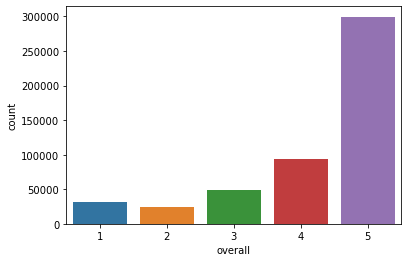

In [ ]:
# View the data

sns.countplot(data = df, x='overall')

In [ ]:
# Take random samples of the data since previous attempts to work with the data were too big for the instance

one_10000 = df[df['overall']==1.0].sample(n=10000, random_state=1)
two_10000 = df[df['overall']==2.0].sample(n=10000, random_state=1)
three_10000 = df[df['overall']==3.0].sample(n=10000, random_state=1)
four_10000 = df[df['overall']==4.0].sample(n=10000, random_state=1)
five_10000 = df[df['overall']==5.0].sample(n=10000, random_state=1)

In [ ]:
# Create a new dataframe from the random samples

undersampled_reviews = pd.concat([one_10000, two_10000, three_10000, four_10000, five_10000], axis=0)

In [ ]:
undersampled_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style
229134,1,False,"01 24, 2012",A3Q8X9MNQTADUC,B004M8M2H0,Vicente Rojas Rivera III,What happen to everybody else? My son is frust...,Where is everybody else?,1327363200,NaN,{'Format:': ' Video Game'}
116064,1,False,"07 6, 2008",A2WW3B89WK1S2Q,B000UUA2Z8,Greg Mullane,"A very poor game: monotonous levels, poor game...","Very disappointing, poorly-made game",1215302400,NaN,NaN
2408,1,False,"01 4, 2012",AROWZGGO4VTJU,B00000INR2,Cosmic Soujourner,I have used many third party expansion packs a...,Beware Of Third Party Expansion Paks,1325635200,NaN,NaN
33628,1,False,"10 11, 2003",A1WWCVRQD3RBY6,B0000663TT,Kindle Customer,I know there are a lot of NOLF fans out there ...,Unstable and boring...,1065830400,2,{'Platform:': ' PC'}
77551,1,True,"03 3, 2013",A1KCDOO075AN2L,B000CPKIT6,Johannes,Cant register the game brcause it came with ou...,No key code,1362268800,2,NaN


<AxesSubplot:xlabel='overall', ylabel='count'>

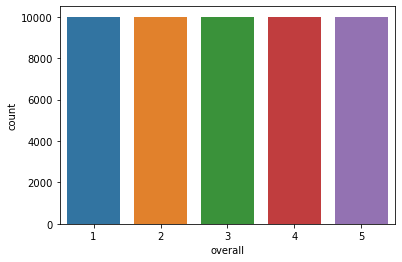

In [ ]:
sns.countplot(data=undersampled_reviews, x='overall')

In [ ]:
! pip install spacy

import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS

     |███▍                            | 614 kB 18.6 MB/s eta 0:00:01

     |██████████                      | 1.8 MB 18.6 MB/s eta 0:00:01

     |████████████████▍               | 3.0 MB 18.6 MB/s eta 0:00:01

     |███████████████████████         | 4.2 MB 18.6 MB/s eta 0:00:01

     |█████████████████████████████▌  | 5.4 MB 18.6 MB/s eta 0:00:01

     |████████████████████████████████| 5.9 MB 18.6 MB/s eta 0:00:01

     |████████████████████████████████| 5.9 MB 18.6 MB/s 


     |██████████████████████▍         | 440 kB 28.1 MB/s eta 0:00:01

     |████████████████████████████████| 628 kB 28.1 MB/s 


     |████████████████████████████████| 125 kB 28.9 MB/s 


     |▏                               | 40 kB 14.4 MB/s eta 0:00:01

     |████                            | 1.2 MB 17.6 MB/s eta 0:00:01

     |███████▏                        | 2.3 MB 17.6 MB/s eta 0:00:01

     |███████████                     | 3.5 MB 17.6 MB/s eta 0:00:01

     |██████████████▉                 | 4.7 MB 17.6 MB/s eta 0:00:01

     |██████████████████▋             | 5.9 MB 17.6 MB/s eta 0:00:01

     |██████████████████████          | 6.9 MB 17.6 MB/s eta 0:00:01

     |████████████████████████        | 7.6 MB 17.6 MB/s eta 0:00:01

     |██████████████████████████▎     | 8.3 MB 17.6 MB/s eta 0:00:01

     |████████████████████████████▋   | 9.0 MB 17.6 MB/s eta 0:00:01

     |███████████████████████████████▊| 10.0 MB 17.6 MB/s eta 0:00:01

     |████████████████████████████████| 10.1 MB 17.6 MB/s eta 0:00:01

     |████████████████████████████████| 10.1 MB 17.6 MB/s 


     |██████████████████████████████▋ | 40 kB 52.6 MB/s eta 0:00:01

     |████████████████████████████████| 42 kB 3.6 MB/s 


     |██████▌                         | 92 kB 35.4 MB/s eta 0:00:01

     |████████████████████████████████| 451 kB 29.8 MB/s 


     |▍                               | 133 kB 5.6 MB/s eta 0:00:02

     |████▏                           | 1.3 MB 5.6 MB/s eta 0:00:02

     |███████▏                        | 2.2 MB 5.6 MB/s eta 0:00:02

     |███████████▏                    | 3.4 MB 5.6 MB/s eta 0:00:02

     |███████████████                 | 4.6 MB 5.6 MB/s eta 0:00:01

     |███████████████████             | 5.9 MB 5.6 MB/s eta 0:00:01

     |██████████████████████▋         | 7.0 MB 5.6 MB/s eta 0:00:01

     |██████████████████████████▍     | 8.2 MB 5.6 MB/s eta 0:00:01

     |██████████████████████████████▍ | 9.4 MB 5.6 MB/s eta 0:00:01

     |████████████████████████████████| 9.9 MB 5.6 MB/s eta 0:00:01

     |████████████████████████████████| 9.9 MB 5.6 MB/s 


     |████████████████████████████████| 58 kB 12.4 MB/s 


In [ ]:
! python -m spacy download en_core_web_sm

     |█                               | 430 kB 13.1 MB/s eta 0:00:02

     |███▎                            | 1.4 MB 13.1 MB/s eta 0:00:01

     |██████                          | 2.5 MB 13.1 MB/s eta 0:00:01

     |████████▉                       | 3.8 MB 13.1 MB/s eta 0:00:01

     |███████████▋                    | 4.9 MB 13.1 MB/s eta 0:00:01

     |██████████████▍                 | 6.1 MB 13.1 MB/s eta 0:00:01

     |█████████████████▎              | 7.3 MB 13.1 MB/s eta 0:00:01

     |████████████████████            | 8.6 MB 13.1 MB/s eta 0:00:01

     |███████████████████████         | 9.8 MB 13.1 MB/s eta 0:00:01

     |█████████████████████████▊      | 10.9 MB 13.1 MB/s eta 0:00:01

     |████████████████████████████▋   | 12.2 MB 13.1 MB/s eta 0:00:01

     |███████████████████████████████▍| 13.4 MB 13.1 MB/s eta 0:00:01

     |████████████████████████████████| 13.6 MB 13.1 MB/s eta 0:00:01

     |████████████████████████████████| 13.6 MB 13.1 MB/s 


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. 
                                              # substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. 
                                        # substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOP_WORDS) # remove stopwords from text
    return text

In [ ]:
cleaned_data = undersampled_reviews.progress_apply(lambda row: clean_text(row['reviewText']), axis=1)

my bar!:   0%|          | 0/50000 [00:00<?, ?it/s]

my bar!:   0%|          | 1/50000 [00:00<2:49:44,  4.91it/s]

my bar!:   3%|▎         | 1629/50000 [00:00<00:07, 6710.69it/s]

my bar!:   7%|▋         | 3471/50000 [00:00<00:04, 11048.57it/s]

my bar!:  11%|█         | 5306/50000 [00:00<00:03, 13574.77it/s]

my bar!:  14%|█▍        | 7228/50000 [00:00<00:02, 15429.47it/s]

my bar!:  18%|█▊        | 9108/50000 [00:00<00:02, 16510.41it/s]

my bar!:  22%|██▏       | 10857/50000 [00:00<00:02, 15830.27it/s]

my bar!:  25%|██▌       | 12512/50000 [00:00<00:02, 14906.54it/s]

my bar!:  28%|██▊       | 14059/50000 [00:01<00:02, 14322.97it/s]

my bar!:  31%|███       | 15531/50000 [00:01<00:02, 14015.27it/s]

my bar!:  34%|███▍      | 16959/50000 [00:01<00:02, 13582.68it/s]

my bar!:  37%|███▋      | 18336/50000 [00:01<00:02, 13566.28it/s]

my bar!:  39%|███▉      | 19705/50000 [00:01<00:02, 13307.98it/s]

my bar!:  42%|████▏     | 21092/50000 [00:01<00:02, 13466.05it/s]

my bar!:  45%|████▍     | 22446/50000 [00:01<00:02, 13252.93it/s]

my bar!:  48%|████▊     | 23776/50000 [00:01<00:02, 13082.85it/s]

my bar!:  50%|█████     | 25089/50000 [00:01<00:01, 13092.38it/s]

my bar!:  53%|█████▎    | 26415/50000 [00:02<00:01, 13133.10it/s]

my bar!:  56%|█████▌    | 27799/50000 [00:02<00:01, 13340.34it/s]

my bar!:  58%|█████▊    | 29241/50000 [00:02<00:01, 13655.66it/s]

my bar!:  61%|██████▏   | 30641/50000 [00:02<00:01, 13757.66it/s]

my bar!:  64%|██████▍   | 32134/50000 [00:02<00:01, 14085.82it/s]

my bar!:  67%|██████▋   | 33544/50000 [00:02<00:01, 14045.29it/s]

my bar!:  70%|██████▉   | 34950/50000 [00:02<00:01, 14046.15it/s]

my bar!:  73%|███████▎  | 36356/50000 [00:02<00:00, 13874.74it/s]

my bar!:  76%|███████▌  | 37755/50000 [00:02<00:00, 13904.74it/s]

my bar!:  78%|███████▊  | 39188/50000 [00:02<00:00, 14029.52it/s]

my bar!:  82%|████████▏ | 40928/50000 [00:03<00:00, 15034.22it/s]

my bar!:  87%|████████▋ | 43412/50000 [00:03<00:00, 17962.67it/s]

my bar!:  92%|█████████▏| 45865/50000 [00:03<00:00, 19924.69it/s]

my bar!:  97%|█████████▋| 48313/50000 [00:03<00:00, 21285.78it/s]

my bar!: 100%|██████████| 50000/50000 [00:03<00:00, 14647.58it/s]

In [ ]:
cleaned_data.head()

229134    happen everybody son frustated askes everyday ...
116064    poor game monotonous levels poor game controls...
2408      party epansion packs failed caused console cra...
33628     know lot nolf fans didnt play nolf 1 etreme ep...
77551     cant register game brcause came key code loved...
dtype: object

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
reviews = cleaned_data.progress_apply(lambda row: nlp(row))

my bar!:   0%|          | 0/50000 [00:00<?, ?it/s]

my bar!:   0%|          | 8/50000 [00:00<12:27, 66.90it/s]

my bar!:   0%|          | 16/50000 [00:00<13:06, 63.54it/s]

my bar!:   0%|          | 26/50000 [00:00<10:42, 77.83it/s]

my bar!:   0%|          | 34/50000 [00:00<14:57, 55.65it/s]

my bar!:   0%|          | 42/50000 [00:00<14:17, 58.29it/s]

my bar!:   0%|          | 49/50000 [00:00<14:10, 58.74it/s]

my bar!:   0%|          | 56/50000 [00:00<15:10, 54.86it/s]

my bar!:   0%|          | 64/50000 [00:01<14:09, 58.80it/s]

my bar!:   0%|          | 73/50000 [00:01<14:17, 58.20it/s]

my bar!:   0%|          | 79/50000 [00:01<16:49, 49.46it/s]

my bar!:   0%|          | 87/50000 [00:01<15:24, 54.01it/s]

my bar!:   0%|          | 96/50000 [00:01<15:47, 52.68it/s]

my bar!:   0%|          | 103/50000 [00:01<15:26, 53.85it/s]

my bar!:   0%|          | 109/50000 [00:01<15:10, 54.78it/s]

my bar!:   0%|          | 117/50000 [00:02<14:29, 57.39it/s]

my bar!:   0%|          | 123/50000 [00:02<14:35, 56.94it/s]

my bar!:   0%|          | 132/50000 [00:02<12:43, 65.28it/s]

my bar!:   0%|          | 142/50000 [00:02<15:56, 52.15it/s]

my bar!:   0%|          | 151/50000 [00:02<13:49, 60.08it/s]

my bar!:   0%|          | 161/50000 [00:02<12:09, 68.31it/s]

my bar!:   0%|          | 169/50000 [00:02<12:28, 66.59it/s]

my bar!:   0%|          | 178/50000 [00:02<11:52, 69.91it/s]

my bar!:   0%|          | 186/50000 [00:03<12:43, 65.29it/s]

my bar!:   0%|          | 193/50000 [00:03<12:33, 66.14it/s]

my bar!:   0%|          | 200/50000 [00:03<13:10, 62.99it/s]

my bar!:   0%|          | 213/50000 [00:03<10:32, 78.75it/s]

my bar!:   0%|          | 222/50000 [00:03<11:32, 71.83it/s]

my bar!:   0%|          | 230/50000 [00:03<16:12, 51.16it/s]

my bar!:   0%|          | 237/50000 [00:04<16:20, 50.75it/s]

my bar!:   0%|          | 244/50000 [00:04<15:22, 53.96it/s]

my bar!:   1%|          | 251/50000 [00:04<15:17, 54.23it/s]

my bar!:   1%|          | 257/50000 [00:04<17:43, 46.77it/s]

my bar!:   1%|          | 266/50000 [00:04<15:05, 54.93it/s]

my bar!:   1%|          | 272/50000 [00:04<14:56, 55.46it/s]

my bar!:   1%|          | 278/50000 [00:04<14:53, 55.62it/s]

my bar!:   1%|          | 287/50000 [00:04<13:10, 62.92it/s]

my bar!:   1%|          | 296/50000 [00:04<11:49, 70.07it/s]

my bar!:   1%|          | 306/50000 [00:05<10:34, 78.27it/s]

my bar!:   1%|          | 315/50000 [00:05<10:58, 75.40it/s]

my bar!:   1%|          | 323/50000 [00:05<11:24, 72.53it/s]

my bar!:   1%|          | 331/50000 [00:05<12:26, 66.54it/s]

my bar!:   1%|          | 340/50000 [00:05<12:03, 68.61it/s]

my bar!:   1%|          | 347/50000 [00:05<12:24, 66.72it/s]

my bar!:   1%|          | 356/50000 [00:05<11:31, 71.80it/s]

my bar!:   1%|          | 364/50000 [00:05<13:39, 60.60it/s]

my bar!:   1%|          | 371/50000 [00:06<13:23, 61.79it/s]

my bar!:   1%|          | 378/50000 [00:06<14:48, 55.87it/s]

my bar!:   1%|          | 384/50000 [00:06<18:19, 45.12it/s]

my bar!:   1%|          | 394/50000 [00:06<15:23, 53.74it/s]

my bar!:   1%|          | 400/50000 [00:06<17:46, 46.52it/s]

my bar!:   1%|          | 408/50000 [00:06<15:35, 52.98it/s]

my bar!:   1%|          | 414/50000 [00:07<16:12, 50.98it/s]

my bar!:   1%|          | 422/50000 [00:07<14:36, 56.57it/s]

my bar!:   1%|          | 429/50000 [00:07<13:47, 59.88it/s]

my bar!:   1%|          | 436/50000 [00:07<13:20, 61.92it/s]

my bar!:   1%|          | 447/50000 [00:07<11:17, 73.14it/s]

my bar!:   1%|          | 457/50000 [00:07<10:20, 79.87it/s]

my bar!:   1%|          | 466/50000 [00:07<11:37, 70.97it/s]

my bar!:   1%|          | 474/50000 [00:07<13:10, 62.68it/s]

my bar!:   1%|          | 481/50000 [00:07<12:51, 64.22it/s]

my bar!:   1%|          | 493/50000 [00:08<10:54, 75.61it/s]

my bar!:   1%|          | 502/50000 [00:08<10:58, 75.15it/s]

my bar!:   1%|          | 512/50000 [00:08<10:24, 79.23it/s]

my bar!:   1%|          | 525/50000 [00:08<09:01, 91.38it/s]

my bar!:   1%|          | 535/50000 [00:08<09:55, 83.04it/s]

my bar!:   1%|          | 544/50000 [00:08<10:48, 76.30it/s]

my bar!:   1%|          | 556/50000 [00:08<09:28, 87.02it/s]

my bar!:   1%|          | 566/50000 [00:09<12:25, 66.34it/s]

my bar!:   1%|          | 574/50000 [00:09<11:56, 68.95it/s]

my bar!:   1%|          | 583/50000 [00:09<11:17, 72.89it/s]

my bar!:   1%|          | 591/50000 [00:09<12:37, 65.20it/s]

my bar!:   1%|          | 599/50000 [00:09<13:32, 60.78it/s]

my bar!:   1%|          | 606/50000 [00:09<14:19, 57.48it/s]

my bar!:   1%|          | 616/50000 [00:09<12:27, 66.04it/s]

my bar!:   1%|          | 623/50000 [00:09<12:47, 64.31it/s]

my bar!:   1%|▏         | 630/50000 [00:10<13:49, 59.51it/s]

my bar!:   1%|▏         | 637/50000 [00:10<17:30, 47.01it/s]

my bar!:   1%|▏         | 643/50000 [00:10<16:49, 48.91it/s]

my bar!:   1%|▏         | 653/50000 [00:10<13:35, 60.52it/s]

my bar!:   1%|▏         | 665/50000 [00:10<11:09, 73.64it/s]

my bar!:   1%|▏         | 675/50000 [00:10<10:18, 79.73it/s]

my bar!:   1%|▏         | 684/50000 [00:10<10:35, 77.60it/s]

my bar!:   1%|▏         | 693/50000 [00:11<18:34, 44.25it/s]

my bar!:   1%|▏         | 703/50000 [00:11<15:24, 53.33it/s]

my bar!:   1%|▏         | 711/50000 [00:11<14:19, 57.34it/s]

my bar!:   1%|▏         | 721/50000 [00:11<12:31, 65.55it/s]

my bar!:   1%|▏         | 729/50000 [00:11<13:18, 61.69it/s]

my bar!:   1%|▏         | 737/50000 [00:11<13:16, 61.87it/s]

my bar!:   1%|▏         | 744/50000 [00:11<13:03, 62.89it/s]

my bar!:   2%|▏         | 751/50000 [00:12<13:26, 61.05it/s]

my bar!:   2%|▏         | 758/50000 [00:12<13:40, 60.01it/s]

my bar!:   2%|▏         | 768/50000 [00:12<12:56, 63.41it/s]

my bar!:   2%|▏         | 775/50000 [00:12<13:05, 62.67it/s]

my bar!:   2%|▏         | 785/50000 [00:12<11:32, 71.10it/s]

my bar!:   2%|▏         | 793/50000 [00:12<17:03, 48.06it/s]

my bar!:   2%|▏         | 799/50000 [00:13<18:53, 43.39it/s]

my bar!:   2%|▏         | 806/50000 [00:13<17:00, 48.20it/s]

my bar!:   2%|▏         | 814/50000 [00:13<15:57, 51.36it/s]

my bar!:   2%|▏         | 824/50000 [00:13<13:16, 61.78it/s]

my bar!:   2%|▏         | 836/50000 [00:13<10:49, 75.70it/s]

my bar!:   2%|▏         | 845/50000 [00:13<11:36, 70.58it/s]

my bar!:   2%|▏         | 854/50000 [00:13<10:52, 75.34it/s]

my bar!:   2%|▏         | 864/50000 [00:13<10:55, 75.00it/s]

my bar!:   2%|▏         | 873/50000 [00:13<10:34, 77.40it/s]

my bar!:   2%|▏         | 882/50000 [00:14<10:37, 77.01it/s]

my bar!:   2%|▏         | 890/50000 [00:14<17:21, 47.15it/s]

my bar!:   2%|▏         | 897/50000 [00:14<16:17, 50.24it/s]

my bar!:   2%|▏         | 904/50000 [00:14<16:36, 49.26it/s]

my bar!:   2%|▏         | 910/50000 [00:14<16:39, 49.09it/s]

my bar!:   2%|▏         | 919/50000 [00:14<14:45, 55.41it/s]

my bar!:   2%|▏         | 928/50000 [00:15<13:05, 62.45it/s]

my bar!:   2%|▏         | 941/50000 [00:15<10:30, 77.87it/s]

my bar!:   2%|▏         | 950/50000 [00:15<10:40, 76.58it/s]

my bar!:   2%|▏         | 961/50000 [00:15<10:08, 80.57it/s]

my bar!:   2%|▏         | 971/50000 [00:15<09:41, 84.27it/s]

my bar!:   2%|▏         | 980/50000 [00:15<10:18, 79.29it/s]

my bar!:   2%|▏         | 989/50000 [00:15<12:27, 65.58it/s]

my bar!:   2%|▏         | 997/50000 [00:15<12:48, 63.73it/s]

my bar!:   2%|▏         | 1007/50000 [00:16<12:05, 67.57it/s]

my bar!:   2%|▏         | 1015/50000 [00:16<12:25, 65.73it/s]

my bar!:   2%|▏         | 1023/50000 [00:16<13:05, 62.38it/s]

my bar!:   2%|▏         | 1033/50000 [00:16<11:48, 69.14it/s]

my bar!:   2%|▏         | 1041/50000 [00:16<17:09, 47.55it/s]

my bar!:   2%|▏         | 1047/50000 [00:16<16:23, 49.75it/s]

my bar!:   2%|▏         | 1054/50000 [00:17<15:33, 52.41it/s]

my bar!:   2%|▏         | 1060/50000 [00:17<18:51, 43.24it/s]

my bar!:   2%|▏         | 1072/50000 [00:17<14:05, 57.90it/s]

my bar!:   2%|▏         | 1081/50000 [00:17<12:46, 63.85it/s]

my bar!:   2%|▏         | 1089/50000 [00:17<12:17, 66.34it/s]

my bar!:   2%|▏         | 1099/50000 [00:17<11:10, 72.95it/s]

my bar!:   2%|▏         | 1107/50000 [00:17<11:22, 71.60it/s]

my bar!:   2%|▏         | 1115/50000 [00:17<13:22, 60.94it/s]

my bar!:   2%|▏         | 1122/50000 [00:18<13:21, 61.00it/s]

my bar!:   2%|▏         | 1132/50000 [00:18<12:40, 64.29it/s]

my bar!:   2%|▏         | 1141/50000 [00:18<11:37, 70.06it/s]

my bar!:   2%|▏         | 1149/50000 [00:18<11:55, 68.32it/s]

my bar!:   2%|▏         | 1158/50000 [00:18<11:03, 73.65it/s]

my bar!:   2%|▏         | 1168/50000 [00:18<10:26, 77.97it/s]

my bar!:   2%|▏         | 1177/50000 [00:18<10:14, 79.39it/s]

my bar!:   2%|▏         | 1186/50000 [00:19<13:53, 58.54it/s]

my bar!:   2%|▏         | 1196/50000 [00:19<12:14, 66.42it/s]

my bar!:   2%|▏         | 1206/50000 [00:19<11:10, 72.73it/s]

my bar!:   2%|▏         | 1217/50000 [00:19<10:18, 78.92it/s]

my bar!:   2%|▏         | 1227/50000 [00:19<09:51, 82.43it/s]

my bar!:   2%|▏         | 1238/50000 [00:19<09:12, 88.19it/s]

my bar!:   3%|▎         | 1253/50000 [00:19<07:46, 104.53it/s]

my bar!:   3%|▎         | 1264/50000 [00:19<10:30, 77.35it/s] 

my bar!:   3%|▎         | 1274/50000 [00:20<10:24, 77.99it/s]

my bar!:   3%|▎         | 1285/50000 [00:20<09:32, 85.14it/s]

my bar!:   3%|▎         | 1295/50000 [00:20<10:32, 76.95it/s]

my bar!:   3%|▎         | 1305/50000 [00:20<10:08, 79.97it/s]

my bar!:   3%|▎         | 1314/50000 [00:20<10:17, 78.88it/s]

my bar!:   3%|▎         | 1325/50000 [00:20<09:23, 86.38it/s]

my bar!:   3%|▎         | 1335/50000 [00:20<09:47, 82.82it/s]

my bar!:   3%|▎         | 1344/50000 [00:20<11:27, 70.79it/s]

my bar!:   3%|▎         | 1352/50000 [00:21<11:18, 71.67it/s]

my bar!:   3%|▎         | 1360/50000 [00:21<11:38, 69.64it/s]

my bar!:   3%|▎         | 1370/50000 [00:21<10:37, 76.23it/s]

my bar!:   3%|▎         | 1379/50000 [00:21<10:27, 77.46it/s]

my bar!:   3%|▎         | 1387/50000 [00:21<11:08, 72.74it/s]

my bar!:   3%|▎         | 1395/50000 [00:21<12:24, 65.32it/s]

my bar!:   3%|▎         | 1404/50000 [00:21<11:49, 68.52it/s]

my bar!:   3%|▎         | 1416/50000 [00:21<09:58, 81.13it/s]

my bar!:   3%|▎         | 1425/50000 [00:22<10:04, 80.29it/s]

my bar!:   3%|▎         | 1434/50000 [00:22<09:52, 82.02it/s]

my bar!:   3%|▎         | 1443/50000 [00:22<10:14, 78.97it/s]

my bar!:   3%|▎         | 1452/50000 [00:22<10:54, 74.16it/s]

my bar!:   3%|▎         | 1462/50000 [00:22<10:16, 78.77it/s]

my bar!:   3%|▎         | 1476/50000 [00:22<08:41, 92.96it/s]

my bar!:   3%|▎         | 1486/50000 [00:22<08:46, 92.22it/s]

my bar!:   3%|▎         | 1496/50000 [00:22<08:54, 90.73it/s]

my bar!:   3%|▎         | 1506/50000 [00:22<09:38, 83.76it/s]

my bar!:   3%|▎         | 1515/50000 [00:23<09:41, 83.33it/s]

my bar!:   3%|▎         | 1530/50000 [00:23<08:14, 97.96it/s]

my bar!:   3%|▎         | 1540/50000 [00:23<09:24, 85.87it/s]

my bar!:   3%|▎         | 1549/50000 [00:23<10:12, 79.16it/s]

my bar!:   3%|▎         | 1561/50000 [00:23<09:06, 88.70it/s]

my bar!:   3%|▎         | 1571/50000 [00:23<08:55, 90.39it/s]

my bar!:   3%|▎         | 1582/50000 [00:23<08:58, 89.94it/s]

my bar!:   3%|▎         | 1592/50000 [00:23<09:36, 83.92it/s]

my bar!:   3%|▎         | 1601/50000 [00:24<09:54, 81.38it/s]

my bar!:   3%|▎         | 1614/50000 [00:24<08:40, 92.88it/s]

my bar!:   3%|▎         | 1624/50000 [00:24<08:43, 92.35it/s]

my bar!:   3%|▎         | 1634/50000 [00:24<09:43, 82.87it/s]

my bar!:   3%|▎         | 1643/50000 [00:24<09:46, 82.41it/s]

my bar!:   3%|▎         | 1652/50000 [00:24<10:07, 79.63it/s]

my bar!:   3%|▎         | 1664/50000 [00:24<09:08, 88.19it/s]

my bar!:   3%|▎         | 1674/50000 [00:24<10:34, 76.21it/s]

my bar!:   3%|▎         | 1683/50000 [00:25<10:17, 78.27it/s]

my bar!:   3%|▎         | 1692/50000 [00:25<11:18, 71.22it/s]

my bar!:   3%|▎         | 1700/50000 [00:25<11:13, 71.74it/s]

my bar!:   3%|▎         | 1709/50000 [00:25<10:38, 75.63it/s]

my bar!:   3%|▎         | 1719/50000 [00:25<09:58, 80.64it/s]

my bar!:   3%|▎         | 1735/50000 [00:25<08:18, 96.88it/s]

my bar!:   3%|▎         | 1745/50000 [00:25<09:23, 85.61it/s]

my bar!:   4%|▎         | 1755/50000 [00:25<09:07, 88.04it/s]

my bar!:   4%|▎         | 1765/50000 [00:26<09:55, 81.00it/s]

my bar!:   4%|▎         | 1776/50000 [00:26<09:13, 87.06it/s]

my bar!:   4%|▎         | 1787/50000 [00:26<08:48, 91.25it/s]

my bar!:   4%|▎         | 1797/50000 [00:26<08:59, 89.33it/s]

my bar!:   4%|▎         | 1807/50000 [00:26<09:25, 85.27it/s]

my bar!:   4%|▎         | 1816/50000 [00:26<11:16, 71.25it/s]

my bar!:   4%|▎         | 1824/50000 [00:26<11:16, 71.24it/s]

my bar!:   4%|▎         | 1832/50000 [00:26<11:08, 72.09it/s]

my bar!:   4%|▎         | 1840/50000 [00:27<11:47, 68.03it/s]

my bar!:   4%|▎         | 1849/50000 [00:27<11:05, 72.40it/s]

my bar!:   4%|▎         | 1858/50000 [00:27<10:35, 75.77it/s]

my bar!:   4%|▎         | 1867/50000 [00:27<10:25, 76.91it/s]

my bar!:   4%|▍         | 1882/50000 [00:27<08:22, 95.71it/s]

my bar!:   4%|▍         | 1892/50000 [00:27<08:35, 93.23it/s]

my bar!:   4%|▍         | 1902/50000 [00:27<10:05, 79.46it/s]

my bar!:   4%|▍         | 1911/50000 [00:27<12:00, 66.74it/s]

my bar!:   4%|▍         | 1920/50000 [00:28<11:20, 70.65it/s]

my bar!:   4%|▍         | 1933/50000 [00:28<09:33, 83.86it/s]

my bar!:   4%|▍         | 1943/50000 [00:28<09:09, 87.49it/s]

my bar!:   4%|▍         | 1953/50000 [00:28<08:57, 89.32it/s]

my bar!:   4%|▍         | 1963/50000 [00:28<09:46, 81.89it/s]

my bar!:   4%|▍         | 1972/50000 [00:28<09:32, 83.94it/s]

my bar!:   4%|▍         | 1983/50000 [00:28<09:24, 85.02it/s]

my bar!:   4%|▍         | 1992/50000 [00:28<10:28, 76.36it/s]

my bar!:   4%|▍         | 2000/50000 [00:29<13:44, 58.25it/s]

my bar!:   4%|▍         | 2007/50000 [00:29<14:17, 55.97it/s]

my bar!:   4%|▍         | 2014/50000 [00:29<14:51, 53.86it/s]

my bar!:   4%|▍         | 2022/50000 [00:29<15:03, 53.08it/s]

my bar!:   4%|▍         | 2033/50000 [00:29<13:34, 58.89it/s]

my bar!:   4%|▍         | 2042/50000 [00:29<12:16, 65.07it/s]

my bar!:   4%|▍         | 2049/50000 [00:29<13:36, 58.73it/s]

my bar!:   4%|▍         | 2056/50000 [00:30<13:19, 60.00it/s]

my bar!:   4%|▍         | 2063/50000 [00:30<14:53, 53.65it/s]

my bar!:   4%|▍         | 2070/50000 [00:30<13:57, 57.24it/s]

my bar!:   4%|▍         | 2078/50000 [00:30<12:43, 62.75it/s]

my bar!:   4%|▍         | 2092/50000 [00:30<09:48, 81.44it/s]

my bar!:   4%|▍         | 2103/50000 [00:30<09:13, 86.49it/s]

my bar!:   4%|▍         | 2112/50000 [00:30<10:05, 79.05it/s]

my bar!:   4%|▍         | 2121/50000 [00:30<09:50, 81.15it/s]

my bar!:   4%|▍         | 2130/50000 [00:31<09:58, 80.04it/s]

my bar!:   4%|▍         | 2142/50000 [00:31<10:36, 75.15it/s]

my bar!:   4%|▍         | 2150/50000 [00:31<11:06, 71.80it/s]

my bar!:   4%|▍         | 2158/50000 [00:31<11:16, 70.76it/s]

my bar!:   4%|▍         | 2167/50000 [00:31<10:42, 74.42it/s]

my bar!:   4%|▍         | 2175/50000 [00:31<11:33, 68.93it/s]

my bar!:   4%|▍         | 2183/50000 [00:31<11:09, 71.37it/s]

my bar!:   4%|▍         | 2192/50000 [00:31<10:26, 76.26it/s]

my bar!:   4%|▍         | 2200/50000 [00:32<11:05, 71.83it/s]

my bar!:   4%|▍         | 2209/50000 [00:32<11:08, 71.51it/s]

my bar!:   4%|▍         | 2218/50000 [00:32<10:29, 75.87it/s]

my bar!:   4%|▍         | 2227/50000 [00:32<10:02, 79.25it/s]

my bar!:   4%|▍         | 2236/50000 [00:32<10:29, 75.94it/s]

my bar!:   4%|▍         | 2244/50000 [00:32<13:24, 59.39it/s]

my bar!:   5%|▍         | 2251/50000 [00:32<14:24, 55.21it/s]

my bar!:   5%|▍         | 2260/50000 [00:32<12:45, 62.36it/s]

my bar!:   5%|▍         | 2273/50000 [00:33<10:24, 76.38it/s]

my bar!:   5%|▍         | 2282/50000 [00:33<10:02, 79.21it/s]

my bar!:   5%|▍         | 2291/50000 [00:33<12:14, 64.98it/s]

my bar!:   5%|▍         | 2302/50000 [00:33<10:46, 73.78it/s]

my bar!:   5%|▍         | 2312/50000 [00:33<10:10, 78.17it/s]

my bar!:   5%|▍         | 2322/50000 [00:33<10:31, 75.55it/s]

my bar!:   5%|▍         | 2332/50000 [00:33<10:02, 79.11it/s]

my bar!:   5%|▍         | 2341/50000 [00:33<09:53, 80.30it/s]

my bar!:   5%|▍         | 2350/50000 [00:34<09:42, 81.75it/s]

my bar!:   5%|▍         | 2359/50000 [00:34<09:37, 82.54it/s]

my bar!:   5%|▍         | 2369/50000 [00:34<09:05, 87.34it/s]

my bar!:   5%|▍         | 2378/50000 [00:34<10:04, 78.76it/s]

my bar!:   5%|▍         | 2387/50000 [00:34<10:09, 78.14it/s]

my bar!:   5%|▍         | 2399/50000 [00:34<09:21, 84.85it/s]

my bar!:   5%|▍         | 2408/50000 [00:34<10:31, 75.36it/s]

my bar!:   5%|▍         | 2419/50000 [00:34<09:27, 83.77it/s]

my bar!:   5%|▍         | 2428/50000 [00:35<10:26, 75.88it/s]

my bar!:   5%|▍         | 2437/50000 [00:35<10:42, 74.07it/s]

my bar!:   5%|▍         | 2447/50000 [00:35<10:31, 75.28it/s]

my bar!:   5%|▍         | 2456/50000 [00:35<10:21, 76.53it/s]

my bar!:   5%|▍         | 2468/50000 [00:35<10:55, 72.47it/s]

my bar!:   5%|▍         | 2476/50000 [00:35<10:59, 72.07it/s]

my bar!:   5%|▍         | 2485/50000 [00:35<11:34, 68.38it/s]

my bar!:   5%|▍         | 2494/50000 [00:35<11:11, 70.80it/s]

my bar!:   5%|▌         | 2505/50000 [00:36<10:08, 78.02it/s]

my bar!:   5%|▌         | 2513/50000 [00:36<10:10, 77.83it/s]

my bar!:   5%|▌         | 2521/50000 [00:36<11:17, 70.12it/s]

my bar!:   5%|▌         | 2529/50000 [00:36<14:15, 55.46it/s]

my bar!:   5%|▌         | 2538/50000 [00:36<12:43, 62.20it/s]

my bar!:   5%|▌         | 2551/50000 [00:36<10:26, 75.78it/s]

my bar!:   5%|▌         | 2560/50000 [00:36<10:15, 77.06it/s]

my bar!:   5%|▌         | 2572/50000 [00:36<08:59, 87.86it/s]

my bar!:   5%|▌         | 2582/50000 [00:37<09:01, 87.58it/s]

my bar!:   5%|▌         | 2596/50000 [00:37<07:51, 100.55it/s]

my bar!:   5%|▌         | 2607/50000 [00:37<08:51, 89.13it/s] 

my bar!:   5%|▌         | 2617/50000 [00:37<08:50, 89.32it/s]

my bar!:   5%|▌         | 2629/50000 [00:37<08:12, 96.15it/s]

my bar!:   5%|▌         | 2639/50000 [00:37<10:12, 77.29it/s]

my bar!:   5%|▌         | 2649/50000 [00:37<09:47, 80.56it/s]

my bar!:   5%|▌         | 2658/50000 [00:38<10:01, 78.72it/s]

my bar!:   5%|▌         | 2668/50000 [00:38<09:26, 83.59it/s]

my bar!:   5%|▌         | 2677/50000 [00:38<09:55, 79.41it/s]

my bar!:   5%|▌         | 2690/50000 [00:38<08:43, 90.32it/s]

my bar!:   5%|▌         | 2700/50000 [00:38<08:50, 89.24it/s]

my bar!:   5%|▌         | 2711/50000 [00:38<08:28, 92.99it/s]

my bar!:   5%|▌         | 2723/50000 [00:38<07:57, 99.10it/s]

my bar!:   5%|▌         | 2734/50000 [00:38<08:07, 96.95it/s]

my bar!:   5%|▌         | 2744/50000 [00:38<08:35, 91.75it/s]

my bar!:   6%|▌         | 2754/50000 [00:39<09:34, 82.18it/s]

my bar!:   6%|▌         | 2765/50000 [00:39<08:52, 88.70it/s]

my bar!:   6%|▌         | 2775/50000 [00:39<10:53, 72.24it/s]

my bar!:   6%|▌         | 2783/50000 [00:39<11:33, 68.09it/s]

my bar!:   6%|▌         | 2791/50000 [00:39<13:37, 57.73it/s]

my bar!:   6%|▌         | 2802/50000 [00:39<11:48, 66.64it/s]

my bar!:   6%|▌         | 2810/50000 [00:39<11:55, 65.91it/s]

my bar!:   6%|▌         | 2818/50000 [00:40<11:33, 68.04it/s]

my bar!:   6%|▌         | 2826/50000 [00:40<12:04, 65.08it/s]

my bar!:   6%|▌         | 2833/50000 [00:40<12:06, 64.96it/s]

my bar!:   6%|▌         | 2840/50000 [00:40<14:59, 52.42it/s]

my bar!:   6%|▌         | 2850/50000 [00:40<12:30, 62.85it/s]

my bar!:   6%|▌         | 2861/50000 [00:40<10:38, 73.81it/s]

my bar!:   6%|▌         | 2870/50000 [00:40<10:59, 71.48it/s]

my bar!:   6%|▌         | 2878/50000 [00:40<11:03, 71.02it/s]

my bar!:   6%|▌         | 2889/50000 [00:41<10:48, 72.67it/s]

my bar!:   6%|▌         | 2897/50000 [00:41<10:47, 72.71it/s]

my bar!:   6%|▌         | 2908/50000 [00:41<09:34, 81.94it/s]

my bar!:   6%|▌         | 2917/50000 [00:41<09:58, 78.70it/s]

my bar!:   6%|▌         | 2926/50000 [00:41<11:56, 65.71it/s]

my bar!:   6%|▌         | 2934/50000 [00:41<14:45, 53.18it/s]

my bar!:   6%|▌         | 2948/50000 [00:41<11:30, 68.10it/s]

my bar!:   6%|▌         | 2958/50000 [00:42<10:29, 74.75it/s]

my bar!:   6%|▌         | 2969/50000 [00:42<09:27, 82.89it/s]

my bar!:   6%|▌         | 2979/50000 [00:42<09:59, 78.38it/s]

my bar!:   6%|▌         | 2988/50000 [00:42<09:55, 78.96it/s]

my bar!:   6%|▌         | 2997/50000 [00:42<10:55, 71.71it/s]

my bar!:   6%|▌         | 3005/50000 [00:42<11:07, 70.41it/s]

my bar!:   6%|▌         | 3013/50000 [00:42<11:28, 68.24it/s]

my bar!:   6%|▌         | 3024/50000 [00:42<10:03, 77.86it/s]

my bar!:   6%|▌         | 3035/50000 [00:43<09:28, 82.68it/s]

my bar!:   6%|▌         | 3045/50000 [00:43<09:01, 86.71it/s]

my bar!:   6%|▌         | 3054/50000 [00:43<09:49, 79.67it/s]

my bar!:   6%|▌         | 3064/50000 [00:43<09:24, 83.13it/s]

my bar!:   6%|▌         | 3073/50000 [00:43<09:13, 84.79it/s]

my bar!:   6%|▌         | 3086/50000 [00:43<08:11, 95.51it/s]

my bar!:   6%|▌         | 3096/50000 [00:43<08:32, 91.54it/s]

my bar!:   6%|▌         | 3108/50000 [00:43<08:05, 96.64it/s]

my bar!:   6%|▌         | 3118/50000 [00:44<09:08, 85.51it/s]

my bar!:   6%|▋         | 3129/50000 [00:44<08:34, 91.03it/s]

my bar!:   6%|▋         | 3139/50000 [00:44<08:54, 87.70it/s]

my bar!:   6%|▋         | 3148/50000 [00:44<08:59, 86.86it/s]

my bar!:   6%|▋         | 3157/50000 [00:44<11:55, 65.51it/s]

my bar!:   6%|▋         | 3165/50000 [00:44<16:41, 46.77it/s]

my bar!:   6%|▋         | 3171/50000 [00:45<17:18, 45.08it/s]

my bar!:   6%|▋         | 3178/50000 [00:45<15:40, 49.79it/s]

my bar!:   6%|▋         | 3188/50000 [00:45<12:55, 60.37it/s]

my bar!:   6%|▋         | 3200/50000 [00:45<10:46, 72.41it/s]

my bar!:   6%|▋         | 3209/50000 [00:45<10:52, 71.71it/s]

my bar!:   6%|▋         | 3217/50000 [00:45<10:43, 72.74it/s]

my bar!:   6%|▋         | 3225/50000 [00:45<10:50, 71.90it/s]

my bar!:   6%|▋         | 3235/50000 [00:45<10:00, 77.94it/s]

my bar!:   6%|▋         | 3245/50000 [00:45<09:20, 83.40it/s]

my bar!:   7%|▋         | 3256/50000 [00:46<08:35, 90.61it/s]

my bar!:   7%|▋         | 3268/50000 [00:46<07:59, 97.56it/s]

my bar!:   7%|▋         | 3278/50000 [00:46<08:13, 94.76it/s]

my bar!:   7%|▋         | 3288/50000 [00:46<10:05, 77.16it/s]

my bar!:   7%|▋         | 3301/50000 [00:46<09:12, 84.59it/s]

my bar!:   7%|▋         | 3310/50000 [00:46<10:58, 70.87it/s]

my bar!:   7%|▋         | 3321/50000 [00:46<09:55, 78.44it/s]

my bar!:   7%|▋         | 3330/50000 [00:46<10:00, 77.76it/s]

my bar!:   7%|▋         | 3339/50000 [00:47<11:12, 69.34it/s]

my bar!:   7%|▋         | 3349/50000 [00:47<10:45, 72.27it/s]

my bar!:   7%|▋         | 3361/50000 [00:47<09:21, 83.01it/s]

my bar!:   7%|▋         | 3373/50000 [00:47<08:27, 91.79it/s]

my bar!:   7%|▋         | 3383/50000 [00:47<10:21, 74.96it/s]

my bar!:   7%|▋         | 3393/50000 [00:47<09:39, 80.49it/s]

my bar!:   7%|▋         | 3402/50000 [00:47<10:42, 72.52it/s]

my bar!:   7%|▋         | 3411/50000 [00:48<10:09, 76.46it/s]

my bar!:   7%|▋         | 3422/50000 [00:48<09:14, 83.95it/s]

my bar!:   7%|▋         | 3431/50000 [00:48<13:35, 57.09it/s]

my bar!:   7%|▋         | 3439/50000 [00:48<13:48, 56.21it/s]

my bar!:   7%|▋         | 3447/50000 [00:48<13:16, 58.47it/s]

my bar!:   7%|▋         | 3455/50000 [00:48<12:24, 62.55it/s]

my bar!:   7%|▋         | 3462/50000 [00:48<12:10, 63.72it/s]

my bar!:   7%|▋         | 3470/50000 [00:49<12:47, 60.60it/s]

my bar!:   7%|▋         | 3478/50000 [00:49<11:53, 65.19it/s]

my bar!:   7%|▋         | 3490/50000 [00:49<09:56, 78.03it/s]

my bar!:   7%|▋         | 3499/50000 [00:49<10:52, 71.26it/s]

my bar!:   7%|▋         | 3508/50000 [00:49<10:17, 75.29it/s]

my bar!:   7%|▋         | 3517/50000 [00:49<11:18, 68.46it/s]

my bar!:   7%|▋         | 3525/50000 [00:49<11:37, 66.60it/s]

my bar!:   7%|▋         | 3535/50000 [00:49<10:23, 74.56it/s]

my bar!:   7%|▋         | 3544/50000 [00:49<09:57, 77.69it/s]

my bar!:   7%|▋         | 3554/50000 [00:50<09:20, 82.90it/s]

my bar!:   7%|▋         | 3563/50000 [00:50<09:34, 80.88it/s]

my bar!:   7%|▋         | 3572/50000 [00:50<10:28, 73.84it/s]

my bar!:   7%|▋         | 3580/50000 [00:50<11:27, 67.52it/s]

my bar!:   7%|▋         | 3587/50000 [00:50<11:41, 66.12it/s]

my bar!:   7%|▋         | 3595/50000 [00:50<11:21, 68.08it/s]

my bar!:   7%|▋         | 3602/50000 [00:50<11:44, 65.84it/s]

my bar!:   7%|▋         | 3609/50000 [00:50<11:36, 66.63it/s]

my bar!:   7%|▋         | 3616/50000 [00:51<11:48, 65.44it/s]

my bar!:   7%|▋         | 3624/50000 [00:51<11:54, 64.92it/s]

my bar!:   7%|▋         | 3634/50000 [00:51<10:25, 74.14it/s]

my bar!:   7%|▋         | 3642/50000 [00:51<11:51, 65.11it/s]

my bar!:   7%|▋         | 3649/50000 [00:51<13:53, 55.59it/s]

my bar!:   7%|▋         | 3655/50000 [00:51<14:59, 51.53it/s]

my bar!:   7%|▋         | 3665/50000 [00:51<12:22, 62.37it/s]

my bar!:   7%|▋         | 3673/50000 [00:51<12:17, 62.83it/s]

my bar!:   7%|▋         | 3680/50000 [00:52<11:57, 64.58it/s]

my bar!:   7%|▋         | 3688/50000 [00:52<11:26, 67.43it/s]

my bar!:   7%|▋         | 3698/50000 [00:52<10:13, 75.53it/s]

my bar!:   7%|▋         | 3708/50000 [00:52<09:37, 80.14it/s]

my bar!:   7%|▋         | 3717/50000 [00:52<11:22, 67.80it/s]

my bar!:   7%|▋         | 3726/50000 [00:52<10:40, 72.30it/s]

my bar!:   7%|▋         | 3737/50000 [00:52<09:38, 79.91it/s]

my bar!:   7%|▋         | 3746/50000 [00:52<09:27, 81.50it/s]

my bar!:   8%|▊         | 3756/50000 [00:53<09:03, 85.04it/s]

my bar!:   8%|▊         | 3768/50000 [00:53<08:17, 92.88it/s]

my bar!:   8%|▊         | 3780/50000 [00:53<07:44, 99.51it/s]

my bar!:   8%|▊         | 3791/50000 [00:53<07:54, 97.46it/s]

my bar!:   8%|▊         | 3803/50000 [00:53<07:29, 102.82it/s]

my bar!:   8%|▊         | 3814/50000 [00:53<09:14, 83.27it/s] 

my bar!:   8%|▊         | 3824/50000 [00:53<09:05, 84.68it/s]

my bar!:   8%|▊         | 3836/50000 [00:53<08:17, 92.82it/s]

my bar!:   8%|▊         | 3848/50000 [00:53<07:48, 98.61it/s]

my bar!:   8%|▊         | 3859/50000 [00:54<09:24, 81.68it/s]

my bar!:   8%|▊         | 3868/50000 [00:54<10:53, 70.62it/s]

my bar!:   8%|▊         | 3880/50000 [00:54<09:32, 80.53it/s]

my bar!:   8%|▊         | 3889/50000 [00:54<09:41, 79.29it/s]

my bar!:   8%|▊         | 3901/50000 [00:54<08:47, 87.42it/s]

my bar!:   8%|▊         | 3911/50000 [00:54<08:52, 86.47it/s]

my bar!:   8%|▊         | 3920/50000 [00:54<09:07, 84.13it/s]

my bar!:   8%|▊         | 3929/50000 [00:55<10:50, 70.88it/s]

my bar!:   8%|▊         | 3937/50000 [00:55<11:55, 64.40it/s]

my bar!:   8%|▊         | 3947/50000 [00:55<10:58, 69.89it/s]

my bar!:   8%|▊         | 3955/50000 [00:55<11:26, 67.04it/s]

my bar!:   8%|▊         | 3963/50000 [00:55<11:24, 67.24it/s]

my bar!:   8%|▊         | 3971/50000 [00:55<10:57, 70.02it/s]

my bar!:   8%|▊         | 3979/50000 [00:55<11:22, 67.46it/s]

my bar!:   8%|▊         | 3986/50000 [00:56<13:43, 55.88it/s]

my bar!:   8%|▊         | 3995/50000 [00:56<12:21, 62.07it/s]

my bar!:   8%|▊         | 4002/50000 [00:56<12:03, 63.56it/s]

my bar!:   8%|▊         | 4009/50000 [00:56<13:04, 58.66it/s]

my bar!:   8%|▊         | 4017/50000 [00:56<12:15, 62.56it/s]

my bar!:   8%|▊         | 4028/50000 [00:56<10:18, 74.33it/s]

my bar!:   8%|▊         | 4036/50000 [00:56<10:35, 72.35it/s]

my bar!:   8%|▊         | 4047/50000 [00:56<09:31, 80.38it/s]

my bar!:   8%|▊         | 4059/50000 [00:56<08:30, 90.08it/s]

my bar!:   8%|▊         | 4069/50000 [00:57<11:54, 64.31it/s]

my bar!:   8%|▊         | 4080/50000 [00:57<10:21, 73.86it/s]

my bar!:   8%|▊         | 4089/50000 [00:57<11:17, 67.74it/s]

my bar!:   8%|▊         | 4097/50000 [00:57<11:18, 67.67it/s]

my bar!:   8%|▊         | 4105/50000 [00:57<11:02, 69.26it/s]

my bar!:   8%|▊         | 4114/50000 [00:57<10:50, 70.51it/s]

my bar!:   8%|▊         | 4123/50000 [00:57<10:15, 74.54it/s]

my bar!:   8%|▊         | 4131/50000 [00:58<10:40, 71.65it/s]

my bar!:   8%|▊         | 4140/50000 [00:58<10:06, 75.61it/s]

my bar!:   8%|▊         | 4148/50000 [00:58<11:03, 69.12it/s]

my bar!:   8%|▊         | 4156/50000 [00:58<11:18, 67.55it/s]

my bar!:   8%|▊         | 4168/50000 [00:58<09:39, 79.05it/s]

my bar!:   8%|▊         | 4177/50000 [00:58<09:45, 78.32it/s]

my bar!:   8%|▊         | 4187/50000 [00:58<09:09, 83.30it/s]

my bar!:   8%|▊         | 4198/50000 [00:58<08:32, 89.35it/s]

my bar!:   8%|▊         | 4208/50000 [00:58<08:49, 86.49it/s]

my bar!:   8%|▊         | 4217/50000 [00:59<08:53, 85.81it/s]

my bar!:   8%|▊         | 4229/50000 [00:59<08:02, 94.77it/s]

my bar!:   8%|▊         | 4239/50000 [00:59<12:01, 63.44it/s]

my bar!:   8%|▊         | 4248/50000 [00:59<11:06, 68.66it/s]

my bar!:   9%|▊         | 4257/50000 [00:59<10:49, 70.46it/s]

my bar!:   9%|▊         | 4265/50000 [00:59<11:03, 68.88it/s]

my bar!:   9%|▊         | 4273/50000 [00:59<11:37, 65.51it/s]

my bar!:   9%|▊         | 4282/50000 [01:00<10:41, 71.28it/s]

my bar!:   9%|▊         | 4290/50000 [01:00<10:32, 72.31it/s]

my bar!:   9%|▊         | 4298/50000 [01:00<11:17, 67.47it/s]

my bar!:   9%|▊         | 4306/50000 [01:00<13:21, 57.01it/s]

my bar!:   9%|▊         | 4319/50000 [01:00<10:37, 71.61it/s]

my bar!:   9%|▊         | 4327/50000 [01:00<11:13, 67.80it/s]

my bar!:   9%|▊         | 4339/50000 [01:00<10:09, 74.92it/s]

my bar!:   9%|▊         | 4348/50000 [01:00<09:42, 78.33it/s]

my bar!:   9%|▊         | 4357/50000 [01:01<09:35, 79.27it/s]

my bar!:   9%|▊         | 4366/50000 [01:01<09:24, 80.78it/s]

my bar!:   9%|▉         | 4375/50000 [01:01<12:17, 61.83it/s]

my bar!:   9%|▉         | 4388/50000 [01:01<09:59, 76.02it/s]

my bar!:   9%|▉         | 4398/50000 [01:01<09:34, 79.33it/s]

my bar!:   9%|▉         | 4407/50000 [01:01<11:36, 65.50it/s]

my bar!:   9%|▉         | 4418/50000 [01:01<10:08, 74.95it/s]

my bar!:   9%|▉         | 4427/50000 [01:02<10:24, 72.99it/s]

my bar!:   9%|▉         | 4435/50000 [01:02<10:31, 72.17it/s]

my bar!:   9%|▉         | 4446/50000 [01:02<09:32, 79.50it/s]

my bar!:   9%|▉         | 4458/50000 [01:02<08:52, 85.55it/s]

my bar!:   9%|▉         | 4467/50000 [01:02<09:55, 76.45it/s]

my bar!:   9%|▉         | 4477/50000 [01:02<09:19, 81.39it/s]

my bar!:   9%|▉         | 4488/50000 [01:02<08:38, 87.78it/s]

my bar!:   9%|▉         | 4498/50000 [01:02<09:50, 77.03it/s]

my bar!:   9%|▉         | 4507/50000 [01:03<11:58, 63.35it/s]

my bar!:   9%|▉         | 4516/50000 [01:03<11:23, 66.51it/s]

my bar!:   9%|▉         | 4528/50000 [01:03<10:01, 75.56it/s]

my bar!:   9%|▉         | 4541/50000 [01:03<08:54, 85.09it/s]

my bar!:   9%|▉         | 4550/50000 [01:03<11:39, 64.98it/s]

my bar!:   9%|▉         | 4562/50000 [01:03<09:54, 76.48it/s]

my bar!:   9%|▉         | 4573/50000 [01:03<09:07, 82.97it/s]

my bar!:   9%|▉         | 4583/50000 [01:04<10:06, 74.92it/s]

my bar!:   9%|▉         | 4592/50000 [01:04<10:39, 71.02it/s]

my bar!:   9%|▉         | 4604/50000 [01:04<09:21, 80.92it/s]

my bar!:   9%|▉         | 4615/50000 [01:04<08:44, 86.51it/s]

my bar!:   9%|▉         | 4625/50000 [01:04<10:19, 73.26it/s]

my bar!:   9%|▉         | 4634/50000 [01:04<10:18, 73.33it/s]

my bar!:   9%|▉         | 4642/50000 [01:04<11:03, 68.38it/s]

my bar!:   9%|▉         | 4650/50000 [01:04<10:47, 70.05it/s]

my bar!:   9%|▉         | 4663/50000 [01:05<09:04, 83.22it/s]

my bar!:   9%|▉         | 4673/50000 [01:05<10:35, 71.32it/s]

my bar!:   9%|▉         | 4681/50000 [01:05<10:23, 72.65it/s]

my bar!:   9%|▉         | 4689/50000 [01:05<10:56, 68.98it/s]

my bar!:   9%|▉         | 4697/50000 [01:05<10:51, 69.58it/s]

my bar!:   9%|▉         | 4707/50000 [01:05<10:05, 74.78it/s]

my bar!:   9%|▉         | 4715/50000 [01:05<10:10, 74.23it/s]

my bar!:   9%|▉         | 4723/50000 [01:05<10:53, 69.24it/s]

my bar!:   9%|▉         | 4733/50000 [01:06<09:50, 76.60it/s]

my bar!:   9%|▉         | 4741/50000 [01:06<11:16, 66.88it/s]

my bar!:   9%|▉         | 4749/50000 [01:06<10:59, 68.65it/s]

my bar!:  10%|▉         | 4758/50000 [01:06<10:22, 72.70it/s]

my bar!:  10%|▉         | 4766/50000 [01:06<12:08, 62.12it/s]

my bar!:  10%|▉         | 4773/50000 [01:06<11:53, 63.40it/s]

my bar!:  10%|▉         | 4780/50000 [01:06<12:20, 61.07it/s]

my bar!:  10%|▉         | 4788/50000 [01:07<12:28, 60.41it/s]

my bar!:  10%|▉         | 4798/50000 [01:07<10:54, 69.09it/s]

my bar!:  10%|▉         | 4806/50000 [01:07<12:58, 58.08it/s]

my bar!:  10%|▉         | 4817/50000 [01:07<11:11, 67.30it/s]

my bar!:  10%|▉         | 4826/50000 [01:07<10:45, 70.00it/s]

my bar!:  10%|▉         | 4834/50000 [01:07<11:12, 67.20it/s]

my bar!:  10%|▉         | 4841/50000 [01:07<11:15, 66.89it/s]

my bar!:  10%|▉         | 4853/50000 [01:07<09:33, 78.68it/s]

my bar!:  10%|▉         | 4863/50000 [01:08<09:02, 83.27it/s]

my bar!:  10%|▉         | 4872/50000 [01:08<09:21, 80.34it/s]

my bar!:  10%|▉         | 4881/50000 [01:08<10:41, 70.34it/s]

my bar!:  10%|▉         | 4892/50000 [01:08<09:26, 79.65it/s]

my bar!:  10%|▉         | 4901/50000 [01:08<09:38, 78.02it/s]

my bar!:  10%|▉         | 4910/50000 [01:08<10:32, 71.24it/s]

my bar!:  10%|▉         | 4918/50000 [01:08<11:29, 65.36it/s]

my bar!:  10%|▉         | 4928/50000 [01:08<10:48, 69.53it/s]

my bar!:  10%|▉         | 4939/50000 [01:09<09:30, 78.96it/s]

my bar!:  10%|▉         | 4948/50000 [01:09<09:15, 81.14it/s]

my bar!:  10%|▉         | 4957/50000 [01:09<09:36, 78.09it/s]

my bar!:  10%|▉         | 4966/50000 [01:09<09:39, 77.70it/s]

my bar!:  10%|▉         | 4974/50000 [01:09<09:47, 76.63it/s]

my bar!:  10%|▉         | 4983/50000 [01:09<09:34, 78.36it/s]

my bar!:  10%|▉         | 4992/50000 [01:09<10:33, 71.09it/s]

my bar!:  10%|█         | 5000/50000 [01:09<10:32, 71.17it/s]

my bar!:  10%|█         | 5017/50000 [01:09<07:48, 96.03it/s]

my bar!:  10%|█         | 5029/50000 [01:10<07:23, 101.35it/s]

my bar!:  10%|█         | 5040/50000 [01:10<07:57, 94.19it/s] 

my bar!:  10%|█         | 5050/50000 [01:10<08:13, 91.00it/s]

my bar!:  10%|█         | 5060/50000 [01:10<12:08, 61.73it/s]

my bar!:  10%|█         | 5073/50000 [01:10<10:32, 71.02it/s]

my bar!:  10%|█         | 5082/50000 [01:10<10:20, 72.43it/s]

my bar!:  10%|█         | 5093/50000 [01:10<09:20, 80.06it/s]

my bar!:  10%|█         | 5108/50000 [01:11<08:02, 93.06it/s]

my bar!:  10%|█         | 5119/50000 [01:11<08:29, 88.17it/s]

my bar!:  10%|█         | 5129/50000 [01:11<09:07, 81.92it/s]

my bar!:  10%|█         | 5140/50000 [01:11<08:40, 86.24it/s]

my bar!:  10%|█         | 5151/50000 [01:11<08:13, 90.92it/s]

my bar!:  10%|█         | 5161/50000 [01:11<08:11, 91.19it/s]

my bar!:  10%|█         | 5171/50000 [01:11<07:59, 93.43it/s]

my bar!:  10%|█         | 5181/50000 [01:12<09:53, 75.52it/s]

my bar!:  10%|█         | 5192/50000 [01:12<09:34, 77.98it/s]

my bar!:  10%|█         | 5201/50000 [01:12<09:49, 75.95it/s]

my bar!:  10%|█         | 5209/50000 [01:12<09:53, 75.49it/s]

my bar!:  10%|█         | 5218/50000 [01:12<09:46, 76.42it/s]

my bar!:  10%|█         | 5226/50000 [01:12<11:23, 65.47it/s]

my bar!:  10%|█         | 5234/50000 [01:12<10:51, 68.67it/s]

my bar!:  10%|█         | 5242/50000 [01:12<10:52, 68.59it/s]

my bar!:  10%|█         | 5250/50000 [01:12<10:40, 69.86it/s]

my bar!:  11%|█         | 5260/50000 [01:13<09:41, 76.97it/s]

my bar!:  11%|█         | 5269/50000 [01:13<09:27, 78.80it/s]

my bar!:  11%|█         | 5278/50000 [01:13<10:42, 69.57it/s]

my bar!:  11%|█         | 5286/50000 [01:13<11:13, 66.40it/s]

my bar!:  11%|█         | 5295/50000 [01:13<10:18, 72.24it/s]

my bar!:  11%|█         | 5304/50000 [01:13<09:47, 76.11it/s]

my bar!:  11%|█         | 5312/50000 [01:13<10:56, 68.05it/s]

my bar!:  11%|█         | 5323/50000 [01:13<09:29, 78.48it/s]

my bar!:  11%|█         | 5332/50000 [01:14<09:10, 81.12it/s]

my bar!:  11%|█         | 5343/50000 [01:14<08:30, 87.45it/s]

my bar!:  11%|█         | 5352/50000 [01:14<11:34, 64.29it/s]

my bar!:  11%|█         | 5363/50000 [01:14<10:13, 72.73it/s]

my bar!:  11%|█         | 5372/50000 [01:14<10:20, 71.89it/s]

my bar!:  11%|█         | 5380/50000 [01:14<11:58, 62.09it/s]

my bar!:  11%|█         | 5389/50000 [01:14<11:06, 66.95it/s]

my bar!:  11%|█         | 5397/50000 [01:15<11:53, 62.54it/s]

my bar!:  11%|█         | 5404/50000 [01:15<11:58, 62.09it/s]

my bar!:  11%|█         | 5411/50000 [01:15<13:47, 53.91it/s]

my bar!:  11%|█         | 5422/50000 [01:15<12:10, 61.06it/s]

my bar!:  11%|█         | 5431/50000 [01:15<10:59, 67.59it/s]

my bar!:  11%|█         | 5439/50000 [01:15<11:50, 62.75it/s]

my bar!:  11%|█         | 5450/50000 [01:15<10:12, 72.75it/s]

my bar!:  11%|█         | 5459/50000 [01:15<09:54, 74.86it/s]

my bar!:  11%|█         | 5467/50000 [01:16<10:59, 67.57it/s]

my bar!:  11%|█         | 5475/50000 [01:16<11:12, 66.20it/s]

my bar!:  11%|█         | 5490/50000 [01:16<08:37, 86.06it/s]

my bar!:  11%|█         | 5500/50000 [01:16<09:06, 81.42it/s]

my bar!:  11%|█         | 5509/50000 [01:16<09:46, 75.91it/s]

my bar!:  11%|█         | 5518/50000 [01:16<09:24, 78.75it/s]

my bar!:  11%|█         | 5527/50000 [01:16<10:30, 70.56it/s]

my bar!:  11%|█         | 5538/50000 [01:17<09:21, 79.21it/s]

my bar!:  11%|█         | 5547/50000 [01:17<09:33, 77.45it/s]

my bar!:  11%|█         | 5557/50000 [01:17<08:57, 82.64it/s]

my bar!:  11%|█         | 5566/50000 [01:17<10:54, 67.85it/s]

my bar!:  11%|█         | 5574/50000 [01:17<10:33, 70.10it/s]

my bar!:  11%|█         | 5586/50000 [01:17<09:04, 81.56it/s]

my bar!:  11%|█         | 5595/50000 [01:17<12:41, 58.30it/s]

my bar!:  11%|█         | 5603/50000 [01:18<11:56, 61.93it/s]

my bar!:  11%|█         | 5614/50000 [01:18<10:15, 72.07it/s]

my bar!:  11%|█         | 5623/50000 [01:18<10:55, 67.69it/s]

my bar!:  11%|█▏        | 5631/50000 [01:18<10:31, 70.29it/s]

my bar!:  11%|█▏        | 5643/50000 [01:18<09:12, 80.25it/s]

my bar!:  11%|█▏        | 5652/50000 [01:18<09:26, 78.25it/s]

my bar!:  11%|█▏        | 5662/50000 [01:18<08:58, 82.36it/s]

my bar!:  11%|█▏        | 5671/50000 [01:18<09:01, 81.89it/s]

my bar!:  11%|█▏        | 5680/50000 [01:19<10:59, 67.17it/s]

my bar!:  11%|█▏        | 5691/50000 [01:19<09:34, 77.16it/s]

my bar!:  11%|█▏        | 5702/50000 [01:19<08:43, 84.60it/s]

my bar!:  11%|█▏        | 5714/50000 [01:19<07:55, 93.16it/s]

my bar!:  11%|█▏        | 5724/50000 [01:19<08:35, 85.82it/s]

my bar!:  11%|█▏        | 5734/50000 [01:19<10:33, 69.84it/s]

my bar!:  11%|█▏        | 5743/50000 [01:19<09:56, 74.23it/s]

my bar!:  12%|█▏        | 5754/50000 [01:19<09:31, 77.36it/s]

my bar!:  12%|█▏        | 5763/50000 [01:20<12:01, 61.35it/s]

my bar!:  12%|█▏        | 5773/50000 [01:20<10:44, 68.65it/s]

my bar!:  12%|█▏        | 5781/50000 [01:20<10:27, 70.44it/s]

my bar!:  12%|█▏        | 5789/50000 [01:20<10:57, 67.28it/s]

my bar!:  12%|█▏        | 5798/50000 [01:20<10:09, 72.56it/s]

my bar!:  12%|█▏        | 5809/50000 [01:20<09:05, 81.06it/s]

my bar!:  12%|█▏        | 5818/50000 [01:20<08:51, 83.17it/s]

my bar!:  12%|█▏        | 5827/50000 [01:20<08:41, 84.77it/s]

my bar!:  12%|█▏        | 5836/50000 [01:21<09:41, 75.91it/s]

my bar!:  12%|█▏        | 5845/50000 [01:21<09:39, 76.18it/s]

my bar!:  12%|█▏        | 5854/50000 [01:21<09:17, 79.18it/s]

my bar!:  12%|█▏        | 5863/50000 [01:21<09:08, 80.52it/s]

my bar!:  12%|█▏        | 5872/50000 [01:21<11:32, 63.68it/s]

my bar!:  12%|█▏        | 5880/50000 [01:21<11:28, 64.08it/s]

my bar!:  12%|█▏        | 5888/50000 [01:21<10:59, 66.87it/s]

my bar!:  12%|█▏        | 5898/50000 [01:21<09:53, 74.34it/s]

my bar!:  12%|█▏        | 5909/50000 [01:22<08:52, 82.83it/s]

my bar!:  12%|█▏        | 5919/50000 [01:22<08:41, 84.53it/s]

my bar!:  12%|█▏        | 5928/50000 [01:22<08:45, 83.85it/s]

my bar!:  12%|█▏        | 5938/50000 [01:22<08:23, 87.43it/s]

my bar!:  12%|█▏        | 5950/50000 [01:22<07:37, 96.34it/s]

my bar!:  12%|█▏        | 5961/50000 [01:22<07:22, 99.44it/s]

my bar!:  12%|█▏        | 5972/50000 [01:22<09:09, 80.08it/s]

my bar!:  12%|█▏        | 5983/50000 [01:22<08:48, 83.31it/s]

my bar!:  12%|█▏        | 5994/50000 [01:22<08:17, 88.45it/s]

my bar!:  12%|█▏        | 6004/50000 [01:23<08:40, 84.50it/s]

my bar!:  12%|█▏        | 6013/50000 [01:23<08:46, 83.50it/s]

my bar!:  12%|█▏        | 6022/50000 [01:23<08:46, 83.45it/s]

my bar!:  12%|█▏        | 6034/50000 [01:23<08:02, 91.12it/s]

my bar!:  12%|█▏        | 6044/50000 [01:23<07:55, 92.37it/s]

my bar!:  12%|█▏        | 6054/50000 [01:23<08:34, 85.44it/s]

my bar!:  12%|█▏        | 6063/50000 [01:23<08:47, 83.31it/s]

my bar!:  12%|█▏        | 6072/50000 [01:23<10:14, 71.53it/s]

my bar!:  12%|█▏        | 6082/50000 [01:24<09:51, 74.31it/s]

my bar!:  12%|█▏        | 6092/50000 [01:24<09:15, 79.10it/s]

my bar!:  12%|█▏        | 6103/50000 [01:24<08:26, 86.64it/s]

my bar!:  12%|█▏        | 6112/50000 [01:24<08:39, 84.50it/s]

my bar!:  12%|█▏        | 6123/50000 [01:24<08:03, 90.79it/s]

my bar!:  12%|█▏        | 6135/50000 [01:24<07:25, 98.54it/s]

my bar!:  12%|█▏        | 6146/50000 [01:24<09:09, 79.80it/s]

my bar!:  12%|█▏        | 6156/50000 [01:24<08:39, 84.33it/s]

my bar!:  12%|█▏        | 6166/50000 [01:25<08:31, 85.75it/s]

my bar!:  12%|█▏        | 6177/50000 [01:25<08:08, 89.66it/s]

my bar!:  12%|█▏        | 6187/50000 [01:25<09:38, 75.72it/s]

my bar!:  12%|█▏        | 6196/50000 [01:25<10:30, 69.43it/s]

my bar!:  12%|█▏        | 6204/50000 [01:25<10:48, 67.49it/s]

my bar!:  12%|█▏        | 6212/50000 [01:25<10:32, 69.21it/s]

my bar!:  12%|█▏        | 6220/50000 [01:25<10:18, 70.74it/s]

my bar!:  12%|█▏        | 6229/50000 [01:25<09:40, 75.35it/s]

my bar!:  12%|█▏        | 6238/50000 [01:26<09:26, 77.24it/s]

my bar!:  12%|█▏        | 6246/50000 [01:26<10:10, 71.69it/s]

my bar!:  13%|█▎        | 6256/50000 [01:26<09:21, 77.85it/s]

my bar!:  13%|█▎        | 6264/50000 [01:26<10:42, 68.07it/s]

my bar!:  13%|█▎        | 6275/50000 [01:26<09:20, 77.94it/s]

my bar!:  13%|█▎        | 6284/50000 [01:26<10:07, 71.98it/s]

my bar!:  13%|█▎        | 6292/50000 [01:26<09:53, 73.69it/s]

my bar!:  13%|█▎        | 6300/50000 [01:26<10:10, 71.57it/s]

my bar!:  13%|█▎        | 6309/50000 [01:27<11:32, 63.10it/s]

my bar!:  13%|█▎        | 6320/50000 [01:27<09:54, 73.44it/s]

my bar!:  13%|█▎        | 6328/50000 [01:27<09:49, 74.10it/s]

my bar!:  13%|█▎        | 6339/50000 [01:27<09:06, 79.90it/s]

my bar!:  13%|█▎        | 6352/50000 [01:27<07:53, 92.24it/s]

my bar!:  13%|█▎        | 6362/50000 [01:27<08:06, 89.75it/s]

my bar!:  13%|█▎        | 6372/50000 [01:27<08:19, 87.40it/s]

my bar!:  13%|█▎        | 6383/50000 [01:27<07:56, 91.53it/s]

my bar!:  13%|█▎        | 6393/50000 [01:28<09:11, 79.06it/s]

my bar!:  13%|█▎        | 6404/50000 [01:28<08:24, 86.43it/s]

my bar!:  13%|█▎        | 6414/50000 [01:28<09:00, 80.71it/s]

my bar!:  13%|█▎        | 6423/50000 [01:28<08:46, 82.83it/s]

my bar!:  13%|█▎        | 6433/50000 [01:28<08:21, 86.85it/s]

my bar!:  13%|█▎        | 6442/50000 [01:28<08:26, 86.00it/s]

my bar!:  13%|█▎        | 6451/50000 [01:28<08:54, 81.53it/s]

my bar!:  13%|█▎        | 6460/50000 [01:28<09:51, 73.60it/s]

my bar!:  13%|█▎        | 6471/50000 [01:28<09:31, 76.11it/s]

my bar!:  13%|█▎        | 6479/50000 [01:29<09:35, 75.57it/s]

my bar!:  13%|█▎        | 6487/50000 [01:29<09:52, 73.48it/s]

my bar!:  13%|█▎        | 6499/50000 [01:29<08:39, 83.76it/s]

my bar!:  13%|█▎        | 6510/50000 [01:29<08:10, 88.64it/s]

my bar!:  13%|█▎        | 6519/50000 [01:29<08:10, 88.64it/s]

my bar!:  13%|█▎        | 6534/50000 [01:29<07:01, 103.00it/s]

my bar!:  13%|█▎        | 6545/50000 [01:29<07:05, 102.18it/s]

my bar!:  13%|█▎        | 6556/50000 [01:29<08:19, 86.90it/s] 

my bar!:  13%|█▎        | 6568/50000 [01:30<07:50, 92.39it/s]

my bar!:  13%|█▎        | 6578/50000 [01:30<09:36, 75.35it/s]

my bar!:  13%|█▎        | 6587/50000 [01:30<10:00, 72.30it/s]

my bar!:  13%|█▎        | 6597/50000 [01:30<09:40, 74.74it/s]

my bar!:  13%|█▎        | 6605/50000 [01:30<09:46, 73.98it/s]

my bar!:  13%|█▎        | 6613/50000 [01:30<10:34, 68.34it/s]

my bar!:  13%|█▎        | 6621/50000 [01:30<12:39, 57.13it/s]

my bar!:  13%|█▎        | 6630/50000 [01:31<11:23, 63.42it/s]

my bar!:  13%|█▎        | 6642/50000 [01:31<09:26, 76.59it/s]

my bar!:  13%|█▎        | 6651/50000 [01:31<09:24, 76.83it/s]

my bar!:  13%|█▎        | 6660/50000 [01:31<12:08, 59.53it/s]

my bar!:  13%|█▎        | 6671/50000 [01:31<10:26, 69.16it/s]

my bar!:  13%|█▎        | 6682/50000 [01:31<09:16, 77.79it/s]

my bar!:  13%|█▎        | 6691/50000 [01:31<09:03, 79.66it/s]

my bar!:  13%|█▎        | 6705/50000 [01:31<07:47, 92.70it/s]

my bar!:  13%|█▎        | 6715/50000 [01:32<07:51, 91.71it/s]

my bar!:  13%|█▎        | 6725/50000 [01:32<09:21, 77.11it/s]

my bar!:  13%|█▎        | 6734/50000 [01:32<09:13, 78.21it/s]

my bar!:  13%|█▎        | 6743/50000 [01:32<08:58, 80.36it/s]

my bar!:  14%|█▎        | 6752/50000 [01:32<09:03, 79.52it/s]

my bar!:  14%|█▎        | 6761/50000 [01:32<08:57, 80.40it/s]

my bar!:  14%|█▎        | 6770/50000 [01:32<10:25, 69.07it/s]

my bar!:  14%|█▎        | 6780/50000 [01:32<09:30, 75.77it/s]

my bar!:  14%|█▎        | 6790/50000 [01:33<08:51, 81.24it/s]

my bar!:  14%|█▎        | 6799/50000 [01:33<09:16, 77.70it/s]

my bar!:  14%|█▎        | 6808/50000 [01:33<11:21, 63.39it/s]

my bar!:  14%|█▎        | 6817/50000 [01:33<10:31, 68.39it/s]

my bar!:  14%|█▎        | 6825/50000 [01:33<10:27, 68.84it/s]

my bar!:  14%|█▎        | 6833/50000 [01:33<10:49, 66.47it/s]

my bar!:  14%|█▎        | 6844/50000 [01:33<09:24, 76.42it/s]

my bar!:  14%|█▎        | 6853/50000 [01:33<09:05, 79.16it/s]

my bar!:  14%|█▎        | 6862/50000 [01:34<10:22, 69.35it/s]

my bar!:  14%|█▎        | 6874/50000 [01:34<08:56, 80.35it/s]

my bar!:  14%|█▍        | 6887/50000 [01:34<07:57, 90.29it/s]

my bar!:  14%|█▍        | 6903/50000 [01:34<06:39, 107.85it/s]

my bar!:  14%|█▍        | 6915/50000 [01:34<07:51, 91.40it/s] 

my bar!:  14%|█▍        | 6925/50000 [01:34<08:57, 80.17it/s]

my bar!:  14%|█▍        | 6934/50000 [01:34<09:46, 73.49it/s]

my bar!:  14%|█▍        | 6942/50000 [01:35<09:37, 74.57it/s]

my bar!:  14%|█▍        | 6950/50000 [01:35<10:21, 69.28it/s]

my bar!:  14%|█▍        | 6962/50000 [01:35<09:04, 79.00it/s]

my bar!:  14%|█▍        | 6971/50000 [01:35<08:58, 79.90it/s]

my bar!:  14%|█▍        | 6982/50000 [01:35<08:13, 87.21it/s]

my bar!:  14%|█▍        | 6993/50000 [01:35<07:41, 93.24it/s]

my bar!:  14%|█▍        | 7003/50000 [01:35<08:31, 84.06it/s]

my bar!:  14%|█▍        | 7012/50000 [01:35<08:25, 85.07it/s]

my bar!:  14%|█▍        | 7022/50000 [01:35<08:11, 87.36it/s]

my bar!:  14%|█▍        | 7031/50000 [01:36<08:16, 86.62it/s]

my bar!:  14%|█▍        | 7043/50000 [01:36<07:40, 93.37it/s]

my bar!:  14%|█▍        | 7053/50000 [01:36<07:40, 93.27it/s]

my bar!:  14%|█▍        | 7063/50000 [01:36<08:11, 87.31it/s]

my bar!:  14%|█▍        | 7073/50000 [01:36<08:09, 87.74it/s]

my bar!:  14%|█▍        | 7082/50000 [01:36<08:14, 86.74it/s]

my bar!:  14%|█▍        | 7095/50000 [01:36<07:25, 96.39it/s]

my bar!:  14%|█▍        | 7105/50000 [01:36<07:34, 94.45it/s]

my bar!:  14%|█▍        | 7117/50000 [01:36<07:12, 99.19it/s]

my bar!:  14%|█▍        | 7131/50000 [01:37<06:28, 110.39it/s]

my bar!:  14%|█▍        | 7143/50000 [01:37<07:01, 101.78it/s]

my bar!:  14%|█▍        | 7156/50000 [01:37<06:37, 107.74it/s]

my bar!:  14%|█▍        | 7168/50000 [01:37<06:26, 110.89it/s]

my bar!:  14%|█▍        | 7180/50000 [01:37<06:54, 103.24it/s]

my bar!:  14%|█▍        | 7191/50000 [01:37<07:13, 98.86it/s] 

my bar!:  14%|█▍        | 7202/50000 [01:37<08:21, 85.28it/s]

my bar!:  14%|█▍        | 7211/50000 [01:37<08:38, 82.50it/s]

my bar!:  14%|█▍        | 7220/50000 [01:38<10:00, 71.29it/s]

my bar!:  14%|█▍        | 7228/50000 [01:38<11:48, 60.36it/s]

my bar!:  14%|█▍        | 7239/50000 [01:38<10:21, 68.84it/s]

my bar!:  14%|█▍        | 7250/50000 [01:38<09:14, 77.11it/s]

my bar!:  15%|█▍        | 7260/50000 [01:38<08:38, 82.49it/s]

my bar!:  15%|█▍        | 7269/50000 [01:38<08:33, 83.15it/s]

my bar!:  15%|█▍        | 7280/50000 [01:38<08:14, 86.39it/s]

my bar!:  15%|█▍        | 7289/50000 [01:38<08:22, 84.99it/s]

my bar!:  15%|█▍        | 7298/50000 [01:39<08:42, 81.76it/s]

my bar!:  15%|█▍        | 7307/50000 [01:39<09:27, 75.26it/s]

my bar!:  15%|█▍        | 7316/50000 [01:39<09:04, 78.41it/s]

my bar!:  15%|█▍        | 7325/50000 [01:39<10:14, 69.46it/s]

my bar!:  15%|█▍        | 7333/50000 [01:39<10:16, 69.18it/s]

my bar!:  15%|█▍        | 7341/50000 [01:39<09:57, 71.42it/s]

my bar!:  15%|█▍        | 7352/50000 [01:39<08:56, 79.53it/s]

my bar!:  15%|█▍        | 7362/50000 [01:39<08:23, 84.72it/s]

my bar!:  15%|█▍        | 7371/50000 [01:40<09:23, 75.60it/s]

my bar!:  15%|█▍        | 7379/50000 [01:40<14:18, 49.66it/s]

my bar!:  15%|█▍        | 7388/50000 [01:40<12:33, 56.56it/s]

my bar!:  15%|█▍        | 7399/50000 [01:40<10:30, 67.57it/s]

my bar!:  15%|█▍        | 7408/50000 [01:40<09:56, 71.34it/s]

my bar!:  15%|█▍        | 7420/50000 [01:40<09:05, 78.09it/s]

my bar!:  15%|█▍        | 7430/50000 [01:40<08:30, 83.38it/s]

my bar!:  15%|█▍        | 7441/50000 [01:41<07:54, 89.77it/s]

my bar!:  15%|█▍        | 7451/50000 [01:41<10:05, 70.30it/s]

my bar!:  15%|█▍        | 7460/50000 [01:41<09:59, 71.01it/s]

my bar!:  15%|█▍        | 7469/50000 [01:41<10:10, 69.71it/s]

my bar!:  15%|█▍        | 7478/50000 [01:41<09:33, 74.10it/s]

my bar!:  15%|█▍        | 7486/50000 [01:42<16:27, 43.07it/s]

my bar!:  15%|█▍        | 7497/50000 [01:42<13:13, 53.59it/s]

my bar!:  15%|█▌        | 7505/50000 [01:42<15:22, 46.09it/s]

my bar!:  15%|█▌        | 7514/50000 [01:42<13:12, 53.61it/s]

my bar!:  15%|█▌        | 7524/50000 [01:42<11:16, 62.74it/s]

my bar!:  15%|█▌        | 7537/50000 [01:42<09:11, 76.95it/s]

my bar!:  15%|█▌        | 7547/50000 [01:42<09:01, 78.40it/s]

my bar!:  15%|█▌        | 7557/50000 [01:42<08:29, 83.37it/s]

my bar!:  15%|█▌        | 7567/50000 [01:43<08:35, 82.31it/s]

my bar!:  15%|█▌        | 7576/50000 [01:43<09:41, 72.98it/s]

my bar!:  15%|█▌        | 7584/50000 [01:43<09:48, 72.03it/s]

my bar!:  15%|█▌        | 7595/50000 [01:43<08:57, 78.89it/s]

my bar!:  15%|█▌        | 7604/50000 [01:43<09:53, 71.40it/s]

my bar!:  15%|█▌        | 7614/50000 [01:43<09:02, 78.13it/s]

my bar!:  15%|█▌        | 7624/50000 [01:43<08:51, 79.71it/s]

my bar!:  15%|█▌        | 7633/50000 [01:43<09:21, 75.51it/s]

my bar!:  15%|█▌        | 7643/50000 [01:44<08:44, 80.71it/s]

my bar!:  15%|█▌        | 7652/50000 [01:44<10:11, 69.21it/s]

my bar!:  15%|█▌        | 7660/50000 [01:44<11:03, 63.77it/s]

my bar!:  15%|█▌        | 7667/50000 [01:44<10:57, 64.39it/s]

my bar!:  15%|█▌        | 7677/50000 [01:44<09:47, 72.00it/s]

my bar!:  15%|█▌        | 7690/50000 [01:44<08:22, 84.23it/s]

my bar!:  15%|█▌        | 7699/50000 [01:44<09:06, 77.35it/s]

my bar!:  15%|█▌        | 7708/50000 [01:44<09:14, 76.31it/s]

my bar!:  15%|█▌        | 7718/50000 [01:45<08:36, 81.81it/s]

my bar!:  15%|█▌        | 7729/50000 [01:45<08:48, 80.04it/s]

my bar!:  15%|█▌        | 7741/50000 [01:45<07:49, 89.97it/s]

my bar!:  16%|█▌        | 7751/50000 [01:45<09:03, 77.73it/s]

my bar!:  16%|█▌        | 7760/50000 [01:45<09:02, 77.80it/s]

my bar!:  16%|█▌        | 7769/50000 [01:45<09:03, 77.77it/s]

my bar!:  16%|█▌        | 7779/50000 [01:45<08:29, 82.82it/s]

my bar!:  16%|█▌        | 7788/50000 [01:45<09:19, 75.45it/s]

my bar!:  16%|█▌        | 7799/50000 [01:46<08:22, 84.04it/s]

my bar!:  16%|█▌        | 7808/50000 [01:46<09:00, 78.08it/s]

my bar!:  16%|█▌        | 7817/50000 [01:46<10:47, 65.15it/s]

my bar!:  16%|█▌        | 7825/50000 [01:46<10:18, 68.23it/s]

my bar!:  16%|█▌        | 7835/50000 [01:46<09:34, 73.45it/s]

my bar!:  16%|█▌        | 7843/50000 [01:46<09:29, 74.01it/s]

my bar!:  16%|█▌        | 7851/50000 [01:46<09:43, 72.25it/s]

my bar!:  16%|█▌        | 7859/50000 [01:46<10:04, 69.75it/s]

my bar!:  16%|█▌        | 7872/50000 [01:47<08:18, 84.51it/s]

my bar!:  16%|█▌        | 7881/50000 [01:47<09:21, 75.03it/s]

my bar!:  16%|█▌        | 7889/50000 [01:47<09:48, 71.57it/s]

my bar!:  16%|█▌        | 7901/50000 [01:47<08:38, 81.12it/s]

my bar!:  16%|█▌        | 7912/50000 [01:47<08:34, 81.75it/s]

my bar!:  16%|█▌        | 7921/50000 [01:47<09:28, 74.06it/s]

my bar!:  16%|█▌        | 7929/50000 [01:47<10:02, 69.83it/s]

my bar!:  16%|█▌        | 7939/50000 [01:47<09:13, 75.94it/s]

my bar!:  16%|█▌        | 7947/50000 [01:48<09:10, 76.41it/s]

my bar!:  16%|█▌        | 7959/50000 [01:48<07:59, 87.64it/s]

my bar!:  16%|█▌        | 7970/50000 [01:48<07:28, 93.71it/s]

my bar!:  16%|█▌        | 7980/50000 [01:48<07:30, 93.18it/s]

my bar!:  16%|█▌        | 7990/50000 [01:48<08:08, 85.94it/s]

my bar!:  16%|█▌        | 7999/50000 [01:48<09:17, 75.36it/s]

my bar!:  16%|█▌        | 8011/50000 [01:48<08:14, 84.88it/s]

my bar!:  16%|█▌        | 8020/50000 [01:48<09:01, 77.46it/s]

my bar!:  16%|█▌        | 8032/50000 [01:49<08:05, 86.35it/s]

my bar!:  16%|█▌        | 8044/50000 [01:49<07:24, 94.48it/s]

my bar!:  16%|█▌        | 8054/50000 [01:49<07:26, 93.87it/s]

my bar!:  16%|█▌        | 8064/50000 [01:49<07:56, 87.98it/s]

my bar!:  16%|█▌        | 8075/50000 [01:49<07:27, 93.75it/s]

my bar!:  16%|█▌        | 8085/50000 [01:49<07:19, 95.30it/s]

my bar!:  16%|█▌        | 8095/50000 [01:49<08:40, 80.57it/s]

my bar!:  16%|█▌        | 8104/50000 [01:49<08:30, 82.09it/s]

my bar!:  16%|█▌        | 8114/50000 [01:49<08:28, 82.38it/s]

my bar!:  16%|█▌        | 8123/50000 [01:50<09:06, 76.56it/s]

my bar!:  16%|█▋        | 8131/50000 [01:50<10:08, 68.76it/s]

my bar!:  16%|█▋        | 8142/50000 [01:50<09:14, 75.52it/s]

my bar!:  16%|█▋        | 8153/50000 [01:50<08:19, 83.78it/s]

my bar!:  16%|█▋        | 8162/50000 [01:50<09:53, 70.52it/s]

my bar!:  16%|█▋        | 8170/50000 [01:50<09:39, 72.19it/s]

my bar!:  16%|█▋        | 8180/50000 [01:50<08:56, 77.98it/s]

my bar!:  16%|█▋        | 8189/50000 [01:50<08:53, 78.44it/s]

my bar!:  16%|█▋        | 8198/50000 [01:51<08:38, 80.55it/s]

my bar!:  16%|█▋        | 8209/50000 [01:51<07:54, 88.10it/s]

my bar!:  16%|█▋        | 8221/50000 [01:51<07:17, 95.47it/s]

my bar!:  16%|█▋        | 8231/50000 [01:51<08:27, 82.25it/s]

my bar!:  16%|█▋        | 8240/50000 [01:51<08:21, 83.31it/s]

my bar!:  17%|█▋        | 8251/50000 [01:51<07:45, 89.75it/s]

my bar!:  17%|█▋        | 8266/50000 [01:51<06:37, 105.01it/s]

my bar!:  17%|█▋        | 8277/50000 [01:51<07:02, 98.71it/s] 

my bar!:  17%|█▋        | 8288/50000 [01:52<06:50, 101.63it/s]

my bar!:  17%|█▋        | 8299/50000 [01:52<06:54, 100.53it/s]

my bar!:  17%|█▋        | 8310/50000 [01:52<08:36, 80.68it/s] 

my bar!:  17%|█▋        | 8320/50000 [01:52<08:24, 82.60it/s]

my bar!:  17%|█▋        | 8329/50000 [01:52<09:40, 71.77it/s]

my bar!:  17%|█▋        | 8337/50000 [01:52<09:49, 70.64it/s]

my bar!:  17%|█▋        | 8346/50000 [01:52<09:16, 74.82it/s]

my bar!:  17%|█▋        | 8355/50000 [01:52<09:12, 75.43it/s]

my bar!:  17%|█▋        | 8363/50000 [01:53<09:17, 74.68it/s]

my bar!:  17%|█▋        | 8371/50000 [01:53<11:47, 58.86it/s]

my bar!:  17%|█▋        | 8380/50000 [01:53<11:15, 61.64it/s]

my bar!:  17%|█▋        | 8388/50000 [01:53<10:34, 65.56it/s]

my bar!:  17%|█▋        | 8396/50000 [01:53<10:59, 63.07it/s]

my bar!:  17%|█▋        | 8403/50000 [01:53<10:46, 64.32it/s]

my bar!:  17%|█▋        | 8410/50000 [01:53<11:12, 61.88it/s]

my bar!:  17%|█▋        | 8419/50000 [01:54<13:29, 51.36it/s]

my bar!:  17%|█▋        | 8432/50000 [01:54<10:26, 66.37it/s]

my bar!:  17%|█▋        | 8443/50000 [01:54<09:16, 74.63it/s]

my bar!:  17%|█▋        | 8452/50000 [01:54<09:16, 74.71it/s]

my bar!:  17%|█▋        | 8460/50000 [01:54<09:30, 72.84it/s]

my bar!:  17%|█▋        | 8470/50000 [01:54<08:51, 78.17it/s]

my bar!:  17%|█▋        | 8479/50000 [01:54<08:35, 80.58it/s]

my bar!:  17%|█▋        | 8488/50000 [01:54<09:59, 69.26it/s]

my bar!:  17%|█▋        | 8498/50000 [01:55<09:07, 75.79it/s]

my bar!:  17%|█▋        | 8508/50000 [01:55<08:49, 78.35it/s]

my bar!:  17%|█▋        | 8519/50000 [01:55<08:07, 85.04it/s]

my bar!:  17%|█▋        | 8530/50000 [01:55<07:37, 90.55it/s]

my bar!:  17%|█▋        | 8540/50000 [01:55<07:33, 91.34it/s]

my bar!:  17%|█▋        | 8550/50000 [01:55<07:31, 91.81it/s]

my bar!:  17%|█▋        | 8560/50000 [01:55<07:56, 87.01it/s]

my bar!:  17%|█▋        | 8569/50000 [01:55<07:54, 87.28it/s]

my bar!:  17%|█▋        | 8578/50000 [01:56<09:27, 73.04it/s]

my bar!:  17%|█▋        | 8587/50000 [01:56<09:18, 74.09it/s]

my bar!:  17%|█▋        | 8597/50000 [01:56<08:34, 80.51it/s]

my bar!:  17%|█▋        | 8606/50000 [01:56<08:44, 79.00it/s]

my bar!:  17%|█▋        | 8615/50000 [01:56<09:10, 75.18it/s]

my bar!:  17%|█▋        | 8623/50000 [01:56<09:31, 72.39it/s]

my bar!:  17%|█▋        | 8634/50000 [01:56<08:29, 81.18it/s]

my bar!:  17%|█▋        | 8643/50000 [01:56<08:40, 79.40it/s]

my bar!:  17%|█▋        | 8656/50000 [01:56<07:36, 90.62it/s]

my bar!:  17%|█▋        | 8666/50000 [01:57<07:59, 86.25it/s]

my bar!:  17%|█▋        | 8675/50000 [01:57<08:36, 80.01it/s]

my bar!:  17%|█▋        | 8684/50000 [01:57<09:27, 72.76it/s]

my bar!:  17%|█▋        | 8694/50000 [01:57<08:47, 78.33it/s]

my bar!:  17%|█▋        | 8703/50000 [01:57<08:43, 78.84it/s]

my bar!:  17%|█▋        | 8714/50000 [01:57<07:56, 86.64it/s]

my bar!:  17%|█▋        | 8725/50000 [01:57<07:30, 91.59it/s]

my bar!:  17%|█▋        | 8735/50000 [01:57<08:12, 83.77it/s]

my bar!:  17%|█▋        | 8748/50000 [01:58<07:16, 94.56it/s]

my bar!:  18%|█▊        | 8758/50000 [01:58<07:38, 89.93it/s]

my bar!:  18%|█▊        | 8771/50000 [01:58<07:11, 95.53it/s]

my bar!:  18%|█▊        | 8781/50000 [01:58<07:46, 88.29it/s]

my bar!:  18%|█▊        | 8791/50000 [01:58<08:25, 81.52it/s]

my bar!:  18%|█▊        | 8801/50000 [01:58<08:11, 83.77it/s]

my bar!:  18%|█▊        | 8811/50000 [01:58<09:05, 75.49it/s]

my bar!:  18%|█▊        | 8819/50000 [01:58<09:22, 73.15it/s]

my bar!:  18%|█▊        | 8829/50000 [01:59<08:48, 77.98it/s]

my bar!:  18%|█▊        | 8837/50000 [01:59<08:54, 76.99it/s]

my bar!:  18%|█▊        | 8848/50000 [01:59<08:13, 83.39it/s]

my bar!:  18%|█▊        | 8857/50000 [01:59<09:13, 74.33it/s]

my bar!:  18%|█▊        | 8868/50000 [01:59<08:14, 83.18it/s]

my bar!:  18%|█▊        | 8877/50000 [01:59<08:12, 83.45it/s]

my bar!:  18%|█▊        | 8886/50000 [01:59<08:46, 78.14it/s]

my bar!:  18%|█▊        | 8896/50000 [01:59<08:11, 83.67it/s]

my bar!:  18%|█▊        | 8907/50000 [01:59<07:36, 90.07it/s]

my bar!:  18%|█▊        | 8919/50000 [02:00<06:57, 98.35it/s]

my bar!:  18%|█▊        | 8930/50000 [02:00<06:52, 99.56it/s]

my bar!:  18%|█▊        | 8941/50000 [02:00<07:42, 88.87it/s]

my bar!:  18%|█▊        | 8951/50000 [02:00<08:27, 80.88it/s]

my bar!:  18%|█▊        | 8960/50000 [02:00<09:56, 68.83it/s]

my bar!:  18%|█▊        | 8970/50000 [02:00<09:20, 73.22it/s]

my bar!:  18%|█▊        | 8978/50000 [02:00<09:11, 74.39it/s]

my bar!:  18%|█▊        | 8986/50000 [02:01<10:16, 66.49it/s]

my bar!:  18%|█▊        | 8994/50000 [02:01<10:07, 67.52it/s]

my bar!:  18%|█▊        | 9003/50000 [02:01<09:27, 72.30it/s]

my bar!:  18%|█▊        | 9017/50000 [02:01<07:44, 88.19it/s]

my bar!:  18%|█▊        | 9027/50000 [02:01<08:36, 79.28it/s]

my bar!:  18%|█▊        | 9036/50000 [02:01<11:40, 58.47it/s]

my bar!:  18%|█▊        | 9049/50000 [02:01<09:31, 71.62it/s]

my bar!:  18%|█▊        | 9058/50000 [02:01<09:04, 75.22it/s]

my bar!:  18%|█▊        | 9069/50000 [02:02<08:13, 83.02it/s]

my bar!:  18%|█▊        | 9079/50000 [02:02<08:29, 80.37it/s]

my bar!:  18%|█▊        | 9088/50000 [02:02<08:42, 78.27it/s]

my bar!:  18%|█▊        | 9098/50000 [02:02<08:10, 83.34it/s]

my bar!:  18%|█▊        | 9107/50000 [02:02<08:12, 83.00it/s]

my bar!:  18%|█▊        | 9116/50000 [02:02<08:51, 76.97it/s]

my bar!:  18%|█▊        | 9124/50000 [02:02<08:46, 77.61it/s]

my bar!:  18%|█▊        | 9134/50000 [02:02<08:12, 82.94it/s]

my bar!:  18%|█▊        | 9143/50000 [02:03<08:24, 81.01it/s]

my bar!:  18%|█▊        | 9152/50000 [02:03<08:37, 78.88it/s]

my bar!:  18%|█▊        | 9160/50000 [02:03<09:21, 72.74it/s]

my bar!:  18%|█▊        | 9168/50000 [02:03<10:36, 64.15it/s]

my bar!:  18%|█▊        | 9175/50000 [02:03<10:31, 64.64it/s]

my bar!:  18%|█▊        | 9183/50000 [02:03<10:02, 67.76it/s]

my bar!:  18%|█▊        | 9190/50000 [02:03<12:52, 52.86it/s]

my bar!:  18%|█▊        | 9202/50000 [02:03<10:06, 67.32it/s]

my bar!:  18%|█▊        | 9210/50000 [02:04<09:57, 68.27it/s]

my bar!:  18%|█▊        | 9218/50000 [02:04<09:54, 68.62it/s]

my bar!:  18%|█▊        | 9226/50000 [02:04<09:39, 70.39it/s]

my bar!:  18%|█▊        | 9235/50000 [02:04<09:21, 72.64it/s]

my bar!:  18%|█▊        | 9243/50000 [02:04<09:43, 69.81it/s]

my bar!:  19%|█▊        | 9251/50000 [02:04<10:08, 66.98it/s]

my bar!:  19%|█▊        | 9260/50000 [02:04<09:21, 72.49it/s]

my bar!:  19%|█▊        | 9268/50000 [02:04<09:42, 69.92it/s]

my bar!:  19%|█▊        | 9278/50000 [02:05<08:58, 75.67it/s]

my bar!:  19%|█▊        | 9286/50000 [02:05<10:01, 67.66it/s]

my bar!:  19%|█▊        | 9296/50000 [02:05<09:03, 74.84it/s]

my bar!:  19%|█▊        | 9304/50000 [02:05<09:47, 69.32it/s]

my bar!:  19%|█▊        | 9313/50000 [02:05<09:09, 74.00it/s]

my bar!:  19%|█▊        | 9322/50000 [02:05<08:46, 77.31it/s]

my bar!:  19%|█▊        | 9331/50000 [02:05<08:29, 79.78it/s]

my bar!:  19%|█▊        | 9343/50000 [02:05<07:51, 86.31it/s]

my bar!:  19%|█▊        | 9352/50000 [02:05<08:15, 81.95it/s]

my bar!:  19%|█▊        | 9362/50000 [02:06<08:18, 81.56it/s]

my bar!:  19%|█▊        | 9371/50000 [02:06<08:57, 75.55it/s]

my bar!:  19%|█▉        | 9381/50000 [02:06<08:33, 79.05it/s]

my bar!:  19%|█▉        | 9395/50000 [02:06<07:11, 94.04it/s]

my bar!:  19%|█▉        | 9405/50000 [02:06<07:14, 93.38it/s]

my bar!:  19%|█▉        | 9416/50000 [02:06<07:19, 92.30it/s]

my bar!:  19%|█▉        | 9426/50000 [02:06<09:04, 74.55it/s]

my bar!:  19%|█▉        | 9435/50000 [02:06<08:56, 75.59it/s]

my bar!:  19%|█▉        | 9443/50000 [02:07<11:05, 60.98it/s]

my bar!:  19%|█▉        | 9450/50000 [02:07<11:16, 59.96it/s]

my bar!:  19%|█▉        | 9457/50000 [02:07<10:54, 61.98it/s]

my bar!:  19%|█▉        | 9464/50000 [02:07<11:24, 59.19it/s]

my bar!:  19%|█▉        | 9471/50000 [02:07<11:03, 61.07it/s]

my bar!:  19%|█▉        | 9479/50000 [02:07<10:28, 64.49it/s]

my bar!:  19%|█▉        | 9490/50000 [02:07<11:05, 60.87it/s]

my bar!:  19%|█▉        | 9497/50000 [02:08<11:19, 59.62it/s]

my bar!:  19%|█▉        | 9505/50000 [02:08<11:49, 57.10it/s]

my bar!:  19%|█▉        | 9514/50000 [02:08<10:27, 64.48it/s]

my bar!:  19%|█▉        | 9522/50000 [02:08<09:52, 68.27it/s]

my bar!:  19%|█▉        | 9534/50000 [02:08<08:29, 79.41it/s]

my bar!:  19%|█▉        | 9543/50000 [02:08<09:06, 74.00it/s]

my bar!:  19%|█▉        | 9554/50000 [02:08<08:28, 79.57it/s]

my bar!:  19%|█▉        | 9563/50000 [02:08<09:24, 71.69it/s]

my bar!:  19%|█▉        | 9571/50000 [02:09<10:28, 64.34it/s]

my bar!:  19%|█▉        | 9582/50000 [02:09<09:05, 74.13it/s]

my bar!:  19%|█▉        | 9594/50000 [02:09<08:52, 75.81it/s]

my bar!:  19%|█▉        | 9605/50000 [02:09<08:03, 83.51it/s]

my bar!:  19%|█▉        | 9614/50000 [02:09<08:45, 76.87it/s]

my bar!:  19%|█▉        | 9623/50000 [02:09<09:21, 71.95it/s]

my bar!:  19%|█▉        | 9631/50000 [02:10<12:07, 55.47it/s]

my bar!:  19%|█▉        | 9640/50000 [02:10<11:02, 60.94it/s]

my bar!:  19%|█▉        | 9652/50000 [02:10<09:22, 71.72it/s]

my bar!:  19%|█▉        | 9660/50000 [02:10<10:15, 65.54it/s]

my bar!:  19%|█▉        | 9669/50000 [02:10<09:33, 70.31it/s]

my bar!:  19%|█▉        | 9677/50000 [02:10<10:15, 65.53it/s]

my bar!:  19%|█▉        | 9687/50000 [02:10<09:06, 73.72it/s]

my bar!:  19%|█▉        | 9698/50000 [02:10<08:08, 82.52it/s]

my bar!:  19%|█▉        | 9711/50000 [02:10<07:08, 94.08it/s]

my bar!:  19%|█▉        | 9724/50000 [02:11<06:34, 102.09it/s]

my bar!:  19%|█▉        | 9735/50000 [02:11<06:48, 98.67it/s] 

my bar!:  19%|█▉        | 9746/50000 [02:11<08:01, 83.58it/s]

my bar!:  20%|█▉        | 9758/50000 [02:11<07:18, 91.73it/s]

my bar!:  20%|█▉        | 9768/50000 [02:11<09:23, 71.46it/s]

my bar!:  20%|█▉        | 9777/50000 [02:11<11:38, 57.62it/s]

my bar!:  20%|█▉        | 9784/50000 [02:12<11:54, 56.31it/s]

my bar!:  20%|█▉        | 9795/50000 [02:12<09:57, 67.27it/s]

my bar!:  20%|█▉        | 9804/50000 [02:12<10:45, 62.29it/s]

my bar!:  20%|█▉        | 9813/50000 [02:12<09:55, 67.54it/s]

my bar!:  20%|█▉        | 9824/50000 [02:12<09:17, 72.08it/s]

my bar!:  20%|█▉        | 9832/50000 [02:12<09:26, 70.88it/s]

my bar!:  20%|█▉        | 9843/50000 [02:12<08:20, 80.20it/s]

my bar!:  20%|█▉        | 9852/50000 [02:12<08:24, 79.62it/s]

my bar!:  20%|█▉        | 9861/50000 [02:13<08:33, 78.23it/s]

my bar!:  20%|█▉        | 9870/50000 [02:13<09:36, 69.60it/s]

my bar!:  20%|█▉        | 9880/50000 [02:13<08:46, 76.27it/s]

my bar!:  20%|█▉        | 9888/50000 [02:13<08:39, 77.17it/s]

my bar!:  20%|█▉        | 9899/50000 [02:13<08:22, 79.78it/s]

my bar!:  20%|█▉        | 9908/50000 [02:13<09:09, 73.00it/s]

my bar!:  20%|█▉        | 9916/50000 [02:13<09:07, 73.25it/s]

my bar!:  20%|█▉        | 9924/50000 [02:13<09:23, 71.07it/s]

my bar!:  20%|█▉        | 9933/50000 [02:14<08:54, 75.00it/s]

my bar!:  20%|█▉        | 9941/50000 [02:14<09:55, 67.26it/s]

my bar!:  20%|█▉        | 9949/50000 [02:14<11:17, 59.16it/s]

my bar!:  20%|█▉        | 9960/50000 [02:14<09:42, 68.74it/s]

my bar!:  20%|█▉        | 9973/50000 [02:14<08:24, 79.42it/s]

my bar!:  20%|█▉        | 9983/50000 [02:14<08:40, 76.84it/s]

my bar!:  20%|█▉        | 9991/50000 [02:14<09:30, 70.13it/s]

my bar!:  20%|██        | 10000/50000 [02:14<09:44, 68.40it/s]

my bar!:  20%|██        | 10008/50000 [02:15<09:24, 70.79it/s]

my bar!:  20%|██        | 10016/50000 [02:15<09:57, 66.86it/s]

my bar!:  20%|██        | 10025/50000 [02:15<09:21, 71.20it/s]

my bar!:  20%|██        | 10033/50000 [02:15<10:02, 66.36it/s]

my bar!:  20%|██        | 10040/50000 [02:15<10:54, 61.05it/s]

my bar!:  20%|██        | 10047/50000 [02:15<10:50, 61.44it/s]

my bar!:  20%|██        | 10054/50000 [02:15<11:16, 59.05it/s]

my bar!:  20%|██        | 10060/50000 [02:16<12:31, 53.17it/s]

my bar!:  20%|██        | 10066/50000 [02:16<12:30, 53.18it/s]

my bar!:  20%|██        | 10075/50000 [02:16<10:53, 61.13it/s]

my bar!:  20%|██        | 10084/50000 [02:16<09:49, 67.68it/s]

my bar!:  20%|██        | 10093/50000 [02:16<09:08, 72.71it/s]

my bar!:  20%|██        | 10101/50000 [02:16<09:57, 66.82it/s]

my bar!:  20%|██        | 10108/50000 [02:16<10:11, 65.27it/s]

my bar!:  20%|██        | 10115/50000 [02:16<12:23, 53.63it/s]

my bar!:  20%|██        | 10123/50000 [02:17<11:39, 56.98it/s]

my bar!:  20%|██        | 10130/50000 [02:17<14:04, 47.20it/s]

my bar!:  20%|██        | 10136/50000 [02:17<15:24, 43.13it/s]

my bar!:  20%|██        | 10141/50000 [02:17<15:28, 42.93it/s]

my bar!:  20%|██        | 10148/50000 [02:17<13:37, 48.77it/s]

my bar!:  20%|██        | 10154/50000 [02:17<13:07, 50.61it/s]

my bar!:  20%|██        | 10163/50000 [02:17<11:17, 58.78it/s]

my bar!:  20%|██        | 10170/50000 [02:17<10:51, 61.14it/s]

my bar!:  20%|██        | 10177/50000 [02:18<11:35, 57.22it/s]

my bar!:  20%|██        | 10186/50000 [02:18<10:31, 63.03it/s]

my bar!:  20%|██        | 10195/50000 [02:18<09:28, 70.05it/s]

my bar!:  20%|██        | 10203/50000 [02:18<10:06, 65.64it/s]

my bar!:  20%|██        | 10210/50000 [02:18<13:44, 48.24it/s]

my bar!:  20%|██        | 10216/50000 [02:18<14:07, 46.92it/s]

my bar!:  20%|██        | 10222/50000 [02:18<15:04, 43.96it/s]

my bar!:  20%|██        | 10231/50000 [02:19<12:26, 53.24it/s]

my bar!:  20%|██        | 10241/50000 [02:19<11:22, 58.23it/s]

my bar!:  20%|██        | 10248/50000 [02:19<11:30, 57.58it/s]

my bar!:  21%|██        | 10255/50000 [02:19<12:13, 54.15it/s]

my bar!:  21%|██        | 10264/50000 [02:19<10:37, 62.29it/s]

my bar!:  21%|██        | 10271/50000 [02:20<19:37, 33.75it/s]

my bar!:  21%|██        | 10280/50000 [02:20<15:36, 42.42it/s]

my bar!:  21%|██        | 10287/50000 [02:20<14:02, 47.16it/s]

my bar!:  21%|██        | 10294/50000 [02:20<13:45, 48.08it/s]

my bar!:  21%|██        | 10300/50000 [02:20<13:51, 47.76it/s]

my bar!:  21%|██        | 10307/50000 [02:20<12:44, 51.93it/s]

my bar!:  21%|██        | 10313/50000 [02:20<12:34, 52.62it/s]

my bar!:  21%|██        | 10322/50000 [02:20<11:41, 56.55it/s]

my bar!:  21%|██        | 10330/50000 [02:21<10:42, 61.70it/s]

my bar!:  21%|██        | 10337/50000 [02:21<11:12, 58.94it/s]

my bar!:  21%|██        | 10344/50000 [02:21<10:54, 60.61it/s]

my bar!:  21%|██        | 10351/50000 [02:21<13:12, 50.05it/s]

my bar!:  21%|██        | 10357/50000 [02:21<13:45, 48.05it/s]

my bar!:  21%|██        | 10363/50000 [02:21<13:02, 50.63it/s]

my bar!:  21%|██        | 10370/50000 [02:21<12:30, 52.77it/s]

my bar!:  21%|██        | 10377/50000 [02:21<11:34, 57.01it/s]

my bar!:  21%|██        | 10383/50000 [02:22<11:56, 55.28it/s]

my bar!:  21%|██        | 10394/50000 [02:22<09:48, 67.25it/s]

my bar!:  21%|██        | 10403/50000 [02:22<09:01, 73.15it/s]

my bar!:  21%|██        | 10411/50000 [02:22<10:21, 63.74it/s]

my bar!:  21%|██        | 10418/50000 [02:22<10:46, 61.19it/s]

my bar!:  21%|██        | 10425/50000 [02:22<12:21, 53.39it/s]

my bar!:  21%|██        | 10432/50000 [02:22<11:41, 56.44it/s]

my bar!:  21%|██        | 10441/50000 [02:22<10:17, 64.07it/s]

my bar!:  21%|██        | 10448/50000 [02:23<10:36, 62.17it/s]

my bar!:  21%|██        | 10460/50000 [02:23<08:32, 77.11it/s]

my bar!:  21%|██        | 10469/50000 [02:23<08:14, 80.01it/s]

my bar!:  21%|██        | 10478/50000 [02:23<10:39, 61.78it/s]

my bar!:  21%|██        | 10486/50000 [02:23<10:08, 64.97it/s]

my bar!:  21%|██        | 10494/50000 [02:23<09:51, 66.77it/s]

my bar!:  21%|██        | 10502/50000 [02:23<14:10, 46.46it/s]

my bar!:  21%|██        | 10510/50000 [02:24<13:53, 47.37it/s]

my bar!:  21%|██        | 10517/50000 [02:24<12:45, 51.60it/s]

my bar!:  21%|██        | 10523/50000 [02:24<13:55, 47.26it/s]

my bar!:  21%|██        | 10529/50000 [02:24<14:57, 43.99it/s]

my bar!:  21%|██        | 10536/50000 [02:24<13:24, 49.08it/s]

my bar!:  21%|██        | 10544/50000 [02:24<12:00, 54.80it/s]

my bar!:  21%|██        | 10553/50000 [02:24<10:26, 62.96it/s]

my bar!:  21%|██        | 10561/50000 [02:25<10:53, 60.36it/s]

my bar!:  21%|██        | 10568/50000 [02:25<16:01, 41.00it/s]

my bar!:  21%|██        | 10576/50000 [02:25<16:32, 39.71it/s]

my bar!:  21%|██        | 10584/50000 [02:25<14:47, 44.44it/s]

my bar!:  21%|██        | 10591/50000 [02:25<13:27, 48.83it/s]

my bar!:  21%|██        | 10598/50000 [02:25<12:57, 50.68it/s]

my bar!:  21%|██        | 10604/50000 [02:26<12:51, 51.08it/s]

my bar!:  21%|██        | 10616/50000 [02:26<09:47, 67.06it/s]

my bar!:  21%|██▏       | 10626/50000 [02:26<09:35, 68.38it/s]

my bar!:  21%|██▏       | 10634/50000 [02:26<11:19, 57.97it/s]

my bar!:  21%|██▏       | 10643/50000 [02:26<10:52, 60.32it/s]

my bar!:  21%|██▏       | 10650/50000 [02:26<12:22, 53.03it/s]

my bar!:  21%|██▏       | 10656/50000 [02:26<12:53, 50.87it/s]

my bar!:  21%|██▏       | 10665/50000 [02:27<12:01, 54.53it/s]

my bar!:  21%|██▏       | 10672/50000 [02:27<12:06, 54.13it/s]

my bar!:  21%|██▏       | 10679/50000 [02:27<11:53, 55.08it/s]

my bar!:  21%|██▏       | 10685/50000 [02:27<12:20, 53.11it/s]

my bar!:  21%|██▏       | 10692/50000 [02:27<11:39, 56.22it/s]

my bar!:  21%|██▏       | 10698/50000 [02:27<12:19, 53.17it/s]

my bar!:  21%|██▏       | 10704/50000 [02:27<12:51, 50.96it/s]

my bar!:  21%|██▏       | 10710/50000 [02:27<13:41, 47.85it/s]

my bar!:  21%|██▏       | 10715/50000 [02:28<14:48, 44.20it/s]

my bar!:  21%|██▏       | 10721/50000 [02:28<13:44, 47.64it/s]

my bar!:  21%|██▏       | 10729/50000 [02:28<12:17, 53.23it/s]

my bar!:  21%|██▏       | 10736/50000 [02:28<11:41, 55.99it/s]

my bar!:  21%|██▏       | 10743/50000 [02:28<12:05, 54.09it/s]

my bar!:  22%|██▏       | 10750/50000 [02:28<11:15, 58.07it/s]

my bar!:  22%|██▏       | 10756/50000 [02:28<12:05, 54.07it/s]

my bar!:  22%|██▏       | 10763/50000 [02:28<11:23, 57.42it/s]

my bar!:  22%|██▏       | 10769/50000 [02:29<12:14, 53.41it/s]

my bar!:  22%|██▏       | 10775/50000 [02:29<12:51, 50.87it/s]

my bar!:  22%|██▏       | 10783/50000 [02:29<11:17, 57.89it/s]

my bar!:  22%|██▏       | 10793/50000 [02:29<10:43, 60.97it/s]

my bar!:  22%|██▏       | 10800/50000 [02:29<10:57, 59.57it/s]

my bar!:  22%|██▏       | 10807/50000 [02:29<10:58, 59.54it/s]

my bar!:  22%|██▏       | 10815/50000 [02:29<10:29, 62.21it/s]

my bar!:  22%|██▏       | 10822/50000 [02:29<11:14, 58.04it/s]

my bar!:  22%|██▏       | 10829/50000 [02:30<11:26, 57.08it/s]

my bar!:  22%|██▏       | 10836/50000 [02:30<11:48, 55.25it/s]

my bar!:  22%|██▏       | 10843/50000 [02:30<11:08, 58.62it/s]

my bar!:  22%|██▏       | 10849/50000 [02:30<11:43, 55.66it/s]

my bar!:  22%|██▏       | 10855/50000 [02:30<13:52, 47.03it/s]

my bar!:  22%|██▏       | 10868/50000 [02:30<09:51, 66.12it/s]

my bar!:  22%|██▏       | 10877/50000 [02:30<09:12, 70.84it/s]

my bar!:  22%|██▏       | 10885/50000 [02:30<09:38, 67.63it/s]

my bar!:  22%|██▏       | 10893/50000 [02:31<10:56, 59.53it/s]

my bar!:  22%|██▏       | 10902/50000 [02:31<09:49, 66.33it/s]

my bar!:  22%|██▏       | 10910/50000 [02:31<09:31, 68.34it/s]

my bar!:  22%|██▏       | 10918/50000 [02:31<09:38, 67.57it/s]

my bar!:  22%|██▏       | 10926/50000 [02:31<09:28, 68.73it/s]

my bar!:  22%|██▏       | 10934/50000 [02:31<10:15, 63.44it/s]

my bar!:  22%|██▏       | 10944/50000 [02:31<09:08, 71.16it/s]

my bar!:  22%|██▏       | 10952/50000 [02:31<09:54, 65.67it/s]

my bar!:  22%|██▏       | 10962/50000 [02:32<08:52, 73.34it/s]

my bar!:  22%|██▏       | 10970/50000 [02:32<08:44, 74.38it/s]

my bar!:  22%|██▏       | 10978/50000 [02:32<11:09, 58.30it/s]

my bar!:  22%|██▏       | 10985/50000 [02:32<11:18, 57.50it/s]

my bar!:  22%|██▏       | 10992/50000 [02:32<10:55, 59.47it/s]

my bar!:  22%|██▏       | 10999/50000 [02:32<11:50, 54.87it/s]

my bar!:  22%|██▏       | 11008/50000 [02:32<10:19, 62.93it/s]

my bar!:  22%|██▏       | 11015/50000 [02:32<10:52, 59.73it/s]

my bar!:  22%|██▏       | 11025/50000 [02:33<11:54, 54.57it/s]

my bar!:  22%|██▏       | 11031/50000 [02:33<13:20, 48.68it/s]

my bar!:  22%|██▏       | 11038/50000 [02:33<12:48, 50.71it/s]

my bar!:  22%|██▏       | 11044/50000 [02:33<18:59, 34.20it/s]

my bar!:  22%|██▏       | 11050/50000 [02:33<16:51, 38.50it/s]

my bar!:  22%|██▏       | 11058/50000 [02:34<14:39, 44.30it/s]

my bar!:  22%|██▏       | 11066/50000 [02:34<12:38, 51.36it/s]

my bar!:  22%|██▏       | 11072/50000 [02:34<13:01, 49.78it/s]

my bar!:  22%|██▏       | 11081/50000 [02:34<11:16, 57.51it/s]

my bar!:  22%|██▏       | 11089/50000 [02:34<10:54, 59.49it/s]

my bar!:  22%|██▏       | 11096/50000 [02:34<10:54, 59.49it/s]

my bar!:  22%|██▏       | 11103/50000 [02:34<11:05, 58.44it/s]

my bar!:  22%|██▏       | 11111/50000 [02:34<10:53, 59.52it/s]

my bar!:  22%|██▏       | 11118/50000 [02:35<10:56, 59.19it/s]

my bar!:  22%|██▏       | 11125/50000 [02:35<12:08, 53.33it/s]

my bar!:  22%|██▏       | 11133/50000 [02:35<10:52, 59.54it/s]

my bar!:  22%|██▏       | 11142/50000 [02:35<10:03, 64.40it/s]

my bar!:  22%|██▏       | 11149/50000 [02:35<11:41, 55.35it/s]

my bar!:  22%|██▏       | 11155/50000 [02:35<12:00, 53.92it/s]

my bar!:  22%|██▏       | 11161/50000 [02:35<11:46, 54.95it/s]

my bar!:  22%|██▏       | 11167/50000 [02:35<14:04, 46.01it/s]

my bar!:  22%|██▏       | 11172/50000 [02:36<14:45, 43.83it/s]

my bar!:  22%|██▏       | 11180/50000 [02:36<12:26, 52.03it/s]

my bar!:  22%|██▏       | 11187/50000 [02:36<13:32, 47.77it/s]

my bar!:  22%|██▏       | 11193/50000 [02:36<14:09, 45.69it/s]

my bar!:  22%|██▏       | 11200/50000 [02:36<12:53, 50.18it/s]

my bar!:  22%|██▏       | 11206/50000 [02:36<15:29, 41.73it/s]

my bar!:  22%|██▏       | 11212/50000 [02:36<14:39, 44.08it/s]

my bar!:  22%|██▏       | 11220/50000 [02:37<12:24, 52.10it/s]

my bar!:  22%|██▏       | 11229/50000 [02:37<14:52, 43.45it/s]

my bar!:  22%|██▏       | 11236/50000 [02:37<14:53, 43.40it/s]

my bar!:  22%|██▏       | 11244/50000 [02:37<12:53, 50.12it/s]

my bar!:  23%|██▎       | 11255/50000 [02:37<11:06, 58.16it/s]

my bar!:  23%|██▎       | 11263/50000 [02:37<11:28, 56.25it/s]

my bar!:  23%|██▎       | 11276/50000 [02:38<09:00, 71.58it/s]

my bar!:  23%|██▎       | 11285/50000 [02:38<08:49, 73.17it/s]

my bar!:  23%|██▎       | 11295/50000 [02:38<09:08, 70.58it/s]

my bar!:  23%|██▎       | 11303/50000 [02:38<09:27, 68.15it/s]

my bar!:  23%|██▎       | 11311/50000 [02:38<09:39, 66.80it/s]

my bar!:  23%|██▎       | 11319/50000 [02:38<09:34, 67.31it/s]

my bar!:  23%|██▎       | 11326/50000 [02:38<09:40, 66.63it/s]

my bar!:  23%|██▎       | 11333/50000 [02:38<10:25, 61.84it/s]

my bar!:  23%|██▎       | 11340/50000 [02:39<11:24, 56.51it/s]

my bar!:  23%|██▎       | 11346/50000 [02:39<12:05, 53.31it/s]

my bar!:  23%|██▎       | 11352/50000 [02:39<14:02, 45.88it/s]

my bar!:  23%|██▎       | 11357/50000 [02:39<15:15, 42.23it/s]

my bar!:  23%|██▎       | 11365/50000 [02:39<13:12, 48.75it/s]

my bar!:  23%|██▎       | 11373/50000 [02:39<11:39, 55.26it/s]

my bar!:  23%|██▎       | 11379/50000 [02:39<13:17, 48.43it/s]

my bar!:  23%|██▎       | 11385/50000 [02:40<13:44, 46.85it/s]

my bar!:  23%|██▎       | 11391/50000 [02:40<13:25, 47.91it/s]

my bar!:  23%|██▎       | 11397/50000 [02:40<13:30, 47.62it/s]

my bar!:  23%|██▎       | 11404/50000 [02:40<12:07, 53.04it/s]

my bar!:  23%|██▎       | 11414/50000 [02:40<09:54, 64.89it/s]

my bar!:  23%|██▎       | 11422/50000 [02:40<10:22, 62.00it/s]

my bar!:  23%|██▎       | 11429/50000 [02:40<10:53, 58.99it/s]

my bar!:  23%|██▎       | 11436/50000 [02:40<10:26, 61.52it/s]

my bar!:  23%|██▎       | 11443/50000 [02:41<11:51, 54.17it/s]

my bar!:  23%|██▎       | 11450/50000 [02:41<11:12, 57.31it/s]

my bar!:  23%|██▎       | 11456/50000 [02:41<21:57, 29.25it/s]

my bar!:  23%|██▎       | 11461/50000 [02:41<23:01, 27.89it/s]

my bar!:  23%|██▎       | 11465/50000 [02:41<21:49, 29.42it/s]

my bar!:  23%|██▎       | 11471/50000 [02:42<18:39, 34.43it/s]

my bar!:  23%|██▎       | 11479/50000 [02:42<14:50, 43.27it/s]

my bar!:  23%|██▎       | 11486/50000 [02:42<13:17, 48.29it/s]

my bar!:  23%|██▎       | 11492/50000 [02:42<14:26, 44.45it/s]

my bar!:  23%|██▎       | 11501/50000 [02:42<12:20, 51.98it/s]

my bar!:  23%|██▎       | 11508/50000 [02:42<11:37, 55.18it/s]

my bar!:  23%|██▎       | 11515/50000 [02:42<11:00, 58.26it/s]

my bar!:  23%|██▎       | 11526/50000 [02:42<09:03, 70.81it/s]

my bar!:  23%|██▎       | 11535/50000 [02:42<08:35, 74.68it/s]

my bar!:  23%|██▎       | 11543/50000 [02:43<09:46, 65.54it/s]

my bar!:  23%|██▎       | 11550/50000 [02:43<09:58, 64.26it/s]

my bar!:  23%|██▎       | 11557/50000 [02:43<10:34, 60.55it/s]

my bar!:  23%|██▎       | 11564/50000 [02:43<10:24, 61.53it/s]

my bar!:  23%|██▎       | 11575/50000 [02:43<08:48, 72.68it/s]

my bar!:  23%|██▎       | 11584/50000 [02:43<08:33, 74.81it/s]

my bar!:  23%|██▎       | 11592/50000 [02:43<09:06, 70.34it/s]

my bar!:  23%|██▎       | 11600/50000 [02:44<10:10, 62.89it/s]

my bar!:  23%|██▎       | 11607/50000 [02:44<10:41, 59.83it/s]

my bar!:  23%|██▎       | 11614/50000 [02:44<11:11, 57.13it/s]

my bar!:  23%|██▎       | 11620/50000 [02:44<11:54, 53.71it/s]

my bar!:  23%|██▎       | 11628/50000 [02:44<10:39, 60.01it/s]

my bar!:  23%|██▎       | 11637/50000 [02:44<09:46, 65.41it/s]

my bar!:  23%|██▎       | 11645/50000 [02:44<09:37, 66.43it/s]

my bar!:  23%|██▎       | 11653/50000 [02:44<09:22, 68.14it/s]

my bar!:  23%|██▎       | 11662/50000 [02:44<09:00, 70.89it/s]

my bar!:  23%|██▎       | 11670/50000 [02:45<10:46, 59.28it/s]

my bar!:  23%|██▎       | 11677/50000 [02:45<12:53, 49.54it/s]

my bar!:  23%|██▎       | 11685/50000 [02:45<11:31, 55.41it/s]

my bar!:  23%|██▎       | 11692/50000 [02:45<12:28, 51.17it/s]

my bar!:  23%|██▎       | 11698/50000 [02:45<14:07, 45.18it/s]

my bar!:  23%|██▎       | 11707/50000 [02:45<12:22, 51.55it/s]

my bar!:  23%|██▎       | 11715/50000 [02:46<11:18, 56.47it/s]

my bar!:  23%|██▎       | 11722/50000 [02:46<12:57, 49.26it/s]

my bar!:  23%|██▎       | 11728/50000 [02:46<13:21, 47.77it/s]

my bar!:  23%|██▎       | 11735/50000 [02:46<12:11, 52.34it/s]

my bar!:  23%|██▎       | 11741/50000 [02:46<12:02, 52.96it/s]

my bar!:  23%|██▎       | 11747/50000 [02:46<12:10, 52.36it/s]

my bar!:  24%|██▎       | 11755/50000 [02:46<11:05, 57.44it/s]

my bar!:  24%|██▎       | 11763/50000 [02:46<10:10, 62.59it/s]

my bar!:  24%|██▎       | 11773/50000 [02:47<08:48, 72.27it/s]

my bar!:  24%|██▎       | 11781/50000 [02:47<09:39, 66.00it/s]

my bar!:  24%|██▎       | 11788/50000 [02:47<09:51, 64.59it/s]

my bar!:  24%|██▎       | 11798/50000 [02:47<09:27, 67.31it/s]

my bar!:  24%|██▎       | 11805/50000 [02:47<09:31, 66.80it/s]

my bar!:  24%|██▎       | 11813/50000 [02:47<09:10, 69.37it/s]

my bar!:  24%|██▎       | 11821/50000 [02:47<10:59, 57.93it/s]

my bar!:  24%|██▎       | 11828/50000 [02:48<13:27, 47.28it/s]

my bar!:  24%|██▎       | 11834/50000 [02:48<13:00, 48.88it/s]

my bar!:  24%|██▎       | 11840/50000 [02:48<13:08, 48.37it/s]

my bar!:  24%|██▎       | 11851/50000 [02:48<11:11, 56.79it/s]

my bar!:  24%|██▎       | 11858/50000 [02:48<10:40, 59.57it/s]

my bar!:  24%|██▎       | 11867/50000 [02:48<10:43, 59.24it/s]

my bar!:  24%|██▍       | 11875/50000 [02:48<09:59, 63.63it/s]

my bar!:  24%|██▍       | 11882/50000 [02:48<09:53, 64.20it/s]

my bar!:  24%|██▍       | 11889/50000 [02:49<10:55, 58.16it/s]

my bar!:  24%|██▍       | 11896/50000 [02:49<13:35, 46.72it/s]

my bar!:  24%|██▍       | 11902/50000 [02:49<15:09, 41.91it/s]

my bar!:  24%|██▍       | 11912/50000 [02:49<12:37, 50.27it/s]

my bar!:  24%|██▍       | 11918/50000 [02:49<13:25, 47.27it/s]

my bar!:  24%|██▍       | 11925/50000 [02:49<12:10, 52.15it/s]

my bar!:  24%|██▍       | 11932/50000 [02:49<11:16, 56.26it/s]

my bar!:  24%|██▍       | 11938/50000 [02:50<13:14, 47.93it/s]

my bar!:  24%|██▍       | 11946/50000 [02:50<11:44, 54.00it/s]

my bar!:  24%|██▍       | 11954/50000 [02:50<11:22, 55.73it/s]

my bar!:  24%|██▍       | 11960/50000 [02:50<12:29, 50.78it/s]

my bar!:  24%|██▍       | 11966/50000 [02:50<12:12, 51.92it/s]

my bar!:  24%|██▍       | 11972/50000 [02:50<12:40, 49.98it/s]

my bar!:  24%|██▍       | 11979/50000 [02:50<11:32, 54.91it/s]

my bar!:  24%|██▍       | 11985/50000 [02:51<14:10, 44.67it/s]

my bar!:  24%|██▍       | 11993/50000 [02:51<12:44, 49.74it/s]

my bar!:  24%|██▍       | 11999/50000 [02:51<12:53, 49.14it/s]

my bar!:  24%|██▍       | 12007/50000 [02:51<11:52, 53.31it/s]

my bar!:  24%|██▍       | 12013/50000 [02:51<12:06, 52.29it/s]

my bar!:  24%|██▍       | 12019/50000 [02:51<12:26, 50.86it/s]

my bar!:  24%|██▍       | 12026/50000 [02:51<11:34, 54.64it/s]

my bar!:  24%|██▍       | 12036/50000 [02:51<09:36, 65.89it/s]

my bar!:  24%|██▍       | 12045/50000 [02:51<08:45, 72.20it/s]

my bar!:  24%|██▍       | 12053/50000 [02:52<08:36, 73.49it/s]

my bar!:  24%|██▍       | 12064/50000 [02:52<07:55, 79.78it/s]

my bar!:  24%|██▍       | 12073/50000 [02:52<09:30, 66.52it/s]

my bar!:  24%|██▍       | 12081/50000 [02:52<09:45, 64.75it/s]

my bar!:  24%|██▍       | 12090/50000 [02:52<08:59, 70.23it/s]

my bar!:  24%|██▍       | 12099/50000 [02:52<09:00, 70.17it/s]

my bar!:  24%|██▍       | 12107/50000 [02:52<10:07, 62.33it/s]

my bar!:  24%|██▍       | 12115/50000 [02:53<09:39, 65.34it/s]

my bar!:  24%|██▍       | 12122/50000 [02:53<10:48, 58.41it/s]

my bar!:  24%|██▍       | 12131/50000 [02:53<09:40, 65.24it/s]

my bar!:  24%|██▍       | 12139/50000 [02:53<09:11, 68.63it/s]

my bar!:  24%|██▍       | 12151/50000 [02:53<08:01, 78.59it/s]

my bar!:  24%|██▍       | 12160/50000 [02:53<10:58, 57.44it/s]

my bar!:  24%|██▍       | 12167/50000 [02:54<13:53, 45.41it/s]

my bar!:  24%|██▍       | 12173/50000 [02:54<15:06, 41.75it/s]

my bar!:  24%|██▍       | 12181/50000 [02:54<13:07, 47.99it/s]

my bar!:  24%|██▍       | 12188/50000 [02:54<12:02, 52.35it/s]

my bar!:  24%|██▍       | 12194/50000 [02:54<11:58, 52.63it/s]

my bar!:  24%|██▍       | 12201/50000 [02:54<12:25, 50.71it/s]

my bar!:  24%|██▍       | 12210/50000 [02:54<11:01, 57.12it/s]

my bar!:  24%|██▍       | 12218/50000 [02:54<11:17, 55.80it/s]

my bar!:  24%|██▍       | 12227/50000 [02:55<09:56, 63.34it/s]

my bar!:  24%|██▍       | 12234/50000 [02:55<09:52, 63.71it/s]

my bar!:  24%|██▍       | 12241/50000 [02:55<11:07, 56.61it/s]

my bar!:  24%|██▍       | 12247/50000 [02:55<13:24, 46.91it/s]

my bar!:  25%|██▍       | 12253/50000 [02:55<13:30, 46.56it/s]

my bar!:  25%|██▍       | 12260/50000 [02:55<12:14, 51.38it/s]

my bar!:  25%|██▍       | 12266/50000 [02:55<12:45, 49.29it/s]

my bar!:  25%|██▍       | 12272/50000 [02:56<12:35, 49.92it/s]

my bar!:  25%|██▍       | 12280/50000 [02:56<12:03, 52.14it/s]

my bar!:  25%|██▍       | 12289/50000 [02:56<10:21, 60.65it/s]

my bar!:  25%|██▍       | 12296/50000 [02:56<10:47, 58.25it/s]

my bar!:  25%|██▍       | 12302/50000 [02:56<11:03, 56.82it/s]

my bar!:  25%|██▍       | 12308/50000 [02:56<11:20, 55.39it/s]

my bar!:  25%|██▍       | 12314/50000 [02:56<11:36, 54.15it/s]

my bar!:  25%|██▍       | 12323/50000 [02:56<09:59, 62.86it/s]

my bar!:  25%|██▍       | 12332/50000 [02:56<09:03, 69.30it/s]

my bar!:  25%|██▍       | 12340/50000 [02:57<09:01, 69.59it/s]

my bar!:  25%|██▍       | 12348/50000 [02:57<09:01, 69.57it/s]

my bar!:  25%|██▍       | 12356/50000 [02:57<08:58, 69.91it/s]

my bar!:  25%|██▍       | 12364/50000 [02:57<09:04, 69.16it/s]

my bar!:  25%|██▍       | 12372/50000 [02:57<08:49, 71.04it/s]

my bar!:  25%|██▍       | 12380/50000 [02:57<09:55, 63.22it/s]

my bar!:  25%|██▍       | 12387/50000 [02:57<09:55, 63.13it/s]

my bar!:  25%|██▍       | 12396/50000 [02:57<09:10, 68.37it/s]

my bar!:  25%|██▍       | 12404/50000 [02:58<09:48, 63.87it/s]

my bar!:  25%|██▍       | 12411/50000 [02:58<10:05, 62.12it/s]

my bar!:  25%|██▍       | 12418/50000 [02:58<10:49, 57.90it/s]

my bar!:  25%|██▍       | 12425/50000 [02:58<10:18, 60.75it/s]

my bar!:  25%|██▍       | 12432/50000 [02:58<10:03, 62.26it/s]

my bar!:  25%|██▍       | 12441/50000 [02:58<09:02, 69.24it/s]

my bar!:  25%|██▍       | 12449/50000 [02:58<09:41, 64.61it/s]

my bar!:  25%|██▍       | 12456/50000 [02:58<09:30, 65.86it/s]

my bar!:  25%|██▍       | 12463/50000 [02:58<09:25, 66.37it/s]

my bar!:  25%|██▍       | 12470/50000 [02:59<10:06, 61.88it/s]

my bar!:  25%|██▍       | 12480/50000 [02:59<08:55, 70.09it/s]

my bar!:  25%|██▍       | 12489/50000 [02:59<09:58, 62.72it/s]

my bar!:  25%|██▍       | 12496/50000 [02:59<10:22, 60.21it/s]

my bar!:  25%|██▌       | 12503/50000 [02:59<10:01, 62.33it/s]

my bar!:  25%|██▌       | 12514/50000 [02:59<08:27, 73.83it/s]

my bar!:  25%|██▌       | 12522/50000 [02:59<10:05, 61.90it/s]

my bar!:  25%|██▌       | 12529/50000 [03:00<10:21, 60.34it/s]

my bar!:  25%|██▌       | 12536/50000 [03:00<10:23, 60.08it/s]

my bar!:  25%|██▌       | 12545/50000 [03:00<09:27, 65.98it/s]

my bar!:  25%|██▌       | 12554/50000 [03:00<08:55, 69.98it/s]

my bar!:  25%|██▌       | 12562/50000 [03:00<09:54, 62.97it/s]

my bar!:  25%|██▌       | 12569/50000 [03:00<12:07, 51.45it/s]

my bar!:  25%|██▌       | 12577/50000 [03:00<11:13, 55.57it/s]

my bar!:  25%|██▌       | 12585/50000 [03:00<10:54, 57.16it/s]

my bar!:  25%|██▌       | 12593/50000 [03:01<10:27, 59.65it/s]

my bar!:  25%|██▌       | 12600/50000 [03:01<10:47, 57.74it/s]

my bar!:  25%|██▌       | 12607/50000 [03:01<10:20, 60.30it/s]

my bar!:  25%|██▌       | 12614/50000 [03:01<10:25, 59.82it/s]

my bar!:  25%|██▌       | 12621/50000 [03:01<15:10, 41.05it/s]

my bar!:  25%|██▌       | 12627/50000 [03:01<14:39, 42.51it/s]

my bar!:  25%|██▌       | 12636/50000 [03:01<12:00, 51.89it/s]

my bar!:  25%|██▌       | 12643/50000 [03:02<11:08, 55.87it/s]

my bar!:  25%|██▌       | 12650/50000 [03:02<14:58, 41.56it/s]

my bar!:  25%|██▌       | 12656/50000 [03:02<14:09, 43.94it/s]

my bar!:  25%|██▌       | 12662/50000 [03:02<13:22, 46.55it/s]

my bar!:  25%|██▌       | 12668/50000 [03:02<16:30, 37.69it/s]

my bar!:  25%|██▌       | 12675/50000 [03:02<14:23, 43.24it/s]

my bar!:  25%|██▌       | 12683/50000 [03:03<12:28, 49.84it/s]

my bar!:  25%|██▌       | 12689/50000 [03:03<14:14, 43.65it/s]

my bar!:  25%|██▌       | 12696/50000 [03:03<13:53, 44.76it/s]

my bar!:  25%|██▌       | 12701/50000 [03:03<14:59, 41.48it/s]

my bar!:  25%|██▌       | 12706/50000 [03:03<17:03, 36.45it/s]

my bar!:  25%|██▌       | 12712/50000 [03:03<15:25, 40.30it/s]

my bar!:  25%|██▌       | 12717/50000 [03:03<15:00, 41.41it/s]

my bar!:  25%|██▌       | 12725/50000 [03:04<17:22, 35.74it/s]

my bar!:  25%|██▌       | 12733/50000 [03:04<14:19, 43.34it/s]

my bar!:  25%|██▌       | 12738/50000 [03:04<14:17, 43.45it/s]

my bar!:  25%|██▌       | 12746/50000 [03:04<12:59, 47.82it/s]

my bar!:  26%|██▌       | 12754/50000 [03:04<11:19, 54.85it/s]

my bar!:  26%|██▌       | 12760/50000 [03:04<11:30, 53.93it/s]

my bar!:  26%|██▌       | 12767/50000 [03:04<10:42, 57.97it/s]

my bar!:  26%|██▌       | 12774/50000 [03:05<11:05, 55.94it/s]

my bar!:  26%|██▌       | 12783/50000 [03:05<10:29, 59.12it/s]

my bar!:  26%|██▌       | 12790/50000 [03:05<11:19, 54.76it/s]

my bar!:  26%|██▌       | 12799/50000 [03:05<09:54, 62.53it/s]

my bar!:  26%|██▌       | 12807/50000 [03:05<09:34, 64.68it/s]

my bar!:  26%|██▌       | 12814/50000 [03:05<10:53, 56.90it/s]

my bar!:  26%|██▌       | 12820/50000 [03:05<12:17, 50.38it/s]

my bar!:  26%|██▌       | 12826/50000 [03:05<12:27, 49.75it/s]

my bar!:  26%|██▌       | 12832/50000 [03:06<12:17, 50.40it/s]

my bar!:  26%|██▌       | 12838/50000 [03:06<13:54, 44.51it/s]

my bar!:  26%|██▌       | 12848/50000 [03:06<11:11, 55.32it/s]

my bar!:  26%|██▌       | 12854/50000 [03:06<11:41, 52.92it/s]

my bar!:  26%|██▌       | 12860/50000 [03:06<11:26, 54.12it/s]

my bar!:  26%|██▌       | 12869/50000 [03:06<09:48, 63.12it/s]

my bar!:  26%|██▌       | 12876/50000 [03:06<09:45, 63.45it/s]

my bar!:  26%|██▌       | 12883/50000 [03:06<10:17, 60.10it/s]

my bar!:  26%|██▌       | 12890/50000 [03:07<09:58, 61.98it/s]

my bar!:  26%|██▌       | 12897/50000 [03:07<11:14, 55.03it/s]

my bar!:  26%|██▌       | 12903/50000 [03:07<11:00, 56.13it/s]

my bar!:  26%|██▌       | 12909/50000 [03:07<11:51, 52.10it/s]

my bar!:  26%|██▌       | 12915/50000 [03:07<11:59, 51.53it/s]

my bar!:  26%|██▌       | 12922/50000 [03:07<11:13, 55.02it/s]

my bar!:  26%|██▌       | 12928/50000 [03:07<11:01, 56.04it/s]

my bar!:  26%|██▌       | 12935/50000 [03:07<11:09, 55.40it/s]

my bar!:  26%|██▌       | 12941/50000 [03:08<11:11, 55.17it/s]

my bar!:  26%|██▌       | 12947/50000 [03:08<10:59, 56.18it/s]

my bar!:  26%|██▌       | 12953/50000 [03:08<11:17, 54.71it/s]

my bar!:  26%|██▌       | 12961/50000 [03:08<10:09, 60.76it/s]

my bar!:  26%|██▌       | 12968/50000 [03:08<10:28, 58.95it/s]

my bar!:  26%|██▌       | 12975/50000 [03:08<10:20, 59.67it/s]

my bar!:  26%|██▌       | 12984/50000 [03:08<09:46, 63.12it/s]

my bar!:  26%|██▌       | 12991/50000 [03:08<09:53, 62.36it/s]

my bar!:  26%|██▌       | 12998/50000 [03:08<11:04, 55.67it/s]

my bar!:  26%|██▌       | 13005/50000 [03:09<11:10, 55.19it/s]

my bar!:  26%|██▌       | 13016/50000 [03:09<09:38, 63.90it/s]

my bar!:  26%|██▌       | 13023/50000 [03:09<09:27, 65.20it/s]

my bar!:  26%|██▌       | 13030/50000 [03:09<09:55, 62.04it/s]

my bar!:  26%|██▌       | 13037/50000 [03:09<10:45, 57.25it/s]

my bar!:  26%|██▌       | 13043/50000 [03:09<11:43, 52.52it/s]

my bar!:  26%|██▌       | 13049/50000 [03:09<11:36, 53.05it/s]

my bar!:  26%|██▌       | 13056/50000 [03:09<10:59, 56.00it/s]

my bar!:  26%|██▌       | 13063/50000 [03:10<10:33, 58.29it/s]

my bar!:  26%|██▌       | 13069/50000 [03:10<10:31, 58.49it/s]

my bar!:  26%|██▌       | 13077/50000 [03:10<10:31, 58.42it/s]

my bar!:  26%|██▌       | 13085/50000 [03:10<09:55, 62.00it/s]

my bar!:  26%|██▌       | 13097/50000 [03:10<09:04, 67.79it/s]

my bar!:  26%|██▌       | 13104/50000 [03:10<09:02, 68.01it/s]

my bar!:  26%|██▌       | 13111/50000 [03:10<09:01, 68.12it/s]

my bar!:  26%|██▌       | 13118/50000 [03:10<10:57, 56.10it/s]

my bar!:  26%|██▌       | 13124/50000 [03:11<11:13, 54.74it/s]

my bar!:  26%|██▋       | 13133/50000 [03:11<09:46, 62.84it/s]

my bar!:  26%|██▋       | 13141/50000 [03:11<09:10, 66.98it/s]

my bar!:  26%|██▋       | 13152/50000 [03:11<08:08, 75.39it/s]

my bar!:  26%|██▋       | 13163/50000 [03:11<07:18, 84.05it/s]

my bar!:  26%|██▋       | 13172/50000 [03:11<07:15, 84.53it/s]

my bar!:  26%|██▋       | 13181/50000 [03:11<08:16, 74.12it/s]

my bar!:  26%|██▋       | 13189/50000 [03:11<08:10, 75.10it/s]

my bar!:  26%|██▋       | 13197/50000 [03:12<08:21, 73.44it/s]

my bar!:  26%|██▋       | 13207/50000 [03:12<08:19, 73.64it/s]

my bar!:  26%|██▋       | 13216/50000 [03:12<09:37, 63.68it/s]

my bar!:  26%|██▋       | 13225/50000 [03:12<08:48, 69.61it/s]

my bar!:  26%|██▋       | 13233/50000 [03:12<08:40, 70.63it/s]

my bar!:  26%|██▋       | 13241/50000 [03:12<08:40, 70.65it/s]

my bar!:  26%|██▋       | 13249/50000 [03:12<11:37, 52.66it/s]

my bar!:  27%|██▋       | 13256/50000 [03:13<14:01, 43.66it/s]

my bar!:  27%|██▋       | 13262/50000 [03:13<13:41, 44.75it/s]

my bar!:  27%|██▋       | 13268/50000 [03:13<14:27, 42.33it/s]

my bar!:  27%|██▋       | 13276/50000 [03:13<12:20, 49.62it/s]

my bar!:  27%|██▋       | 13282/50000 [03:13<13:57, 43.85it/s]

my bar!:  27%|██▋       | 13287/50000 [03:13<14:01, 43.61it/s]

my bar!:  27%|██▋       | 13292/50000 [03:13<13:38, 44.82it/s]

my bar!:  27%|██▋       | 13301/50000 [03:14<11:14, 54.42it/s]

my bar!:  27%|██▋       | 13311/50000 [03:14<09:39, 63.29it/s]

my bar!:  27%|██▋       | 13318/50000 [03:14<09:27, 64.64it/s]

my bar!:  27%|██▋       | 13327/50000 [03:14<08:39, 70.66it/s]

my bar!:  27%|██▋       | 13335/50000 [03:14<08:49, 69.20it/s]

my bar!:  27%|██▋       | 13343/50000 [03:14<09:01, 67.71it/s]

my bar!:  27%|██▋       | 13352/50000 [03:14<09:02, 67.52it/s]

my bar!:  27%|██▋       | 13363/50000 [03:14<07:56, 76.90it/s]

my bar!:  27%|██▋       | 13371/50000 [03:15<10:48, 56.46it/s]

my bar!:  27%|██▋       | 13378/50000 [03:15<10:19, 59.13it/s]

my bar!:  27%|██▋       | 13388/50000 [03:15<09:18, 65.50it/s]

my bar!:  27%|██▋       | 13397/50000 [03:15<08:54, 68.46it/s]

my bar!:  27%|██▋       | 13405/50000 [03:15<12:25, 49.10it/s]

my bar!:  27%|██▋       | 13411/50000 [03:15<11:56, 51.06it/s]

my bar!:  27%|██▋       | 13417/50000 [03:15<12:00, 50.79it/s]

my bar!:  27%|██▋       | 13423/50000 [03:16<11:43, 52.03it/s]

my bar!:  27%|██▋       | 13431/50000 [03:16<10:37, 57.39it/s]

my bar!:  27%|██▋       | 13438/50000 [03:16<11:03, 55.09it/s]

my bar!:  27%|██▋       | 13448/50000 [03:16<09:14, 65.93it/s]

my bar!:  27%|██▋       | 13456/50000 [03:16<08:56, 68.05it/s]

my bar!:  27%|██▋       | 13465/50000 [03:16<08:18, 73.31it/s]

my bar!:  27%|██▋       | 13473/50000 [03:16<08:57, 67.91it/s]

my bar!:  27%|██▋       | 13481/50000 [03:16<09:28, 64.29it/s]

my bar!:  27%|██▋       | 13488/50000 [03:17<10:33, 57.67it/s]

my bar!:  27%|██▋       | 13495/50000 [03:17<11:17, 53.90it/s]

my bar!:  27%|██▋       | 13504/50000 [03:17<09:55, 61.25it/s]

my bar!:  27%|██▋       | 13511/50000 [03:17<10:16, 59.21it/s]

my bar!:  27%|██▋       | 13518/50000 [03:17<10:38, 57.17it/s]

my bar!:  27%|██▋       | 13524/50000 [03:17<10:30, 57.82it/s]

my bar!:  27%|██▋       | 13531/50000 [03:17<10:33, 57.54it/s]

my bar!:  27%|██▋       | 13537/50000 [03:17<10:38, 57.13it/s]

my bar!:  27%|██▋       | 13546/50000 [03:17<09:15, 65.57it/s]

my bar!:  27%|██▋       | 13554/50000 [03:18<08:53, 68.30it/s]

my bar!:  27%|██▋       | 13564/50000 [03:18<08:29, 71.52it/s]

my bar!:  27%|██▋       | 13572/50000 [03:18<11:52, 51.10it/s]

my bar!:  27%|██▋       | 13578/50000 [03:18<11:38, 52.17it/s]

my bar!:  27%|██▋       | 13585/50000 [03:18<11:03, 54.90it/s]

my bar!:  27%|██▋       | 13591/50000 [03:18<11:49, 51.33it/s]

my bar!:  27%|██▋       | 13597/50000 [03:18<12:06, 50.09it/s]

my bar!:  27%|██▋       | 13607/50000 [03:19<10:15, 59.17it/s]

my bar!:  27%|██▋       | 13615/50000 [03:19<11:26, 53.03it/s]

my bar!:  27%|██▋       | 13621/50000 [03:19<12:23, 48.91it/s]

my bar!:  27%|██▋       | 13627/50000 [03:19<12:17, 49.34it/s]

my bar!:  27%|██▋       | 13635/50000 [03:19<10:56, 55.42it/s]

my bar!:  27%|██▋       | 13641/50000 [03:19<11:08, 54.39it/s]

my bar!:  27%|██▋       | 13647/50000 [03:19<11:16, 53.74it/s]

my bar!:  27%|██▋       | 13657/50000 [03:19<09:16, 65.25it/s]

my bar!:  27%|██▋       | 13667/50000 [03:20<09:03, 66.87it/s]

my bar!:  27%|██▋       | 13675/50000 [03:20<08:47, 68.86it/s]

my bar!:  27%|██▋       | 13683/50000 [03:20<09:06, 66.43it/s]

my bar!:  27%|██▋       | 13690/50000 [03:20<09:18, 65.02it/s]

my bar!:  27%|██▋       | 13699/50000 [03:20<08:59, 67.28it/s]

my bar!:  27%|██▋       | 13708/50000 [03:20<08:43, 69.37it/s]

my bar!:  27%|██▋       | 13715/50000 [03:20<09:42, 62.33it/s]

my bar!:  27%|██▋       | 13724/50000 [03:20<08:56, 67.59it/s]

my bar!:  27%|██▋       | 13731/50000 [03:21<13:00, 46.45it/s]

my bar!:  27%|██▋       | 13738/50000 [03:21<12:06, 49.89it/s]

my bar!:  27%|██▋       | 13744/50000 [03:21<12:08, 49.77it/s]

my bar!:  28%|██▊       | 13751/50000 [03:21<12:25, 48.62it/s]

my bar!:  28%|██▊       | 13757/50000 [03:21<13:26, 44.93it/s]

my bar!:  28%|██▊       | 13764/50000 [03:21<12:05, 49.95it/s]

my bar!:  28%|██▊       | 13770/50000 [03:22<13:03, 46.26it/s]

my bar!:  28%|██▊       | 13778/50000 [03:22<11:33, 52.23it/s]

my bar!:  28%|██▊       | 13788/50000 [03:22<09:34, 63.07it/s]

my bar!:  28%|██▊       | 13800/50000 [03:22<08:23, 71.84it/s]

my bar!:  28%|██▊       | 13808/50000 [03:22<09:13, 65.39it/s]

my bar!:  28%|██▊       | 13816/50000 [03:22<08:58, 67.24it/s]

my bar!:  28%|██▊       | 13823/50000 [03:22<10:07, 59.56it/s]

my bar!:  28%|██▊       | 13830/50000 [03:22<10:20, 58.27it/s]

my bar!:  28%|██▊       | 13836/50000 [03:23<11:24, 52.85it/s]

my bar!:  28%|██▊       | 13845/50000 [03:23<10:00, 60.26it/s]

my bar!:  28%|██▊       | 13852/50000 [03:23<10:33, 57.02it/s]

my bar!:  28%|██▊       | 13858/50000 [03:23<10:34, 56.96it/s]

my bar!:  28%|██▊       | 13866/50000 [03:23<09:46, 61.57it/s]

my bar!:  28%|██▊       | 13873/50000 [03:23<09:51, 61.08it/s]

my bar!:  28%|██▊       | 13880/50000 [03:23<10:05, 59.63it/s]

my bar!:  28%|██▊       | 13888/50000 [03:23<10:01, 60.06it/s]

my bar!:  28%|██▊       | 13895/50000 [03:24<10:23, 57.87it/s]

my bar!:  28%|██▊       | 13901/50000 [03:24<11:55, 50.43it/s]

my bar!:  28%|██▊       | 13911/50000 [03:24<09:49, 61.18it/s]

my bar!:  28%|██▊       | 13918/50000 [03:24<09:33, 62.93it/s]

my bar!:  28%|██▊       | 13925/50000 [03:24<11:01, 54.51it/s]

my bar!:  28%|██▊       | 13934/50000 [03:24<09:57, 60.36it/s]

my bar!:  28%|██▊       | 13943/50000 [03:24<09:35, 62.68it/s]

my bar!:  28%|██▊       | 13950/50000 [03:25<11:48, 50.85it/s]

my bar!:  28%|██▊       | 13958/50000 [03:25<10:31, 57.10it/s]

my bar!:  28%|██▊       | 13965/50000 [03:25<11:08, 53.90it/s]

my bar!:  28%|██▊       | 13974/50000 [03:25<09:40, 62.10it/s]

my bar!:  28%|██▊       | 13981/50000 [03:25<09:27, 63.51it/s]

my bar!:  28%|██▊       | 13988/50000 [03:25<09:14, 64.97it/s]

my bar!:  28%|██▊       | 13995/50000 [03:25<10:24, 57.64it/s]

my bar!:  28%|██▊       | 14003/50000 [03:25<09:32, 62.93it/s]

my bar!:  28%|██▊       | 14010/50000 [03:26<11:49, 50.71it/s]

my bar!:  28%|██▊       | 14018/50000 [03:26<11:00, 54.49it/s]

my bar!:  28%|██▊       | 14025/50000 [03:26<11:03, 54.22it/s]

my bar!:  28%|██▊       | 14031/50000 [03:26<10:53, 55.01it/s]

my bar!:  28%|██▊       | 14039/50000 [03:26<10:22, 57.78it/s]

my bar!:  28%|██▊       | 14045/50000 [03:26<12:20, 48.55it/s]

my bar!:  28%|██▊       | 14057/50000 [03:26<09:17, 64.45it/s]

my bar!:  28%|██▊       | 14069/50000 [03:26<07:44, 77.32it/s]

my bar!:  28%|██▊       | 14078/50000 [03:27<09:23, 63.77it/s]

my bar!:  28%|██▊       | 14086/50000 [03:27<09:09, 65.36it/s]

my bar!:  28%|██▊       | 14094/50000 [03:27<10:08, 58.99it/s]

my bar!:  28%|██▊       | 14101/50000 [03:27<12:08, 49.31it/s]

my bar!:  28%|██▊       | 14107/50000 [03:27<12:54, 46.35it/s]

my bar!:  28%|██▊       | 14113/50000 [03:27<12:10, 49.10it/s]

my bar!:  28%|██▊       | 14119/50000 [03:28<11:35, 51.55it/s]

my bar!:  28%|██▊       | 14125/50000 [03:28<11:38, 51.32it/s]

my bar!:  28%|██▊       | 14132/50000 [03:28<11:33, 51.75it/s]

my bar!:  28%|██▊       | 14139/50000 [03:28<10:37, 56.23it/s]

my bar!:  28%|██▊       | 14145/50000 [03:28<12:15, 48.72it/s]

my bar!:  28%|██▊       | 14154/50000 [03:28<10:12, 58.50it/s]

my bar!:  28%|██▊       | 14161/50000 [03:28<10:04, 59.29it/s]

my bar!:  28%|██▊       | 14168/50000 [03:28<10:48, 55.26it/s]

my bar!:  28%|██▊       | 14180/50000 [03:29<08:28, 70.51it/s]

my bar!:  28%|██▊       | 14188/50000 [03:29<09:50, 60.63it/s]

my bar!:  28%|██▊       | 14195/50000 [03:29<09:41, 61.55it/s]

my bar!:  28%|██▊       | 14202/50000 [03:29<09:51, 60.55it/s]

my bar!:  28%|██▊       | 14209/50000 [03:29<10:55, 54.59it/s]

my bar!:  28%|██▊       | 14218/50000 [03:29<09:33, 62.44it/s]

my bar!:  28%|██▊       | 14225/50000 [03:29<10:18, 57.85it/s]

my bar!:  28%|██▊       | 14234/50000 [03:29<09:26, 63.16it/s]

my bar!:  28%|██▊       | 14241/50000 [03:30<09:30, 62.70it/s]

my bar!:  28%|██▊       | 14248/50000 [03:30<10:28, 56.91it/s]

my bar!:  29%|██▊       | 14254/50000 [03:30<12:55, 46.08it/s]

my bar!:  29%|██▊       | 14262/50000 [03:30<11:16, 52.84it/s]

my bar!:  29%|██▊       | 14268/50000 [03:30<12:05, 49.23it/s]

my bar!:  29%|██▊       | 14275/50000 [03:30<12:08, 49.07it/s]

my bar!:  29%|██▊       | 14286/50000 [03:30<09:44, 61.09it/s]

my bar!:  29%|██▊       | 14293/50000 [03:31<11:38, 51.09it/s]

my bar!:  29%|██▊       | 14300/50000 [03:31<10:57, 54.29it/s]

my bar!:  29%|██▊       | 14306/50000 [03:31<11:44, 50.68it/s]

my bar!:  29%|██▊       | 14312/50000 [03:31<11:17, 52.65it/s]

my bar!:  29%|██▊       | 14320/50000 [03:31<10:01, 59.31it/s]

my bar!:  29%|██▊       | 14327/50000 [03:31<10:27, 56.86it/s]

my bar!:  29%|██▊       | 14336/50000 [03:31<09:07, 65.08it/s]

my bar!:  29%|██▊       | 14348/50000 [03:31<07:33, 78.58it/s]

my bar!:  29%|██▊       | 14357/50000 [03:32<08:37, 68.81it/s]

my bar!:  29%|██▊       | 14365/50000 [03:32<09:29, 62.60it/s]

my bar!:  29%|██▊       | 14372/50000 [03:32<09:51, 60.26it/s]

my bar!:  29%|██▉       | 14379/50000 [03:32<10:46, 55.09it/s]

my bar!:  29%|██▉       | 14385/50000 [03:32<11:41, 50.77it/s]

my bar!:  29%|██▉       | 14394/50000 [03:32<09:58, 59.45it/s]

my bar!:  29%|██▉       | 14401/50000 [03:32<09:51, 60.23it/s]

my bar!:  29%|██▉       | 14408/50000 [03:33<09:41, 61.17it/s]

my bar!:  29%|██▉       | 14415/50000 [03:33<09:29, 62.47it/s]

my bar!:  29%|██▉       | 14423/50000 [03:33<08:49, 67.15it/s]

my bar!:  29%|██▉       | 14430/50000 [03:33<13:40, 43.38it/s]

my bar!:  29%|██▉       | 14436/50000 [03:33<13:20, 44.41it/s]

my bar!:  29%|██▉       | 14446/50000 [03:33<10:56, 54.19it/s]

my bar!:  29%|██▉       | 14455/50000 [03:33<09:43, 60.92it/s]

my bar!:  29%|██▉       | 14464/50000 [03:33<09:04, 65.31it/s]

my bar!:  29%|██▉       | 14472/50000 [03:34<09:10, 64.50it/s]

my bar!:  29%|██▉       | 14479/50000 [03:34<10:34, 55.94it/s]

my bar!:  29%|██▉       | 14486/50000 [03:34<10:21, 57.11it/s]

my bar!:  29%|██▉       | 14493/50000 [03:34<10:41, 55.36it/s]

my bar!:  29%|██▉       | 14503/50000 [03:34<08:58, 65.96it/s]

my bar!:  29%|██▉       | 14510/50000 [03:34<09:15, 63.92it/s]

my bar!:  29%|██▉       | 14517/50000 [03:34<09:27, 62.50it/s]

my bar!:  29%|██▉       | 14526/50000 [03:35<08:54, 66.32it/s]

my bar!:  29%|██▉       | 14533/50000 [03:35<09:21, 63.21it/s]

my bar!:  29%|██▉       | 14540/50000 [03:35<10:19, 57.22it/s]

my bar!:  29%|██▉       | 14551/50000 [03:35<08:29, 69.60it/s]

my bar!:  29%|██▉       | 14559/50000 [03:35<08:52, 66.54it/s]

my bar!:  29%|██▉       | 14566/50000 [03:35<08:46, 67.24it/s]

my bar!:  29%|██▉       | 14574/50000 [03:35<09:24, 62.78it/s]

my bar!:  29%|██▉       | 14582/50000 [03:35<09:16, 63.70it/s]

my bar!:  29%|██▉       | 14589/50000 [03:36<10:12, 57.84it/s]

my bar!:  29%|██▉       | 14599/50000 [03:36<08:40, 68.04it/s]

my bar!:  29%|██▉       | 14607/50000 [03:36<09:57, 59.25it/s]

my bar!:  29%|██▉       | 14617/50000 [03:36<08:59, 65.57it/s]

my bar!:  29%|██▉       | 14624/50000 [03:36<10:53, 54.15it/s]

my bar!:  29%|██▉       | 14630/50000 [03:36<12:03, 48.87it/s]

my bar!:  29%|██▉       | 14636/50000 [03:36<12:06, 48.71it/s]

my bar!:  29%|██▉       | 14642/50000 [03:37<11:31, 51.10it/s]

my bar!:  29%|██▉       | 14648/50000 [03:37<11:26, 51.49it/s]

my bar!:  29%|██▉       | 14654/50000 [03:37<12:06, 48.66it/s]

my bar!:  29%|██▉       | 14660/50000 [03:37<12:10, 48.36it/s]

my bar!:  29%|██▉       | 14668/50000 [03:37<10:32, 55.86it/s]

my bar!:  29%|██▉       | 14674/50000 [03:37<10:44, 54.80it/s]

my bar!:  29%|██▉       | 14680/50000 [03:37<11:10, 52.69it/s]

my bar!:  29%|██▉       | 14689/50000 [03:37<12:11, 48.28it/s]

my bar!:  29%|██▉       | 14696/50000 [03:38<11:21, 51.80it/s]

my bar!:  29%|██▉       | 14702/50000 [03:38<11:04, 53.08it/s]

my bar!:  29%|██▉       | 14708/50000 [03:38<10:50, 54.22it/s]

my bar!:  29%|██▉       | 14717/50000 [03:38<09:38, 61.02it/s]

my bar!:  29%|██▉       | 14727/50000 [03:38<08:39, 67.88it/s]

my bar!:  29%|██▉       | 14736/50000 [03:38<08:05, 72.61it/s]

my bar!:  29%|██▉       | 14744/50000 [03:38<08:34, 68.55it/s]

my bar!:  30%|██▉       | 14751/50000 [03:39<14:39, 40.07it/s]

my bar!:  30%|██▉       | 14757/50000 [03:39<15:55, 36.87it/s]

my bar!:  30%|██▉       | 14765/50000 [03:39<13:15, 44.27it/s]

my bar!:  30%|██▉       | 14773/50000 [03:39<11:45, 49.93it/s]

my bar!:  30%|██▉       | 14781/50000 [03:39<11:09, 52.61it/s]

my bar!:  30%|██▉       | 14790/50000 [03:39<09:36, 61.03it/s]

my bar!:  30%|██▉       | 14799/50000 [03:39<08:50, 66.32it/s]

my bar!:  30%|██▉       | 14807/50000 [03:39<08:25, 69.67it/s]

my bar!:  30%|██▉       | 14815/50000 [03:40<08:07, 72.22it/s]

my bar!:  30%|██▉       | 14824/50000 [03:40<07:38, 76.78it/s]

my bar!:  30%|██▉       | 14832/50000 [03:40<08:24, 69.69it/s]

my bar!:  30%|██▉       | 14841/50000 [03:40<07:50, 74.66it/s]

my bar!:  30%|██▉       | 14849/50000 [03:40<08:18, 70.47it/s]

my bar!:  30%|██▉       | 14858/50000 [03:40<07:53, 74.23it/s]

my bar!:  30%|██▉       | 14866/50000 [03:40<09:16, 63.13it/s]

my bar!:  30%|██▉       | 14873/50000 [03:40<09:23, 62.31it/s]

my bar!:  30%|██▉       | 14880/50000 [03:41<10:04, 58.14it/s]

my bar!:  30%|██▉       | 14887/50000 [03:41<09:47, 59.76it/s]

my bar!:  30%|██▉       | 14896/50000 [03:41<09:04, 64.44it/s]

my bar!:  30%|██▉       | 14905/50000 [03:41<08:14, 70.91it/s]

my bar!:  30%|██▉       | 14914/50000 [03:41<08:12, 71.28it/s]

my bar!:  30%|██▉       | 14923/50000 [03:41<07:44, 75.50it/s]

my bar!:  30%|██▉       | 14931/50000 [03:41<08:27, 69.05it/s]

my bar!:  30%|██▉       | 14939/50000 [03:41<08:20, 70.11it/s]

my bar!:  30%|██▉       | 14947/50000 [03:42<10:27, 55.83it/s]

my bar!:  30%|██▉       | 14960/50000 [03:42<08:33, 68.18it/s]

my bar!:  30%|██▉       | 14968/50000 [03:42<08:58, 65.09it/s]

my bar!:  30%|██▉       | 14975/50000 [03:42<10:55, 53.41it/s]

my bar!:  30%|██▉       | 14987/50000 [03:42<08:53, 65.64it/s]

my bar!:  30%|██▉       | 14996/50000 [03:42<08:14, 70.80it/s]

my bar!:  30%|███       | 15004/50000 [03:42<08:30, 68.58it/s]

my bar!:  30%|███       | 15015/50000 [03:43<07:33, 77.16it/s]

my bar!:  30%|███       | 15024/50000 [03:43<08:39, 67.32it/s]

my bar!:  30%|███       | 15032/50000 [03:43<08:55, 65.27it/s]

my bar!:  30%|███       | 15041/50000 [03:43<08:42, 66.90it/s]

my bar!:  30%|███       | 15049/50000 [03:43<08:37, 67.56it/s]

my bar!:  30%|███       | 15056/50000 [03:43<10:09, 57.38it/s]

my bar!:  30%|███       | 15064/50000 [03:43<09:45, 59.70it/s]

my bar!:  30%|███       | 15071/50000 [03:44<10:13, 56.89it/s]

my bar!:  30%|███       | 15077/50000 [03:44<12:36, 46.19it/s]

my bar!:  30%|███       | 15082/50000 [03:44<13:00, 44.73it/s]

my bar!:  30%|███       | 15088/50000 [03:44<12:56, 44.97it/s]

my bar!:  30%|███       | 15097/50000 [03:44<11:26, 50.82it/s]

my bar!:  30%|███       | 15104/50000 [03:44<10:37, 54.71it/s]

my bar!:  30%|███       | 15110/50000 [03:44<14:29, 40.12it/s]

my bar!:  30%|███       | 15115/50000 [03:45<14:02, 41.40it/s]

my bar!:  30%|███       | 15121/50000 [03:45<13:10, 44.12it/s]

my bar!:  30%|███       | 15128/50000 [03:45<12:27, 46.65it/s]

my bar!:  30%|███       | 15135/50000 [03:45<11:27, 50.75it/s]

my bar!:  30%|███       | 15141/50000 [03:45<11:30, 50.48it/s]

my bar!:  30%|███       | 15151/50000 [03:45<09:43, 59.71it/s]

my bar!:  30%|███       | 15159/50000 [03:45<11:03, 52.55it/s]

my bar!:  30%|███       | 15167/50000 [03:46<10:00, 58.00it/s]

my bar!:  30%|███       | 15174/50000 [03:46<10:01, 57.90it/s]

my bar!:  30%|███       | 15181/50000 [03:46<10:35, 54.80it/s]

my bar!:  30%|███       | 15191/50000 [03:46<09:07, 63.63it/s]

my bar!:  30%|███       | 15198/50000 [03:46<09:06, 63.70it/s]

my bar!:  30%|███       | 15205/50000 [03:46<09:26, 61.45it/s]

my bar!:  30%|███       | 15212/50000 [03:46<09:53, 58.58it/s]

my bar!:  30%|███       | 15218/50000 [03:46<11:01, 52.57it/s]

my bar!:  30%|███       | 15228/50000 [03:47<09:09, 63.31it/s]

my bar!:  30%|███       | 15235/50000 [03:47<09:15, 62.61it/s]

my bar!:  30%|███       | 15244/50000 [03:47<08:22, 69.12it/s]

my bar!:  31%|███       | 15252/50000 [03:47<08:20, 69.47it/s]

my bar!:  31%|███       | 15260/50000 [03:47<11:35, 49.93it/s]

my bar!:  31%|███       | 15267/50000 [03:47<10:47, 53.65it/s]

my bar!:  31%|███       | 15274/50000 [03:47<10:45, 53.83it/s]

my bar!:  31%|███       | 15282/50000 [03:48<11:30, 50.30it/s]

my bar!:  31%|███       | 15289/50000 [03:48<10:41, 54.09it/s]

my bar!:  31%|███       | 15295/50000 [03:48<10:55, 52.93it/s]

my bar!:  31%|███       | 15302/50000 [03:48<10:22, 55.73it/s]

my bar!:  31%|███       | 15312/50000 [03:48<09:00, 64.14it/s]

my bar!:  31%|███       | 15319/50000 [03:48<09:31, 60.65it/s]

my bar!:  31%|███       | 15326/50000 [03:48<10:15, 56.31it/s]

my bar!:  31%|███       | 15334/50000 [03:48<09:32, 60.58it/s]

my bar!:  31%|███       | 15341/50000 [03:49<10:39, 54.16it/s]

my bar!:  31%|███       | 15347/50000 [03:49<10:35, 54.55it/s]

my bar!:  31%|███       | 15353/50000 [03:49<13:29, 42.80it/s]

my bar!:  31%|███       | 15363/50000 [03:49<10:45, 53.70it/s]

my bar!:  31%|███       | 15371/50000 [03:49<09:44, 59.29it/s]

my bar!:  31%|███       | 15378/50000 [03:49<10:08, 56.94it/s]

my bar!:  31%|███       | 15387/50000 [03:49<09:02, 63.83it/s]

my bar!:  31%|███       | 15394/50000 [03:49<10:20, 55.79it/s]

my bar!:  31%|███       | 15401/50000 [03:50<10:28, 55.06it/s]

my bar!:  31%|███       | 15410/50000 [03:50<09:16, 62.11it/s]

my bar!:  31%|███       | 15420/50000 [03:50<08:05, 71.21it/s]

my bar!:  31%|███       | 15428/50000 [03:50<11:50, 48.69it/s]

my bar!:  31%|███       | 15435/50000 [03:50<11:58, 48.08it/s]

my bar!:  31%|███       | 15441/50000 [03:50<11:57, 48.16it/s]

my bar!:  31%|███       | 15447/50000 [03:51<13:33, 42.47it/s]

my bar!:  31%|███       | 15452/50000 [03:51<14:32, 39.58it/s]

my bar!:  31%|███       | 15457/50000 [03:51<14:59, 38.40it/s]

my bar!:  31%|███       | 15464/50000 [03:51<13:00, 44.24it/s]

my bar!:  31%|███       | 15473/50000 [03:51<11:26, 50.26it/s]

my bar!:  31%|███       | 15483/50000 [03:51<09:52, 58.24it/s]

my bar!:  31%|███       | 15490/50000 [03:51<10:23, 55.33it/s]

my bar!:  31%|███       | 15498/50000 [03:51<09:32, 60.23it/s]

my bar!:  31%|███       | 15505/50000 [03:52<09:12, 62.45it/s]

my bar!:  31%|███       | 15512/50000 [03:52<08:56, 64.28it/s]

my bar!:  31%|███       | 15522/50000 [03:52<08:28, 67.85it/s]

my bar!:  31%|███       | 15529/50000 [03:52<09:14, 62.16it/s]

my bar!:  31%|███       | 15536/50000 [03:52<09:44, 58.95it/s]

my bar!:  31%|███       | 15543/50000 [03:52<10:08, 56.64it/s]

my bar!:  31%|███       | 15549/50000 [03:52<10:41, 53.70it/s]

my bar!:  31%|███       | 15556/50000 [03:52<10:01, 57.24it/s]

my bar!:  31%|███       | 15562/50000 [03:53<11:00, 52.11it/s]

my bar!:  31%|███       | 15568/50000 [03:53<11:59, 47.87it/s]

my bar!:  31%|███       | 15576/50000 [03:53<10:55, 52.49it/s]

my bar!:  31%|███       | 15584/50000 [03:53<09:49, 58.40it/s]

my bar!:  31%|███       | 15591/50000 [03:53<11:35, 49.49it/s]

my bar!:  31%|███       | 15597/50000 [03:53<11:10, 51.30it/s]

my bar!:  31%|███       | 15603/50000 [03:53<12:38, 45.37it/s]

my bar!:  31%|███       | 15610/50000 [03:54<11:25, 50.15it/s]

my bar!:  31%|███       | 15621/50000 [03:54<09:15, 61.89it/s]

my bar!:  31%|███▏      | 15630/50000 [03:54<08:22, 68.33it/s]

my bar!:  31%|███▏      | 15640/50000 [03:54<07:59, 71.73it/s]

my bar!:  31%|███▏      | 15648/50000 [03:54<09:22, 61.05it/s]

my bar!:  31%|███▏      | 15655/50000 [03:54<14:42, 38.94it/s]

my bar!:  31%|███▏      | 15661/50000 [03:55<13:37, 42.00it/s]

my bar!:  31%|███▏      | 15670/50000 [03:55<11:12, 51.08it/s]

my bar!:  31%|███▏      | 15677/50000 [03:55<11:43, 48.82it/s]

my bar!:  31%|███▏      | 15685/50000 [03:55<10:23, 54.99it/s]

my bar!:  31%|███▏      | 15694/50000 [03:55<09:09, 62.41it/s]

my bar!:  31%|███▏      | 15703/50000 [03:55<08:38, 66.21it/s]

my bar!:  31%|███▏      | 15711/50000 [03:55<10:10, 56.16it/s]

my bar!:  31%|███▏      | 15718/50000 [03:56<11:47, 48.48it/s]

my bar!:  31%|███▏      | 15729/50000 [03:56<09:57, 57.35it/s]

my bar!:  31%|███▏      | 15738/50000 [03:56<08:51, 64.45it/s]

my bar!:  31%|███▏      | 15747/50000 [03:56<08:17, 68.85it/s]

my bar!:  32%|███▏      | 15755/50000 [03:56<08:40, 65.81it/s]

my bar!:  32%|███▏      | 15762/50000 [03:56<08:47, 64.94it/s]

my bar!:  32%|███▏      | 15769/50000 [03:56<10:54, 52.33it/s]

my bar!:  32%|███▏      | 15778/50000 [03:56<09:33, 59.63it/s]

my bar!:  32%|███▏      | 15785/50000 [03:57<09:20, 61.01it/s]

my bar!:  32%|███▏      | 15792/50000 [03:57<11:47, 48.36it/s]

my bar!:  32%|███▏      | 15799/50000 [03:57<11:00, 51.76it/s]

my bar!:  32%|███▏      | 15805/50000 [03:57<15:28, 36.85it/s]

my bar!:  32%|███▏      | 15811/50000 [03:57<14:11, 40.17it/s]

my bar!:  32%|███▏      | 15819/50000 [03:57<11:56, 47.69it/s]

my bar!:  32%|███▏      | 15825/50000 [03:58<11:25, 49.83it/s]

my bar!:  32%|███▏      | 15831/50000 [03:58<10:53, 52.27it/s]

my bar!:  32%|███▏      | 15837/50000 [03:58<10:31, 54.07it/s]

my bar!:  32%|███▏      | 15843/50000 [03:58<10:22, 54.87it/s]

my bar!:  32%|███▏      | 15850/50000 [03:58<09:47, 58.09it/s]

my bar!:  32%|███▏      | 15857/50000 [03:58<09:30, 59.82it/s]

my bar!:  32%|███▏      | 15864/50000 [03:58<09:26, 60.28it/s]

my bar!:  32%|███▏      | 15873/50000 [03:58<08:19, 68.28it/s]

my bar!:  32%|███▏      | 15880/50000 [03:58<08:36, 66.10it/s]

my bar!:  32%|███▏      | 15887/50000 [03:59<09:19, 60.92it/s]

my bar!:  32%|███▏      | 15894/50000 [03:59<10:26, 54.43it/s]

my bar!:  32%|███▏      | 15901/50000 [03:59<09:51, 57.64it/s]

my bar!:  32%|███▏      | 15907/50000 [03:59<09:56, 57.20it/s]

my bar!:  32%|███▏      | 15919/50000 [03:59<07:49, 72.65it/s]

my bar!:  32%|███▏      | 15928/50000 [03:59<07:30, 75.57it/s]

my bar!:  32%|███▏      | 15936/50000 [03:59<09:26, 60.16it/s]

my bar!:  32%|███▏      | 15943/50000 [03:59<10:20, 54.87it/s]

my bar!:  32%|███▏      | 15950/50000 [04:00<10:08, 55.93it/s]

my bar!:  32%|███▏      | 15956/50000 [04:00<09:59, 56.76it/s]

my bar!:  32%|███▏      | 15965/50000 [04:00<08:44, 64.86it/s]

my bar!:  32%|███▏      | 15973/50000 [04:00<08:16, 68.55it/s]

my bar!:  32%|███▏      | 15981/50000 [04:00<09:13, 61.44it/s]

my bar!:  32%|███▏      | 15988/50000 [04:00<09:39, 58.69it/s]

my bar!:  32%|███▏      | 15995/50000 [04:00<09:42, 58.41it/s]

my bar!:  32%|███▏      | 16002/50000 [04:00<10:11, 55.58it/s]

my bar!:  32%|███▏      | 16014/50000 [04:01<08:03, 70.35it/s]

my bar!:  32%|███▏      | 16027/50000 [04:01<06:43, 84.27it/s]

my bar!:  32%|███▏      | 16036/50000 [04:01<09:26, 59.92it/s]

my bar!:  32%|███▏      | 16044/50000 [04:01<09:12, 61.43it/s]

my bar!:  32%|███▏      | 16053/50000 [04:01<08:22, 67.61it/s]

my bar!:  32%|███▏      | 16061/50000 [04:01<08:38, 65.50it/s]

my bar!:  32%|███▏      | 16069/50000 [04:01<10:20, 54.64it/s]

my bar!:  32%|███▏      | 16076/50000 [04:02<10:50, 52.14it/s]

my bar!:  32%|███▏      | 16085/50000 [04:02<09:22, 60.28it/s]

my bar!:  32%|███▏      | 16092/50000 [04:02<09:20, 60.45it/s]

my bar!:  32%|███▏      | 16100/50000 [04:02<08:42, 64.92it/s]

my bar!:  32%|███▏      | 16107/50000 [04:02<10:05, 55.99it/s]

my bar!:  32%|███▏      | 16114/50000 [04:02<09:36, 58.74it/s]

my bar!:  32%|███▏      | 16121/50000 [04:02<10:39, 52.94it/s]

my bar!:  32%|███▏      | 16127/50000 [04:03<12:42, 44.44it/s]

my bar!:  32%|███▏      | 16132/50000 [04:03<14:20, 39.38it/s]

my bar!:  32%|███▏      | 16141/50000 [04:03<11:57, 47.21it/s]

my bar!:  32%|███▏      | 16151/50000 [04:03<09:43, 57.96it/s]

my bar!:  32%|███▏      | 16158/50000 [04:03<09:57, 56.67it/s]

my bar!:  32%|███▏      | 16166/50000 [04:03<09:17, 60.74it/s]

my bar!:  32%|███▏      | 16176/50000 [04:03<08:06, 69.47it/s]

my bar!:  32%|███▏      | 16184/50000 [04:03<08:11, 68.86it/s]

my bar!:  32%|███▏      | 16192/50000 [04:04<09:56, 56.69it/s]

my bar!:  32%|███▏      | 16199/50000 [04:04<11:48, 47.70it/s]

my bar!:  32%|███▏      | 16207/50000 [04:04<11:03, 50.96it/s]

my bar!:  32%|███▏      | 16213/50000 [04:04<12:17, 45.84it/s]

my bar!:  32%|███▏      | 16218/50000 [04:04<12:14, 45.99it/s]

my bar!:  32%|███▏      | 16224/50000 [04:04<11:35, 48.57it/s]

my bar!:  32%|███▏      | 16231/50000 [04:05<10:52, 51.78it/s]

my bar!:  32%|███▏      | 16240/50000 [04:05<09:28, 59.41it/s]

my bar!:  32%|███▏      | 16247/50000 [04:05<13:26, 41.87it/s]

my bar!:  33%|███▎      | 16260/50000 [04:05<09:31, 59.02it/s]

my bar!:  33%|███▎      | 16268/50000 [04:05<09:37, 58.38it/s]

my bar!:  33%|███▎      | 16275/50000 [04:05<09:45, 57.59it/s]

my bar!:  33%|███▎      | 16282/50000 [04:05<09:44, 57.69it/s]

my bar!:  33%|███▎      | 16289/50000 [04:06<09:22, 59.95it/s]

my bar!:  33%|███▎      | 16296/50000 [04:06<09:59, 56.19it/s]

my bar!:  33%|███▎      | 16302/50000 [04:06<12:09, 46.22it/s]

my bar!:  33%|███▎      | 16311/50000 [04:06<10:21, 54.21it/s]

my bar!:  33%|███▎      | 16317/50000 [04:06<11:40, 48.05it/s]

my bar!:  33%|███▎      | 16323/50000 [04:06<12:19, 45.53it/s]

my bar!:  33%|███▎      | 16328/50000 [04:06<14:10, 39.57it/s]

my bar!:  33%|███▎      | 16333/50000 [04:07<14:06, 39.79it/s]

my bar!:  33%|███▎      | 16339/50000 [04:07<12:51, 43.65it/s]

my bar!:  33%|███▎      | 16345/50000 [04:07<13:11, 42.50it/s]

my bar!:  33%|███▎      | 16350/50000 [04:07<14:13, 39.42it/s]

my bar!:  33%|███▎      | 16357/50000 [04:07<12:21, 45.37it/s]

my bar!:  33%|███▎      | 16363/50000 [04:07<12:06, 46.31it/s]

my bar!:  33%|███▎      | 16368/50000 [04:07<12:55, 43.37it/s]

my bar!:  33%|███▎      | 16378/50000 [04:07<09:51, 56.81it/s]

my bar!:  33%|███▎      | 16385/50000 [04:08<09:37, 58.21it/s]

my bar!:  33%|███▎      | 16395/50000 [04:08<08:06, 69.08it/s]

my bar!:  33%|███▎      | 16403/50000 [04:08<08:19, 67.19it/s]

my bar!:  33%|███▎      | 16412/50000 [04:08<07:40, 72.86it/s]

my bar!:  33%|███▎      | 16422/50000 [04:08<07:07, 78.63it/s]

my bar!:  33%|███▎      | 16432/50000 [04:08<06:48, 82.14it/s]

my bar!:  33%|███▎      | 16441/50000 [04:08<08:18, 67.32it/s]

my bar!:  33%|███▎      | 16449/50000 [04:08<08:59, 62.21it/s]

my bar!:  33%|███▎      | 16456/50000 [04:09<11:48, 47.34it/s]

my bar!:  33%|███▎      | 16462/50000 [04:09<14:38, 38.18it/s]

my bar!:  33%|███▎      | 16474/50000 [04:09<11:34, 48.29it/s]

my bar!:  33%|███▎      | 16483/50000 [04:09<10:25, 53.55it/s]

my bar!:  33%|███▎      | 16491/50000 [04:09<10:20, 53.97it/s]

my bar!:  33%|███▎      | 16497/50000 [04:10<13:57, 39.98it/s]

my bar!:  33%|███▎      | 16502/50000 [04:10<14:39, 38.10it/s]

my bar!:  33%|███▎      | 16510/50000 [04:10<12:37, 44.19it/s]

my bar!:  33%|███▎      | 16516/50000 [04:10<11:46, 47.38it/s]

my bar!:  33%|███▎      | 16523/50000 [04:10<11:27, 48.72it/s]

my bar!:  33%|███▎      | 16531/50000 [04:10<10:45, 51.82it/s]

my bar!:  33%|███▎      | 16540/50000 [04:10<09:29, 58.74it/s]

my bar!:  33%|███▎      | 16547/50000 [04:11<09:29, 58.76it/s]

my bar!:  33%|███▎      | 16554/50000 [04:11<09:30, 58.63it/s]

my bar!:  33%|███▎      | 16561/50000 [04:11<09:54, 56.28it/s]

my bar!:  33%|███▎      | 16567/50000 [04:11<10:19, 53.94it/s]

my bar!:  33%|███▎      | 16573/50000 [04:11<13:05, 42.54it/s]

my bar!:  33%|███▎      | 16583/50000 [04:11<10:35, 52.60it/s]

my bar!:  33%|███▎      | 16592/50000 [04:11<09:13, 60.37it/s]

my bar!:  33%|███▎      | 16600/50000 [04:12<08:58, 62.04it/s]

my bar!:  33%|███▎      | 16607/50000 [04:12<09:27, 58.83it/s]

my bar!:  33%|███▎      | 16614/50000 [04:12<09:31, 58.43it/s]

my bar!:  33%|███▎      | 16621/50000 [04:12<09:16, 59.93it/s]

my bar!:  33%|███▎      | 16628/50000 [04:12<09:41, 57.38it/s]

my bar!:  33%|███▎      | 16637/50000 [04:12<08:32, 65.05it/s]

my bar!:  33%|███▎      | 16645/50000 [04:12<08:04, 68.85it/s]

my bar!:  33%|███▎      | 16653/50000 [04:12<09:18, 59.66it/s]

my bar!:  33%|███▎      | 16661/50000 [04:13<09:01, 61.55it/s]

my bar!:  33%|███▎      | 16668/50000 [04:13<09:22, 59.24it/s]

my bar!:  33%|███▎      | 16676/50000 [04:13<08:49, 62.92it/s]

my bar!:  33%|███▎      | 16683/50000 [04:13<09:24, 58.98it/s]

my bar!:  33%|███▎      | 16692/50000 [04:13<08:25, 65.88it/s]

my bar!:  33%|███▎      | 16699/50000 [04:13<09:00, 61.58it/s]

my bar!:  33%|███▎      | 16709/50000 [04:13<08:09, 67.94it/s]

my bar!:  33%|███▎      | 16717/50000 [04:13<08:00, 69.32it/s]

my bar!:  33%|███▎      | 16725/50000 [04:14<09:04, 61.09it/s]

my bar!:  33%|███▎      | 16734/50000 [04:14<08:21, 66.37it/s]

my bar!:  33%|███▎      | 16741/50000 [04:14<08:15, 67.12it/s]

my bar!:  33%|███▎      | 16748/50000 [04:14<09:07, 60.76it/s]

my bar!:  34%|███▎      | 16755/50000 [04:14<09:07, 60.73it/s]

my bar!:  34%|███▎      | 16762/50000 [04:14<09:30, 58.23it/s]

my bar!:  34%|███▎      | 16776/50000 [04:14<07:02, 78.72it/s]

my bar!:  34%|███▎      | 16785/50000 [04:14<07:46, 71.13it/s]

my bar!:  34%|███▎      | 16793/50000 [04:15<08:05, 68.45it/s]

my bar!:  34%|███▎      | 16801/50000 [04:15<08:01, 68.88it/s]

my bar!:  34%|███▎      | 16809/50000 [04:15<08:24, 65.78it/s]

my bar!:  34%|███▎      | 16816/50000 [04:15<10:37, 52.03it/s]

my bar!:  34%|███▎      | 16822/50000 [04:15<11:19, 48.85it/s]

my bar!:  34%|███▎      | 16829/50000 [04:15<10:47, 51.19it/s]

my bar!:  34%|███▎      | 16835/50000 [04:15<11:09, 49.51it/s]

my bar!:  34%|███▎      | 16841/50000 [04:15<10:51, 50.93it/s]

my bar!:  34%|███▎      | 16848/50000 [04:16<09:57, 55.46it/s]

my bar!:  34%|███▎      | 16854/50000 [04:16<11:34, 47.75it/s]

my bar!:  34%|███▎      | 16860/50000 [04:16<12:48, 43.13it/s]

my bar!:  34%|███▎      | 16870/50000 [04:16<09:54, 55.71it/s]

my bar!:  34%|███▍      | 16878/50000 [04:16<09:06, 60.56it/s]

my bar!:  34%|███▍      | 16885/50000 [04:16<09:47, 56.33it/s]

my bar!:  34%|███▍      | 16892/50000 [04:16<10:21, 53.29it/s]

my bar!:  34%|███▍      | 16901/50000 [04:17<09:08, 60.37it/s]

my bar!:  34%|███▍      | 16908/50000 [04:17<09:39, 57.09it/s]

my bar!:  34%|███▍      | 16914/50000 [04:17<09:32, 57.76it/s]

my bar!:  34%|███▍      | 16921/50000 [04:17<09:10, 60.04it/s]

my bar!:  34%|███▍      | 16928/50000 [04:17<08:48, 62.57it/s]

my bar!:  34%|███▍      | 16936/50000 [04:17<08:14, 66.84it/s]

my bar!:  34%|███▍      | 16943/50000 [04:17<10:07, 54.41it/s]

my bar!:  34%|███▍      | 16949/50000 [04:17<09:59, 55.14it/s]

my bar!:  34%|███▍      | 16955/50000 [04:18<12:52, 42.78it/s]

my bar!:  34%|███▍      | 16961/50000 [04:18<12:00, 45.85it/s]

my bar!:  34%|███▍      | 16973/50000 [04:18<08:48, 62.45it/s]

my bar!:  34%|███▍      | 16982/50000 [04:18<08:42, 63.22it/s]

my bar!:  34%|███▍      | 16989/50000 [04:18<08:40, 63.40it/s]

my bar!:  34%|███▍      | 16998/50000 [04:18<07:50, 70.09it/s]

my bar!:  34%|███▍      | 17006/50000 [04:19<12:11, 45.13it/s]

my bar!:  34%|███▍      | 17018/50000 [04:19<10:09, 54.14it/s]

my bar!:  34%|███▍      | 17025/50000 [04:19<10:36, 51.79it/s]

my bar!:  34%|███▍      | 17031/50000 [04:19<10:51, 50.60it/s]

my bar!:  34%|███▍      | 17040/50000 [04:19<09:27, 58.09it/s]

my bar!:  34%|███▍      | 17047/50000 [04:19<09:36, 57.20it/s]

my bar!:  34%|███▍      | 17056/50000 [04:19<08:32, 64.33it/s]

my bar!:  34%|███▍      | 17063/50000 [04:19<09:11, 59.75it/s]

my bar!:  34%|███▍      | 17072/50000 [04:20<08:19, 65.96it/s]

my bar!:  34%|███▍      | 17080/50000 [04:20<10:17, 53.28it/s]

my bar!:  34%|███▍      | 17086/50000 [04:20<10:54, 50.26it/s]

my bar!:  34%|███▍      | 17094/50000 [04:20<09:58, 54.96it/s]

my bar!:  34%|███▍      | 17101/50000 [04:20<09:27, 58.00it/s]

my bar!:  34%|███▍      | 17108/50000 [04:20<09:26, 58.09it/s]

my bar!:  34%|███▍      | 17116/50000 [04:20<08:45, 62.53it/s]

my bar!:  34%|███▍      | 17125/50000 [04:20<07:59, 68.54it/s]

my bar!:  34%|███▍      | 17133/50000 [04:21<11:42, 46.78it/s]

my bar!:  34%|███▍      | 17139/50000 [04:21<11:32, 47.42it/s]

my bar!:  34%|███▍      | 17146/50000 [04:21<10:29, 52.20it/s]

my bar!:  34%|███▍      | 17153/50000 [04:21<10:07, 54.07it/s]

my bar!:  34%|███▍      | 17159/50000 [04:21<10:17, 53.21it/s]

my bar!:  34%|███▍      | 17165/50000 [04:21<10:10, 53.75it/s]

my bar!:  34%|███▍      | 17171/50000 [04:21<11:02, 49.53it/s]

my bar!:  34%|███▍      | 17178/50000 [04:22<10:15, 53.32it/s]

my bar!:  34%|███▍      | 17184/50000 [04:22<10:33, 51.81it/s]

my bar!:  34%|███▍      | 17190/50000 [04:22<11:06, 49.20it/s]

my bar!:  34%|███▍      | 17198/50000 [04:22<09:44, 56.14it/s]

my bar!:  34%|███▍      | 17209/50000 [04:22<08:36, 63.48it/s]

my bar!:  34%|███▍      | 17216/50000 [04:22<08:52, 61.56it/s]

my bar!:  34%|███▍      | 17223/50000 [04:22<10:15, 53.29it/s]

my bar!:  34%|███▍      | 17229/50000 [04:22<10:20, 52.83it/s]

my bar!:  34%|███▍      | 17235/50000 [04:23<11:43, 46.58it/s]

my bar!:  34%|███▍      | 17241/50000 [04:23<12:20, 44.26it/s]

my bar!:  34%|███▍      | 17247/50000 [04:23<12:09, 44.88it/s]

my bar!:  35%|███▍      | 17253/50000 [04:23<11:41, 46.67it/s]

my bar!:  35%|███▍      | 17262/50000 [04:23<10:12, 53.42it/s]

my bar!:  35%|███▍      | 17269/50000 [04:23<09:41, 56.28it/s]

my bar!:  35%|███▍      | 17278/50000 [04:23<08:31, 63.95it/s]

my bar!:  35%|███▍      | 17285/50000 [04:24<10:30, 51.92it/s]

my bar!:  35%|███▍      | 17295/50000 [04:24<08:41, 62.70it/s]

my bar!:  35%|███▍      | 17305/50000 [04:24<08:15, 65.94it/s]

my bar!:  35%|███▍      | 17313/50000 [04:24<08:51, 61.49it/s]

my bar!:  35%|███▍      | 17323/50000 [04:24<08:04, 67.50it/s]

my bar!:  35%|███▍      | 17331/50000 [04:24<07:49, 69.61it/s]

my bar!:  35%|███▍      | 17339/50000 [04:24<07:57, 68.37it/s]

my bar!:  35%|███▍      | 17350/50000 [04:24<07:46, 70.04it/s]

my bar!:  35%|███▍      | 17358/50000 [04:25<07:32, 72.10it/s]

my bar!:  35%|███▍      | 17366/50000 [04:25<07:26, 73.11it/s]

my bar!:  35%|███▍      | 17374/50000 [04:25<08:24, 64.72it/s]

my bar!:  35%|███▍      | 17381/50000 [04:25<09:03, 59.96it/s]

my bar!:  35%|███▍      | 17390/50000 [04:25<08:08, 66.77it/s]

my bar!:  35%|███▍      | 17398/50000 [04:25<07:49, 69.47it/s]

my bar!:  35%|███▍      | 17406/50000 [04:25<08:20, 65.16it/s]

my bar!:  35%|███▍      | 17419/50000 [04:25<06:42, 80.90it/s]

my bar!:  35%|███▍      | 17430/50000 [04:26<06:19, 85.88it/s]

my bar!:  35%|███▍      | 17439/50000 [04:26<07:26, 72.94it/s]

my bar!:  35%|███▍      | 17447/50000 [04:26<07:16, 74.59it/s]

my bar!:  35%|███▍      | 17455/50000 [04:26<08:41, 62.43it/s]

my bar!:  35%|███▍      | 17465/50000 [04:26<07:54, 68.56it/s]

my bar!:  35%|███▍      | 17473/50000 [04:26<08:08, 66.58it/s]

my bar!:  35%|███▍      | 17480/50000 [04:26<08:12, 66.04it/s]

my bar!:  35%|███▍      | 17490/50000 [04:26<07:22, 73.50it/s]

my bar!:  35%|███▍      | 17498/50000 [04:27<08:49, 61.42it/s]

my bar!:  35%|███▌      | 17507/50000 [04:27<07:58, 67.90it/s]

my bar!:  35%|███▌      | 17516/50000 [04:27<07:37, 71.06it/s]

my bar!:  35%|███▌      | 17524/50000 [04:27<07:29, 72.25it/s]

my bar!:  35%|███▌      | 17537/50000 [04:27<06:11, 87.40it/s]

my bar!:  35%|███▌      | 17547/50000 [04:27<07:10, 75.40it/s]

my bar!:  35%|███▌      | 17556/50000 [04:27<07:05, 76.26it/s]

my bar!:  35%|███▌      | 17566/50000 [04:27<06:39, 81.26it/s]

my bar!:  35%|███▌      | 17575/50000 [04:28<06:45, 79.91it/s]

my bar!:  35%|███▌      | 17584/50000 [04:28<09:55, 54.39it/s]

my bar!:  35%|███▌      | 17591/50000 [04:28<09:25, 57.27it/s]

my bar!:  35%|███▌      | 17603/50000 [04:28<08:26, 63.96it/s]

my bar!:  35%|███▌      | 17611/50000 [04:28<08:19, 64.88it/s]

my bar!:  35%|███▌      | 17619/50000 [04:28<07:54, 68.26it/s]

my bar!:  35%|███▌      | 17627/50000 [04:28<08:19, 64.82it/s]

my bar!:  35%|███▌      | 17635/50000 [04:29<08:07, 66.42it/s]

my bar!:  35%|███▌      | 17642/50000 [04:29<08:36, 62.60it/s]

my bar!:  35%|███▌      | 17649/50000 [04:29<09:06, 59.15it/s]

my bar!:  35%|███▌      | 17657/50000 [04:29<08:23, 64.22it/s]

my bar!:  35%|███▌      | 17664/50000 [04:29<08:52, 60.72it/s]

my bar!:  35%|███▌      | 17671/50000 [04:29<08:39, 62.28it/s]

my bar!:  35%|███▌      | 17678/50000 [04:29<09:34, 56.29it/s]

my bar!:  35%|███▌      | 17684/50000 [04:30<12:38, 42.59it/s]

my bar!:  35%|███▌      | 17691/50000 [04:30<11:34, 46.55it/s]

my bar!:  35%|███▌      | 17698/50000 [04:30<10:31, 51.13it/s]

my bar!:  35%|███▌      | 17705/50000 [04:30<12:47, 42.07it/s]

my bar!:  35%|███▌      | 17713/50000 [04:30<11:12, 48.01it/s]

my bar!:  35%|███▌      | 17719/50000 [04:30<10:45, 50.01it/s]

my bar!:  35%|███▌      | 17725/50000 [04:30<10:56, 49.17it/s]

my bar!:  35%|███▌      | 17735/50000 [04:31<08:52, 60.63it/s]

my bar!:  35%|███▌      | 17744/50000 [04:31<08:25, 63.84it/s]

my bar!:  36%|███▌      | 17751/50000 [04:31<10:09, 52.88it/s]

my bar!:  36%|███▌      | 17760/50000 [04:31<08:48, 60.97it/s]

my bar!:  36%|███▌      | 17767/50000 [04:31<08:40, 61.98it/s]

my bar!:  36%|███▌      | 17774/50000 [04:31<08:31, 63.05it/s]

my bar!:  36%|███▌      | 17781/50000 [04:31<09:26, 56.83it/s]

my bar!:  36%|███▌      | 17787/50000 [04:31<11:03, 48.57it/s]

my bar!:  36%|███▌      | 17793/50000 [04:32<10:32, 50.94it/s]

my bar!:  36%|███▌      | 17799/50000 [04:32<10:17, 52.19it/s]

my bar!:  36%|███▌      | 17808/50000 [04:32<09:10, 58.46it/s]

my bar!:  36%|███▌      | 17815/50000 [04:32<09:19, 57.54it/s]

my bar!:  36%|███▌      | 17824/50000 [04:32<08:09, 65.69it/s]

my bar!:  36%|███▌      | 17834/50000 [04:32<07:26, 72.11it/s]

my bar!:  36%|███▌      | 17842/50000 [04:32<11:12, 47.82it/s]

my bar!:  36%|███▌      | 17850/50000 [04:33<10:28, 51.16it/s]

my bar!:  36%|███▌      | 17858/50000 [04:33<09:44, 54.96it/s]

my bar!:  36%|███▌      | 17869/50000 [04:33<08:09, 65.62it/s]

my bar!:  36%|███▌      | 17877/50000 [04:33<09:00, 59.40it/s]

my bar!:  36%|███▌      | 17885/50000 [04:33<08:21, 64.04it/s]

my bar!:  36%|███▌      | 17893/50000 [04:33<08:14, 64.88it/s]

my bar!:  36%|███▌      | 17900/50000 [04:33<08:14, 64.94it/s]

my bar!:  36%|███▌      | 17907/50000 [04:34<09:54, 53.95it/s]

my bar!:  36%|███▌      | 17913/50000 [04:34<10:36, 50.44it/s]

my bar!:  36%|███▌      | 17921/50000 [04:34<09:21, 57.15it/s]

my bar!:  36%|███▌      | 17928/50000 [04:34<08:56, 59.74it/s]

my bar!:  36%|███▌      | 17937/50000 [04:34<08:43, 61.24it/s]

my bar!:  36%|███▌      | 17944/50000 [04:34<09:49, 54.39it/s]

my bar!:  36%|███▌      | 17952/50000 [04:34<08:53, 60.12it/s]

my bar!:  36%|███▌      | 17961/50000 [04:34<08:00, 66.64it/s]

my bar!:  36%|███▌      | 17969/50000 [04:34<07:37, 69.98it/s]

my bar!:  36%|███▌      | 17979/50000 [04:35<07:49, 68.24it/s]

my bar!:  36%|███▌      | 17987/50000 [04:35<08:09, 65.37it/s]

my bar!:  36%|███▌      | 17997/50000 [04:35<07:18, 72.93it/s]

my bar!:  36%|███▌      | 18007/50000 [04:35<06:54, 77.18it/s]

my bar!:  36%|███▌      | 18015/50000 [04:35<07:13, 73.81it/s]

my bar!:  36%|███▌      | 18023/50000 [04:35<07:41, 69.36it/s]

my bar!:  36%|███▌      | 18031/50000 [04:35<09:57, 53.53it/s]

my bar!:  36%|███▌      | 18037/50000 [04:36<11:02, 48.25it/s]

my bar!:  36%|███▌      | 18043/50000 [04:36<10:46, 49.44it/s]

my bar!:  36%|███▌      | 18049/50000 [04:36<11:49, 45.05it/s]

my bar!:  36%|███▌      | 18054/50000 [04:36<12:50, 41.47it/s]

my bar!:  36%|███▌      | 18059/50000 [04:36<13:05, 40.65it/s]

my bar!:  36%|███▌      | 18068/50000 [04:36<10:19, 51.54it/s]

my bar!:  36%|███▌      | 18074/50000 [04:37<12:30, 42.55it/s]

my bar!:  36%|███▌      | 18079/50000 [04:37<12:22, 42.99it/s]

my bar!:  36%|███▌      | 18089/50000 [04:37<09:29, 56.06it/s]

my bar!:  36%|███▌      | 18096/50000 [04:37<09:32, 55.73it/s]

my bar!:  36%|███▌      | 18103/50000 [04:37<10:45, 49.44it/s]

my bar!:  36%|███▌      | 18110/50000 [04:37<10:51, 48.96it/s]

my bar!:  36%|███▌      | 18116/50000 [04:37<10:51, 48.92it/s]

my bar!:  36%|███▌      | 18122/50000 [04:37<11:13, 47.34it/s]

my bar!:  36%|███▋      | 18127/50000 [04:38<12:04, 44.02it/s]

my bar!:  36%|███▋      | 18132/50000 [04:38<11:49, 44.90it/s]

my bar!:  36%|███▋      | 18138/50000 [04:38<11:00, 48.27it/s]

my bar!:  36%|███▋      | 18147/50000 [04:38<09:11, 57.77it/s]

my bar!:  36%|███▋      | 18153/50000 [04:38<11:38, 45.59it/s]

my bar!:  36%|███▋      | 18161/50000 [04:38<10:04, 52.70it/s]

my bar!:  36%|███▋      | 18171/50000 [04:38<08:20, 63.61it/s]

my bar!:  36%|███▋      | 18178/50000 [04:38<08:32, 62.12it/s]

my bar!:  36%|███▋      | 18186/50000 [04:39<09:05, 58.36it/s]

my bar!:  36%|███▋      | 18196/50000 [04:39<08:13, 64.39it/s]

my bar!:  36%|███▋      | 18203/50000 [04:39<08:09, 64.90it/s]

my bar!:  36%|███▋      | 18210/50000 [04:39<08:15, 64.09it/s]

my bar!:  36%|███▋      | 18217/50000 [04:39<08:41, 60.90it/s]

my bar!:  36%|███▋      | 18224/50000 [04:39<08:27, 62.63it/s]

my bar!:  36%|███▋      | 18231/50000 [04:39<08:58, 58.99it/s]

my bar!:  36%|███▋      | 18237/50000 [04:39<09:16, 57.08it/s]

my bar!:  36%|███▋      | 18245/50000 [04:40<08:39, 61.18it/s]

my bar!:  37%|███▋      | 18252/50000 [04:40<08:22, 63.23it/s]

my bar!:  37%|███▋      | 18262/50000 [04:40<07:46, 68.06it/s]

my bar!:  37%|███▋      | 18269/50000 [04:40<10:48, 48.93it/s]

my bar!:  37%|███▋      | 18275/50000 [04:40<10:47, 49.02it/s]

my bar!:  37%|███▋      | 18281/50000 [04:40<13:26, 39.32it/s]

my bar!:  37%|███▋      | 18288/50000 [04:41<13:10, 40.13it/s]

my bar!:  37%|███▋      | 18299/50000 [04:41<10:05, 52.36it/s]

my bar!:  37%|███▋      | 18307/50000 [04:41<09:14, 57.12it/s]

my bar!:  37%|███▋      | 18314/50000 [04:41<08:59, 58.78it/s]

my bar!:  37%|███▋      | 18324/50000 [04:41<07:40, 68.76it/s]

my bar!:  37%|███▋      | 18332/50000 [04:41<08:08, 64.84it/s]

my bar!:  37%|███▋      | 18342/50000 [04:41<07:43, 68.38it/s]

my bar!:  37%|███▋      | 18350/50000 [04:41<08:19, 63.37it/s]

my bar!:  37%|███▋      | 18357/50000 [04:42<08:31, 61.86it/s]

my bar!:  37%|███▋      | 18364/50000 [04:42<09:12, 57.23it/s]

my bar!:  37%|███▋      | 18374/50000 [04:42<08:08, 64.77it/s]

my bar!:  37%|███▋      | 18381/50000 [04:42<08:43, 60.45it/s]

my bar!:  37%|███▋      | 18388/50000 [04:42<09:43, 54.19it/s]

my bar!:  37%|███▋      | 18398/50000 [04:42<08:14, 63.90it/s]

my bar!:  37%|███▋      | 18405/50000 [04:42<08:33, 61.53it/s]

my bar!:  37%|███▋      | 18413/50000 [04:42<08:07, 64.73it/s]

my bar!:  37%|███▋      | 18420/50000 [04:43<08:02, 65.46it/s]

my bar!:  37%|███▋      | 18428/50000 [04:43<08:02, 65.42it/s]

my bar!:  37%|███▋      | 18435/50000 [04:43<07:57, 66.10it/s]

my bar!:  37%|███▋      | 18442/50000 [04:43<11:16, 46.66it/s]

my bar!:  37%|███▋      | 18449/50000 [04:43<11:06, 47.34it/s]

my bar!:  37%|███▋      | 18456/50000 [04:43<11:44, 44.76it/s]

my bar!:  37%|███▋      | 18462/50000 [04:43<11:04, 47.46it/s]

my bar!:  37%|███▋      | 18471/50000 [04:44<09:15, 56.72it/s]

my bar!:  37%|███▋      | 18478/50000 [04:44<09:13, 56.91it/s]

my bar!:  37%|███▋      | 18485/50000 [04:44<09:05, 57.74it/s]

my bar!:  37%|███▋      | 18492/50000 [04:44<08:51, 59.29it/s]

my bar!:  37%|███▋      | 18499/50000 [04:44<10:59, 47.78it/s]

my bar!:  37%|███▋      | 18505/50000 [04:44<12:45, 41.15it/s]

my bar!:  37%|███▋      | 18512/50000 [04:44<11:17, 46.46it/s]

my bar!:  37%|███▋      | 18519/50000 [04:45<10:18, 50.91it/s]

my bar!:  37%|███▋      | 18529/50000 [04:45<08:59, 58.30it/s]

my bar!:  37%|███▋      | 18536/50000 [04:45<09:52, 53.14it/s]

my bar!:  37%|███▋      | 18542/50000 [04:45<10:44, 48.81it/s]

my bar!:  37%|███▋      | 18550/50000 [04:45<09:33, 54.81it/s]

my bar!:  37%|███▋      | 18556/50000 [04:45<10:28, 50.06it/s]

my bar!:  37%|███▋      | 18566/50000 [04:45<08:41, 60.29it/s]

my bar!:  37%|███▋      | 18573/50000 [04:45<08:48, 59.51it/s]

my bar!:  37%|███▋      | 18583/50000 [04:46<07:39, 68.38it/s]

my bar!:  37%|███▋      | 18591/50000 [04:46<07:33, 69.21it/s]

my bar!:  37%|███▋      | 18599/50000 [04:46<11:00, 47.53it/s]

my bar!:  37%|███▋      | 18607/50000 [04:46<09:56, 52.63it/s]

my bar!:  37%|███▋      | 18615/50000 [04:46<09:12, 56.84it/s]

my bar!:  37%|███▋      | 18622/50000 [04:46<09:42, 53.87it/s]

my bar!:  37%|███▋      | 18628/50000 [04:46<10:14, 51.07it/s]

my bar!:  37%|███▋      | 18634/50000 [04:47<09:52, 52.94it/s]

my bar!:  37%|███▋      | 18642/50000 [04:47<09:17, 56.20it/s]

my bar!:  37%|███▋      | 18652/50000 [04:47<08:19, 62.81it/s]

my bar!:  37%|███▋      | 18659/50000 [04:47<10:24, 50.22it/s]

my bar!:  37%|███▋      | 18665/50000 [04:47<10:44, 48.63it/s]

my bar!:  37%|███▋      | 18671/50000 [04:47<10:15, 50.91it/s]

my bar!:  37%|███▋      | 18677/50000 [04:47<10:14, 50.97it/s]

my bar!:  37%|███▋      | 18685/50000 [04:48<09:23, 55.57it/s]

my bar!:  37%|███▋      | 18691/50000 [04:48<09:35, 54.41it/s]

my bar!:  37%|███▋      | 18697/50000 [04:48<10:11, 51.15it/s]

my bar!:  37%|███▋      | 18703/50000 [04:48<11:44, 44.40it/s]

my bar!:  37%|███▋      | 18713/50000 [04:48<09:09, 56.98it/s]

my bar!:  37%|███▋      | 18721/50000 [04:48<08:37, 60.49it/s]

my bar!:  37%|███▋      | 18728/50000 [04:48<08:25, 61.81it/s]

my bar!:  37%|███▋      | 18735/50000 [04:48<08:30, 61.29it/s]

my bar!:  37%|███▋      | 18742/50000 [04:49<09:36, 54.21it/s]

my bar!:  38%|███▊      | 18751/50000 [04:49<09:10, 56.72it/s]

my bar!:  38%|███▊      | 18758/50000 [04:49<08:46, 59.35it/s]

my bar!:  38%|███▊      | 18766/50000 [04:49<08:17, 62.74it/s]

my bar!:  38%|███▊      | 18773/50000 [04:49<08:14, 63.20it/s]

my bar!:  38%|███▊      | 18780/50000 [04:49<08:34, 60.64it/s]

my bar!:  38%|███▊      | 18787/50000 [04:49<09:01, 57.67it/s]

my bar!:  38%|███▊      | 18794/50000 [04:49<08:49, 58.88it/s]

my bar!:  38%|███▊      | 18800/50000 [04:50<09:33, 54.42it/s]

my bar!:  38%|███▊      | 18809/50000 [04:50<08:14, 63.06it/s]

my bar!:  38%|███▊      | 18816/50000 [04:50<10:47, 48.15it/s]

my bar!:  38%|███▊      | 18824/50000 [04:50<09:42, 53.51it/s]

my bar!:  38%|███▊      | 18830/50000 [04:50<09:39, 53.78it/s]

my bar!:  38%|███▊      | 18836/50000 [04:50<09:45, 53.21it/s]

my bar!:  38%|███▊      | 18846/50000 [04:50<08:07, 63.87it/s]

my bar!:  38%|███▊      | 18853/50000 [04:50<08:00, 64.87it/s]

my bar!:  38%|███▊      | 18863/50000 [04:51<07:19, 70.86it/s]

my bar!:  38%|███▊      | 18871/50000 [04:51<07:48, 66.43it/s]

my bar!:  38%|███▊      | 18880/50000 [04:51<07:14, 71.58it/s]

my bar!:  38%|███▊      | 18888/50000 [04:51<07:41, 67.48it/s]

my bar!:  38%|███▊      | 18895/50000 [04:51<08:23, 61.76it/s]

my bar!:  38%|███▊      | 18902/50000 [04:51<08:36, 60.21it/s]

my bar!:  38%|███▊      | 18909/50000 [04:51<08:40, 59.72it/s]

my bar!:  38%|███▊      | 18916/50000 [04:51<08:27, 61.28it/s]

my bar!:  38%|███▊      | 18930/50000 [04:52<06:49, 75.95it/s]

my bar!:  38%|███▊      | 18938/50000 [04:52<07:43, 67.05it/s]

my bar!:  38%|███▊      | 18949/50000 [04:52<07:08, 72.43it/s]

my bar!:  38%|███▊      | 18957/50000 [04:52<08:30, 60.78it/s]

my bar!:  38%|███▊      | 18964/50000 [04:52<08:16, 62.55it/s]

my bar!:  38%|███▊      | 18972/50000 [04:52<09:08, 56.52it/s]

my bar!:  38%|███▊      | 18978/50000 [04:52<09:05, 56.89it/s]

my bar!:  38%|███▊      | 18989/50000 [04:53<07:41, 67.20it/s]

my bar!:  38%|███▊      | 18998/50000 [04:53<07:09, 72.20it/s]

my bar!:  38%|███▊      | 19006/50000 [04:53<08:19, 62.02it/s]

my bar!:  38%|███▊      | 19013/50000 [04:53<08:34, 60.23it/s]

my bar!:  38%|███▊      | 19020/50000 [04:53<08:38, 59.77it/s]

my bar!:  38%|███▊      | 19027/50000 [04:53<09:28, 54.52it/s]

my bar!:  38%|███▊      | 19036/50000 [04:53<09:50, 52.43it/s]

my bar!:  38%|███▊      | 19042/50000 [04:53<09:35, 53.79it/s]

my bar!:  38%|███▊      | 19048/50000 [04:54<10:23, 49.68it/s]

my bar!:  38%|███▊      | 19056/50000 [04:54<09:19, 55.28it/s]

my bar!:  38%|███▊      | 19062/50000 [04:54<10:19, 49.94it/s]

my bar!:  38%|███▊      | 19068/50000 [04:54<09:56, 51.88it/s]

my bar!:  38%|███▊      | 19079/50000 [04:54<07:49, 65.91it/s]

my bar!:  38%|███▊      | 19086/50000 [04:54<09:31, 54.05it/s]

my bar!:  38%|███▊      | 19092/50000 [04:54<11:01, 46.70it/s]

my bar!:  38%|███▊      | 19100/50000 [04:55<09:37, 53.47it/s]

my bar!:  38%|███▊      | 19106/50000 [04:55<11:56, 43.11it/s]

my bar!:  38%|███▊      | 19111/50000 [04:55<12:08, 42.39it/s]

my bar!:  38%|███▊      | 19119/50000 [04:55<11:01, 46.65it/s]

my bar!:  38%|███▊      | 19126/50000 [04:55<09:54, 51.91it/s]

my bar!:  38%|███▊      | 19132/50000 [04:55<11:04, 46.46it/s]

my bar!:  38%|███▊      | 19138/50000 [04:55<11:07, 46.23it/s]

my bar!:  38%|███▊      | 19143/50000 [04:56<11:17, 45.56it/s]

my bar!:  38%|███▊      | 19149/50000 [04:56<10:55, 47.07it/s]

my bar!:  38%|███▊      | 19158/50000 [04:56<08:59, 57.21it/s]

my bar!:  38%|███▊      | 19168/50000 [04:56<07:35, 67.73it/s]

my bar!:  38%|███▊      | 19176/50000 [04:56<08:05, 63.48it/s]

my bar!:  38%|███▊      | 19183/50000 [04:56<08:47, 58.42it/s]

my bar!:  38%|███▊      | 19191/50000 [04:56<08:18, 61.84it/s]

my bar!:  38%|███▊      | 19200/50000 [04:56<07:44, 66.30it/s]

my bar!:  38%|███▊      | 19207/50000 [04:57<09:07, 56.28it/s]

my bar!:  38%|███▊      | 19214/50000 [04:57<09:24, 54.50it/s]

my bar!:  38%|███▊      | 19220/50000 [04:57<09:31, 53.82it/s]

my bar!:  38%|███▊      | 19226/50000 [04:57<10:36, 48.38it/s]

my bar!:  38%|███▊      | 19232/50000 [04:57<11:49, 43.38it/s]

my bar!:  38%|███▊      | 19238/50000 [04:57<11:30, 44.57it/s]

my bar!:  38%|███▊      | 19246/50000 [04:57<09:45, 52.54it/s]

my bar!:  39%|███▊      | 19255/50000 [04:57<08:18, 61.66it/s]

my bar!:  39%|███▊      | 19262/50000 [04:58<09:06, 56.25it/s]

my bar!:  39%|███▊      | 19270/50000 [04:58<09:17, 55.09it/s]

my bar!:  39%|███▊      | 19276/50000 [04:58<12:01, 42.56it/s]

my bar!:  39%|███▊      | 19282/50000 [04:58<11:34, 44.23it/s]

my bar!:  39%|███▊      | 19290/50000 [04:58<10:14, 50.01it/s]

my bar!:  39%|███▊      | 19299/50000 [04:58<08:55, 57.28it/s]

my bar!:  39%|███▊      | 19308/50000 [04:58<07:51, 65.14it/s]

my bar!:  39%|███▊      | 19315/50000 [04:59<08:03, 63.50it/s]

my bar!:  39%|███▊      | 19322/50000 [04:59<08:54, 57.39it/s]

my bar!:  39%|███▊      | 19329/50000 [04:59<08:32, 59.86it/s]

my bar!:  39%|███▊      | 19341/50000 [04:59<08:18, 61.45it/s]

my bar!:  39%|███▊      | 19348/50000 [04:59<09:16, 55.07it/s]

my bar!:  39%|███▊      | 19354/50000 [04:59<11:04, 46.12it/s]

my bar!:  39%|███▊      | 19364/50000 [05:00<09:01, 56.57it/s]

my bar!:  39%|███▊      | 19372/50000 [05:00<08:17, 61.60it/s]

my bar!:  39%|███▉      | 19379/50000 [05:00<08:20, 61.13it/s]

my bar!:  39%|███▉      | 19386/50000 [05:00<09:09, 55.76it/s]

my bar!:  39%|███▉      | 19395/50000 [05:00<09:42, 52.54it/s]

my bar!:  39%|███▉      | 19401/50000 [05:00<09:46, 52.19it/s]

my bar!:  39%|███▉      | 19412/50000 [05:00<08:10, 62.36it/s]

my bar!:  39%|███▉      | 19419/50000 [05:00<08:28, 60.17it/s]

my bar!:  39%|███▉      | 19426/50000 [05:01<08:57, 56.93it/s]

my bar!:  39%|███▉      | 19435/50000 [05:01<07:55, 64.23it/s]

my bar!:  39%|███▉      | 19446/50000 [05:01<06:45, 75.28it/s]

my bar!:  39%|███▉      | 19454/50000 [05:01<08:35, 59.26it/s]

my bar!:  39%|███▉      | 19464/50000 [05:01<07:48, 65.18it/s]

my bar!:  39%|███▉      | 19474/50000 [05:01<07:17, 69.73it/s]

my bar!:  39%|███▉      | 19482/50000 [05:01<07:03, 72.05it/s]

my bar!:  39%|███▉      | 19490/50000 [05:01<07:23, 68.81it/s]

my bar!:  39%|███▉      | 19498/50000 [05:02<07:56, 64.08it/s]

my bar!:  39%|███▉      | 19507/50000 [05:02<07:20, 69.15it/s]

my bar!:  39%|███▉      | 19515/50000 [05:02<07:45, 65.54it/s]

my bar!:  39%|███▉      | 19525/50000 [05:02<06:55, 73.38it/s]

my bar!:  39%|███▉      | 19534/50000 [05:02<06:42, 75.73it/s]

my bar!:  39%|███▉      | 19542/50000 [05:02<08:55, 56.83it/s]

my bar!:  39%|███▉      | 19549/50000 [05:02<08:51, 57.31it/s]

my bar!:  39%|███▉      | 19559/50000 [05:03<07:42, 65.85it/s]

my bar!:  39%|███▉      | 19567/50000 [05:03<08:19, 60.95it/s]

my bar!:  39%|███▉      | 19574/50000 [05:03<08:37, 58.80it/s]

my bar!:  39%|███▉      | 19581/50000 [05:03<09:10, 55.30it/s]

my bar!:  39%|███▉      | 19589/50000 [05:03<08:20, 60.78it/s]

my bar!:  39%|███▉      | 19598/50000 [05:03<07:31, 67.37it/s]

my bar!:  39%|███▉      | 19606/50000 [05:03<07:22, 68.66it/s]

my bar!:  39%|███▉      | 19614/50000 [05:03<08:05, 62.60it/s]

my bar!:  39%|███▉      | 19621/50000 [05:04<09:34, 52.84it/s]

my bar!:  39%|███▉      | 19627/50000 [05:04<09:27, 53.55it/s]

my bar!:  39%|███▉      | 19634/50000 [05:04<08:48, 57.41it/s]

my bar!:  39%|███▉      | 19641/50000 [05:04<11:20, 44.60it/s]

my bar!:  39%|███▉      | 19648/50000 [05:04<10:20, 48.91it/s]

my bar!:  39%|███▉      | 19654/50000 [05:04<11:32, 43.79it/s]

my bar!:  39%|███▉      | 19661/50000 [05:04<10:19, 48.95it/s]

my bar!:  39%|███▉      | 19667/50000 [05:05<09:55, 50.95it/s]

my bar!:  39%|███▉      | 19674/50000 [05:05<09:28, 53.34it/s]

my bar!:  39%|███▉      | 19682/50000 [05:05<08:37, 58.62it/s]

my bar!:  39%|███▉      | 19689/50000 [05:05<09:09, 55.12it/s]

my bar!:  39%|███▉      | 19698/50000 [05:05<07:55, 63.76it/s]

my bar!:  39%|███▉      | 19707/50000 [05:05<07:14, 69.66it/s]

my bar!:  39%|███▉      | 19715/50000 [05:05<07:37, 66.22it/s]

my bar!:  39%|███▉      | 19723/50000 [05:05<07:20, 68.67it/s]

my bar!:  39%|███▉      | 19731/50000 [05:06<07:38, 66.01it/s]

my bar!:  39%|███▉      | 19738/50000 [05:06<07:56, 63.53it/s]

my bar!:  39%|███▉      | 19745/50000 [05:06<07:46, 64.85it/s]

my bar!:  40%|███▉      | 19752/50000 [05:06<07:46, 64.78it/s]

my bar!:  40%|███▉      | 19761/50000 [05:06<07:17, 69.04it/s]

my bar!:  40%|███▉      | 19768/50000 [05:06<07:27, 67.57it/s]

my bar!:  40%|███▉      | 19775/50000 [05:06<08:17, 60.71it/s]

my bar!:  40%|███▉      | 19782/50000 [05:06<09:07, 55.14it/s]

my bar!:  40%|███▉      | 19790/50000 [05:07<08:49, 57.10it/s]

my bar!:  40%|███▉      | 19799/50000 [05:07<07:56, 63.42it/s]

my bar!:  40%|███▉      | 19806/50000 [05:07<07:48, 64.49it/s]

my bar!:  40%|███▉      | 19813/50000 [05:07<08:20, 60.33it/s]

my bar!:  40%|███▉      | 19822/50000 [05:07<07:39, 65.69it/s]

my bar!:  40%|███▉      | 19831/50000 [05:07<07:02, 71.47it/s]

my bar!:  40%|███▉      | 19839/50000 [05:07<07:08, 70.37it/s]

my bar!:  40%|███▉      | 19847/50000 [05:07<09:03, 55.46it/s]

my bar!:  40%|███▉      | 19854/50000 [05:08<16:47, 29.91it/s]

my bar!:  40%|███▉      | 19864/50000 [05:08<12:54, 38.92it/s]

my bar!:  40%|███▉      | 19871/50000 [05:08<11:36, 43.23it/s]

my bar!:  40%|███▉      | 19877/50000 [05:08<12:57, 38.76it/s]

my bar!:  40%|███▉      | 19883/50000 [05:08<11:47, 42.56it/s]

my bar!:  40%|███▉      | 19889/50000 [05:09<11:22, 44.11it/s]

my bar!:  40%|███▉      | 19897/50000 [05:09<10:53, 46.08it/s]

my bar!:  40%|███▉      | 19903/50000 [05:09<10:58, 45.73it/s]

my bar!:  40%|███▉      | 19913/50000 [05:09<08:41, 57.71it/s]

my bar!:  40%|███▉      | 19920/50000 [05:09<10:20, 48.46it/s]

my bar!:  40%|███▉      | 19928/50000 [05:09<09:06, 55.02it/s]

my bar!:  40%|███▉      | 19935/50000 [05:09<08:47, 57.00it/s]

my bar!:  40%|███▉      | 19945/50000 [05:10<07:58, 62.81it/s]

my bar!:  40%|███▉      | 19955/50000 [05:10<06:58, 71.76it/s]

my bar!:  40%|███▉      | 19963/50000 [05:10<07:19, 68.27it/s]

my bar!:  40%|███▉      | 19975/50000 [05:10<06:09, 81.30it/s]

my bar!:  40%|███▉      | 19984/50000 [05:10<06:48, 73.43it/s]

my bar!:  40%|███▉      | 19992/50000 [05:10<08:07, 61.59it/s]

my bar!:  40%|███▉      | 19999/50000 [05:10<07:57, 62.87it/s]

my bar!:  40%|████      | 20009/50000 [05:10<07:33, 66.17it/s]

my bar!:  40%|████      | 20016/50000 [05:11<07:34, 65.91it/s]

my bar!:  40%|████      | 20023/50000 [05:11<07:34, 66.01it/s]

my bar!:  40%|████      | 20030/50000 [05:11<09:24, 53.07it/s]

my bar!:  40%|████      | 20037/50000 [05:11<08:49, 56.54it/s]

my bar!:  40%|████      | 20044/50000 [05:11<08:23, 59.55it/s]

my bar!:  40%|████      | 20052/50000 [05:11<08:03, 61.90it/s]

my bar!:  40%|████      | 20059/50000 [05:11<08:21, 59.71it/s]

my bar!:  40%|████      | 20068/50000 [05:11<08:03, 61.86it/s]

my bar!:  40%|████      | 20075/50000 [05:12<09:08, 54.52it/s]

my bar!:  40%|████      | 20081/50000 [05:12<09:05, 54.81it/s]

my bar!:  40%|████      | 20090/50000 [05:12<08:23, 59.38it/s]

my bar!:  40%|████      | 20097/50000 [05:12<08:22, 59.55it/s]

my bar!:  40%|████      | 20106/50000 [05:12<07:34, 65.83it/s]

my bar!:  40%|████      | 20113/50000 [05:12<08:24, 59.27it/s]

my bar!:  40%|████      | 20120/50000 [05:12<08:34, 58.05it/s]

my bar!:  40%|████      | 20126/50000 [05:13<09:09, 54.39it/s]

my bar!:  40%|████      | 20136/50000 [05:13<07:35, 65.55it/s]

my bar!:  40%|████      | 20143/50000 [05:13<07:59, 62.24it/s]

my bar!:  40%|████      | 20152/50000 [05:13<07:18, 68.08it/s]

my bar!:  40%|████      | 20160/50000 [05:13<07:21, 67.56it/s]

my bar!:  40%|████      | 20167/50000 [05:13<08:04, 61.52it/s]

my bar!:  40%|████      | 20178/50000 [05:13<06:51, 72.45it/s]

my bar!:  40%|████      | 20190/50000 [05:13<06:03, 82.05it/s]

my bar!:  40%|████      | 20199/50000 [05:13<06:21, 78.14it/s]

my bar!:  40%|████      | 20207/50000 [05:14<06:23, 77.76it/s]

my bar!:  40%|████      | 20215/50000 [05:14<06:25, 77.32it/s]

my bar!:  40%|████      | 20226/50000 [05:14<06:17, 78.83it/s]

my bar!:  40%|████      | 20234/50000 [05:14<07:22, 67.28it/s]

my bar!:  40%|████      | 20241/50000 [05:14<07:57, 62.29it/s]

my bar!:  40%|████      | 20248/50000 [05:14<07:55, 62.63it/s]

my bar!:  41%|████      | 20255/50000 [05:14<08:47, 56.43it/s]

my bar!:  41%|████      | 20263/50000 [05:14<08:04, 61.34it/s]

my bar!:  41%|████      | 20272/50000 [05:15<07:13, 68.56it/s]

my bar!:  41%|████      | 20280/50000 [05:15<08:27, 58.59it/s]

my bar!:  41%|████      | 20287/50000 [05:15<08:13, 60.27it/s]

my bar!:  41%|████      | 20294/50000 [05:15<08:11, 60.43it/s]

my bar!:  41%|████      | 20301/50000 [05:15<09:02, 54.79it/s]

my bar!:  41%|████      | 20307/50000 [05:15<09:16, 53.38it/s]

my bar!:  41%|████      | 20313/50000 [05:15<09:23, 52.65it/s]

my bar!:  41%|████      | 20321/50000 [05:15<08:34, 57.67it/s]

my bar!:  41%|████      | 20329/50000 [05:16<08:12, 60.30it/s]

my bar!:  41%|████      | 20336/50000 [05:16<08:36, 57.40it/s]

my bar!:  41%|████      | 20342/50000 [05:16<09:07, 54.14it/s]

my bar!:  41%|████      | 20348/50000 [05:16<09:32, 51.82it/s]

my bar!:  41%|████      | 20356/50000 [05:16<08:39, 57.10it/s]

my bar!:  41%|████      | 20364/50000 [05:16<09:30, 51.93it/s]

my bar!:  41%|████      | 20370/50000 [05:16<09:34, 51.60it/s]

my bar!:  41%|████      | 20380/50000 [05:17<07:58, 61.90it/s]

my bar!:  41%|████      | 20387/50000 [05:17<07:44, 63.74it/s]

my bar!:  41%|████      | 20394/50000 [05:17<08:04, 61.07it/s]

my bar!:  41%|████      | 20401/50000 [05:17<07:53, 62.52it/s]

my bar!:  41%|████      | 20408/50000 [05:17<07:44, 63.67it/s]

my bar!:  41%|████      | 20417/50000 [05:17<06:57, 70.81it/s]

my bar!:  41%|████      | 20425/50000 [05:17<09:32, 51.67it/s]

my bar!:  41%|████      | 20432/50000 [05:17<09:27, 52.08it/s]

my bar!:  41%|████      | 20438/50000 [05:18<09:30, 51.86it/s]

my bar!:  41%|████      | 20445/50000 [05:18<08:47, 55.98it/s]

my bar!:  41%|████      | 20454/50000 [05:18<07:51, 62.63it/s]

my bar!:  41%|████      | 20461/50000 [05:18<08:12, 60.01it/s]

my bar!:  41%|████      | 20468/50000 [05:18<08:24, 58.50it/s]

my bar!:  41%|████      | 20475/50000 [05:18<09:28, 51.90it/s]

my bar!:  41%|████      | 20483/50000 [05:18<08:27, 58.21it/s]

my bar!:  41%|████      | 20490/50000 [05:19<12:28, 39.44it/s]

my bar!:  41%|████      | 20496/50000 [05:19<11:31, 42.68it/s]

my bar!:  41%|████      | 20504/50000 [05:19<09:48, 50.11it/s]

my bar!:  41%|████      | 20513/50000 [05:19<08:22, 58.71it/s]

my bar!:  41%|████      | 20520/50000 [05:19<08:08, 60.34it/s]

my bar!:  41%|████      | 20527/50000 [05:19<08:13, 59.67it/s]

my bar!:  41%|████      | 20535/50000 [05:19<07:41, 63.78it/s]

my bar!:  41%|████      | 20542/50000 [05:19<07:53, 62.23it/s]

my bar!:  41%|████      | 20549/50000 [05:20<07:51, 62.44it/s]

my bar!:  41%|████      | 20558/50000 [05:20<07:03, 69.58it/s]

my bar!:  41%|████      | 20566/50000 [05:20<07:13, 67.90it/s]

my bar!:  41%|████      | 20573/50000 [05:20<07:35, 64.65it/s]

my bar!:  41%|████      | 20580/50000 [05:20<08:05, 60.59it/s]

my bar!:  41%|████      | 20587/50000 [05:20<08:15, 59.31it/s]

my bar!:  41%|████      | 20595/50000 [05:20<09:21, 52.35it/s]

my bar!:  41%|████      | 20605/50000 [05:20<07:49, 62.54it/s]

my bar!:  41%|████      | 20612/50000 [05:21<07:37, 64.25it/s]

my bar!:  41%|████      | 20620/50000 [05:21<07:28, 65.49it/s]

my bar!:  41%|████▏     | 20627/50000 [05:21<07:39, 63.91it/s]

my bar!:  41%|████▏     | 20634/50000 [05:21<08:45, 55.87it/s]

my bar!:  41%|████▏     | 20640/50000 [05:21<10:24, 47.01it/s]

my bar!:  41%|████▏     | 20649/50000 [05:21<08:53, 55.04it/s]

my bar!:  41%|████▏     | 20662/50000 [05:21<08:55, 54.79it/s]

my bar!:  41%|████▏     | 20668/50000 [05:22<09:01, 54.20it/s]

my bar!:  41%|████▏     | 20675/50000 [05:22<08:32, 57.18it/s]

my bar!:  41%|████▏     | 20684/50000 [05:22<08:01, 60.83it/s]

my bar!:  41%|████▏     | 20691/50000 [05:22<07:51, 62.19it/s]

my bar!:  41%|████▏     | 20698/50000 [05:22<08:39, 56.41it/s]

my bar!:  41%|████▏     | 20706/50000 [05:22<08:02, 60.69it/s]

my bar!:  41%|████▏     | 20715/50000 [05:22<07:19, 66.68it/s]

my bar!:  41%|████▏     | 20723/50000 [05:22<07:07, 68.50it/s]

my bar!:  41%|████▏     | 20731/50000 [05:23<07:45, 62.83it/s]

my bar!:  41%|████▏     | 20738/50000 [05:23<08:02, 60.66it/s]

my bar!:  41%|████▏     | 20745/50000 [05:23<08:14, 59.21it/s]

my bar!:  42%|████▏     | 20753/50000 [05:23<07:37, 63.86it/s]

my bar!:  42%|████▏     | 20760/50000 [05:23<07:26, 65.44it/s]

my bar!:  42%|████▏     | 20768/50000 [05:23<07:06, 68.50it/s]

my bar!:  42%|████▏     | 20775/50000 [05:23<08:47, 55.41it/s]

my bar!:  42%|████▏     | 20781/50000 [05:23<09:27, 51.45it/s]

my bar!:  42%|████▏     | 20787/50000 [05:24<09:08, 53.21it/s]

my bar!:  42%|████▏     | 20794/50000 [05:24<08:50, 55.06it/s]

my bar!:  42%|████▏     | 20801/50000 [05:24<08:17, 58.70it/s]

my bar!:  42%|████▏     | 20808/50000 [05:24<09:01, 53.89it/s]

my bar!:  42%|████▏     | 20815/50000 [05:24<09:49, 49.49it/s]

my bar!:  42%|████▏     | 20825/50000 [05:24<08:20, 58.32it/s]

my bar!:  42%|████▏     | 20835/50000 [05:24<07:33, 64.24it/s]

my bar!:  42%|████▏     | 20842/50000 [05:24<07:54, 61.50it/s]

my bar!:  42%|████▏     | 20849/50000 [05:25<08:48, 55.16it/s]

my bar!:  42%|████▏     | 20857/50000 [05:25<07:58, 60.86it/s]

my bar!:  42%|████▏     | 20866/50000 [05:25<07:09, 67.87it/s]

my bar!:  42%|████▏     | 20874/50000 [05:25<08:42, 55.74it/s]

my bar!:  42%|████▏     | 20881/50000 [05:25<08:54, 54.49it/s]

my bar!:  42%|████▏     | 20888/50000 [05:25<09:00, 53.91it/s]

my bar!:  42%|████▏     | 20894/50000 [05:25<09:17, 52.18it/s]

my bar!:  42%|████▏     | 20900/50000 [05:26<09:49, 49.38it/s]

my bar!:  42%|████▏     | 20910/50000 [05:26<08:16, 58.59it/s]

my bar!:  42%|████▏     | 20918/50000 [05:26<07:47, 62.24it/s]

my bar!:  42%|████▏     | 20926/50000 [05:26<07:26, 65.18it/s]

my bar!:  42%|████▏     | 20933/50000 [05:26<07:50, 61.83it/s]

my bar!:  42%|████▏     | 20942/50000 [05:26<09:21, 51.71it/s]

my bar!:  42%|████▏     | 20948/50000 [05:26<09:51, 49.13it/s]

my bar!:  42%|████▏     | 20958/50000 [05:26<08:01, 60.27it/s]

my bar!:  42%|████▏     | 20965/50000 [05:27<08:58, 53.88it/s]

my bar!:  42%|████▏     | 20971/50000 [05:27<09:10, 52.71it/s]

my bar!:  42%|████▏     | 20977/50000 [05:27<09:09, 52.81it/s]

my bar!:  42%|████▏     | 20986/50000 [05:27<08:37, 56.08it/s]

my bar!:  42%|████▏     | 20994/50000 [05:27<08:06, 59.66it/s]

my bar!:  42%|████▏     | 21001/50000 [05:27<08:51, 54.61it/s]

my bar!:  42%|████▏     | 21007/50000 [05:27<09:54, 48.79it/s]

my bar!:  42%|████▏     | 21018/50000 [05:28<07:41, 62.73it/s]

my bar!:  42%|████▏     | 21025/50000 [05:28<08:41, 55.53it/s]

my bar!:  42%|████▏     | 21033/50000 [05:28<07:54, 61.04it/s]

my bar!:  42%|████▏     | 21043/50000 [05:28<06:50, 70.61it/s]

my bar!:  42%|████▏     | 21051/50000 [05:28<08:22, 57.62it/s]

my bar!:  42%|████▏     | 21059/50000 [05:28<07:48, 61.83it/s]

my bar!:  42%|████▏     | 21069/50000 [05:28<06:47, 71.00it/s]

my bar!:  42%|████▏     | 21077/50000 [05:28<07:17, 66.13it/s]

my bar!:  42%|████▏     | 21087/50000 [05:29<06:32, 73.66it/s]

my bar!:  42%|████▏     | 21095/50000 [05:29<07:27, 64.59it/s]

my bar!:  42%|████▏     | 21102/50000 [05:29<08:25, 57.13it/s]

my bar!:  42%|████▏     | 21109/50000 [05:29<16:08, 29.84it/s]

my bar!:  42%|████▏     | 21116/50000 [05:30<14:08, 34.05it/s]

my bar!:  42%|████▏     | 21121/50000 [05:30<13:22, 35.97it/s]

my bar!:  42%|████▏     | 21127/50000 [05:30<11:59, 40.13it/s]

my bar!:  42%|████▏     | 21137/50000 [05:30<09:11, 52.29it/s]

my bar!:  42%|████▏     | 21144/50000 [05:30<08:41, 55.39it/s]

my bar!:  42%|████▏     | 21151/50000 [05:30<08:12, 58.56it/s]

my bar!:  42%|████▏     | 21162/50000 [05:30<06:57, 69.11it/s]

my bar!:  42%|████▏     | 21170/50000 [05:30<07:00, 68.64it/s]

my bar!:  42%|████▏     | 21178/50000 [05:30<07:06, 67.63it/s]

my bar!:  42%|████▏     | 21188/50000 [05:31<06:42, 71.59it/s]

my bar!:  42%|████▏     | 21196/50000 [05:31<08:46, 54.69it/s]

my bar!:  42%|████▏     | 21203/50000 [05:31<10:18, 46.57it/s]

my bar!:  42%|████▏     | 21209/50000 [05:31<10:00, 47.93it/s]

my bar!:  42%|████▏     | 21215/50000 [05:31<10:04, 47.58it/s]

my bar!:  42%|████▏     | 21222/50000 [05:31<10:04, 47.63it/s]

my bar!:  42%|████▏     | 21232/50000 [05:32<08:10, 58.64it/s]

my bar!:  42%|████▏     | 21241/50000 [05:32<07:54, 60.55it/s]

my bar!:  42%|████▏     | 21248/50000 [05:32<08:49, 54.34it/s]

my bar!:  43%|████▎     | 21255/50000 [05:32<08:30, 56.30it/s]

my bar!:  43%|████▎     | 21261/50000 [05:32<08:32, 56.03it/s]

my bar!:  43%|████▎     | 21269/50000 [05:32<07:55, 60.43it/s]

my bar!:  43%|████▎     | 21276/50000 [05:32<08:34, 55.80it/s]

my bar!:  43%|████▎     | 21283/50000 [05:32<08:27, 56.61it/s]

my bar!:  43%|████▎     | 21291/50000 [05:33<07:42, 62.05it/s]

my bar!:  43%|████▎     | 21301/50000 [05:33<06:46, 70.55it/s]

my bar!:  43%|████▎     | 21309/50000 [05:33<07:09, 66.85it/s]

my bar!:  43%|████▎     | 21316/50000 [05:33<07:55, 60.37it/s]

my bar!:  43%|████▎     | 21323/50000 [05:33<09:09, 52.17it/s]

my bar!:  43%|████▎     | 21335/50000 [05:33<07:24, 64.43it/s]

my bar!:  43%|████▎     | 21343/50000 [05:33<07:16, 65.64it/s]

my bar!:  43%|████▎     | 21350/50000 [05:33<07:09, 66.64it/s]

my bar!:  43%|████▎     | 21357/50000 [05:34<08:23, 56.91it/s]

my bar!:  43%|████▎     | 21364/50000 [05:34<09:20, 51.09it/s]

my bar!:  43%|████▎     | 21370/50000 [05:34<09:11, 51.89it/s]

my bar!:  43%|████▎     | 21377/50000 [05:34<09:31, 50.10it/s]

my bar!:  43%|████▎     | 21383/50000 [05:34<10:15, 46.47it/s]

my bar!:  43%|████▎     | 21393/50000 [05:34<08:45, 54.39it/s]

my bar!:  43%|████▎     | 21399/50000 [05:34<08:33, 55.68it/s]

my bar!:  43%|████▎     | 21405/50000 [05:35<09:08, 52.14it/s]

my bar!:  43%|████▎     | 21415/50000 [05:35<07:48, 60.97it/s]

my bar!:  43%|████▎     | 21424/50000 [05:35<07:09, 66.58it/s]

my bar!:  43%|████▎     | 21433/50000 [05:35<06:49, 69.80it/s]

my bar!:  43%|████▎     | 21441/50000 [05:35<07:43, 61.60it/s]

my bar!:  43%|████▎     | 21448/50000 [05:35<07:31, 63.18it/s]

my bar!:  43%|████▎     | 21455/50000 [05:35<07:52, 60.45it/s]

my bar!:  43%|████▎     | 21462/50000 [05:35<08:00, 59.44it/s]

my bar!:  43%|████▎     | 21469/50000 [05:36<09:29, 50.10it/s]

my bar!:  43%|████▎     | 21477/50000 [05:36<09:26, 50.37it/s]

my bar!:  43%|████▎     | 21483/50000 [05:36<10:50, 43.83it/s]

my bar!:  43%|████▎     | 21494/50000 [05:36<08:17, 57.31it/s]

my bar!:  43%|████▎     | 21501/50000 [05:36<08:16, 57.41it/s]

my bar!:  43%|████▎     | 21508/50000 [05:36<10:52, 43.67it/s]

my bar!:  43%|████▎     | 21515/50000 [05:37<09:46, 48.59it/s]

my bar!:  43%|████▎     | 21521/50000 [05:37<11:07, 42.65it/s]

my bar!:  43%|████▎     | 21528/50000 [05:37<09:51, 48.11it/s]

my bar!:  43%|████▎     | 21537/50000 [05:37<08:16, 57.34it/s]

my bar!:  43%|████▎     | 21544/50000 [05:37<08:04, 58.72it/s]

my bar!:  43%|████▎     | 21554/50000 [05:37<07:06, 66.63it/s]

my bar!:  43%|████▎     | 21563/50000 [05:37<06:55, 68.40it/s]

my bar!:  43%|████▎     | 21571/50000 [05:38<08:46, 54.05it/s]

my bar!:  43%|████▎     | 21579/50000 [05:38<07:58, 59.34it/s]

my bar!:  43%|████▎     | 21588/50000 [05:38<07:18, 64.85it/s]

my bar!:  43%|████▎     | 21596/50000 [05:38<08:03, 58.78it/s]

my bar!:  43%|████▎     | 21603/50000 [05:38<08:35, 55.08it/s]

my bar!:  43%|████▎     | 21614/50000 [05:38<07:03, 67.04it/s]

my bar!:  43%|████▎     | 21622/50000 [05:38<07:06, 66.50it/s]

my bar!:  43%|████▎     | 21630/50000 [05:39<08:14, 57.42it/s]

my bar!:  43%|████▎     | 21638/50000 [05:39<07:46, 60.79it/s]

my bar!:  43%|████▎     | 21645/50000 [05:39<07:50, 60.24it/s]

my bar!:  43%|████▎     | 21652/50000 [05:39<07:36, 62.15it/s]

my bar!:  43%|████▎     | 21661/50000 [05:39<06:58, 67.64it/s]

my bar!:  43%|████▎     | 21668/50000 [05:39<06:57, 67.94it/s]

my bar!:  43%|████▎     | 21675/50000 [05:39<07:54, 59.70it/s]

my bar!:  43%|████▎     | 21682/50000 [05:39<08:12, 57.52it/s]

my bar!:  43%|████▎     | 21688/50000 [05:39<08:12, 57.46it/s]

my bar!:  43%|████▎     | 21694/50000 [05:40<10:44, 43.91it/s]

my bar!:  43%|████▎     | 21703/50000 [05:40<08:53, 53.00it/s]

my bar!:  43%|████▎     | 21710/50000 [05:40<08:21, 56.40it/s]

my bar!:  43%|████▎     | 21718/50000 [05:40<07:37, 61.88it/s]

my bar!:  43%|████▎     | 21725/50000 [05:40<07:57, 59.18it/s]

my bar!:  43%|████▎     | 21732/50000 [05:40<08:02, 58.60it/s]

my bar!:  43%|████▎     | 21739/50000 [05:40<08:23, 56.11it/s]

my bar!:  43%|████▎     | 21748/50000 [05:41<07:58, 59.10it/s]

my bar!:  44%|████▎     | 21759/50000 [05:41<07:04, 66.58it/s]

my bar!:  44%|████▎     | 21766/50000 [05:41<07:49, 60.14it/s]

my bar!:  44%|████▎     | 21773/50000 [05:41<09:43, 48.40it/s]

my bar!:  44%|████▎     | 21779/50000 [05:41<10:06, 46.52it/s]

my bar!:  44%|████▎     | 21789/50000 [05:41<08:12, 57.29it/s]

my bar!:  44%|████▎     | 21796/50000 [05:41<07:49, 60.06it/s]

my bar!:  44%|████▎     | 21809/50000 [05:41<06:13, 75.51it/s]

my bar!:  44%|████▎     | 21818/50000 [05:42<06:43, 69.88it/s]

my bar!:  44%|████▎     | 21826/50000 [05:42<07:51, 59.77it/s]

my bar!:  44%|████▎     | 21835/50000 [05:42<07:06, 65.96it/s]

my bar!:  44%|████▎     | 21843/50000 [05:42<07:21, 63.72it/s]

my bar!:  44%|████▎     | 21850/50000 [05:42<07:23, 63.50it/s]

my bar!:  44%|████▎     | 21857/50000 [05:42<07:43, 60.70it/s]

my bar!:  44%|████▎     | 21865/50000 [05:42<07:22, 63.53it/s]

my bar!:  44%|████▎     | 21872/50000 [05:43<07:19, 64.06it/s]

my bar!:  44%|████▍     | 21879/50000 [05:43<07:48, 60.01it/s]

my bar!:  44%|████▍     | 21886/50000 [05:43<07:55, 59.12it/s]

my bar!:  44%|████▍     | 21893/50000 [05:43<08:01, 58.35it/s]

my bar!:  44%|████▍     | 21899/50000 [05:43<08:06, 57.76it/s]

my bar!:  44%|████▍     | 21905/50000 [05:43<08:14, 56.83it/s]

my bar!:  44%|████▍     | 21913/50000 [05:43<07:39, 61.12it/s]

my bar!:  44%|████▍     | 21920/50000 [05:43<09:39, 48.45it/s]

my bar!:  44%|████▍     | 21926/50000 [05:44<12:17, 38.06it/s]

my bar!:  44%|████▍     | 21933/50000 [05:44<11:31, 40.61it/s]

my bar!:  44%|████▍     | 21938/50000 [05:44<12:46, 36.63it/s]

my bar!:  44%|████▍     | 21943/50000 [05:44<12:57, 36.08it/s]

my bar!:  44%|████▍     | 21954/50000 [05:44<09:12, 50.73it/s]

my bar!:  44%|████▍     | 21963/50000 [05:44<09:30, 49.18it/s]

my bar!:  44%|████▍     | 21969/50000 [05:45<09:30, 49.12it/s]

my bar!:  44%|████▍     | 21975/50000 [05:45<12:05, 38.63it/s]

my bar!:  44%|████▍     | 21980/50000 [05:45<19:32, 23.89it/s]

my bar!:  44%|████▍     | 21987/50000 [05:45<15:31, 30.07it/s]

my bar!:  44%|████▍     | 21993/50000 [05:46<14:06, 33.08it/s]

my bar!:  44%|████▍     | 22002/50000 [05:46<10:51, 43.00it/s]

my bar!:  44%|████▍     | 22008/50000 [05:46<10:11, 45.78it/s]

my bar!:  44%|████▍     | 22019/50000 [05:46<07:45, 60.07it/s]

my bar!:  44%|████▍     | 22027/50000 [05:46<07:21, 63.36it/s]

my bar!:  44%|████▍     | 22035/50000 [05:46<07:40, 60.69it/s]

my bar!:  44%|████▍     | 22048/50000 [05:46<06:31, 71.48it/s]

my bar!:  44%|████▍     | 22056/50000 [05:46<08:19, 55.89it/s]

my bar!:  44%|████▍     | 22068/50000 [05:47<06:48, 68.39it/s]

my bar!:  44%|████▍     | 22076/50000 [05:47<08:33, 54.38it/s]

my bar!:  44%|████▍     | 22083/50000 [05:47<08:16, 56.26it/s]

my bar!:  44%|████▍     | 22090/50000 [05:47<09:45, 47.68it/s]

my bar!:  44%|████▍     | 22100/50000 [05:47<08:08, 57.12it/s]

my bar!:  44%|████▍     | 22107/50000 [05:47<08:13, 56.55it/s]

my bar!:  44%|████▍     | 22115/50000 [05:47<07:35, 61.25it/s]

my bar!:  44%|████▍     | 22122/50000 [05:48<07:30, 61.91it/s]

my bar!:  44%|████▍     | 22132/50000 [05:48<06:46, 68.61it/s]

my bar!:  44%|████▍     | 22140/50000 [05:48<07:53, 58.87it/s]

my bar!:  44%|████▍     | 22147/50000 [05:48<09:19, 49.76it/s]

my bar!:  44%|████▍     | 22154/50000 [05:48<08:45, 52.99it/s]

my bar!:  44%|████▍     | 22162/50000 [05:48<07:51, 59.03it/s]

my bar!:  44%|████▍     | 22169/50000 [05:48<07:41, 60.25it/s]

my bar!:  44%|████▍     | 22176/50000 [05:49<11:07, 41.71it/s]

my bar!:  44%|████▍     | 22182/50000 [05:49<12:05, 38.34it/s]

my bar!:  44%|████▍     | 22191/50000 [05:49<09:50, 47.12it/s]

my bar!:  44%|████▍     | 22199/50000 [05:49<08:45, 52.90it/s]

my bar!:  44%|████▍     | 22209/50000 [05:49<07:32, 61.46it/s]

my bar!:  44%|████▍     | 22217/50000 [05:49<07:16, 63.71it/s]

my bar!:  44%|████▍     | 22224/50000 [05:49<07:50, 59.02it/s]

my bar!:  44%|████▍     | 22231/50000 [05:50<08:05, 57.20it/s]

my bar!:  44%|████▍     | 22238/50000 [05:50<07:49, 59.18it/s]

my bar!:  44%|████▍     | 22245/50000 [05:50<07:36, 60.84it/s]

my bar!:  45%|████▍     | 22252/50000 [05:50<08:03, 57.45it/s]

my bar!:  45%|████▍     | 22258/50000 [05:50<09:04, 50.92it/s]

my bar!:  45%|████▍     | 22264/50000 [05:50<09:01, 51.26it/s]

my bar!:  45%|████▍     | 22274/50000 [05:50<07:17, 63.38it/s]

my bar!:  45%|████▍     | 22281/50000 [05:51<09:36, 48.11it/s]

my bar!:  45%|████▍     | 22287/50000 [05:51<09:25, 48.97it/s]

my bar!:  45%|████▍     | 22293/50000 [05:51<09:23, 49.17it/s]

my bar!:  45%|████▍     | 22299/50000 [05:51<09:57, 46.33it/s]

my bar!:  45%|████▍     | 22305/50000 [05:51<10:22, 44.47it/s]

my bar!:  45%|████▍     | 22312/50000 [05:51<11:03, 41.76it/s]

my bar!:  45%|████▍     | 22318/50000 [05:51<10:08, 45.47it/s]

my bar!:  45%|████▍     | 22327/50000 [05:52<08:21, 55.23it/s]

my bar!:  45%|████▍     | 22334/50000 [05:52<08:55, 51.69it/s]

my bar!:  45%|████▍     | 22342/50000 [05:52<09:55, 46.44it/s]

my bar!:  45%|████▍     | 22348/50000 [05:52<10:42, 43.06it/s]

my bar!:  45%|████▍     | 22354/50000 [05:52<09:55, 46.41it/s]

my bar!:  45%|████▍     | 22360/50000 [05:52<09:21, 49.24it/s]

my bar!:  45%|████▍     | 22369/50000 [05:52<08:01, 57.40it/s]

my bar!:  45%|████▍     | 22380/50000 [05:52<06:30, 70.68it/s]

my bar!:  45%|████▍     | 22388/50000 [05:53<08:06, 56.76it/s]

my bar!:  45%|████▍     | 22395/50000 [05:53<08:03, 57.09it/s]

my bar!:  45%|████▍     | 22407/50000 [05:53<06:32, 70.33it/s]

my bar!:  45%|████▍     | 22415/50000 [05:53<09:08, 50.32it/s]

my bar!:  45%|████▍     | 22424/50000 [05:53<08:22, 54.92it/s]

my bar!:  45%|████▍     | 22431/50000 [05:53<07:58, 57.67it/s]

my bar!:  45%|████▍     | 22443/50000 [05:54<06:30, 70.60it/s]

my bar!:  45%|████▍     | 22451/50000 [05:54<07:03, 64.99it/s]

my bar!:  45%|████▍     | 22459/50000 [05:54<06:55, 66.24it/s]

my bar!:  45%|████▍     | 22469/50000 [05:54<06:21, 72.20it/s]

my bar!:  45%|████▍     | 22480/50000 [05:54<05:37, 81.58it/s]

my bar!:  45%|████▍     | 22489/50000 [05:54<07:08, 64.27it/s]

my bar!:  45%|████▍     | 22497/50000 [05:54<07:14, 63.28it/s]

my bar!:  45%|████▌     | 22507/50000 [05:54<06:23, 71.60it/s]

my bar!:  45%|████▌     | 22519/50000 [05:55<05:33, 82.37it/s]

my bar!:  45%|████▌     | 22528/50000 [05:55<08:56, 51.24it/s]

my bar!:  45%|████▌     | 22536/50000 [05:55<08:06, 56.43it/s]

my bar!:  45%|████▌     | 22545/50000 [05:55<07:21, 62.15it/s]

my bar!:  45%|████▌     | 22556/50000 [05:55<07:05, 64.48it/s]

my bar!:  45%|████▌     | 22564/50000 [05:55<07:18, 62.59it/s]

my bar!:  45%|████▌     | 22574/50000 [05:56<06:28, 70.65it/s]

my bar!:  45%|████▌     | 22585/50000 [05:56<05:49, 78.48it/s]

my bar!:  45%|████▌     | 22594/50000 [05:56<09:32, 47.83it/s]

my bar!:  45%|████▌     | 22601/50000 [05:56<11:00, 41.46it/s]

my bar!:  45%|████▌     | 22607/50000 [05:56<11:37, 39.29it/s]

my bar!:  45%|████▌     | 22612/50000 [05:57<11:12, 40.74it/s]

my bar!:  45%|████▌     | 22617/50000 [05:57<11:42, 39.01it/s]

my bar!:  45%|████▌     | 22622/50000 [05:57<11:07, 41.02it/s]

my bar!:  45%|████▌     | 22629/50000 [05:57<09:39, 47.22it/s]

my bar!:  45%|████▌     | 22635/50000 [05:57<09:26, 48.34it/s]

my bar!:  45%|████▌     | 22641/50000 [05:57<09:42, 46.94it/s]

my bar!:  45%|████▌     | 22649/50000 [05:57<08:43, 52.21it/s]

my bar!:  45%|████▌     | 22655/50000 [05:57<08:45, 52.02it/s]

my bar!:  45%|████▌     | 22665/50000 [05:57<07:10, 63.54it/s]

my bar!:  45%|████▌     | 22672/50000 [05:58<07:40, 59.38it/s]

my bar!:  45%|████▌     | 22680/50000 [05:58<07:42, 59.06it/s]

my bar!:  45%|████▌     | 22687/50000 [05:58<09:15, 49.16it/s]

my bar!:  45%|████▌     | 22693/50000 [05:58<09:14, 49.26it/s]

my bar!:  45%|████▌     | 22701/50000 [05:58<08:07, 56.01it/s]

my bar!:  45%|████▌     | 22713/50000 [05:58<06:29, 70.00it/s]

my bar!:  45%|████▌     | 22721/50000 [05:58<06:50, 66.38it/s]

my bar!:  45%|████▌     | 22728/50000 [05:59<06:56, 65.51it/s]

my bar!:  45%|████▌     | 22735/50000 [05:59<10:47, 42.13it/s]

my bar!:  45%|████▌     | 22742/50000 [05:59<09:40, 46.98it/s]

my bar!:  46%|████▌     | 22750/50000 [05:59<08:57, 50.70it/s]

my bar!:  46%|████▌     | 22756/50000 [05:59<09:03, 50.09it/s]

my bar!:  46%|████▌     | 22768/50000 [05:59<07:37, 59.55it/s]

my bar!:  46%|████▌     | 22776/50000 [05:59<07:06, 63.80it/s]

my bar!:  46%|████▌     | 22783/50000 [06:00<08:31, 53.25it/s]

my bar!:  46%|████▌     | 22789/50000 [06:00<11:21, 39.92it/s]

my bar!:  46%|████▌     | 22798/50000 [06:00<10:03, 45.08it/s]

my bar!:  46%|████▌     | 22804/50000 [06:00<09:42, 46.67it/s]

my bar!:  46%|████▌     | 22813/50000 [06:00<08:22, 54.07it/s]

my bar!:  46%|████▌     | 22822/50000 [06:00<07:16, 62.28it/s]

my bar!:  46%|████▌     | 22829/50000 [06:01<08:14, 54.91it/s]

my bar!:  46%|████▌     | 22839/50000 [06:01<06:58, 64.93it/s]

my bar!:  46%|████▌     | 22847/50000 [06:01<07:05, 63.86it/s]

my bar!:  46%|████▌     | 22855/50000 [06:01<08:15, 54.83it/s]

my bar!:  46%|████▌     | 22862/50000 [06:01<07:52, 57.42it/s]

my bar!:  46%|████▌     | 22869/50000 [06:01<07:36, 59.38it/s]

my bar!:  46%|████▌     | 22876/50000 [06:01<09:24, 48.04it/s]

my bar!:  46%|████▌     | 22884/50000 [06:02<08:32, 52.94it/s]

my bar!:  46%|████▌     | 22893/50000 [06:02<10:31, 42.95it/s]

my bar!:  46%|████▌     | 22898/50000 [06:02<12:19, 36.66it/s]

my bar!:  46%|████▌     | 22903/50000 [06:02<12:03, 37.48it/s]

my bar!:  46%|████▌     | 22908/50000 [06:02<12:20, 36.60it/s]

my bar!:  46%|████▌     | 22913/50000 [06:02<11:34, 39.00it/s]

my bar!:  46%|████▌     | 22921/50000 [06:03<09:32, 47.29it/s]

my bar!:  46%|████▌     | 22927/50000 [06:03<09:26, 47.82it/s]

my bar!:  46%|████▌     | 22933/50000 [06:03<12:31, 36.00it/s]

my bar!:  46%|████▌     | 22938/50000 [06:03<11:51, 38.03it/s]

my bar!:  46%|████▌     | 22944/50000 [06:03<11:08, 40.45it/s]

my bar!:  46%|████▌     | 22950/50000 [06:03<10:04, 44.73it/s]

my bar!:  46%|████▌     | 22955/50000 [06:03<10:40, 42.22it/s]

my bar!:  46%|████▌     | 22960/50000 [06:04<11:58, 37.64it/s]

my bar!:  46%|████▌     | 22965/50000 [06:04<11:13, 40.12it/s]

my bar!:  46%|████▌     | 22972/50000 [06:04<10:30, 42.88it/s]

my bar!:  46%|████▌     | 22977/50000 [06:04<10:27, 43.06it/s]

my bar!:  46%|████▌     | 22986/50000 [06:04<08:17, 54.32it/s]

my bar!:  46%|████▌     | 22992/50000 [06:04<08:19, 54.07it/s]

my bar!:  46%|████▌     | 22998/50000 [06:04<08:41, 51.81it/s]

my bar!:  46%|████▌     | 23006/50000 [06:04<07:40, 58.61it/s]

my bar!:  46%|████▌     | 23015/50000 [06:04<06:50, 65.75it/s]

my bar!:  46%|████▌     | 23022/50000 [06:05<07:13, 62.30it/s]

my bar!:  46%|████▌     | 23029/50000 [06:05<07:03, 63.71it/s]

my bar!:  46%|████▌     | 23036/50000 [06:05<09:06, 49.36it/s]

my bar!:  46%|████▌     | 23042/50000 [06:05<08:56, 50.28it/s]

my bar!:  46%|████▌     | 23048/50000 [06:05<08:56, 50.23it/s]

my bar!:  46%|████▌     | 23055/50000 [06:05<10:29, 42.79it/s]

my bar!:  46%|████▌     | 23064/50000 [06:06<08:38, 51.96it/s]

my bar!:  46%|████▌     | 23071/50000 [06:06<08:21, 53.65it/s]

my bar!:  46%|████▌     | 23077/50000 [06:06<08:20, 53.77it/s]

my bar!:  46%|████▌     | 23083/50000 [06:06<11:45, 38.14it/s]

my bar!:  46%|████▌     | 23091/50000 [06:06<10:40, 42.04it/s]

my bar!:  46%|████▌     | 23098/50000 [06:06<10:04, 44.53it/s]

my bar!:  46%|████▌     | 23105/50000 [06:06<09:03, 49.46it/s]

my bar!:  46%|████▌     | 23111/50000 [06:07<08:39, 51.75it/s]

my bar!:  46%|████▌     | 23117/50000 [06:07<10:00, 44.80it/s]

my bar!:  46%|████▋     | 23125/50000 [06:07<08:45, 51.10it/s]

my bar!:  46%|████▋     | 23131/50000 [06:07<08:41, 51.56it/s]

my bar!:  46%|████▋     | 23137/50000 [06:07<08:45, 51.11it/s]

my bar!:  46%|████▋     | 23149/50000 [06:07<06:39, 67.14it/s]

my bar!:  46%|████▋     | 23158/50000 [06:07<06:09, 72.67it/s]

my bar!:  46%|████▋     | 23166/50000 [06:07<06:37, 67.53it/s]

my bar!:  46%|████▋     | 23176/50000 [06:08<06:26, 69.45it/s]

my bar!:  46%|████▋     | 23185/50000 [06:08<06:04, 73.61it/s]

my bar!:  46%|████▋     | 23193/50000 [06:08<06:56, 64.31it/s]

my bar!:  46%|████▋     | 23200/50000 [06:08<08:18, 53.79it/s]

my bar!:  46%|████▋     | 23208/50000 [06:08<07:40, 58.21it/s]

my bar!:  46%|████▋     | 23215/50000 [06:08<07:21, 60.69it/s]

my bar!:  46%|████▋     | 23222/50000 [06:08<07:48, 57.20it/s]

my bar!:  46%|████▋     | 23228/50000 [06:08<07:58, 55.94it/s]

my bar!:  46%|████▋     | 23234/50000 [06:09<08:59, 49.63it/s]

my bar!:  46%|████▋     | 23241/50000 [06:09<09:15, 48.14it/s]

my bar!:  46%|████▋     | 23246/50000 [06:09<09:54, 45.03it/s]

my bar!:  47%|████▋     | 23255/50000 [06:09<08:27, 52.70it/s]

my bar!:  47%|████▋     | 23261/50000 [06:09<08:58, 49.67it/s]

my bar!:  47%|████▋     | 23272/50000 [06:09<07:00, 63.49it/s]

my bar!:  47%|████▋     | 23279/50000 [06:09<07:38, 58.33it/s]

my bar!:  47%|████▋     | 23286/50000 [06:10<07:21, 60.50it/s]

my bar!:  47%|████▋     | 23296/50000 [06:10<06:19, 70.33it/s]

my bar!:  47%|████▋     | 23306/50000 [06:10<06:19, 70.33it/s]

my bar!:  47%|████▋     | 23314/50000 [06:10<07:51, 56.59it/s]

my bar!:  47%|████▋     | 23322/50000 [06:10<07:16, 61.18it/s]

my bar!:  47%|████▋     | 23329/50000 [06:10<07:20, 60.51it/s]

my bar!:  47%|████▋     | 23336/50000 [06:10<07:30, 59.17it/s]

my bar!:  47%|████▋     | 23343/50000 [06:10<07:33, 58.74it/s]

my bar!:  47%|████▋     | 23355/50000 [06:11<06:06, 72.64it/s]

my bar!:  47%|████▋     | 23363/50000 [06:11<07:48, 56.84it/s]

my bar!:  47%|████▋     | 23370/50000 [06:11<08:48, 50.37it/s]

my bar!:  47%|████▋     | 23379/50000 [06:11<07:36, 58.32it/s]

my bar!:  47%|████▋     | 23386/50000 [06:11<07:47, 56.96it/s]

my bar!:  47%|████▋     | 23393/50000 [06:11<09:39, 45.90it/s]

my bar!:  47%|████▋     | 23404/50000 [06:12<07:57, 55.71it/s]

my bar!:  47%|████▋     | 23411/50000 [06:12<11:03, 40.09it/s]

my bar!:  47%|████▋     | 23418/50000 [06:12<09:52, 44.83it/s]

my bar!:  47%|████▋     | 23424/50000 [06:12<09:20, 47.45it/s]

my bar!:  47%|████▋     | 23430/50000 [06:12<09:25, 46.95it/s]

my bar!:  47%|████▋     | 23441/50000 [06:12<07:23, 59.93it/s]

my bar!:  47%|████▋     | 23448/50000 [06:12<07:36, 58.13it/s]

my bar!:  47%|████▋     | 23455/50000 [06:13<07:50, 56.42it/s]

my bar!:  47%|████▋     | 23464/50000 [06:13<07:05, 62.32it/s]

my bar!:  47%|████▋     | 23471/50000 [06:13<07:54, 55.85it/s]

my bar!:  47%|████▋     | 23477/50000 [06:13<08:33, 51.63it/s]

my bar!:  47%|████▋     | 23483/50000 [06:13<09:23, 47.03it/s]

my bar!:  47%|████▋     | 23494/50000 [06:13<07:13, 61.18it/s]

my bar!:  47%|████▋     | 23502/50000 [06:13<06:43, 65.71it/s]

my bar!:  47%|████▋     | 23510/50000 [06:14<09:20, 47.26it/s]

my bar!:  47%|████▋     | 23516/50000 [06:14<09:17, 47.52it/s]

my bar!:  47%|████▋     | 23523/50000 [06:14<08:49, 49.97it/s]

my bar!:  47%|████▋     | 23531/50000 [06:14<07:54, 55.77it/s]

my bar!:  47%|████▋     | 23538/50000 [06:14<07:28, 58.96it/s]

my bar!:  47%|████▋     | 23545/50000 [06:14<08:15, 53.34it/s]

my bar!:  47%|████▋     | 23551/50000 [06:14<09:30, 46.39it/s]

my bar!:  47%|████▋     | 23558/50000 [06:15<08:43, 50.50it/s]

my bar!:  47%|████▋     | 23566/50000 [06:15<07:46, 56.67it/s]

my bar!:  47%|████▋     | 23573/50000 [06:15<07:52, 55.90it/s]

my bar!:  47%|████▋     | 23584/50000 [06:15<06:22, 69.12it/s]

my bar!:  47%|████▋     | 23592/50000 [06:15<07:00, 62.85it/s]

my bar!:  47%|████▋     | 23604/50000 [06:15<05:49, 75.60it/s]

my bar!:  47%|████▋     | 23613/50000 [06:15<06:26, 68.31it/s]

my bar!:  47%|████▋     | 23623/50000 [06:15<05:54, 74.40it/s]

my bar!:  47%|████▋     | 23631/50000 [06:16<06:03, 72.54it/s]

my bar!:  47%|████▋     | 23642/50000 [06:16<05:22, 81.79it/s]

my bar!:  47%|████▋     | 23651/50000 [06:16<08:20, 52.66it/s]

my bar!:  47%|████▋     | 23658/50000 [06:16<08:19, 52.71it/s]

my bar!:  47%|████▋     | 23665/50000 [06:16<08:55, 49.20it/s]

my bar!:  47%|████▋     | 23671/50000 [06:16<09:26, 46.51it/s]

my bar!:  47%|████▋     | 23680/50000 [06:17<08:03, 54.46it/s]

my bar!:  47%|████▋     | 23687/50000 [06:17<08:18, 52.75it/s]

my bar!:  47%|████▋     | 23693/50000 [06:17<08:08, 53.83it/s]

my bar!:  47%|████▋     | 23704/50000 [06:17<06:41, 65.49it/s]

my bar!:  47%|████▋     | 23715/50000 [06:17<05:42, 76.68it/s]

my bar!:  47%|████▋     | 23724/50000 [06:17<06:00, 72.92it/s]

my bar!:  47%|████▋     | 23732/50000 [06:17<06:25, 68.20it/s]

my bar!:  47%|████▋     | 23740/50000 [06:17<08:02, 54.47it/s]

my bar!:  47%|████▋     | 23747/50000 [06:18<07:48, 55.99it/s]

my bar!:  48%|████▊     | 23758/50000 [06:18<06:25, 67.99it/s]

my bar!:  48%|████▊     | 23768/50000 [06:18<06:13, 70.30it/s]

my bar!:  48%|████▊     | 23776/50000 [06:18<06:16, 69.62it/s]

my bar!:  48%|████▊     | 23784/50000 [06:18<07:02, 62.10it/s]

my bar!:  48%|████▊     | 23791/50000 [06:18<07:38, 57.18it/s]

my bar!:  48%|████▊     | 23797/50000 [06:18<09:06, 47.98it/s]

my bar!:  48%|████▊     | 23803/50000 [06:19<10:09, 42.97it/s]

my bar!:  48%|████▊     | 23810/50000 [06:19<09:03, 48.17it/s]

my bar!:  48%|████▊     | 23816/50000 [06:19<10:12, 42.74it/s]

my bar!:  48%|████▊     | 23823/50000 [06:19<09:09, 47.64it/s]

my bar!:  48%|████▊     | 23831/50000 [06:19<08:16, 52.69it/s]

my bar!:  48%|████▊     | 23842/50000 [06:19<07:07, 61.23it/s]

my bar!:  48%|████▊     | 23850/50000 [06:19<06:53, 63.27it/s]

my bar!:  48%|████▊     | 23861/50000 [06:20<05:53, 73.99it/s]

my bar!:  48%|████▊     | 23870/50000 [06:20<05:56, 73.28it/s]

my bar!:  48%|████▊     | 23878/50000 [06:20<06:44, 64.64it/s]

my bar!:  48%|████▊     | 23885/50000 [06:20<07:36, 57.16it/s]

my bar!:  48%|████▊     | 23893/50000 [06:20<07:12, 60.41it/s]

my bar!:  48%|████▊     | 23901/50000 [06:20<06:45, 64.43it/s]

my bar!:  48%|████▊     | 23908/50000 [06:20<07:48, 55.74it/s]

my bar!:  48%|████▊     | 23918/50000 [06:20<06:39, 65.21it/s]

my bar!:  48%|████▊     | 23925/50000 [06:21<06:52, 63.16it/s]

my bar!:  48%|████▊     | 23934/50000 [06:21<06:21, 68.24it/s]

my bar!:  48%|████▊     | 23943/50000 [06:21<06:06, 71.12it/s]

my bar!:  48%|████▊     | 23951/50000 [06:21<06:04, 71.45it/s]

my bar!:  48%|████▊     | 23959/50000 [06:21<06:20, 68.43it/s]

my bar!:  48%|████▊     | 23969/50000 [06:21<05:44, 75.56it/s]

my bar!:  48%|████▊     | 23977/50000 [06:21<06:21, 68.18it/s]

my bar!:  48%|████▊     | 23985/50000 [06:22<08:07, 53.35it/s]

my bar!:  48%|████▊     | 23994/50000 [06:22<07:05, 61.10it/s]

my bar!:  48%|████▊     | 24001/50000 [06:22<10:06, 42.85it/s]

my bar!:  48%|████▊     | 24007/50000 [06:22<10:25, 41.55it/s]

my bar!:  48%|████▊     | 24013/50000 [06:22<09:37, 44.97it/s]

my bar!:  48%|████▊     | 24019/50000 [06:22<09:21, 46.27it/s]

my bar!:  48%|████▊     | 24025/50000 [06:22<09:04, 47.71it/s]

my bar!:  48%|████▊     | 24031/50000 [06:23<08:38, 50.07it/s]

my bar!:  48%|████▊     | 24037/50000 [06:23<11:37, 37.24it/s]

my bar!:  48%|████▊     | 24047/50000 [06:23<08:46, 49.32it/s]

my bar!:  48%|████▊     | 24054/50000 [06:23<08:03, 53.71it/s]

my bar!:  48%|████▊     | 24061/50000 [06:23<08:19, 51.92it/s]

my bar!:  48%|████▊     | 24070/50000 [06:23<07:10, 60.18it/s]

my bar!:  48%|████▊     | 24080/50000 [06:23<06:25, 67.25it/s]

my bar!:  48%|████▊     | 24088/50000 [06:24<07:21, 58.67it/s]

my bar!:  48%|████▊     | 24095/50000 [06:24<07:09, 60.34it/s]

my bar!:  48%|████▊     | 24103/50000 [06:24<07:12, 59.93it/s]

my bar!:  48%|████▊     | 24110/50000 [06:24<08:16, 52.15it/s]

my bar!:  48%|████▊     | 24117/50000 [06:24<07:57, 54.20it/s]

my bar!:  48%|████▊     | 24123/50000 [06:24<08:24, 51.33it/s]

my bar!:  48%|████▊     | 24129/50000 [06:24<08:17, 51.95it/s]

my bar!:  48%|████▊     | 24137/50000 [06:24<07:24, 58.17it/s]

my bar!:  48%|████▊     | 24144/50000 [06:25<07:11, 59.92it/s]

my bar!:  48%|████▊     | 24151/50000 [06:25<07:06, 60.60it/s]

my bar!:  48%|████▊     | 24158/50000 [06:25<07:43, 55.79it/s]

my bar!:  48%|████▊     | 24164/50000 [06:25<08:17, 51.92it/s]

my bar!:  48%|████▊     | 24170/50000 [06:25<09:07, 47.20it/s]

my bar!:  48%|████▊     | 24179/50000 [06:25<07:54, 54.41it/s]

my bar!:  48%|████▊     | 24189/50000 [06:25<06:37, 64.95it/s]

my bar!:  48%|████▊     | 24198/50000 [06:25<06:08, 69.95it/s]

my bar!:  48%|████▊     | 24210/50000 [06:26<05:16, 81.47it/s]

my bar!:  48%|████▊     | 24219/50000 [06:26<07:20, 58.52it/s]

my bar!:  48%|████▊     | 24229/50000 [06:26<06:25, 66.80it/s]

my bar!:  48%|████▊     | 24237/50000 [06:26<07:37, 56.33it/s]

my bar!:  48%|████▊     | 24244/50000 [06:26<07:17, 58.81it/s]

my bar!:  49%|████▊     | 24251/50000 [06:26<07:24, 57.98it/s]

my bar!:  49%|████▊     | 24263/50000 [06:26<05:56, 72.17it/s]

my bar!:  49%|████▊     | 24271/50000 [06:27<06:13, 68.83it/s]

my bar!:  49%|████▊     | 24279/50000 [06:27<07:04, 60.61it/s]

my bar!:  49%|████▊     | 24286/50000 [06:27<07:40, 55.89it/s]

my bar!:  49%|████▊     | 24296/50000 [06:27<06:32, 65.51it/s]

my bar!:  49%|████▊     | 24304/50000 [06:27<07:20, 58.27it/s]

my bar!:  49%|████▊     | 24311/50000 [06:27<07:04, 60.46it/s]

my bar!:  49%|████▊     | 24318/50000 [06:27<07:06, 60.22it/s]

my bar!:  49%|████▊     | 24325/50000 [06:28<07:04, 60.41it/s]

my bar!:  49%|████▊     | 24332/50000 [06:28<08:14, 51.94it/s]

my bar!:  49%|████▊     | 24340/50000 [06:28<08:14, 51.84it/s]

my bar!:  49%|████▊     | 24352/50000 [06:28<07:19, 58.32it/s]

my bar!:  49%|████▊     | 24360/50000 [06:28<06:57, 61.43it/s]

my bar!:  49%|████▊     | 24367/50000 [06:28<06:59, 61.14it/s]

my bar!:  49%|████▊     | 24374/50000 [06:28<08:02, 53.16it/s]

my bar!:  49%|████▉     | 24380/50000 [06:29<08:53, 48.04it/s]

my bar!:  49%|████▉     | 24392/50000 [06:29<06:50, 62.36it/s]

my bar!:  49%|████▉     | 24399/50000 [06:29<07:18, 58.34it/s]

my bar!:  49%|████▉     | 24406/50000 [06:29<07:53, 54.01it/s]

my bar!:  49%|████▉     | 24416/50000 [06:29<07:45, 54.90it/s]

my bar!:  49%|████▉     | 24422/50000 [06:29<08:43, 48.88it/s]

my bar!:  49%|████▉     | 24431/50000 [06:29<07:39, 55.62it/s]

my bar!:  49%|████▉     | 24439/50000 [06:30<07:11, 59.23it/s]

my bar!:  49%|████▉     | 24446/50000 [06:30<09:45, 43.65it/s]

my bar!:  49%|████▉     | 24452/50000 [06:30<09:29, 44.83it/s]

my bar!:  49%|████▉     | 24458/50000 [06:30<09:34, 44.49it/s]

my bar!:  49%|████▉     | 24463/50000 [06:30<10:15, 41.48it/s]

my bar!:  49%|████▉     | 24472/50000 [06:30<08:34, 49.65it/s]

my bar!:  49%|████▉     | 24479/50000 [06:30<08:05, 52.58it/s]

my bar!:  49%|████▉     | 24488/50000 [06:31<07:01, 60.56it/s]

my bar!:  49%|████▉     | 24495/50000 [06:31<08:42, 48.80it/s]

my bar!:  49%|████▉     | 24501/50000 [06:31<08:31, 49.86it/s]

my bar!:  49%|████▉     | 24507/50000 [06:31<08:39, 49.07it/s]

my bar!:  49%|████▉     | 24513/50000 [06:31<09:40, 43.87it/s]

my bar!:  49%|████▉     | 24521/50000 [06:31<08:12, 51.77it/s]

my bar!:  49%|████▉     | 24530/50000 [06:31<07:14, 58.67it/s]

my bar!:  49%|████▉     | 24538/50000 [06:32<08:23, 50.53it/s]

my bar!:  49%|████▉     | 24545/50000 [06:32<08:01, 52.89it/s]

my bar!:  49%|████▉     | 24556/50000 [06:32<06:28, 65.58it/s]

my bar!:  49%|████▉     | 24565/50000 [06:32<06:02, 70.13it/s]

my bar!:  49%|████▉     | 24573/50000 [06:32<06:57, 60.97it/s]

my bar!:  49%|████▉     | 24580/50000 [06:32<08:23, 50.45it/s]

my bar!:  49%|████▉     | 24586/50000 [06:33<09:11, 46.06it/s]

my bar!:  49%|████▉     | 24592/50000 [06:33<09:50, 43.01it/s]

my bar!:  49%|████▉     | 24599/50000 [06:33<08:47, 48.18it/s]

my bar!:  49%|████▉     | 24607/50000 [06:33<07:45, 54.53it/s]

my bar!:  49%|████▉     | 24614/50000 [06:33<07:38, 55.40it/s]

my bar!:  49%|████▉     | 24620/50000 [06:33<09:19, 45.35it/s]

my bar!:  49%|████▉     | 24628/50000 [06:33<08:25, 50.23it/s]

my bar!:  49%|████▉     | 24636/50000 [06:33<07:28, 56.61it/s]

my bar!:  49%|████▉     | 24643/50000 [06:34<07:51, 53.77it/s]

my bar!:  49%|████▉     | 24652/50000 [06:34<08:00, 52.79it/s]

my bar!:  49%|████▉     | 24659/50000 [06:34<07:41, 54.87it/s]

my bar!:  49%|████▉     | 24669/50000 [06:34<06:43, 62.79it/s]

my bar!:  49%|████▉     | 24676/50000 [06:34<07:14, 58.33it/s]

my bar!:  49%|████▉     | 24683/50000 [06:34<08:31, 49.47it/s]

my bar!:  49%|████▉     | 24689/50000 [06:34<08:11, 51.47it/s]

my bar!:  49%|████▉     | 24695/50000 [06:35<08:02, 52.44it/s]

my bar!:  49%|████▉     | 24701/50000 [06:35<08:53, 47.44it/s]

my bar!:  49%|████▉     | 24707/50000 [06:35<08:32, 49.33it/s]

my bar!:  49%|████▉     | 24716/50000 [06:35<07:23, 57.01it/s]

my bar!:  49%|████▉     | 24725/50000 [06:35<06:27, 65.22it/s]

my bar!:  49%|████▉     | 24732/50000 [06:35<06:41, 62.86it/s]

my bar!:  49%|████▉     | 24739/50000 [06:35<06:54, 60.88it/s]

my bar!:  49%|████▉     | 24746/50000 [06:35<07:10, 58.61it/s]

my bar!:  50%|████▉     | 24755/50000 [06:36<06:18, 66.63it/s]

my bar!:  50%|████▉     | 24762/50000 [06:36<06:23, 65.79it/s]

my bar!:  50%|████▉     | 24773/50000 [06:36<05:32, 75.82it/s]

my bar!:  50%|████▉     | 24781/50000 [06:36<05:30, 76.27it/s]

my bar!:  50%|████▉     | 24789/50000 [06:36<05:43, 73.33it/s]

my bar!:  50%|████▉     | 24797/50000 [06:36<07:39, 54.79it/s]

my bar!:  50%|████▉     | 24806/50000 [06:36<06:45, 62.08it/s]

my bar!:  50%|████▉     | 24814/50000 [06:36<06:22, 65.86it/s]

my bar!:  50%|████▉     | 24822/50000 [06:37<06:02, 69.39it/s]

my bar!:  50%|████▉     | 24831/50000 [06:37<05:41, 73.66it/s]

my bar!:  50%|████▉     | 24839/50000 [06:37<05:38, 74.34it/s]

my bar!:  50%|████▉     | 24847/50000 [06:37<06:17, 66.68it/s]

my bar!:  50%|████▉     | 24854/50000 [06:37<06:22, 65.66it/s]

my bar!:  50%|████▉     | 24861/50000 [06:37<06:21, 65.88it/s]

my bar!:  50%|████▉     | 24868/50000 [06:37<08:06, 51.67it/s]

my bar!:  50%|████▉     | 24875/50000 [06:37<08:00, 52.34it/s]

my bar!:  50%|████▉     | 24882/50000 [06:38<07:49, 53.45it/s]

my bar!:  50%|████▉     | 24888/50000 [06:38<07:43, 54.14it/s]

my bar!:  50%|████▉     | 24898/50000 [06:38<06:42, 62.34it/s]

my bar!:  50%|████▉     | 24905/50000 [06:38<07:39, 54.62it/s]

my bar!:  50%|████▉     | 24913/50000 [06:38<08:25, 49.60it/s]

my bar!:  50%|████▉     | 24920/50000 [06:38<07:50, 53.35it/s]

my bar!:  50%|████▉     | 24931/50000 [06:38<06:28, 64.55it/s]

my bar!:  50%|████▉     | 24939/50000 [06:38<06:20, 65.93it/s]

my bar!:  50%|████▉     | 24950/50000 [06:39<06:03, 68.83it/s]

my bar!:  50%|████▉     | 24958/50000 [06:39<06:08, 67.90it/s]

my bar!:  50%|████▉     | 24966/50000 [06:39<05:53, 70.81it/s]

my bar!:  50%|████▉     | 24975/50000 [06:39<05:54, 70.57it/s]

my bar!:  50%|████▉     | 24985/50000 [06:39<05:43, 72.87it/s]

my bar!:  50%|████▉     | 24993/50000 [06:39<07:00, 59.43it/s]

my bar!:  50%|█████     | 25001/50000 [06:39<06:30, 63.98it/s]

my bar!:  50%|█████     | 25008/50000 [06:40<06:27, 64.44it/s]

my bar!:  50%|█████     | 25015/50000 [06:40<07:18, 56.97it/s]

my bar!:  50%|█████     | 25022/50000 [06:40<07:39, 54.41it/s]

my bar!:  50%|█████     | 25028/50000 [06:40<09:29, 43.86it/s]

my bar!:  50%|█████     | 25038/50000 [06:40<08:02, 51.77it/s]

my bar!:  50%|█████     | 25044/50000 [06:40<07:54, 52.58it/s]

my bar!:  50%|█████     | 25054/50000 [06:40<07:28, 55.67it/s]

my bar!:  50%|█████     | 25062/50000 [06:41<07:56, 52.33it/s]

my bar!:  50%|█████     | 25071/50000 [06:41<06:55, 60.02it/s]

my bar!:  50%|█████     | 25080/50000 [06:41<06:27, 64.38it/s]

my bar!:  50%|█████     | 25087/50000 [06:41<06:52, 60.34it/s]

my bar!:  50%|█████     | 25097/50000 [06:41<06:07, 67.69it/s]

my bar!:  50%|█████     | 25110/50000 [06:41<05:01, 82.63it/s]

my bar!:  50%|█████     | 25119/50000 [06:41<05:01, 82.56it/s]

my bar!:  50%|█████     | 25128/50000 [06:41<05:13, 79.29it/s]

my bar!:  50%|█████     | 25137/50000 [06:42<06:42, 61.81it/s]

my bar!:  50%|█████     | 25144/50000 [06:42<08:01, 51.58it/s]

my bar!:  50%|█████     | 25153/50000 [06:42<07:04, 58.59it/s]

my bar!:  50%|█████     | 25160/50000 [06:42<07:20, 56.43it/s]

my bar!:  50%|█████     | 25168/50000 [06:42<07:13, 57.32it/s]

my bar!:  50%|█████     | 25179/50000 [06:42<05:59, 68.96it/s]

my bar!:  50%|█████     | 25187/50000 [06:43<06:55, 59.70it/s]

my bar!:  50%|█████     | 25194/50000 [06:43<06:52, 60.08it/s]

my bar!:  50%|█████     | 25202/50000 [06:43<06:23, 64.67it/s]

my bar!:  50%|█████     | 25209/50000 [06:43<08:03, 51.23it/s]

my bar!:  50%|█████     | 25217/50000 [06:43<07:28, 55.21it/s]

my bar!:  50%|█████     | 25227/50000 [06:43<06:23, 64.58it/s]

my bar!:  50%|█████     | 25238/50000 [06:43<06:00, 68.77it/s]

my bar!:  50%|█████     | 25246/50000 [06:44<07:06, 58.07it/s]

my bar!:  51%|█████     | 25253/50000 [06:44<08:34, 48.10it/s]

my bar!:  51%|█████     | 25259/50000 [06:44<08:58, 45.97it/s]

my bar!:  51%|█████     | 25269/50000 [06:44<07:21, 55.97it/s]

my bar!:  51%|█████     | 25279/50000 [06:44<06:23, 64.45it/s]

my bar!:  51%|█████     | 25287/50000 [06:44<06:53, 59.76it/s]

my bar!:  51%|█████     | 25294/50000 [06:44<07:59, 51.54it/s]

my bar!:  51%|█████     | 25300/50000 [06:45<07:50, 52.48it/s]

my bar!:  51%|█████     | 25306/50000 [06:45<09:08, 45.06it/s]

my bar!:  51%|█████     | 25316/50000 [06:45<07:18, 56.34it/s]

my bar!:  51%|█████     | 25323/50000 [06:45<07:00, 58.68it/s]

my bar!:  51%|█████     | 25330/50000 [06:45<08:30, 48.31it/s]

my bar!:  51%|█████     | 25337/50000 [06:45<07:45, 53.02it/s]

my bar!:  51%|█████     | 25347/50000 [06:45<06:31, 62.96it/s]

my bar!:  51%|█████     | 25354/50000 [06:46<07:51, 52.29it/s]

my bar!:  51%|█████     | 25361/50000 [06:46<07:23, 55.50it/s]

my bar!:  51%|█████     | 25368/50000 [06:46<10:28, 39.16it/s]

my bar!:  51%|█████     | 25373/50000 [06:46<10:11, 40.29it/s]

my bar!:  51%|█████     | 25378/50000 [06:46<10:03, 40.81it/s]

my bar!:  51%|█████     | 25384/50000 [06:46<09:10, 44.71it/s]

my bar!:  51%|█████     | 25389/50000 [06:46<09:12, 44.53it/s]

my bar!:  51%|█████     | 25394/50000 [06:47<09:13, 44.45it/s]

my bar!:  51%|█████     | 25403/50000 [06:47<07:29, 54.72it/s]

my bar!:  51%|█████     | 25409/50000 [06:47<07:47, 52.64it/s]

my bar!:  51%|█████     | 25419/50000 [06:47<06:24, 63.99it/s]

my bar!:  51%|█████     | 25426/50000 [06:47<06:39, 61.44it/s]

my bar!:  51%|█████     | 25434/50000 [06:47<06:30, 62.83it/s]

my bar!:  51%|█████     | 25445/50000 [06:47<05:47, 70.73it/s]

my bar!:  51%|█████     | 25454/50000 [06:47<05:53, 69.40it/s]

my bar!:  51%|█████     | 25462/50000 [06:48<10:52, 37.60it/s]

my bar!:  51%|█████     | 25472/50000 [06:48<08:50, 46.21it/s]

my bar!:  51%|█████     | 25482/50000 [06:48<07:25, 55.03it/s]

my bar!:  51%|█████     | 25490/50000 [06:48<07:11, 56.74it/s]

my bar!:  51%|█████     | 25497/50000 [06:48<07:58, 51.23it/s]

my bar!:  51%|█████     | 25504/50000 [06:49<08:55, 45.70it/s]

my bar!:  51%|█████     | 25511/50000 [06:49<08:07, 50.18it/s]

my bar!:  51%|█████     | 25517/50000 [06:49<07:51, 51.92it/s]

my bar!:  51%|█████     | 25523/50000 [06:49<08:19, 49.01it/s]

my bar!:  51%|█████     | 25530/50000 [06:49<07:46, 52.42it/s]

my bar!:  51%|█████     | 25537/50000 [06:49<07:14, 56.24it/s]

my bar!:  51%|█████     | 25543/50000 [06:49<07:25, 54.92it/s]

my bar!:  51%|█████     | 25549/50000 [06:49<08:26, 48.24it/s]

my bar!:  51%|█████     | 25555/50000 [06:50<08:15, 49.30it/s]

my bar!:  51%|█████     | 25562/50000 [06:50<07:32, 54.00it/s]

my bar!:  51%|█████     | 25569/50000 [06:50<07:08, 57.04it/s]

my bar!:  51%|█████     | 25581/50000 [06:50<05:31, 73.75it/s]

my bar!:  51%|█████     | 25589/50000 [06:50<06:10, 65.85it/s]

my bar!:  51%|█████     | 25596/50000 [06:50<06:53, 59.03it/s]

my bar!:  51%|█████     | 25603/50000 [06:50<06:39, 61.02it/s]

my bar!:  51%|█████     | 25610/50000 [06:50<07:28, 54.34it/s]

my bar!:  51%|█████     | 25619/50000 [06:51<06:32, 62.17it/s]

my bar!:  51%|█████▏    | 25626/50000 [06:51<06:28, 62.82it/s]

my bar!:  51%|█████▏    | 25634/50000 [06:51<06:17, 64.50it/s]

my bar!:  51%|█████▏    | 25641/50000 [06:51<06:15, 64.83it/s]

my bar!:  51%|█████▏    | 25651/50000 [06:51<05:30, 73.67it/s]

my bar!:  51%|█████▏    | 25659/50000 [06:51<06:08, 66.03it/s]

my bar!:  51%|█████▏    | 25666/50000 [06:51<06:14, 64.98it/s]

my bar!:  51%|█████▏    | 25673/50000 [06:51<07:40, 52.77it/s]

my bar!:  51%|█████▏    | 25681/50000 [06:52<07:01, 57.65it/s]

my bar!:  51%|█████▏    | 25689/50000 [06:52<06:26, 62.96it/s]

my bar!:  51%|█████▏    | 25701/50000 [06:52<05:13, 77.42it/s]

my bar!:  51%|█████▏    | 25712/50000 [06:52<04:44, 85.32it/s]

my bar!:  51%|█████▏    | 25721/50000 [06:52<05:48, 69.75it/s]

my bar!:  51%|█████▏    | 25729/50000 [06:52<05:39, 71.53it/s]

my bar!:  51%|█████▏    | 25737/50000 [06:52<06:14, 64.76it/s]

my bar!:  51%|█████▏    | 25746/50000 [06:52<05:49, 69.37it/s]

my bar!:  52%|█████▏    | 25754/50000 [06:53<06:05, 66.26it/s]

my bar!:  52%|█████▏    | 25764/50000 [06:53<05:26, 74.24it/s]

my bar!:  52%|█████▏    | 25772/50000 [06:53<05:29, 73.53it/s]

my bar!:  52%|█████▏    | 25780/50000 [06:53<05:37, 71.82it/s]

my bar!:  52%|█████▏    | 25788/50000 [06:53<06:26, 62.70it/s]

my bar!:  52%|█████▏    | 25795/50000 [06:53<06:23, 63.08it/s]

my bar!:  52%|█████▏    | 25802/50000 [06:53<07:09, 56.29it/s]

my bar!:  52%|█████▏    | 25808/50000 [06:54<08:52, 45.46it/s]

my bar!:  52%|█████▏    | 25815/50000 [06:54<08:18, 48.51it/s]

my bar!:  52%|█████▏    | 25826/50000 [06:54<06:30, 61.96it/s]

my bar!:  52%|█████▏    | 25834/50000 [06:54<06:38, 60.71it/s]

my bar!:  52%|█████▏    | 25841/50000 [06:54<06:53, 58.45it/s]

my bar!:  52%|█████▏    | 25852/50000 [06:54<05:49, 69.18it/s]

my bar!:  52%|█████▏    | 25862/50000 [06:54<05:22, 74.88it/s]

my bar!:  52%|█████▏    | 25870/50000 [06:54<06:05, 66.02it/s]

my bar!:  52%|█████▏    | 25877/50000 [06:55<06:42, 60.01it/s]

my bar!:  52%|█████▏    | 25884/50000 [06:55<07:19, 54.81it/s]

my bar!:  52%|█████▏    | 25891/50000 [06:55<07:14, 55.45it/s]

my bar!:  52%|█████▏    | 25897/50000 [06:55<09:32, 42.12it/s]

my bar!:  52%|█████▏    | 25903/50000 [06:55<10:08, 39.63it/s]

my bar!:  52%|█████▏    | 25908/50000 [06:55<10:14, 39.23it/s]

my bar!:  52%|█████▏    | 25918/50000 [06:55<07:43, 51.95it/s]

my bar!:  52%|█████▏    | 25925/50000 [06:56<07:16, 55.13it/s]

my bar!:  52%|█████▏    | 25932/50000 [06:56<07:05, 56.51it/s]

my bar!:  52%|█████▏    | 25939/50000 [06:56<07:32, 53.23it/s]

my bar!:  52%|█████▏    | 25947/50000 [06:56<06:54, 58.08it/s]

my bar!:  52%|█████▏    | 25954/50000 [06:56<07:26, 53.81it/s]

my bar!:  52%|█████▏    | 25960/50000 [06:56<07:54, 50.70it/s]

my bar!:  52%|█████▏    | 25966/50000 [06:56<08:03, 49.74it/s]

my bar!:  52%|█████▏    | 25973/50000 [06:56<07:33, 53.03it/s]

my bar!:  52%|█████▏    | 25981/50000 [06:57<06:43, 59.51it/s]

my bar!:  52%|█████▏    | 25988/50000 [06:57<07:22, 54.31it/s]

my bar!:  52%|█████▏    | 25996/50000 [06:57<07:03, 56.72it/s]

my bar!:  52%|█████▏    | 26002/50000 [06:57<07:18, 54.68it/s]

my bar!:  52%|█████▏    | 26008/50000 [06:57<07:10, 55.76it/s]

my bar!:  52%|█████▏    | 26016/50000 [06:57<06:27, 61.87it/s]

my bar!:  52%|█████▏    | 26023/50000 [06:57<06:55, 57.71it/s]

my bar!:  52%|█████▏    | 26033/50000 [06:57<05:55, 67.35it/s]

my bar!:  52%|█████▏    | 26040/50000 [06:58<07:31, 53.09it/s]

my bar!:  52%|█████▏    | 26047/50000 [06:58<07:16, 54.90it/s]

my bar!:  52%|█████▏    | 26053/50000 [06:58<07:46, 51.35it/s]

my bar!:  52%|█████▏    | 26060/50000 [06:58<07:20, 54.33it/s]

my bar!:  52%|█████▏    | 26067/50000 [06:58<06:51, 58.10it/s]

my bar!:  52%|█████▏    | 26078/50000 [06:58<05:36, 71.00it/s]

my bar!:  52%|█████▏    | 26089/50000 [06:58<04:53, 81.45it/s]

my bar!:  52%|█████▏    | 26098/50000 [06:58<05:47, 68.86it/s]

my bar!:  52%|█████▏    | 26106/50000 [06:59<06:02, 65.89it/s]

my bar!:  52%|█████▏    | 26113/50000 [06:59<07:01, 56.63it/s]

my bar!:  52%|█████▏    | 26120/50000 [06:59<07:20, 54.23it/s]

my bar!:  52%|█████▏    | 26127/50000 [06:59<06:57, 57.16it/s]

my bar!:  52%|█████▏    | 26136/50000 [06:59<06:06, 65.14it/s]

my bar!:  52%|█████▏    | 26143/50000 [06:59<06:09, 64.57it/s]

my bar!:  52%|█████▏    | 26151/50000 [06:59<06:04, 65.46it/s]

my bar!:  52%|█████▏    | 26158/50000 [06:59<06:13, 63.89it/s]

my bar!:  52%|█████▏    | 26165/50000 [07:00<06:21, 62.50it/s]

my bar!:  52%|█████▏    | 26172/50000 [07:00<06:19, 62.75it/s]

my bar!:  52%|█████▏    | 26179/50000 [07:00<06:24, 61.90it/s]

my bar!:  52%|█████▏    | 26188/50000 [07:00<05:50, 68.01it/s]

my bar!:  52%|█████▏    | 26199/50000 [07:00<04:59, 79.49it/s]

my bar!:  52%|█████▏    | 26208/50000 [07:00<04:55, 80.52it/s]

my bar!:  52%|█████▏    | 26217/50000 [07:00<06:16, 63.18it/s]

my bar!:  52%|█████▏    | 26230/50000 [07:01<05:33, 71.26it/s]

my bar!:  52%|█████▏    | 26239/50000 [07:01<05:38, 70.25it/s]

my bar!:  52%|█████▏    | 26247/50000 [07:01<06:08, 64.50it/s]

my bar!:  53%|█████▎    | 26255/50000 [07:01<06:01, 65.72it/s]

my bar!:  53%|█████▎    | 26263/50000 [07:01<06:12, 63.79it/s]

my bar!:  53%|█████▎    | 26270/50000 [07:01<07:17, 54.26it/s]

my bar!:  53%|█████▎    | 26280/50000 [07:01<06:08, 64.32it/s]

my bar!:  53%|█████▎    | 26287/50000 [07:01<06:13, 63.45it/s]

my bar!:  53%|█████▎    | 26295/50000 [07:02<05:50, 67.57it/s]

my bar!:  53%|█████▎    | 26303/50000 [07:02<06:24, 61.62it/s]

my bar!:  53%|█████▎    | 26314/50000 [07:02<05:55, 66.63it/s]

my bar!:  53%|█████▎    | 26322/50000 [07:02<05:40, 69.51it/s]

my bar!:  53%|█████▎    | 26330/50000 [07:02<06:07, 64.44it/s]

my bar!:  53%|█████▎    | 26341/50000 [07:02<05:46, 68.21it/s]

my bar!:  53%|█████▎    | 26348/50000 [07:02<05:51, 67.29it/s]

my bar!:  53%|█████▎    | 26355/50000 [07:03<07:51, 50.19it/s]

my bar!:  53%|█████▎    | 26361/50000 [07:03<09:11, 42.88it/s]

my bar!:  53%|█████▎    | 26366/50000 [07:03<09:03, 43.51it/s]

my bar!:  53%|█████▎    | 26375/50000 [07:03<07:25, 53.04it/s]

my bar!:  53%|█████▎    | 26381/50000 [07:03<07:23, 53.28it/s]

my bar!:  53%|█████▎    | 26387/50000 [07:03<07:23, 53.29it/s]

my bar!:  53%|█████▎    | 26397/50000 [07:03<06:07, 64.25it/s]

my bar!:  53%|█████▎    | 26404/50000 [07:04<08:30, 46.18it/s]

my bar!:  53%|█████▎    | 26411/50000 [07:04<07:49, 50.23it/s]

my bar!:  53%|█████▎    | 26417/50000 [07:04<07:42, 50.97it/s]

my bar!:  53%|█████▎    | 26427/50000 [07:04<06:24, 61.39it/s]

my bar!:  53%|█████▎    | 26438/50000 [07:04<05:25, 72.37it/s]

my bar!:  53%|█████▎    | 26446/50000 [07:04<06:05, 64.47it/s]

my bar!:  53%|█████▎    | 26454/50000 [07:04<06:59, 56.07it/s]

my bar!:  53%|█████▎    | 26463/50000 [07:04<06:17, 62.31it/s]

my bar!:  53%|█████▎    | 26472/50000 [07:05<05:41, 68.83it/s]

my bar!:  53%|█████▎    | 26482/50000 [07:05<05:19, 73.66it/s]

my bar!:  53%|█████▎    | 26490/50000 [07:05<05:59, 65.41it/s]

my bar!:  53%|█████▎    | 26497/50000 [07:05<06:50, 57.22it/s]

my bar!:  53%|█████▎    | 26504/50000 [07:05<07:00, 55.89it/s]

my bar!:  53%|█████▎    | 26510/50000 [07:05<08:37, 45.43it/s]

my bar!:  53%|█████▎    | 26519/50000 [07:05<07:09, 54.64it/s]

my bar!:  53%|█████▎    | 26530/50000 [07:06<05:59, 65.27it/s]

my bar!:  53%|█████▎    | 26538/50000 [07:06<07:32, 51.89it/s]

my bar!:  53%|█████▎    | 26549/50000 [07:06<06:12, 62.94it/s]

my bar!:  53%|█████▎    | 26557/50000 [07:06<06:18, 61.94it/s]

my bar!:  53%|█████▎    | 26564/50000 [07:06<06:35, 59.32it/s]

my bar!:  53%|█████▎    | 26571/50000 [07:06<06:19, 61.72it/s]

my bar!:  53%|█████▎    | 26578/50000 [07:06<06:35, 59.23it/s]

my bar!:  53%|█████▎    | 26585/50000 [07:07<08:17, 47.05it/s]

my bar!:  53%|█████▎    | 26595/50000 [07:07<06:58, 55.86it/s]

my bar!:  53%|█████▎    | 26605/50000 [07:07<06:07, 63.70it/s]

my bar!:  53%|█████▎    | 26612/50000 [07:07<06:14, 62.37it/s]

my bar!:  53%|█████▎    | 26619/50000 [07:07<06:38, 58.74it/s]

my bar!:  53%|█████▎    | 26626/50000 [07:07<07:17, 53.47it/s]

my bar!:  53%|█████▎    | 26634/50000 [07:07<06:34, 59.22it/s]

my bar!:  53%|█████▎    | 26643/50000 [07:08<05:53, 66.03it/s]

my bar!:  53%|█████▎    | 26650/50000 [07:08<06:15, 62.14it/s]

my bar!:  53%|█████▎    | 26659/50000 [07:08<06:12, 62.65it/s]

my bar!:  53%|█████▎    | 26666/50000 [07:08<06:14, 62.33it/s]

my bar!:  53%|█████▎    | 26673/50000 [07:08<06:14, 62.31it/s]

my bar!:  53%|█████▎    | 26680/50000 [07:08<06:04, 64.02it/s]

my bar!:  53%|█████▎    | 26692/50000 [07:08<04:55, 78.96it/s]

my bar!:  53%|█████▎    | 26701/50000 [07:09<08:30, 45.67it/s]

my bar!:  53%|█████▎    | 26711/50000 [07:09<07:01, 55.23it/s]

my bar!:  53%|█████▎    | 26719/50000 [07:09<07:40, 50.60it/s]

my bar!:  53%|█████▎    | 26726/50000 [07:09<08:06, 47.87it/s]

my bar!:  53%|█████▎    | 26732/50000 [07:09<07:56, 48.81it/s]

my bar!:  53%|█████▎    | 26743/50000 [07:09<06:26, 60.14it/s]

my bar!:  54%|█████▎    | 26750/50000 [07:09<06:30, 59.48it/s]

my bar!:  54%|█████▎    | 26757/50000 [07:10<06:28, 59.83it/s]

my bar!:  54%|█████▎    | 26764/50000 [07:10<07:16, 53.17it/s]

my bar!:  54%|█████▎    | 26771/50000 [07:10<08:03, 48.01it/s]

my bar!:  54%|█████▎    | 26777/50000 [07:10<09:50, 39.35it/s]

my bar!:  54%|█████▎    | 26782/50000 [07:10<09:54, 39.03it/s]

my bar!:  54%|█████▎    | 26788/50000 [07:10<09:01, 42.88it/s]

my bar!:  54%|█████▎    | 26795/50000 [07:11<08:40, 44.62it/s]

my bar!:  54%|█████▎    | 26802/50000 [07:11<08:25, 45.93it/s]

my bar!:  54%|█████▎    | 26807/50000 [07:11<09:33, 40.47it/s]

my bar!:  54%|█████▎    | 26818/50000 [07:11<07:03, 54.72it/s]

my bar!:  54%|█████▎    | 26824/50000 [07:11<07:37, 50.63it/s]

my bar!:  54%|█████▎    | 26830/50000 [07:11<08:02, 48.02it/s]

my bar!:  54%|█████▎    | 26836/50000 [07:11<07:39, 50.37it/s]

my bar!:  54%|█████▎    | 26842/50000 [07:11<08:30, 45.37it/s]

my bar!:  54%|█████▎    | 26847/50000 [07:12<08:19, 46.32it/s]

my bar!:  54%|█████▎    | 26856/50000 [07:12<06:59, 55.16it/s]

my bar!:  54%|█████▎    | 26866/50000 [07:12<05:52, 65.69it/s]

my bar!:  54%|█████▍    | 26878/50000 [07:12<05:23, 71.42it/s]

my bar!:  54%|█████▍    | 26889/50000 [07:12<05:01, 76.70it/s]

my bar!:  54%|█████▍    | 26898/50000 [07:12<04:51, 79.25it/s]

my bar!:  54%|█████▍    | 26907/50000 [07:12<06:00, 64.14it/s]

my bar!:  54%|█████▍    | 26915/50000 [07:12<05:45, 66.78it/s]

my bar!:  54%|█████▍    | 26924/50000 [07:13<05:19, 72.20it/s]

my bar!:  54%|█████▍    | 26932/50000 [07:13<08:55, 43.11it/s]

my bar!:  54%|█████▍    | 26938/50000 [07:13<08:35, 44.72it/s]

my bar!:  54%|█████▍    | 26944/50000 [07:13<09:09, 41.93it/s]

my bar!:  54%|█████▍    | 26953/50000 [07:13<08:18, 46.24it/s]

my bar!:  54%|█████▍    | 26959/50000 [07:14<08:24, 45.67it/s]

my bar!:  54%|█████▍    | 26965/50000 [07:14<08:20, 46.04it/s]

my bar!:  54%|█████▍    | 26973/50000 [07:14<07:28, 51.39it/s]

my bar!:  54%|█████▍    | 26979/50000 [07:14<07:34, 50.68it/s]

my bar!:  54%|█████▍    | 26991/50000 [07:14<06:04, 63.11it/s]

my bar!:  54%|█████▍    | 27000/50000 [07:14<05:32, 69.26it/s]

my bar!:  54%|█████▍    | 27008/50000 [07:14<06:06, 62.71it/s]

my bar!:  54%|█████▍    | 27015/50000 [07:14<06:02, 63.40it/s]

my bar!:  54%|█████▍    | 27026/50000 [07:15<05:26, 70.36it/s]

my bar!:  54%|█████▍    | 27036/50000 [07:15<04:55, 77.68it/s]

my bar!:  54%|█████▍    | 27044/50000 [07:15<05:43, 66.82it/s]

my bar!:  54%|█████▍    | 27052/50000 [07:15<06:01, 63.52it/s]

my bar!:  54%|█████▍    | 27059/50000 [07:15<06:05, 62.73it/s]

my bar!:  54%|█████▍    | 27066/50000 [07:15<06:06, 62.59it/s]

my bar!:  54%|█████▍    | 27073/50000 [07:15<06:16, 60.87it/s]

my bar!:  54%|█████▍    | 27084/50000 [07:15<05:19, 71.72it/s]

my bar!:  54%|█████▍    | 27093/50000 [07:16<05:07, 74.51it/s]

my bar!:  54%|█████▍    | 27104/50000 [07:16<04:42, 81.14it/s]

my bar!:  54%|█████▍    | 27113/50000 [07:16<05:06, 74.60it/s]

my bar!:  54%|█████▍    | 27121/50000 [07:16<06:19, 60.29it/s]

my bar!:  54%|█████▍    | 27128/50000 [07:16<06:44, 56.52it/s]

my bar!:  54%|█████▍    | 27134/50000 [07:16<07:08, 53.41it/s]

my bar!:  54%|█████▍    | 27140/50000 [07:16<08:23, 45.40it/s]

my bar!:  54%|█████▍    | 27146/50000 [07:17<07:52, 48.32it/s]

my bar!:  54%|█████▍    | 27156/50000 [07:17<06:19, 60.19it/s]

my bar!:  54%|█████▍    | 27163/50000 [07:17<07:57, 47.81it/s]

my bar!:  54%|█████▍    | 27172/50000 [07:17<07:15, 52.36it/s]

my bar!:  54%|█████▍    | 27181/50000 [07:17<06:21, 59.78it/s]

my bar!:  54%|█████▍    | 27189/50000 [07:17<05:54, 64.27it/s]

my bar!:  54%|█████▍    | 27196/50000 [07:17<06:54, 54.98it/s]

my bar!:  54%|█████▍    | 27206/50000 [07:18<06:30, 58.42it/s]

my bar!:  54%|█████▍    | 27213/50000 [07:18<06:45, 56.26it/s]

my bar!:  54%|█████▍    | 27222/50000 [07:18<05:56, 63.91it/s]

my bar!:  54%|█████▍    | 27229/50000 [07:18<07:05, 53.50it/s]

my bar!:  54%|█████▍    | 27235/50000 [07:18<07:16, 52.14it/s]

my bar!:  54%|█████▍    | 27241/50000 [07:18<07:12, 52.63it/s]

my bar!:  54%|█████▍    | 27247/50000 [07:18<08:27, 44.85it/s]

my bar!:  55%|█████▍    | 27255/50000 [07:19<07:56, 47.77it/s]

my bar!:  55%|█████▍    | 27261/50000 [07:19<08:18, 45.59it/s]

my bar!:  55%|█████▍    | 27270/50000 [07:19<06:57, 54.48it/s]

my bar!:  55%|█████▍    | 27276/50000 [07:19<07:09, 52.91it/s]

my bar!:  55%|█████▍    | 27283/50000 [07:19<06:42, 56.40it/s]

my bar!:  55%|█████▍    | 27289/50000 [07:19<07:06, 53.24it/s]

my bar!:  55%|█████▍    | 27300/50000 [07:19<05:49, 64.87it/s]

my bar!:  55%|█████▍    | 27307/50000 [07:19<06:48, 55.54it/s]

my bar!:  55%|█████▍    | 27314/50000 [07:20<06:25, 58.80it/s]

my bar!:  55%|█████▍    | 27321/50000 [07:20<06:43, 56.16it/s]

my bar!:  55%|█████▍    | 27328/50000 [07:20<06:24, 58.98it/s]

my bar!:  55%|█████▍    | 27335/50000 [07:20<06:44, 56.02it/s]

my bar!:  55%|█████▍    | 27341/50000 [07:20<06:51, 55.05it/s]

my bar!:  55%|█████▍    | 27347/50000 [07:20<07:29, 50.41it/s]

my bar!:  55%|█████▍    | 27357/50000 [07:20<06:01, 62.65it/s]

my bar!:  55%|█████▍    | 27364/50000 [07:21<07:21, 51.25it/s]

my bar!:  55%|█████▍    | 27372/50000 [07:21<07:26, 50.70it/s]

my bar!:  55%|█████▍    | 27378/50000 [07:21<08:06, 46.53it/s]

my bar!:  55%|█████▍    | 27384/50000 [07:21<08:05, 46.61it/s]

my bar!:  55%|█████▍    | 27389/50000 [07:21<08:35, 43.84it/s]

my bar!:  55%|█████▍    | 27397/50000 [07:21<07:30, 50.15it/s]

my bar!:  55%|█████▍    | 27403/50000 [07:21<07:45, 48.54it/s]

my bar!:  55%|█████▍    | 27408/50000 [07:21<07:51, 47.89it/s]

my bar!:  55%|█████▍    | 27414/50000 [07:22<07:30, 50.19it/s]

my bar!:  55%|█████▍    | 27424/50000 [07:22<06:16, 59.88it/s]

my bar!:  55%|█████▍    | 27432/50000 [07:22<06:05, 61.69it/s]

my bar!:  55%|█████▍    | 27439/50000 [07:22<06:34, 57.22it/s]

my bar!:  55%|█████▍    | 27445/50000 [07:22<07:02, 53.37it/s]

my bar!:  55%|█████▍    | 27452/50000 [07:22<06:32, 57.38it/s]

my bar!:  55%|█████▍    | 27459/50000 [07:22<06:11, 60.62it/s]

my bar!:  55%|█████▍    | 27466/50000 [07:23<08:25, 44.54it/s]

my bar!:  55%|█████▍    | 27477/50000 [07:23<06:25, 58.37it/s]

my bar!:  55%|█████▍    | 27484/50000 [07:23<06:24, 58.53it/s]

my bar!:  55%|█████▍    | 27491/50000 [07:23<06:24, 58.58it/s]

my bar!:  55%|█████▌    | 27504/50000 [07:23<05:15, 71.32it/s]

my bar!:  55%|█████▌    | 27513/50000 [07:23<05:45, 65.06it/s]

my bar!:  55%|█████▌    | 27522/50000 [07:23<05:17, 70.88it/s]

my bar!:  55%|█████▌    | 27530/50000 [07:24<06:50, 54.79it/s]

my bar!:  55%|█████▌    | 27537/50000 [07:24<06:43, 55.66it/s]

my bar!:  55%|█████▌    | 27548/50000 [07:24<05:32, 67.62it/s]

my bar!:  55%|█████▌    | 27556/50000 [07:24<05:58, 62.54it/s]

my bar!:  55%|█████▌    | 27563/50000 [07:24<07:28, 49.99it/s]

my bar!:  55%|█████▌    | 27572/50000 [07:24<06:34, 56.90it/s]

my bar!:  55%|█████▌    | 27579/50000 [07:24<06:15, 59.64it/s]

my bar!:  55%|█████▌    | 27586/50000 [07:24<06:19, 59.10it/s]

my bar!:  55%|█████▌    | 27593/50000 [07:25<06:10, 60.53it/s]

my bar!:  55%|█████▌    | 27601/50000 [07:25<06:36, 56.49it/s]

my bar!:  55%|█████▌    | 27610/50000 [07:25<05:56, 62.73it/s]

my bar!:  55%|█████▌    | 27618/50000 [07:25<05:44, 64.90it/s]

my bar!:  55%|█████▌    | 27625/50000 [07:25<06:38, 56.19it/s]

my bar!:  55%|█████▌    | 27634/50000 [07:25<06:02, 61.64it/s]

my bar!:  55%|█████▌    | 27644/50000 [07:25<05:23, 69.13it/s]

my bar!:  55%|█████▌    | 27653/50000 [07:25<05:04, 73.48it/s]

my bar!:  55%|█████▌    | 27661/50000 [07:26<05:28, 67.91it/s]

my bar!:  55%|█████▌    | 27669/50000 [07:26<05:41, 65.39it/s]

my bar!:  55%|█████▌    | 27677/50000 [07:26<05:24, 68.80it/s]

my bar!:  55%|█████▌    | 27685/50000 [07:26<05:44, 64.80it/s]

my bar!:  55%|█████▌    | 27693/50000 [07:26<05:47, 64.27it/s]

my bar!:  55%|█████▌    | 27700/50000 [07:26<06:12, 59.92it/s]

my bar!:  55%|█████▌    | 27707/50000 [07:26<06:41, 55.57it/s]

my bar!:  55%|█████▌    | 27716/50000 [07:26<06:03, 61.34it/s]

my bar!:  55%|█████▌    | 27723/50000 [07:27<05:55, 62.60it/s]

my bar!:  55%|█████▌    | 27733/50000 [07:27<06:42, 55.32it/s]

my bar!:  55%|█████▌    | 27740/50000 [07:27<06:41, 55.44it/s]

my bar!:  55%|█████▌    | 27748/50000 [07:27<06:05, 60.86it/s]

my bar!:  56%|█████▌    | 27755/50000 [07:27<06:17, 58.96it/s]

my bar!:  56%|█████▌    | 27762/50000 [07:27<06:11, 59.82it/s]

my bar!:  56%|█████▌    | 27769/50000 [07:27<06:28, 57.21it/s]

my bar!:  56%|█████▌    | 27775/50000 [07:28<07:10, 51.63it/s]

my bar!:  56%|█████▌    | 27782/50000 [07:28<06:51, 53.95it/s]

my bar!:  56%|█████▌    | 27790/50000 [07:28<06:28, 57.14it/s]

my bar!:  56%|█████▌    | 27800/50000 [07:28<05:35, 66.19it/s]

my bar!:  56%|█████▌    | 27807/50000 [07:28<05:49, 63.54it/s]

my bar!:  56%|█████▌    | 27816/50000 [07:28<05:29, 67.37it/s]

my bar!:  56%|█████▌    | 27823/50000 [07:28<06:29, 56.97it/s]

my bar!:  56%|█████▌    | 27831/50000 [07:28<05:57, 61.98it/s]

my bar!:  56%|█████▌    | 27838/50000 [07:29<06:04, 60.77it/s]

my bar!:  56%|█████▌    | 27845/50000 [07:29<05:52, 62.78it/s]

my bar!:  56%|█████▌    | 27852/50000 [07:29<06:14, 59.12it/s]

my bar!:  56%|█████▌    | 27859/50000 [07:29<06:21, 58.04it/s]

my bar!:  56%|█████▌    | 27869/50000 [07:29<05:21, 68.78it/s]

my bar!:  56%|█████▌    | 27877/50000 [07:29<06:35, 56.00it/s]

my bar!:  56%|█████▌    | 27884/50000 [07:29<06:56, 53.12it/s]

my bar!:  56%|█████▌    | 27890/50000 [07:30<07:53, 46.68it/s]

my bar!:  56%|█████▌    | 27902/50000 [07:30<06:12, 59.27it/s]

my bar!:  56%|█████▌    | 27909/50000 [07:30<06:12, 59.34it/s]

my bar!:  56%|█████▌    | 27916/50000 [07:30<07:32, 48.78it/s]

my bar!:  56%|█████▌    | 27924/50000 [07:30<06:44, 54.57it/s]

my bar!:  56%|█████▌    | 27933/50000 [07:30<06:09, 59.75it/s]

my bar!:  56%|█████▌    | 27942/50000 [07:30<05:40, 64.79it/s]

my bar!:  56%|█████▌    | 27953/50000 [07:30<04:52, 75.39it/s]

my bar!:  56%|█████▌    | 27962/50000 [07:31<04:39, 78.81it/s]

my bar!:  56%|█████▌    | 27972/50000 [07:31<04:28, 82.00it/s]

my bar!:  56%|█████▌    | 27981/50000 [07:31<05:10, 71.00it/s]

my bar!:  56%|█████▌    | 27989/50000 [07:31<05:40, 64.67it/s]

my bar!:  56%|█████▌    | 27996/50000 [07:31<05:34, 65.88it/s]

my bar!:  56%|█████▌    | 28005/50000 [07:31<08:28, 43.22it/s]

my bar!:  56%|█████▌    | 28015/50000 [07:32<06:57, 52.63it/s]

my bar!:  56%|█████▌    | 28022/50000 [07:32<06:46, 54.06it/s]

my bar!:  56%|█████▌    | 28029/50000 [07:32<07:29, 48.87it/s]

my bar!:  56%|█████▌    | 28037/50000 [07:32<06:45, 54.15it/s]

my bar!:  56%|█████▌    | 28047/50000 [07:32<06:17, 58.22it/s]

my bar!:  56%|█████▌    | 28054/50000 [07:32<06:23, 57.23it/s]

my bar!:  56%|█████▌    | 28061/50000 [07:32<07:13, 50.57it/s]

my bar!:  56%|█████▌    | 28070/50000 [07:33<06:13, 58.75it/s]

my bar!:  56%|█████▌    | 28081/50000 [07:33<05:20, 68.37it/s]

my bar!:  56%|█████▌    | 28089/50000 [07:33<05:51, 62.38it/s]

my bar!:  56%|█████▌    | 28096/50000 [07:33<08:28, 43.04it/s]

my bar!:  56%|█████▌    | 28105/50000 [07:33<07:11, 50.76it/s]

my bar!:  56%|█████▌    | 28113/50000 [07:33<06:34, 55.49it/s]

my bar!:  56%|█████▌    | 28121/50000 [07:33<06:00, 60.64it/s]

my bar!:  56%|█████▋    | 28130/50000 [07:34<05:33, 65.50it/s]

my bar!:  56%|█████▋    | 28140/50000 [07:34<05:17, 68.77it/s]

my bar!:  56%|█████▋    | 28148/50000 [07:34<06:09, 59.10it/s]

my bar!:  56%|█████▋    | 28155/50000 [07:34<06:12, 58.61it/s]

my bar!:  56%|█████▋    | 28162/50000 [07:34<06:08, 59.21it/s]

my bar!:  56%|█████▋    | 28172/50000 [07:34<06:08, 59.31it/s]

my bar!:  56%|█████▋    | 28179/50000 [07:34<06:05, 59.62it/s]

my bar!:  56%|█████▋    | 28186/50000 [07:35<07:23, 49.14it/s]

my bar!:  56%|█████▋    | 28192/50000 [07:35<07:49, 46.44it/s]

my bar!:  56%|█████▋    | 28207/50000 [07:35<05:47, 62.73it/s]

my bar!:  56%|█████▋    | 28216/50000 [07:35<05:21, 67.65it/s]

my bar!:  56%|█████▋    | 28229/50000 [07:35<04:30, 80.37it/s]

my bar!:  56%|█████▋    | 28238/50000 [07:35<05:44, 63.10it/s]

my bar!:  56%|█████▋    | 28246/50000 [07:36<07:07, 50.86it/s]

my bar!:  57%|█████▋    | 28253/50000 [07:36<06:42, 53.99it/s]

my bar!:  57%|█████▋    | 28260/50000 [07:36<06:57, 52.04it/s]

my bar!:  57%|█████▋    | 28269/50000 [07:36<06:09, 58.82it/s]

my bar!:  57%|█████▋    | 28279/50000 [07:36<05:38, 64.09it/s]

my bar!:  57%|█████▋    | 28286/50000 [07:36<05:37, 64.42it/s]

my bar!:  57%|█████▋    | 28295/50000 [07:36<05:20, 67.68it/s]

my bar!:  57%|█████▋    | 28307/50000 [07:36<04:31, 79.81it/s]

my bar!:  57%|█████▋    | 28316/50000 [07:37<05:14, 69.02it/s]

my bar!:  57%|█████▋    | 28327/50000 [07:37<04:37, 78.20it/s]

my bar!:  57%|█████▋    | 28336/50000 [07:37<05:10, 69.71it/s]

my bar!:  57%|█████▋    | 28344/50000 [07:37<06:14, 57.88it/s]

my bar!:  57%|█████▋    | 28352/50000 [07:37<06:06, 59.13it/s]

my bar!:  57%|█████▋    | 28362/50000 [07:37<05:32, 65.00it/s]

my bar!:  57%|█████▋    | 28372/50000 [07:37<05:17, 68.23it/s]

my bar!:  57%|█████▋    | 28382/50000 [07:38<05:00, 71.92it/s]

my bar!:  57%|█████▋    | 28390/50000 [07:38<05:00, 71.91it/s]

my bar!:  57%|█████▋    | 28398/50000 [07:38<05:05, 70.60it/s]

my bar!:  57%|█████▋    | 28406/50000 [07:38<05:04, 70.95it/s]

my bar!:  57%|█████▋    | 28414/50000 [07:38<05:42, 63.09it/s]

my bar!:  57%|█████▋    | 28422/50000 [07:38<05:30, 65.39it/s]

my bar!:  57%|█████▋    | 28433/50000 [07:38<04:45, 75.51it/s]

my bar!:  57%|█████▋    | 28441/50000 [07:38<05:00, 71.69it/s]

my bar!:  57%|█████▋    | 28449/50000 [07:39<06:01, 59.60it/s]

my bar!:  57%|█████▋    | 28456/50000 [07:39<07:02, 50.97it/s]

my bar!:  57%|█████▋    | 28464/50000 [07:39<06:22, 56.32it/s]

my bar!:  57%|█████▋    | 28471/50000 [07:39<06:05, 58.95it/s]

my bar!:  57%|█████▋    | 28479/50000 [07:39<05:44, 62.48it/s]

my bar!:  57%|█████▋    | 28486/50000 [07:39<05:51, 61.19it/s]

my bar!:  57%|█████▋    | 28493/50000 [07:39<06:00, 59.72it/s]

my bar!:  57%|█████▋    | 28501/50000 [07:40<06:24, 55.90it/s]

my bar!:  57%|█████▋    | 28507/50000 [07:40<06:29, 55.19it/s]

my bar!:  57%|█████▋    | 28514/50000 [07:40<06:44, 53.06it/s]

my bar!:  57%|█████▋    | 28520/50000 [07:40<06:33, 54.58it/s]

my bar!:  57%|█████▋    | 28526/50000 [07:40<07:53, 45.39it/s]

my bar!:  57%|█████▋    | 28535/50000 [07:40<06:26, 55.47it/s]

my bar!:  57%|█████▋    | 28542/50000 [07:40<06:23, 56.00it/s]

my bar!:  57%|█████▋    | 28548/50000 [07:40<06:32, 54.60it/s]

my bar!:  57%|█████▋    | 28554/50000 [07:41<06:30, 54.97it/s]

my bar!:  57%|█████▋    | 28563/50000 [07:41<05:36, 63.61it/s]

my bar!:  57%|█████▋    | 28570/50000 [07:41<07:28, 47.83it/s]

my bar!:  57%|█████▋    | 28580/50000 [07:41<06:12, 57.45it/s]

my bar!:  57%|█████▋    | 28588/50000 [07:41<05:42, 62.49it/s]

my bar!:  57%|█████▋    | 28595/50000 [07:41<05:46, 61.79it/s]

my bar!:  57%|█████▋    | 28604/50000 [07:41<05:11, 68.67it/s]

my bar!:  57%|█████▋    | 28612/50000 [07:41<05:21, 66.59it/s]

my bar!:  57%|█████▋    | 28619/50000 [07:42<05:26, 65.54it/s]

my bar!:  57%|█████▋    | 28626/50000 [07:42<05:25, 65.65it/s]

my bar!:  57%|█████▋    | 28633/50000 [07:42<07:52, 45.20it/s]

my bar!:  57%|█████▋    | 28643/50000 [07:42<06:20, 56.14it/s]

my bar!:  57%|█████▋    | 28655/50000 [07:42<05:07, 69.40it/s]

my bar!:  57%|█████▋    | 28664/50000 [07:42<04:54, 72.39it/s]

my bar!:  57%|█████▋    | 28673/50000 [07:42<04:43, 75.33it/s]

my bar!:  57%|█████▋    | 28682/50000 [07:42<04:37, 76.80it/s]

my bar!:  57%|█████▋    | 28691/50000 [07:43<05:14, 67.66it/s]

my bar!:  57%|█████▋    | 28699/50000 [07:43<06:03, 58.66it/s]

my bar!:  57%|█████▋    | 28709/50000 [07:43<05:22, 65.94it/s]

my bar!:  57%|█████▋    | 28717/50000 [07:43<05:17, 67.01it/s]

my bar!:  57%|█████▋    | 28729/50000 [07:43<04:30, 78.58it/s]

my bar!:  57%|█████▋    | 28738/50000 [07:43<04:52, 72.80it/s]

my bar!:  57%|█████▋    | 28746/50000 [07:43<05:26, 65.09it/s]

my bar!:  58%|█████▊    | 28753/50000 [07:44<06:01, 58.74it/s]

my bar!:  58%|█████▊    | 28761/50000 [07:44<05:35, 63.35it/s]

my bar!:  58%|█████▊    | 28771/50000 [07:44<05:34, 63.52it/s]

my bar!:  58%|█████▊    | 28778/50000 [07:44<06:00, 58.83it/s]

my bar!:  58%|█████▊    | 28785/50000 [07:44<07:32, 46.90it/s]

my bar!:  58%|█████▊    | 28798/50000 [07:44<05:33, 63.58it/s]

my bar!:  58%|█████▊    | 28806/50000 [07:44<05:48, 60.76it/s]

my bar!:  58%|█████▊    | 28813/50000 [07:45<05:58, 59.16it/s]

my bar!:  58%|█████▊    | 28821/50000 [07:45<05:36, 62.96it/s]

my bar!:  58%|█████▊    | 28828/50000 [07:45<05:29, 64.35it/s]

my bar!:  58%|█████▊    | 28841/50000 [07:45<04:58, 70.81it/s]

my bar!:  58%|█████▊    | 28851/50000 [07:45<04:35, 76.87it/s]

my bar!:  58%|█████▊    | 28859/50000 [07:45<05:22, 65.51it/s]

my bar!:  58%|█████▊    | 28866/50000 [07:45<05:23, 65.24it/s]

my bar!:  58%|█████▊    | 28874/50000 [07:46<06:09, 57.23it/s]

my bar!:  58%|█████▊    | 28882/50000 [07:46<05:55, 59.43it/s]

my bar!:  58%|█████▊    | 28889/50000 [07:46<05:58, 58.96it/s]

my bar!:  58%|█████▊    | 28897/50000 [07:46<07:08, 49.26it/s]

my bar!:  58%|█████▊    | 28906/50000 [07:46<06:13, 56.54it/s]

my bar!:  58%|█████▊    | 28919/50000 [07:46<04:58, 70.72it/s]

my bar!:  58%|█████▊    | 28928/50000 [07:46<05:13, 67.24it/s]

my bar!:  58%|█████▊    | 28936/50000 [07:47<07:07, 49.26it/s]

my bar!:  58%|█████▊    | 28947/50000 [07:47<05:51, 59.81it/s]

my bar!:  58%|█████▊    | 28955/50000 [07:47<05:32, 63.31it/s]

my bar!:  58%|█████▊    | 28963/50000 [07:47<05:25, 64.59it/s]

my bar!:  58%|█████▊    | 28971/50000 [07:47<05:39, 62.01it/s]

my bar!:  58%|█████▊    | 28978/50000 [07:47<05:42, 61.41it/s]

my bar!:  58%|█████▊    | 28985/50000 [07:47<07:09, 48.98it/s]

my bar!:  58%|█████▊    | 28993/50000 [07:48<06:23, 54.82it/s]

my bar!:  58%|█████▊    | 29000/50000 [07:48<06:04, 57.63it/s]

my bar!:  58%|█████▊    | 29007/50000 [07:48<06:02, 57.93it/s]

my bar!:  58%|█████▊    | 29015/50000 [07:48<05:42, 61.23it/s]

my bar!:  58%|█████▊    | 29022/50000 [07:48<05:54, 59.21it/s]

my bar!:  58%|█████▊    | 29031/50000 [07:48<05:30, 63.50it/s]

my bar!:  58%|█████▊    | 29038/50000 [07:48<06:34, 53.11it/s]

my bar!:  58%|█████▊    | 29045/50000 [07:48<06:27, 54.03it/s]

my bar!:  58%|█████▊    | 29051/50000 [07:49<06:52, 50.74it/s]

my bar!:  58%|█████▊    | 29061/50000 [07:49<07:32, 46.29it/s]

my bar!:  58%|█████▊    | 29067/50000 [07:49<07:11, 48.54it/s]

my bar!:  58%|█████▊    | 29081/50000 [07:49<05:10, 67.31it/s]

my bar!:  58%|█████▊    | 29091/50000 [07:49<04:43, 73.73it/s]

my bar!:  58%|█████▊    | 29099/50000 [07:49<04:59, 69.69it/s]

my bar!:  58%|█████▊    | 29107/50000 [07:49<05:22, 64.72it/s]

my bar!:  58%|█████▊    | 29114/50000 [07:50<06:44, 51.67it/s]

my bar!:  58%|█████▊    | 29120/50000 [07:50<06:39, 52.33it/s]

my bar!:  58%|█████▊    | 29126/50000 [07:50<08:04, 43.09it/s]

my bar!:  58%|█████▊    | 29131/50000 [07:50<07:51, 44.23it/s]

my bar!:  58%|█████▊    | 29140/50000 [07:50<06:25, 54.08it/s]

my bar!:  58%|█████▊    | 29151/50000 [07:50<05:11, 66.99it/s]

my bar!:  58%|█████▊    | 29160/50000 [07:50<05:02, 68.99it/s]

my bar!:  58%|█████▊    | 29171/50000 [07:51<04:32, 76.36it/s]

my bar!:  58%|█████▊    | 29182/50000 [07:51<04:21, 79.46it/s]

my bar!:  58%|█████▊    | 29191/50000 [07:51<04:52, 71.17it/s]

my bar!:  58%|█████▊    | 29199/50000 [07:51<04:55, 70.36it/s]

my bar!:  58%|█████▊    | 29209/50000 [07:51<04:27, 77.73it/s]

my bar!:  58%|█████▊    | 29218/50000 [07:51<05:49, 59.47it/s]

my bar!:  58%|█████▊    | 29225/50000 [07:51<05:39, 61.26it/s]

my bar!:  58%|█████▊    | 29232/50000 [07:52<06:38, 52.14it/s]

my bar!:  58%|█████▊    | 29241/50000 [07:52<05:57, 58.04it/s]

my bar!:  58%|█████▊    | 29248/50000 [07:52<05:47, 59.74it/s]

my bar!:  59%|█████▊    | 29255/50000 [07:52<05:50, 59.13it/s]

my bar!:  59%|█████▊    | 29262/50000 [07:52<05:38, 61.32it/s]

my bar!:  59%|█████▊    | 29270/50000 [07:52<05:20, 64.71it/s]

my bar!:  59%|█████▊    | 29277/50000 [07:52<05:44, 60.12it/s]

my bar!:  59%|█████▊    | 29284/50000 [07:52<05:40, 60.92it/s]

my bar!:  59%|█████▊    | 29294/50000 [07:53<04:55, 69.97it/s]

my bar!:  59%|█████▊    | 29302/50000 [07:53<05:13, 65.99it/s]

my bar!:  59%|█████▊    | 29310/50000 [07:53<05:04, 67.98it/s]

my bar!:  59%|█████▊    | 29321/50000 [07:53<04:24, 78.21it/s]

my bar!:  59%|█████▊    | 29330/50000 [07:53<04:28, 77.05it/s]

my bar!:  59%|█████▊    | 29338/50000 [07:53<04:35, 74.98it/s]

my bar!:  59%|█████▊    | 29346/50000 [07:53<04:55, 69.89it/s]

my bar!:  59%|█████▊    | 29354/50000 [07:53<04:58, 69.27it/s]

my bar!:  59%|█████▊    | 29362/50000 [07:53<04:52, 70.50it/s]

my bar!:  59%|█████▊    | 29370/50000 [07:54<05:11, 66.19it/s]

my bar!:  59%|█████▉    | 29380/50000 [07:54<04:38, 74.04it/s]

my bar!:  59%|█████▉    | 29388/50000 [07:54<04:55, 69.85it/s]

my bar!:  59%|█████▉    | 29396/50000 [07:54<04:56, 69.43it/s]

my bar!:  59%|█████▉    | 29404/50000 [07:54<05:23, 63.60it/s]

my bar!:  59%|█████▉    | 29411/50000 [07:54<06:16, 54.69it/s]

my bar!:  59%|█████▉    | 29417/50000 [07:54<06:09, 55.72it/s]

my bar!:  59%|█████▉    | 29429/50000 [07:55<05:03, 67.88it/s]

my bar!:  59%|█████▉    | 29437/50000 [07:55<08:04, 42.40it/s]

my bar!:  59%|█████▉    | 29443/50000 [07:55<08:28, 40.41it/s]

my bar!:  59%|█████▉    | 29451/50000 [07:55<07:26, 45.98it/s]

my bar!:  59%|█████▉    | 29457/50000 [07:55<07:06, 48.17it/s]

my bar!:  59%|█████▉    | 29465/50000 [07:55<06:23, 53.48it/s]

my bar!:  59%|█████▉    | 29471/50000 [07:56<06:39, 51.35it/s]

my bar!:  59%|█████▉    | 29484/50000 [07:56<04:55, 69.41it/s]

my bar!:  59%|█████▉    | 29494/50000 [07:56<04:31, 75.55it/s]

my bar!:  59%|█████▉    | 29503/50000 [07:56<05:09, 66.15it/s]

my bar!:  59%|█████▉    | 29511/50000 [07:56<06:14, 54.71it/s]

my bar!:  59%|█████▉    | 29518/50000 [07:56<06:30, 52.39it/s]

my bar!:  59%|█████▉    | 29525/50000 [07:56<06:26, 53.01it/s]

my bar!:  59%|█████▉    | 29532/50000 [07:57<06:21, 53.59it/s]

my bar!:  59%|█████▉    | 29541/50000 [07:57<05:40, 60.01it/s]

my bar!:  59%|█████▉    | 29548/50000 [07:57<07:08, 47.75it/s]

my bar!:  59%|█████▉    | 29559/50000 [07:57<05:43, 59.53it/s]

my bar!:  59%|█████▉    | 29568/50000 [07:57<05:19, 63.87it/s]

my bar!:  59%|█████▉    | 29575/50000 [07:57<05:35, 60.80it/s]

my bar!:  59%|█████▉    | 29582/50000 [07:57<05:47, 58.71it/s]

my bar!:  59%|█████▉    | 29589/50000 [07:58<06:39, 51.06it/s]

my bar!:  59%|█████▉    | 29598/50000 [07:58<05:45, 59.12it/s]

my bar!:  59%|█████▉    | 29605/50000 [07:58<06:08, 55.27it/s]

my bar!:  59%|█████▉    | 29614/50000 [07:58<05:50, 58.22it/s]

my bar!:  59%|█████▉    | 29621/50000 [07:58<05:56, 57.20it/s]

my bar!:  59%|█████▉    | 29627/50000 [07:58<06:51, 49.51it/s]

my bar!:  59%|█████▉    | 29633/50000 [07:58<07:42, 44.02it/s]

my bar!:  59%|█████▉    | 29643/50000 [07:59<06:21, 53.34it/s]

my bar!:  59%|█████▉    | 29652/50000 [07:59<05:36, 60.56it/s]

my bar!:  59%|█████▉    | 29659/50000 [07:59<07:38, 44.33it/s]

my bar!:  59%|█████▉    | 29665/50000 [07:59<09:22, 36.18it/s]

my bar!:  59%|█████▉    | 29671/50000 [07:59<08:49, 38.42it/s]

my bar!:  59%|█████▉    | 29677/50000 [07:59<07:58, 42.48it/s]

my bar!:  59%|█████▉    | 29687/50000 [08:00<06:10, 54.85it/s]

my bar!:  59%|█████▉    | 29694/50000 [08:00<05:51, 57.71it/s]

my bar!:  59%|█████▉    | 29701/50000 [08:00<05:55, 57.12it/s]

my bar!:  59%|█████▉    | 29709/50000 [08:00<05:52, 57.64it/s]

my bar!:  59%|█████▉    | 29719/50000 [08:00<05:07, 65.99it/s]

my bar!:  59%|█████▉    | 29726/50000 [08:00<05:04, 66.60it/s]

my bar!:  59%|█████▉    | 29733/50000 [08:00<06:10, 54.71it/s]

my bar!:  59%|█████▉    | 29741/50000 [08:00<05:35, 60.44it/s]

my bar!:  59%|█████▉    | 29748/50000 [08:00<05:36, 60.23it/s]

my bar!:  60%|█████▉    | 29760/50000 [08:01<04:49, 69.93it/s]

my bar!:  60%|█████▉    | 29768/50000 [08:01<05:19, 63.41it/s]

my bar!:  60%|█████▉    | 29775/50000 [08:01<06:16, 53.76it/s]

my bar!:  60%|█████▉    | 29784/50000 [08:01<05:36, 60.04it/s]

my bar!:  60%|█████▉    | 29795/50000 [08:01<05:05, 66.22it/s]

my bar!:  60%|█████▉    | 29805/50000 [08:01<04:33, 73.91it/s]

my bar!:  60%|█████▉    | 29813/50000 [08:01<05:01, 66.94it/s]

my bar!:  60%|█████▉    | 29821/50000 [08:02<05:28, 61.34it/s]

my bar!:  60%|█████▉    | 29829/50000 [08:02<05:45, 58.35it/s]

my bar!:  60%|█████▉    | 29838/50000 [08:02<05:11, 64.82it/s]

my bar!:  60%|█████▉    | 29847/50000 [08:02<04:46, 70.38it/s]

my bar!:  60%|█████▉    | 29855/50000 [08:02<05:20, 62.80it/s]

my bar!:  60%|█████▉    | 29866/50000 [08:02<04:42, 71.24it/s]

my bar!:  60%|█████▉    | 29874/50000 [08:02<04:50, 69.40it/s]

my bar!:  60%|█████▉    | 29882/50000 [08:03<06:07, 54.75it/s]

my bar!:  60%|█████▉    | 29889/50000 [08:03<06:09, 54.43it/s]

my bar!:  60%|█████▉    | 29895/50000 [08:03<06:24, 52.36it/s]

my bar!:  60%|█████▉    | 29901/50000 [08:03<06:55, 48.39it/s]

my bar!:  60%|█████▉    | 29909/50000 [08:03<06:09, 54.42it/s]

my bar!:  60%|█████▉    | 29921/50000 [08:03<04:50, 69.18it/s]

my bar!:  60%|█████▉    | 29929/50000 [08:03<06:18, 53.04it/s]

my bar!:  60%|█████▉    | 29938/50000 [08:04<05:58, 55.90it/s]

my bar!:  60%|█████▉    | 29946/50000 [08:04<05:32, 60.34it/s]

my bar!:  60%|█████▉    | 29955/50000 [08:04<05:00, 66.69it/s]

my bar!:  60%|█████▉    | 29963/50000 [08:04<05:18, 62.92it/s]

my bar!:  60%|█████▉    | 29970/50000 [08:04<05:57, 55.98it/s]

my bar!:  60%|█████▉    | 29976/50000 [08:04<07:01, 47.48it/s]

my bar!:  60%|█████▉    | 29986/50000 [08:04<05:45, 57.94it/s]

my bar!:  60%|█████▉    | 29994/50000 [08:05<05:51, 56.96it/s]

my bar!:  60%|██████    | 30001/50000 [08:05<08:46, 38.01it/s]

my bar!:  60%|██████    | 30010/50000 [08:05<07:20, 45.37it/s]

my bar!:  60%|██████    | 30018/50000 [08:05<06:29, 51.30it/s]

my bar!:  60%|██████    | 30025/50000 [08:05<06:30, 51.09it/s]

my bar!:  60%|██████    | 30031/50000 [08:05<07:28, 44.54it/s]

my bar!:  60%|██████    | 30038/50000 [08:06<07:03, 47.11it/s]

my bar!:  60%|██████    | 30044/50000 [08:06<07:00, 47.45it/s]

my bar!:  60%|██████    | 30055/50000 [08:06<05:29, 60.57it/s]

my bar!:  60%|██████    | 30062/50000 [08:06<05:48, 57.24it/s]

my bar!:  60%|██████    | 30069/50000 [08:06<05:44, 57.85it/s]

my bar!:  60%|██████    | 30077/50000 [08:06<05:24, 61.38it/s]

my bar!:  60%|██████    | 30085/50000 [08:06<05:31, 60.09it/s]

my bar!:  60%|██████    | 30094/50000 [08:06<05:17, 62.61it/s]

my bar!:  60%|██████    | 30102/50000 [08:07<05:29, 60.45it/s]

my bar!:  60%|██████    | 30110/50000 [08:07<05:50, 56.76it/s]

my bar!:  60%|██████    | 30120/50000 [08:07<05:37, 58.82it/s]

my bar!:  60%|██████    | 30126/50000 [08:07<05:44, 57.75it/s]

my bar!:  60%|██████    | 30136/50000 [08:07<04:53, 67.57it/s]

my bar!:  60%|██████    | 30144/50000 [08:07<05:10, 63.86it/s]

my bar!:  60%|██████    | 30151/50000 [08:07<05:47, 57.08it/s]

my bar!:  60%|██████    | 30159/50000 [08:08<05:28, 60.35it/s]

my bar!:  60%|██████    | 30166/50000 [08:08<05:28, 60.46it/s]

my bar!:  60%|██████    | 30173/50000 [08:08<05:20, 61.89it/s]

my bar!:  60%|██████    | 30180/50000 [08:08<05:48, 56.94it/s]

my bar!:  60%|██████    | 30186/50000 [08:08<05:44, 57.50it/s]

my bar!:  60%|██████    | 30194/50000 [08:08<05:12, 63.30it/s]

my bar!:  60%|██████    | 30202/50000 [08:08<04:56, 66.69it/s]

my bar!:  60%|██████    | 30209/50000 [08:08<05:38, 58.45it/s]

my bar!:  60%|██████    | 30217/50000 [08:09<05:18, 62.03it/s]

my bar!:  60%|██████    | 30224/50000 [08:09<05:28, 60.29it/s]

my bar!:  60%|██████    | 30233/50000 [08:09<04:57, 66.36it/s]

my bar!:  60%|██████    | 30240/50000 [08:09<05:47, 56.94it/s]

my bar!:  60%|██████    | 30248/50000 [08:09<05:16, 62.42it/s]

my bar!:  61%|██████    | 30255/50000 [08:09<05:16, 62.34it/s]

my bar!:  61%|██████    | 30262/50000 [08:09<06:42, 49.10it/s]

my bar!:  61%|██████    | 30269/50000 [08:09<06:20, 51.80it/s]

my bar!:  61%|██████    | 30277/50000 [08:10<05:45, 57.14it/s]

my bar!:  61%|██████    | 30285/50000 [08:10<05:23, 60.93it/s]

my bar!:  61%|██████    | 30292/50000 [08:10<06:14, 52.62it/s]

my bar!:  61%|██████    | 30303/50000 [08:10<05:03, 64.98it/s]

my bar!:  61%|██████    | 30314/50000 [08:10<04:23, 74.70it/s]

my bar!:  61%|██████    | 30323/50000 [08:10<05:14, 62.51it/s]

my bar!:  61%|██████    | 30330/50000 [08:10<05:37, 58.30it/s]

my bar!:  61%|██████    | 30337/50000 [08:11<06:45, 48.51it/s]

my bar!:  61%|██████    | 30344/50000 [08:11<06:25, 51.04it/s]

my bar!:  61%|██████    | 30353/50000 [08:11<05:30, 59.53it/s]

my bar!:  61%|██████    | 30364/50000 [08:11<05:03, 64.69it/s]

my bar!:  61%|██████    | 30375/50000 [08:11<04:31, 72.40it/s]

my bar!:  61%|██████    | 30383/50000 [08:11<04:34, 71.53it/s]

my bar!:  61%|██████    | 30393/50000 [08:11<04:10, 78.32it/s]

my bar!:  61%|██████    | 30402/50000 [08:12<05:29, 59.46it/s]

my bar!:  61%|██████    | 30411/50000 [08:12<05:25, 60.22it/s]

my bar!:  61%|██████    | 30418/50000 [08:12<06:26, 50.66it/s]

my bar!:  61%|██████    | 30425/50000 [08:12<05:58, 54.57it/s]

my bar!:  61%|██████    | 30432/50000 [08:12<05:39, 57.62it/s]

my bar!:  61%|██████    | 30439/50000 [08:12<05:31, 58.97it/s]

my bar!:  61%|██████    | 30446/50000 [08:12<05:52, 55.40it/s]

my bar!:  61%|██████    | 30452/50000 [08:13<06:05, 53.50it/s]

my bar!:  61%|██████    | 30460/50000 [08:13<05:35, 58.28it/s]

my bar!:  61%|██████    | 30469/50000 [08:13<04:56, 65.95it/s]

my bar!:  61%|██████    | 30476/50000 [08:13<05:21, 60.77it/s]

my bar!:  61%|██████    | 30483/50000 [08:13<06:00, 54.06it/s]

my bar!:  61%|██████    | 30491/50000 [08:13<05:29, 59.25it/s]

my bar!:  61%|██████    | 30500/50000 [08:13<06:49, 47.56it/s]

my bar!:  61%|██████    | 30506/50000 [08:14<06:30, 49.90it/s]

my bar!:  61%|██████    | 30512/50000 [08:14<06:31, 49.83it/s]

my bar!:  61%|██████    | 30519/50000 [08:14<06:05, 53.30it/s]

my bar!:  61%|██████    | 30526/50000 [08:14<05:41, 57.10it/s]

my bar!:  61%|██████    | 30533/50000 [08:14<06:18, 51.37it/s]

my bar!:  61%|██████    | 30539/50000 [08:14<06:45, 47.94it/s]

my bar!:  61%|██████    | 30545/50000 [08:14<06:34, 49.30it/s]

my bar!:  61%|██████    | 30557/50000 [08:14<05:23, 60.11it/s]

my bar!:  61%|██████    | 30564/50000 [08:15<05:49, 55.68it/s]

my bar!:  61%|██████    | 30575/50000 [08:15<04:54, 65.96it/s]

my bar!:  61%|██████    | 30582/50000 [08:15<05:19, 60.80it/s]

my bar!:  61%|██████    | 30592/50000 [08:15<04:51, 66.48it/s]

my bar!:  61%|██████    | 30599/50000 [08:15<07:21, 43.91it/s]

my bar!:  61%|██████    | 30610/50000 [08:15<06:00, 53.76it/s]

my bar!:  61%|██████    | 30623/50000 [08:16<04:40, 69.10it/s]

my bar!:  61%|██████▏   | 30632/50000 [08:16<05:32, 58.32it/s]

my bar!:  61%|██████▏   | 30640/50000 [08:16<05:18, 60.75it/s]

my bar!:  61%|██████▏   | 30648/50000 [08:16<06:59, 46.15it/s]

my bar!:  61%|██████▏   | 30655/50000 [08:16<06:32, 49.32it/s]

my bar!:  61%|██████▏   | 30666/50000 [08:16<05:23, 59.76it/s]

my bar!:  61%|██████▏   | 30676/50000 [08:16<04:43, 68.12it/s]

my bar!:  61%|██████▏   | 30684/50000 [08:17<04:49, 66.61it/s]

my bar!:  61%|██████▏   | 30692/50000 [08:17<05:12, 61.73it/s]

my bar!:  61%|██████▏   | 30699/50000 [08:17<05:16, 61.07it/s]

my bar!:  61%|██████▏   | 30706/50000 [08:17<06:36, 48.62it/s]

my bar!:  61%|██████▏   | 30712/50000 [08:17<07:02, 45.62it/s]

my bar!:  61%|██████▏   | 30719/50000 [08:17<06:22, 50.46it/s]

my bar!:  61%|██████▏   | 30726/50000 [08:17<05:50, 54.96it/s]

my bar!:  61%|██████▏   | 30734/50000 [08:18<05:38, 56.93it/s]

my bar!:  61%|██████▏   | 30743/50000 [08:18<04:56, 65.04it/s]

my bar!:  62%|██████▏   | 30751/50000 [08:18<04:44, 67.77it/s]

my bar!:  62%|██████▏   | 30759/50000 [08:18<04:51, 66.10it/s]

my bar!:  62%|██████▏   | 30766/50000 [08:18<05:37, 57.05it/s]

my bar!:  62%|██████▏   | 30774/50000 [08:18<05:23, 59.50it/s]

my bar!:  62%|██████▏   | 30782/50000 [08:18<05:00, 63.91it/s]

my bar!:  62%|██████▏   | 30794/50000 [08:18<04:06, 78.07it/s]

my bar!:  62%|██████▏   | 30803/50000 [08:19<04:55, 64.90it/s]

my bar!:  62%|██████▏   | 30811/50000 [08:19<05:05, 62.83it/s]

my bar!:  62%|██████▏   | 30821/50000 [08:19<04:30, 71.01it/s]

my bar!:  62%|██████▏   | 30829/50000 [08:19<04:47, 66.60it/s]

my bar!:  62%|██████▏   | 30841/50000 [08:19<04:03, 78.74it/s]

my bar!:  62%|██████▏   | 30850/50000 [08:19<04:29, 70.96it/s]

my bar!:  62%|██████▏   | 30861/50000 [08:19<03:58, 80.28it/s]

my bar!:  62%|██████▏   | 30870/50000 [08:20<05:44, 55.46it/s]

my bar!:  62%|██████▏   | 30877/50000 [08:20<05:59, 53.15it/s]

my bar!:  62%|██████▏   | 30887/50000 [08:20<05:17, 60.23it/s]

my bar!:  62%|██████▏   | 30894/50000 [08:20<05:06, 62.27it/s]

my bar!:  62%|██████▏   | 30904/50000 [08:20<04:42, 67.54it/s]

my bar!:  62%|██████▏   | 30912/50000 [08:20<05:03, 62.94it/s]

my bar!:  62%|██████▏   | 30919/50000 [08:20<04:58, 63.90it/s]

my bar!:  62%|██████▏   | 30928/50000 [08:20<04:32, 70.00it/s]

my bar!:  62%|██████▏   | 30936/50000 [08:21<05:03, 62.75it/s]

my bar!:  62%|██████▏   | 30947/50000 [08:21<04:20, 73.12it/s]

my bar!:  62%|██████▏   | 30956/50000 [08:21<04:15, 74.40it/s]

my bar!:  62%|██████▏   | 30964/50000 [08:21<04:21, 72.91it/s]

my bar!:  62%|██████▏   | 30972/50000 [08:21<04:37, 68.51it/s]

my bar!:  62%|██████▏   | 30980/50000 [08:21<05:51, 54.17it/s]

my bar!:  62%|██████▏   | 30992/50000 [08:21<04:40, 67.75it/s]

my bar!:  62%|██████▏   | 31000/50000 [08:22<04:39, 68.04it/s]

my bar!:  62%|██████▏   | 31011/50000 [08:22<04:05, 77.48it/s]

my bar!:  62%|██████▏   | 31020/50000 [08:22<04:25, 71.38it/s]

my bar!:  62%|██████▏   | 31028/50000 [08:22<04:24, 71.85it/s]

my bar!:  62%|██████▏   | 31038/50000 [08:22<04:01, 78.60it/s]

my bar!:  62%|██████▏   | 31047/50000 [08:22<04:06, 76.95it/s]

my bar!:  62%|██████▏   | 31057/50000 [08:22<03:50, 82.16it/s]

my bar!:  62%|██████▏   | 31066/50000 [08:22<03:45, 84.00it/s]

my bar!:  62%|██████▏   | 31075/50000 [08:23<05:09, 61.13it/s]

my bar!:  62%|██████▏   | 31083/50000 [08:23<04:54, 64.31it/s]

my bar!:  62%|██████▏   | 31093/50000 [08:23<04:20, 72.70it/s]

my bar!:  62%|██████▏   | 31103/50000 [08:23<04:09, 75.73it/s]

my bar!:  62%|██████▏   | 31112/50000 [08:23<05:20, 58.99it/s]

my bar!:  62%|██████▏   | 31119/50000 [08:23<05:16, 59.69it/s]

my bar!:  62%|██████▏   | 31127/50000 [08:23<04:54, 64.04it/s]

my bar!:  62%|██████▏   | 31135/50000 [08:24<05:09, 61.00it/s]

my bar!:  62%|██████▏   | 31144/50000 [08:24<04:39, 67.38it/s]

my bar!:  62%|██████▏   | 31152/50000 [08:24<05:06, 61.59it/s]

my bar!:  62%|██████▏   | 31159/50000 [08:24<05:09, 60.93it/s]

my bar!:  62%|██████▏   | 31166/50000 [08:24<05:09, 60.77it/s]

my bar!:  62%|██████▏   | 31173/50000 [08:24<05:14, 59.91it/s]

my bar!:  62%|██████▏   | 31182/50000 [08:24<05:30, 56.92it/s]

my bar!:  62%|██████▏   | 31188/50000 [08:24<05:44, 54.57it/s]

my bar!:  62%|██████▏   | 31196/50000 [08:25<05:15, 59.65it/s]

my bar!:  62%|██████▏   | 31205/50000 [08:25<05:25, 57.79it/s]

my bar!:  62%|██████▏   | 31212/50000 [08:25<05:10, 60.58it/s]

my bar!:  62%|██████▏   | 31219/50000 [08:25<05:06, 61.22it/s]

my bar!:  62%|██████▏   | 31226/50000 [08:25<04:58, 62.84it/s]

my bar!:  62%|██████▏   | 31235/50000 [08:25<04:55, 63.54it/s]

my bar!:  62%|██████▏   | 31245/50000 [08:25<04:26, 70.27it/s]

my bar!:  63%|██████▎   | 31254/50000 [08:25<04:10, 74.98it/s]

my bar!:  63%|██████▎   | 31262/50000 [08:26<04:40, 66.76it/s]

my bar!:  63%|██████▎   | 31273/50000 [08:26<04:02, 77.28it/s]

my bar!:  63%|██████▎   | 31282/50000 [08:26<04:43, 66.03it/s]

my bar!:  63%|██████▎   | 31293/50000 [08:26<04:11, 74.37it/s]

my bar!:  63%|██████▎   | 31304/50000 [08:26<03:45, 82.73it/s]

my bar!:  63%|██████▎   | 31313/50000 [08:26<04:04, 76.36it/s]

my bar!:  63%|██████▎   | 31322/50000 [08:27<06:46, 45.96it/s]

my bar!:  63%|██████▎   | 31332/50000 [08:27<05:45, 54.02it/s]

my bar!:  63%|██████▎   | 31340/50000 [08:27<05:21, 57.96it/s]

my bar!:  63%|██████▎   | 31350/50000 [08:27<04:41, 66.31it/s]

my bar!:  63%|██████▎   | 31358/50000 [08:27<06:10, 50.28it/s]

my bar!:  63%|██████▎   | 31365/50000 [08:27<05:51, 52.96it/s]

my bar!:  63%|██████▎   | 31373/50000 [08:27<05:33, 55.80it/s]

my bar!:  63%|██████▎   | 31380/50000 [08:28<05:45, 53.88it/s]

my bar!:  63%|██████▎   | 31390/50000 [08:28<04:56, 62.73it/s]

my bar!:  63%|██████▎   | 31399/50000 [08:28<05:02, 61.45it/s]

my bar!:  63%|██████▎   | 31406/50000 [08:28<05:03, 61.30it/s]

my bar!:  63%|██████▎   | 31416/50000 [08:28<04:55, 63.00it/s]

my bar!:  63%|██████▎   | 31426/50000 [08:28<04:19, 71.44it/s]

my bar!:  63%|██████▎   | 31434/50000 [08:28<04:47, 64.68it/s]

my bar!:  63%|██████▎   | 31443/50000 [08:28<04:27, 69.28it/s]

my bar!:  63%|██████▎   | 31452/50000 [08:29<04:26, 69.49it/s]

my bar!:  63%|██████▎   | 31460/50000 [08:29<05:06, 60.54it/s]

my bar!:  63%|██████▎   | 31467/50000 [08:29<05:43, 54.03it/s]

my bar!:  63%|██████▎   | 31473/50000 [08:29<06:13, 49.66it/s]

my bar!:  63%|██████▎   | 31479/50000 [08:29<06:05, 50.61it/s]

my bar!:  63%|██████▎   | 31486/50000 [08:29<05:53, 52.40it/s]

my bar!:  63%|██████▎   | 31492/50000 [08:29<06:29, 47.48it/s]

my bar!:  63%|██████▎   | 31498/50000 [08:30<06:08, 50.19it/s]

my bar!:  63%|██████▎   | 31507/50000 [08:30<05:08, 60.01it/s]

my bar!:  63%|██████▎   | 31514/50000 [08:30<06:24, 48.06it/s]

my bar!:  63%|██████▎   | 31522/50000 [08:30<05:38, 54.66it/s]

my bar!:  63%|██████▎   | 31530/50000 [08:30<05:07, 59.97it/s]

my bar!:  63%|██████▎   | 31537/50000 [08:30<05:06, 60.23it/s]

my bar!:  63%|██████▎   | 31545/50000 [08:30<04:45, 64.71it/s]

my bar!:  63%|██████▎   | 31552/50000 [08:31<06:24, 48.02it/s]

my bar!:  63%|██████▎   | 31561/50000 [08:31<05:23, 56.91it/s]

my bar!:  63%|██████▎   | 31575/50000 [08:31<04:11, 73.39it/s]

my bar!:  63%|██████▎   | 31584/50000 [08:31<04:19, 70.95it/s]

my bar!:  63%|██████▎   | 31592/50000 [08:31<04:57, 61.79it/s]

my bar!:  63%|██████▎   | 31599/50000 [08:31<05:10, 59.31it/s]

my bar!:  63%|██████▎   | 31607/50000 [08:31<04:49, 63.58it/s]

my bar!:  63%|██████▎   | 31614/50000 [08:31<05:14, 58.41it/s]

my bar!:  63%|██████▎   | 31623/50000 [08:32<04:39, 65.85it/s]

my bar!:  63%|██████▎   | 31630/50000 [08:32<05:03, 60.52it/s]

my bar!:  63%|██████▎   | 31637/50000 [08:32<05:02, 60.78it/s]

my bar!:  63%|██████▎   | 31648/50000 [08:32<04:14, 72.01it/s]

my bar!:  63%|██████▎   | 31656/50000 [08:32<04:44, 64.59it/s]

my bar!:  63%|██████▎   | 31665/50000 [08:32<04:20, 70.31it/s]

my bar!:  63%|██████▎   | 31677/50000 [08:32<04:03, 75.11it/s]

my bar!:  63%|██████▎   | 31685/50000 [08:33<05:06, 59.66it/s]

my bar!:  63%|██████▎   | 31692/50000 [08:33<06:10, 49.43it/s]

my bar!:  63%|██████▎   | 31698/50000 [08:33<05:55, 51.43it/s]

my bar!:  63%|██████▎   | 31704/50000 [08:33<06:04, 50.22it/s]

my bar!:  63%|██████▎   | 31710/50000 [08:33<06:33, 46.47it/s]

my bar!:  63%|██████▎   | 31719/50000 [08:33<05:25, 56.16it/s]

my bar!:  63%|██████▎   | 31729/50000 [08:33<04:37, 65.94it/s]

my bar!:  63%|██████▎   | 31739/50000 [08:33<04:09, 73.08it/s]

my bar!:  63%|██████▎   | 31747/50000 [08:34<05:24, 56.21it/s]

my bar!:  64%|██████▎   | 31756/50000 [08:34<04:47, 63.55it/s]

my bar!:  64%|██████▎   | 31764/50000 [08:34<04:34, 66.40it/s]

my bar!:  64%|██████▎   | 31776/50000 [08:34<03:51, 78.70it/s]

my bar!:  64%|██████▎   | 31787/50000 [08:34<03:35, 84.56it/s]

my bar!:  64%|██████▎   | 31796/50000 [08:34<03:48, 79.71it/s]

my bar!:  64%|██████▎   | 31805/50000 [08:34<04:26, 68.27it/s]

my bar!:  64%|██████▎   | 31813/50000 [08:35<04:38, 65.32it/s]

my bar!:  64%|██████▎   | 31824/50000 [08:35<04:46, 63.50it/s]

my bar!:  64%|██████▎   | 31831/50000 [08:35<05:15, 57.66it/s]

my bar!:  64%|██████▎   | 31841/50000 [08:35<04:47, 63.20it/s]

my bar!:  64%|██████▎   | 31848/50000 [08:35<04:51, 62.38it/s]

my bar!:  64%|██████▎   | 31859/50000 [08:35<04:15, 70.95it/s]

my bar!:  64%|██████▎   | 31867/50000 [08:35<04:14, 71.27it/s]

my bar!:  64%|██████▍   | 31875/50000 [08:35<04:14, 71.20it/s]

my bar!:  64%|██████▍   | 31883/50000 [08:36<04:58, 60.64it/s]

my bar!:  64%|██████▍   | 31892/50000 [08:36<04:29, 67.12it/s]

my bar!:  64%|██████▍   | 31900/50000 [08:36<04:24, 68.50it/s]

my bar!:  64%|██████▍   | 31908/50000 [08:36<04:16, 70.41it/s]

my bar!:  64%|██████▍   | 31917/50000 [08:36<04:09, 72.34it/s]

my bar!:  64%|██████▍   | 31925/50000 [08:36<04:31, 66.59it/s]

my bar!:  64%|██████▍   | 31939/50000 [08:36<03:33, 84.67it/s]

my bar!:  64%|██████▍   | 31948/50000 [08:36<03:52, 77.77it/s]

my bar!:  64%|██████▍   | 31957/50000 [08:37<03:58, 75.58it/s]

my bar!:  64%|██████▍   | 31965/50000 [08:37<04:25, 67.80it/s]

my bar!:  64%|██████▍   | 31973/50000 [08:37<04:49, 62.37it/s]

my bar!:  64%|██████▍   | 31982/50000 [08:37<04:36, 65.20it/s]

my bar!:  64%|██████▍   | 31989/50000 [08:37<06:41, 44.84it/s]

my bar!:  64%|██████▍   | 31995/50000 [08:37<06:23, 46.98it/s]

my bar!:  64%|██████▍   | 32004/50000 [08:38<05:35, 53.58it/s]

my bar!:  64%|██████▍   | 32011/50000 [08:38<06:06, 49.05it/s]

my bar!:  64%|██████▍   | 32021/50000 [08:38<06:15, 47.87it/s]

my bar!:  64%|██████▍   | 32028/50000 [08:38<05:50, 51.26it/s]

my bar!:  64%|██████▍   | 32036/50000 [08:38<05:24, 55.33it/s]

my bar!:  64%|██████▍   | 32045/50000 [08:38<04:46, 62.61it/s]

my bar!:  64%|██████▍   | 32052/50000 [08:38<04:44, 63.17it/s]

my bar!:  64%|██████▍   | 32059/50000 [08:39<04:57, 60.21it/s]

my bar!:  64%|██████▍   | 32066/50000 [08:39<04:57, 60.23it/s]

my bar!:  64%|██████▍   | 32073/50000 [08:39<05:54, 50.52it/s]

my bar!:  64%|██████▍   | 32081/50000 [08:39<05:26, 54.82it/s]

my bar!:  64%|██████▍   | 32087/50000 [08:39<07:00, 42.61it/s]

my bar!:  64%|██████▍   | 32092/50000 [08:39<07:13, 41.29it/s]

my bar!:  64%|██████▍   | 32100/50000 [08:39<06:01, 49.56it/s]

my bar!:  64%|██████▍   | 32106/50000 [08:40<05:44, 51.93it/s]

my bar!:  64%|██████▍   | 32113/50000 [08:40<05:22, 55.53it/s]

my bar!:  64%|██████▍   | 32121/50000 [08:40<04:50, 61.65it/s]

my bar!:  64%|██████▍   | 32132/50000 [08:40<04:02, 73.80it/s]

my bar!:  64%|██████▍   | 32140/50000 [08:40<04:54, 60.63it/s]

my bar!:  64%|██████▍   | 32147/50000 [08:40<04:49, 61.56it/s]

my bar!:  64%|██████▍   | 32154/50000 [08:40<05:40, 52.43it/s]

my bar!:  64%|██████▍   | 32162/50000 [08:40<05:06, 58.12it/s]

my bar!:  64%|██████▍   | 32169/50000 [08:41<06:02, 49.20it/s]

my bar!:  64%|██████▍   | 32179/50000 [08:41<05:20, 55.52it/s]

my bar!:  64%|██████▍   | 32185/50000 [08:41<06:38, 44.68it/s]

my bar!:  64%|██████▍   | 32191/50000 [08:41<06:17, 47.12it/s]

my bar!:  64%|██████▍   | 32198/50000 [08:41<05:42, 51.91it/s]

my bar!:  64%|██████▍   | 32204/50000 [08:41<06:53, 43.03it/s]

my bar!:  64%|██████▍   | 32209/50000 [08:42<07:30, 39.49it/s]

my bar!:  64%|██████▍   | 32215/50000 [08:42<06:55, 42.84it/s]

my bar!:  64%|██████▍   | 32221/50000 [08:42<06:21, 46.59it/s]

my bar!:  64%|██████▍   | 32227/50000 [08:42<07:00, 42.30it/s]

my bar!:  64%|██████▍   | 32234/50000 [08:42<06:06, 48.43it/s]

my bar!:  64%|██████▍   | 32240/50000 [08:42<06:56, 42.66it/s]

my bar!:  64%|██████▍   | 32250/50000 [08:42<05:31, 53.49it/s]

my bar!:  65%|██████▍   | 32260/50000 [08:42<04:39, 63.43it/s]

my bar!:  65%|██████▍   | 32267/50000 [08:43<04:45, 62.09it/s]

my bar!:  65%|██████▍   | 32278/50000 [08:43<04:06, 71.81it/s]

my bar!:  65%|██████▍   | 32286/50000 [08:43<04:19, 68.17it/s]

my bar!:  65%|██████▍   | 32294/50000 [08:43<04:10, 70.75it/s]

my bar!:  65%|██████▍   | 32302/50000 [08:43<05:04, 58.18it/s]

my bar!:  65%|██████▍   | 32309/50000 [08:43<04:56, 59.77it/s]

my bar!:  65%|██████▍   | 32316/50000 [08:43<05:16, 55.80it/s]

my bar!:  65%|██████▍   | 32325/50000 [08:44<05:02, 58.51it/s]

my bar!:  65%|██████▍   | 32335/50000 [08:44<04:43, 62.31it/s]

my bar!:  65%|██████▍   | 32343/50000 [08:44<04:26, 66.26it/s]

my bar!:  65%|██████▍   | 32350/50000 [08:44<04:53, 60.04it/s]

my bar!:  65%|██████▍   | 32358/50000 [08:44<04:35, 64.10it/s]

my bar!:  65%|██████▍   | 32366/50000 [08:44<04:59, 58.92it/s]

my bar!:  65%|██████▍   | 32373/50000 [08:44<07:04, 41.55it/s]

my bar!:  65%|██████▍   | 32379/50000 [08:45<07:35, 38.69it/s]

my bar!:  65%|██████▍   | 32389/50000 [08:45<06:12, 47.25it/s]

my bar!:  65%|██████▍   | 32399/50000 [08:45<05:08, 57.14it/s]

my bar!:  65%|██████▍   | 32407/50000 [08:45<05:24, 54.25it/s]

my bar!:  65%|██████▍   | 32414/50000 [08:45<05:49, 50.37it/s]

my bar!:  65%|██████▍   | 32424/50000 [08:45<04:50, 60.60it/s]

my bar!:  65%|██████▍   | 32432/50000 [08:45<04:29, 65.07it/s]

my bar!:  65%|██████▍   | 32440/50000 [08:46<06:05, 48.06it/s]

my bar!:  65%|██████▍   | 32446/50000 [08:46<06:54, 42.34it/s]

my bar!:  65%|██████▍   | 32452/50000 [08:46<08:04, 36.20it/s]

my bar!:  65%|██████▍   | 32462/50000 [08:46<06:20, 46.10it/s]

my bar!:  65%|██████▍   | 32469/50000 [08:46<05:54, 49.48it/s]

my bar!:  65%|██████▍   | 32477/50000 [08:46<05:17, 55.18it/s]

my bar!:  65%|██████▍   | 32487/50000 [08:47<04:34, 63.87it/s]

my bar!:  65%|██████▍   | 32495/50000 [08:47<05:09, 56.63it/s]

my bar!:  65%|██████▌   | 32502/50000 [08:47<05:44, 50.84it/s]

my bar!:  65%|██████▌   | 32508/50000 [08:47<06:11, 47.05it/s]

my bar!:  65%|██████▌   | 32515/50000 [08:47<05:37, 51.73it/s]

my bar!:  65%|██████▌   | 32521/50000 [08:47<06:27, 45.16it/s]

my bar!:  65%|██████▌   | 32529/50000 [08:47<05:36, 51.94it/s]

my bar!:  65%|██████▌   | 32537/50000 [08:48<05:01, 57.92it/s]

my bar!:  65%|██████▌   | 32544/50000 [08:48<06:01, 48.24it/s]

my bar!:  65%|██████▌   | 32550/50000 [08:48<06:39, 43.70it/s]

my bar!:  65%|██████▌   | 32555/50000 [08:48<06:52, 42.29it/s]

my bar!:  65%|██████▌   | 32564/50000 [08:48<05:33, 52.24it/s]

my bar!:  65%|██████▌   | 32574/50000 [08:48<04:39, 62.32it/s]

my bar!:  65%|██████▌   | 32584/50000 [08:48<04:10, 69.63it/s]

my bar!:  65%|██████▌   | 32597/50000 [08:49<03:30, 82.74it/s]

my bar!:  65%|██████▌   | 32608/50000 [08:49<03:20, 86.93it/s]

my bar!:  65%|██████▌   | 32617/50000 [08:49<04:09, 69.77it/s]

my bar!:  65%|██████▌   | 32626/50000 [08:49<03:57, 73.05it/s]

my bar!:  65%|██████▌   | 32634/50000 [08:49<05:07, 56.45it/s]

my bar!:  65%|██████▌   | 32641/50000 [08:49<05:19, 54.34it/s]

my bar!:  65%|██████▌   | 32648/50000 [08:49<05:14, 55.20it/s]

my bar!:  65%|██████▌   | 32656/50000 [08:50<04:45, 60.71it/s]

my bar!:  65%|██████▌   | 32666/50000 [08:50<04:14, 68.08it/s]

my bar!:  65%|██████▌   | 32674/50000 [08:50<04:17, 67.38it/s]

my bar!:  65%|██████▌   | 32683/50000 [08:50<04:04, 70.88it/s]

my bar!:  65%|██████▌   | 32691/50000 [08:50<05:00, 57.53it/s]

my bar!:  65%|██████▌   | 32702/50000 [08:50<04:19, 66.63it/s]

my bar!:  65%|██████▌   | 32713/50000 [08:50<03:47, 75.95it/s]

my bar!:  65%|██████▌   | 32722/50000 [08:51<04:49, 59.63it/s]

my bar!:  65%|██████▌   | 32730/50000 [08:51<04:31, 63.69it/s]

my bar!:  65%|██████▌   | 32738/50000 [08:51<04:59, 57.70it/s]

my bar!:  65%|██████▌   | 32745/50000 [08:51<06:26, 44.62it/s]

my bar!:  66%|██████▌   | 32754/50000 [08:51<06:58, 41.17it/s]

my bar!:  66%|██████▌   | 32762/50000 [08:51<06:00, 47.84it/s]

my bar!:  66%|██████▌   | 32772/50000 [08:52<05:01, 57.14it/s]

my bar!:  66%|██████▌   | 32779/50000 [08:52<04:55, 58.20it/s]

my bar!:  66%|██████▌   | 32791/50000 [08:52<04:12, 68.21it/s]

my bar!:  66%|██████▌   | 32801/50000 [08:52<03:49, 74.97it/s]

my bar!:  66%|██████▌   | 32810/50000 [08:52<04:47, 59.75it/s]

my bar!:  66%|██████▌   | 32817/50000 [08:52<04:45, 60.11it/s]

my bar!:  66%|██████▌   | 32824/50000 [08:52<04:48, 59.62it/s]

my bar!:  66%|██████▌   | 32831/50000 [08:53<05:10, 55.29it/s]

my bar!:  66%|██████▌   | 32844/50000 [08:53<04:16, 66.88it/s]

my bar!:  66%|██████▌   | 32851/50000 [08:53<04:39, 61.38it/s]

my bar!:  66%|██████▌   | 32858/50000 [08:53<04:39, 61.26it/s]

my bar!:  66%|██████▌   | 32865/50000 [08:53<04:47, 59.69it/s]

my bar!:  66%|██████▌   | 32872/50000 [08:53<04:35, 62.16it/s]

my bar!:  66%|██████▌   | 32879/50000 [08:53<04:39, 61.16it/s]

my bar!:  66%|██████▌   | 32886/50000 [08:53<04:39, 61.17it/s]

my bar!:  66%|██████▌   | 32895/50000 [08:53<04:09, 68.51it/s]

my bar!:  66%|██████▌   | 32902/50000 [08:54<04:20, 65.51it/s]

my bar!:  66%|██████▌   | 32909/50000 [08:54<05:17, 53.84it/s]

my bar!:  66%|██████▌   | 32918/50000 [08:54<04:42, 60.56it/s]

my bar!:  66%|██████▌   | 32928/50000 [08:54<04:04, 69.88it/s]

my bar!:  66%|██████▌   | 32936/50000 [08:54<04:12, 67.61it/s]

my bar!:  66%|██████▌   | 32944/50000 [08:54<04:49, 58.98it/s]

my bar!:  66%|██████▌   | 32951/50000 [08:54<04:43, 60.18it/s]

my bar!:  66%|██████▌   | 32958/50000 [08:55<04:55, 57.58it/s]

my bar!:  66%|██████▌   | 32964/50000 [08:55<04:53, 57.95it/s]

my bar!:  66%|██████▌   | 32970/50000 [08:55<05:25, 52.32it/s]

my bar!:  66%|██████▌   | 32976/50000 [08:55<05:23, 52.69it/s]

my bar!:  66%|██████▌   | 32985/50000 [08:55<04:36, 61.46it/s]

my bar!:  66%|██████▌   | 32996/50000 [08:55<04:21, 65.11it/s]

my bar!:  66%|██████▌   | 33005/50000 [08:55<04:00, 70.79it/s]

my bar!:  66%|██████▌   | 33017/50000 [08:55<03:27, 81.85it/s]

my bar!:  66%|██████▌   | 33026/50000 [08:56<04:24, 64.19it/s]

my bar!:  66%|██████▌   | 33034/50000 [08:56<05:54, 47.80it/s]

my bar!:  66%|██████▌   | 33040/50000 [08:56<05:44, 49.22it/s]

my bar!:  66%|██████▌   | 33046/50000 [08:56<05:37, 50.18it/s]

my bar!:  66%|██████▌   | 33058/50000 [08:56<04:20, 65.16it/s]

my bar!:  66%|██████▌   | 33066/50000 [08:56<04:17, 65.66it/s]

my bar!:  66%|██████▌   | 33074/50000 [08:56<04:13, 66.84it/s]

my bar!:  66%|██████▌   | 33082/50000 [08:57<07:43, 36.47it/s]

my bar!:  66%|██████▌   | 33088/50000 [08:57<07:39, 36.81it/s]

my bar!:  66%|██████▌   | 33095/50000 [08:57<06:40, 42.26it/s]

my bar!:  66%|██████▌   | 33101/50000 [08:57<06:36, 42.65it/s]

my bar!:  66%|██████▌   | 33116/50000 [08:57<04:23, 63.97it/s]

my bar!:  66%|██████▋   | 33127/50000 [08:58<03:56, 71.42it/s]

my bar!:  66%|██████▋   | 33136/50000 [08:58<04:07, 68.08it/s]

my bar!:  66%|██████▋   | 33144/50000 [08:58<04:23, 64.06it/s]

my bar!:  66%|██████▋   | 33151/50000 [08:58<04:51, 57.85it/s]

my bar!:  66%|██████▋   | 33158/50000 [08:58<04:39, 60.32it/s]

my bar!:  66%|██████▋   | 33168/50000 [08:58<04:01, 69.58it/s]

my bar!:  66%|██████▋   | 33176/50000 [08:58<04:27, 62.98it/s]

my bar!:  66%|██████▋   | 33183/50000 [08:58<04:22, 64.06it/s]

my bar!:  66%|██████▋   | 33192/50000 [08:59<04:12, 66.57it/s]

my bar!:  66%|██████▋   | 33199/50000 [08:59<04:59, 56.08it/s]

my bar!:  66%|██████▋   | 33207/50000 [08:59<04:33, 61.39it/s]

my bar!:  66%|██████▋   | 33216/50000 [08:59<04:33, 61.28it/s]

my bar!:  66%|██████▋   | 33223/50000 [08:59<04:35, 60.84it/s]

my bar!:  66%|██████▋   | 33231/50000 [08:59<04:24, 63.43it/s]

my bar!:  66%|██████▋   | 33243/50000 [08:59<03:37, 76.92it/s]

my bar!:  67%|██████▋   | 33251/50000 [08:59<03:44, 74.57it/s]

my bar!:  67%|██████▋   | 33259/50000 [09:00<04:26, 62.77it/s]

my bar!:  67%|██████▋   | 33266/50000 [09:00<05:04, 55.02it/s]

my bar!:  67%|██████▋   | 33276/50000 [09:00<04:17, 64.94it/s]

my bar!:  67%|██████▋   | 33284/50000 [09:00<04:21, 63.93it/s]

my bar!:  67%|██████▋   | 33298/50000 [09:00<03:48, 73.02it/s]

my bar!:  67%|██████▋   | 33306/50000 [09:00<04:11, 66.29it/s]

my bar!:  67%|██████▋   | 33313/50000 [09:00<04:23, 63.31it/s]

my bar!:  67%|██████▋   | 33320/50000 [09:01<04:30, 61.77it/s]

my bar!:  67%|██████▋   | 33327/50000 [09:01<05:39, 49.05it/s]

my bar!:  67%|██████▋   | 33333/50000 [09:01<06:58, 39.86it/s]

my bar!:  67%|██████▋   | 33339/50000 [09:01<06:24, 43.38it/s]

my bar!:  67%|██████▋   | 33348/50000 [09:01<05:34, 49.77it/s]

my bar!:  67%|██████▋   | 33357/50000 [09:01<04:46, 57.99it/s]

my bar!:  67%|██████▋   | 33365/50000 [09:02<04:35, 60.33it/s]

my bar!:  67%|██████▋   | 33372/50000 [09:02<04:44, 58.34it/s]

my bar!:  67%|██████▋   | 33381/50000 [09:02<04:32, 61.04it/s]

my bar!:  67%|██████▋   | 33389/50000 [09:02<04:20, 63.87it/s]

my bar!:  67%|██████▋   | 33397/50000 [09:02<04:17, 64.40it/s]

my bar!:  67%|██████▋   | 33404/50000 [09:02<04:49, 57.32it/s]

my bar!:  67%|██████▋   | 33417/50000 [09:02<03:41, 74.72it/s]

my bar!:  67%|██████▋   | 33426/50000 [09:02<04:03, 68.08it/s]

my bar!:  67%|██████▋   | 33434/50000 [09:03<03:56, 69.92it/s]

my bar!:  67%|██████▋   | 33442/50000 [09:03<04:02, 68.25it/s]

my bar!:  67%|██████▋   | 33450/50000 [09:03<04:19, 63.78it/s]

my bar!:  67%|██████▋   | 33457/50000 [09:03<04:25, 62.34it/s]

my bar!:  67%|██████▋   | 33464/50000 [09:03<05:49, 47.27it/s]

my bar!:  67%|██████▋   | 33471/50000 [09:03<05:19, 51.76it/s]

my bar!:  67%|██████▋   | 33481/50000 [09:03<04:27, 61.65it/s]

my bar!:  67%|██████▋   | 33488/50000 [09:04<04:43, 58.29it/s]

my bar!:  67%|██████▋   | 33495/50000 [09:04<04:59, 55.08it/s]

my bar!:  67%|██████▋   | 33505/50000 [09:04<04:26, 61.98it/s]

my bar!:  67%|██████▋   | 33514/50000 [09:04<04:00, 68.58it/s]

my bar!:  67%|██████▋   | 33522/50000 [09:04<05:00, 54.86it/s]

my bar!:  67%|██████▋   | 33530/50000 [09:04<04:35, 59.82it/s]

my bar!:  67%|██████▋   | 33537/50000 [09:04<05:25, 50.63it/s]

my bar!:  67%|██████▋   | 33547/50000 [09:05<04:32, 60.47it/s]

my bar!:  67%|██████▋   | 33554/50000 [09:05<04:31, 60.58it/s]

my bar!:  67%|██████▋   | 33561/50000 [09:05<04:40, 58.66it/s]

my bar!:  67%|██████▋   | 33568/50000 [09:05<05:21, 51.19it/s]

my bar!:  67%|██████▋   | 33574/50000 [09:05<05:55, 46.23it/s]

my bar!:  67%|██████▋   | 33584/50000 [09:05<05:03, 54.03it/s]

my bar!:  67%|██████▋   | 33592/50000 [09:05<05:04, 53.87it/s]

my bar!:  67%|██████▋   | 33598/50000 [09:06<06:33, 41.67it/s]

my bar!:  67%|██████▋   | 33604/50000 [09:06<06:28, 42.23it/s]

my bar!:  67%|██████▋   | 33612/50000 [09:06<05:29, 49.76it/s]

my bar!:  67%|██████▋   | 33620/50000 [09:06<05:55, 46.14it/s]

my bar!:  67%|██████▋   | 33629/50000 [09:06<05:12, 52.47it/s]

my bar!:  67%|██████▋   | 33636/50000 [09:06<04:55, 55.34it/s]

my bar!:  67%|██████▋   | 33648/50000 [09:06<03:57, 68.74it/s]

my bar!:  67%|██████▋   | 33656/50000 [09:07<03:56, 69.23it/s]

my bar!:  67%|██████▋   | 33666/50000 [09:07<04:03, 66.97it/s]

my bar!:  67%|██████▋   | 33676/50000 [09:07<03:37, 74.90it/s]

my bar!:  67%|██████▋   | 33684/50000 [09:07<04:30, 60.32it/s]

my bar!:  67%|██████▋   | 33691/50000 [09:07<04:45, 57.03it/s]

my bar!:  67%|██████▋   | 33698/50000 [09:07<05:12, 52.15it/s]

my bar!:  67%|██████▋   | 33704/50000 [09:07<05:02, 53.84it/s]

my bar!:  67%|██████▋   | 33710/50000 [09:08<05:32, 48.93it/s]

my bar!:  67%|██████▋   | 33724/50000 [09:08<03:57, 68.39it/s]

my bar!:  67%|██████▋   | 33732/50000 [09:08<04:24, 61.42it/s]

my bar!:  67%|██████▋   | 33742/50000 [09:08<04:03, 66.82it/s]

my bar!:  68%|██████▊   | 33750/50000 [09:08<04:49, 56.21it/s]

my bar!:  68%|██████▊   | 33757/50000 [09:08<04:45, 56.82it/s]

my bar!:  68%|██████▊   | 33764/50000 [09:08<04:46, 56.70it/s]

my bar!:  68%|██████▊   | 33770/50000 [09:09<04:54, 55.10it/s]

my bar!:  68%|██████▊   | 33778/50000 [09:09<04:35, 58.99it/s]

my bar!:  68%|██████▊   | 33785/50000 [09:09<05:02, 53.55it/s]

my bar!:  68%|██████▊   | 33792/50000 [09:09<04:47, 56.46it/s]

my bar!:  68%|██████▊   | 33798/50000 [09:09<04:59, 54.18it/s]

my bar!:  68%|██████▊   | 33804/50000 [09:09<04:59, 54.03it/s]

my bar!:  68%|██████▊   | 33812/50000 [09:09<04:31, 59.53it/s]

my bar!:  68%|██████▊   | 33820/50000 [09:09<04:22, 61.53it/s]

my bar!:  68%|██████▊   | 33829/50000 [09:10<04:19, 62.27it/s]

my bar!:  68%|██████▊   | 33837/50000 [09:10<04:11, 64.15it/s]

my bar!:  68%|██████▊   | 33844/50000 [09:10<04:08, 65.02it/s]

my bar!:  68%|██████▊   | 33851/50000 [09:10<04:17, 62.76it/s]

my bar!:  68%|██████▊   | 33858/50000 [09:10<04:56, 54.42it/s]

my bar!:  68%|██████▊   | 33864/50000 [09:10<04:59, 53.82it/s]

my bar!:  68%|██████▊   | 33871/50000 [09:10<04:55, 54.58it/s]

my bar!:  68%|██████▊   | 33877/50000 [09:10<04:48, 55.90it/s]

my bar!:  68%|██████▊   | 33883/50000 [09:10<04:50, 55.54it/s]

my bar!:  68%|██████▊   | 33892/50000 [09:11<04:17, 62.65it/s]

my bar!:  68%|██████▊   | 33899/50000 [09:11<04:22, 61.25it/s]

my bar!:  68%|██████▊   | 33906/50000 [09:11<04:20, 61.74it/s]

my bar!:  68%|██████▊   | 33913/50000 [09:11<04:11, 63.96it/s]

my bar!:  68%|██████▊   | 33920/50000 [09:11<04:09, 64.42it/s]

my bar!:  68%|██████▊   | 33927/50000 [09:11<04:40, 57.38it/s]

my bar!:  68%|██████▊   | 33933/50000 [09:11<04:40, 57.37it/s]

my bar!:  68%|██████▊   | 33946/50000 [09:11<03:40, 72.95it/s]

my bar!:  68%|██████▊   | 33954/50000 [09:12<03:53, 68.83it/s]

my bar!:  68%|██████▊   | 33964/50000 [09:12<03:28, 76.78it/s]

my bar!:  68%|██████▊   | 33972/50000 [09:12<03:47, 70.30it/s]

my bar!:  68%|██████▊   | 33980/50000 [09:12<03:55, 68.08it/s]

my bar!:  68%|██████▊   | 33987/50000 [09:12<04:44, 56.26it/s]

my bar!:  68%|██████▊   | 34000/50000 [09:12<03:45, 71.07it/s]

my bar!:  68%|██████▊   | 34008/50000 [09:12<04:18, 61.79it/s]

my bar!:  68%|██████▊   | 34015/50000 [09:12<04:26, 60.01it/s]

my bar!:  68%|██████▊   | 34022/50000 [09:13<04:40, 57.04it/s]

my bar!:  68%|██████▊   | 34028/50000 [09:13<05:44, 46.33it/s]

my bar!:  68%|██████▊   | 34034/50000 [09:13<06:46, 39.26it/s]

my bar!:  68%|██████▊   | 34043/50000 [09:13<05:48, 45.74it/s]

my bar!:  68%|██████▊   | 34048/50000 [09:13<05:53, 45.11it/s]

my bar!:  68%|██████▊   | 34055/50000 [09:13<05:27, 48.74it/s]

my bar!:  68%|██████▊   | 34061/50000 [09:14<06:14, 42.54it/s]

my bar!:  68%|██████▊   | 34070/50000 [09:14<05:06, 51.92it/s]

my bar!:  68%|██████▊   | 34077/50000 [09:14<04:47, 55.38it/s]

my bar!:  68%|██████▊   | 34086/50000 [09:14<04:52, 54.47it/s]

my bar!:  68%|██████▊   | 34092/50000 [09:14<05:12, 50.92it/s]

my bar!:  68%|██████▊   | 34098/50000 [09:14<05:02, 52.54it/s]

my bar!:  68%|██████▊   | 34108/50000 [09:14<04:07, 64.24it/s]

my bar!:  68%|██████▊   | 34119/50000 [09:14<03:35, 73.61it/s]

my bar!:  68%|██████▊   | 34127/50000 [09:15<04:01, 65.62it/s]

my bar!:  68%|██████▊   | 34134/50000 [09:15<04:00, 65.91it/s]

my bar!:  68%|██████▊   | 34142/50000 [09:15<03:56, 67.14it/s]

my bar!:  68%|██████▊   | 34149/50000 [09:15<04:07, 64.05it/s]

my bar!:  68%|██████▊   | 34156/50000 [09:15<04:21, 60.63it/s]

my bar!:  68%|██████▊   | 34166/50000 [09:15<03:43, 70.72it/s]

my bar!:  68%|██████▊   | 34178/50000 [09:15<03:26, 76.77it/s]

my bar!:  68%|██████▊   | 34186/50000 [09:15<03:39, 72.00it/s]

my bar!:  68%|██████▊   | 34199/50000 [09:16<03:05, 85.10it/s]

my bar!:  68%|██████▊   | 34209/50000 [09:16<03:26, 76.51it/s]

my bar!:  68%|██████▊   | 34217/50000 [09:16<04:03, 64.84it/s]

my bar!:  68%|██████▊   | 34224/50000 [09:16<04:27, 58.97it/s]

my bar!:  68%|██████▊   | 34235/50000 [09:16<03:50, 68.51it/s]

my bar!:  68%|██████▊   | 34243/50000 [09:16<04:14, 62.01it/s]

my bar!:  68%|██████▊   | 34250/50000 [09:16<04:24, 59.62it/s]

my bar!:  69%|██████▊   | 34259/50000 [09:17<03:57, 66.26it/s]

my bar!:  69%|██████▊   | 34268/50000 [09:17<05:10, 50.67it/s]

my bar!:  69%|██████▊   | 34274/50000 [09:17<05:22, 48.81it/s]

my bar!:  69%|██████▊   | 34282/50000 [09:17<04:48, 54.57it/s]

my bar!:  69%|██████▊   | 34293/50000 [09:17<03:54, 66.98it/s]

my bar!:  69%|██████▊   | 34301/50000 [09:17<03:44, 69.96it/s]

my bar!:  69%|██████▊   | 34309/50000 [09:17<04:24, 59.36it/s]

my bar!:  69%|██████▊   | 34316/50000 [09:18<04:58, 52.56it/s]

my bar!:  69%|██████▊   | 34322/50000 [09:18<05:22, 48.62it/s]

my bar!:  69%|██████▊   | 34331/50000 [09:18<04:34, 57.18it/s]

my bar!:  69%|██████▊   | 34338/50000 [09:18<05:07, 50.88it/s]

my bar!:  69%|██████▊   | 34349/50000 [09:18<04:04, 64.04it/s]

my bar!:  69%|██████▊   | 34358/50000 [09:18<03:53, 66.99it/s]

my bar!:  69%|██████▊   | 34366/50000 [09:19<04:43, 55.07it/s]

my bar!:  69%|██████▉   | 34379/50000 [09:19<03:40, 70.98it/s]

my bar!:  69%|██████▉   | 34388/50000 [09:19<03:34, 72.81it/s]

my bar!:  69%|██████▉   | 34397/50000 [09:19<04:26, 58.50it/s]

my bar!:  69%|██████▉   | 34404/50000 [09:19<04:23, 59.21it/s]

my bar!:  69%|██████▉   | 34413/50000 [09:19<03:57, 65.61it/s]

my bar!:  69%|██████▉   | 34421/50000 [09:19<04:06, 63.24it/s]

my bar!:  69%|██████▉   | 34428/50000 [09:20<05:00, 51.76it/s]

my bar!:  69%|██████▉   | 34436/50000 [09:20<04:38, 55.92it/s]

my bar!:  69%|██████▉   | 34443/50000 [09:20<04:28, 58.00it/s]

my bar!:  69%|██████▉   | 34450/50000 [09:20<04:29, 57.75it/s]

my bar!:  69%|██████▉   | 34457/50000 [09:20<05:30, 47.04it/s]

my bar!:  69%|██████▉   | 34465/50000 [09:20<04:48, 53.94it/s]

my bar!:  69%|██████▉   | 34474/50000 [09:20<05:07, 50.53it/s]

my bar!:  69%|██████▉   | 34481/50000 [09:21<05:30, 46.99it/s]

my bar!:  69%|██████▉   | 34487/50000 [09:21<05:37, 45.97it/s]

my bar!:  69%|██████▉   | 34493/50000 [09:21<05:20, 48.40it/s]

my bar!:  69%|██████▉   | 34499/50000 [09:21<05:11, 49.73it/s]

my bar!:  69%|██████▉   | 34506/50000 [09:21<04:44, 54.41it/s]

my bar!:  69%|██████▉   | 34512/50000 [09:21<04:40, 55.23it/s]

my bar!:  69%|██████▉   | 34519/50000 [09:21<04:38, 55.67it/s]

my bar!:  69%|██████▉   | 34525/50000 [09:21<05:06, 50.45it/s]

my bar!:  69%|██████▉   | 34531/50000 [09:22<05:43, 45.00it/s]

my bar!:  69%|██████▉   | 34537/50000 [09:22<05:21, 48.14it/s]

my bar!:  69%|██████▉   | 34543/50000 [09:22<05:07, 50.22it/s]

my bar!:  69%|██████▉   | 34552/50000 [09:22<04:18, 59.83it/s]

my bar!:  69%|██████▉   | 34563/50000 [09:22<03:51, 66.76it/s]

my bar!:  69%|██████▉   | 34570/50000 [09:22<04:51, 52.92it/s]

my bar!:  69%|██████▉   | 34579/50000 [09:22<04:16, 60.06it/s]

my bar!:  69%|██████▉   | 34591/50000 [09:23<04:09, 61.72it/s]

my bar!:  69%|██████▉   | 34598/50000 [09:23<04:50, 53.07it/s]

my bar!:  69%|██████▉   | 34604/50000 [09:23<04:50, 53.07it/s]

my bar!:  69%|██████▉   | 34613/50000 [09:23<04:13, 60.72it/s]

my bar!:  69%|██████▉   | 34622/50000 [09:23<03:47, 67.59it/s]

my bar!:  69%|██████▉   | 34630/50000 [09:23<04:09, 61.72it/s]

my bar!:  69%|██████▉   | 34638/50000 [09:23<03:56, 65.01it/s]

my bar!:  69%|██████▉   | 34645/50000 [09:23<04:08, 61.72it/s]

my bar!:  69%|██████▉   | 34655/50000 [09:24<04:20, 58.91it/s]

my bar!:  69%|██████▉   | 34663/50000 [09:24<04:37, 55.31it/s]

my bar!:  69%|██████▉   | 34669/50000 [09:24<05:37, 45.46it/s]

my bar!:  69%|██████▉   | 34675/50000 [09:24<05:28, 46.68it/s]

my bar!:  69%|██████▉   | 34681/50000 [09:24<05:21, 47.59it/s]

my bar!:  69%|██████▉   | 34692/50000 [09:24<04:16, 59.60it/s]

my bar!:  69%|██████▉   | 34699/50000 [09:24<04:16, 59.67it/s]

my bar!:  69%|██████▉   | 34706/50000 [09:25<04:34, 55.65it/s]

my bar!:  69%|██████▉   | 34712/50000 [09:25<05:41, 44.76it/s]

my bar!:  69%|██████▉   | 34721/50000 [09:25<04:46, 53.24it/s]

my bar!:  69%|██████▉   | 34727/50000 [09:25<04:43, 53.89it/s]

my bar!:  69%|██████▉   | 34733/50000 [09:25<05:13, 48.67it/s]

my bar!:  69%|██████▉   | 34745/50000 [09:25<03:59, 63.82it/s]

my bar!:  70%|██████▉   | 34752/50000 [09:25<04:02, 62.85it/s]

my bar!:  70%|██████▉   | 34760/50000 [09:26<03:50, 66.15it/s]

my bar!:  70%|██████▉   | 34770/50000 [09:26<03:32, 71.83it/s]

my bar!:  70%|██████▉   | 34778/50000 [09:26<03:35, 70.79it/s]

my bar!:  70%|██████▉   | 34788/50000 [09:26<03:17, 77.07it/s]

my bar!:  70%|██████▉   | 34796/50000 [09:26<03:23, 74.57it/s]

my bar!:  70%|██████▉   | 34804/50000 [09:26<03:57, 63.89it/s]

my bar!:  70%|██████▉   | 34812/50000 [09:26<03:44, 67.65it/s]

my bar!:  70%|██████▉   | 34820/50000 [09:26<04:31, 55.93it/s]

my bar!:  70%|██████▉   | 34827/50000 [09:27<05:05, 49.70it/s]

my bar!:  70%|██████▉   | 34833/50000 [09:27<05:00, 50.53it/s]

my bar!:  70%|██████▉   | 34839/50000 [09:27<04:57, 50.98it/s]

my bar!:  70%|██████▉   | 34846/50000 [09:27<04:36, 54.71it/s]

my bar!:  70%|██████▉   | 34853/50000 [09:27<04:45, 52.99it/s]

my bar!:  70%|██████▉   | 34861/50000 [09:27<04:28, 56.49it/s]

my bar!:  70%|██████▉   | 34867/50000 [09:27<04:38, 54.40it/s]

my bar!:  70%|██████▉   | 34875/50000 [09:27<04:13, 59.69it/s]

my bar!:  70%|██████▉   | 34882/50000 [09:28<04:05, 61.48it/s]

my bar!:  70%|██████▉   | 34890/50000 [09:28<03:48, 66.09it/s]

my bar!:  70%|██████▉   | 34897/50000 [09:28<04:06, 61.18it/s]

my bar!:  70%|██████▉   | 34908/50000 [09:28<03:26, 72.92it/s]

my bar!:  70%|██████▉   | 34916/50000 [09:28<03:32, 70.98it/s]

my bar!:  70%|██████▉   | 34925/50000 [09:28<03:33, 70.60it/s]

my bar!:  70%|██████▉   | 34936/50000 [09:28<03:11, 78.69it/s]

my bar!:  70%|██████▉   | 34947/50000 [09:28<02:54, 86.09it/s]

my bar!:  70%|██████▉   | 34957/50000 [09:28<02:49, 88.82it/s]

my bar!:  70%|██████▉   | 34967/50000 [09:29<04:15, 58.76it/s]

my bar!:  70%|██████▉   | 34976/50000 [09:29<03:52, 64.66it/s]

my bar!:  70%|██████▉   | 34984/50000 [09:29<05:15, 47.55it/s]

my bar!:  70%|██████▉   | 34991/50000 [09:29<06:03, 41.25it/s]

my bar!:  70%|██████▉   | 34997/50000 [09:30<05:43, 43.68it/s]

my bar!:  70%|███████   | 35007/50000 [09:30<04:34, 54.60it/s]

my bar!:  70%|███████   | 35020/50000 [09:30<03:31, 70.88it/s]

my bar!:  70%|███████   | 35029/50000 [09:30<04:11, 59.64it/s]

my bar!:  70%|███████   | 35043/50000 [09:30<03:31, 70.56it/s]

my bar!:  70%|███████   | 35052/50000 [09:30<04:53, 50.86it/s]

my bar!:  70%|███████   | 35059/50000 [09:31<04:51, 51.19it/s]

my bar!:  70%|███████   | 35066/50000 [09:31<04:35, 54.29it/s]

my bar!:  70%|███████   | 35074/50000 [09:31<04:14, 58.61it/s]

my bar!:  70%|███████   | 35081/50000 [09:31<04:14, 58.65it/s]

my bar!:  70%|███████   | 35088/50000 [09:31<04:13, 58.90it/s]

my bar!:  70%|███████   | 35096/50000 [09:31<03:54, 63.51it/s]

my bar!:  70%|███████   | 35103/50000 [09:31<04:04, 61.03it/s]

my bar!:  70%|███████   | 35110/50000 [09:31<04:13, 58.78it/s]

my bar!:  70%|███████   | 35117/50000 [09:31<04:27, 55.60it/s]

my bar!:  70%|███████   | 35123/50000 [09:32<05:02, 49.17it/s]

my bar!:  70%|███████   | 35130/50000 [09:32<04:39, 53.29it/s]

my bar!:  70%|███████   | 35136/50000 [09:32<06:05, 40.64it/s]

my bar!:  70%|███████   | 35143/50000 [09:32<05:30, 44.93it/s]

my bar!:  70%|███████   | 35149/50000 [09:32<05:32, 44.61it/s]

my bar!:  70%|███████   | 35162/50000 [09:32<04:06, 60.08it/s]

my bar!:  70%|███████   | 35169/50000 [09:33<05:39, 43.74it/s]

my bar!:  70%|███████   | 35175/50000 [09:33<05:35, 44.16it/s]

my bar!:  70%|███████   | 35181/50000 [09:33<05:16, 46.75it/s]

my bar!:  70%|███████   | 35187/50000 [09:33<05:05, 48.55it/s]

my bar!:  70%|███████   | 35201/50000 [09:33<03:37, 68.10it/s]

my bar!:  70%|███████   | 35211/50000 [09:33<03:35, 68.60it/s]

my bar!:  70%|███████   | 35219/50000 [09:33<03:36, 68.28it/s]

my bar!:  70%|███████   | 35227/50000 [09:34<04:19, 57.00it/s]

my bar!:  70%|███████   | 35242/50000 [09:34<03:11, 77.07it/s]

my bar!:  71%|███████   | 35251/50000 [09:34<03:59, 61.58it/s]

my bar!:  71%|███████   | 35261/50000 [09:34<03:33, 69.15it/s]

my bar!:  71%|███████   | 35270/50000 [09:34<04:36, 53.23it/s]

my bar!:  71%|███████   | 35277/50000 [09:34<04:27, 54.96it/s]

my bar!:  71%|███████   | 35284/50000 [09:35<04:26, 55.15it/s]

my bar!:  71%|███████   | 35296/50000 [09:35<03:33, 68.88it/s]

my bar!:  71%|███████   | 35304/50000 [09:35<04:15, 57.54it/s]

my bar!:  71%|███████   | 35311/50000 [09:35<04:25, 55.24it/s]

my bar!:  71%|███████   | 35319/50000 [09:35<04:09, 58.89it/s]

my bar!:  71%|███████   | 35332/50000 [09:35<03:19, 73.57it/s]

my bar!:  71%|███████   | 35342/50000 [09:35<03:03, 79.80it/s]

my bar!:  71%|███████   | 35351/50000 [09:35<02:58, 82.13it/s]

my bar!:  71%|███████   | 35360/50000 [09:36<03:00, 81.14it/s]

my bar!:  71%|███████   | 35371/50000 [09:36<02:49, 86.36it/s]

my bar!:  71%|███████   | 35380/50000 [09:36<02:59, 81.24it/s]

my bar!:  71%|███████   | 35389/50000 [09:36<03:37, 67.31it/s]

my bar!:  71%|███████   | 35397/50000 [09:36<04:11, 58.16it/s]

my bar!:  71%|███████   | 35404/50000 [09:36<04:29, 54.15it/s]

my bar!:  71%|███████   | 35410/50000 [09:36<04:53, 49.74it/s]

my bar!:  71%|███████   | 35419/50000 [09:37<04:28, 54.37it/s]

my bar!:  71%|███████   | 35425/50000 [09:37<04:47, 50.72it/s]

my bar!:  71%|███████   | 35431/50000 [09:37<04:55, 49.28it/s]

my bar!:  71%|███████   | 35437/50000 [09:37<05:05, 47.75it/s]

my bar!:  71%|███████   | 35444/50000 [09:37<05:01, 48.29it/s]

my bar!:  71%|███████   | 35449/50000 [09:37<05:23, 44.96it/s]

my bar!:  71%|███████   | 35454/50000 [09:37<05:15, 46.14it/s]

my bar!:  71%|███████   | 35464/50000 [09:37<04:05, 59.25it/s]

my bar!:  71%|███████   | 35471/50000 [09:38<04:42, 51.40it/s]

my bar!:  71%|███████   | 35477/50000 [09:38<05:15, 46.10it/s]

my bar!:  71%|███████   | 35483/50000 [09:38<05:06, 47.36it/s]

my bar!:  71%|███████   | 35490/50000 [09:38<04:36, 52.53it/s]

my bar!:  71%|███████   | 35499/50000 [09:38<03:55, 61.53it/s]

my bar!:  71%|███████   | 35508/50000 [09:38<03:34, 67.67it/s]

my bar!:  71%|███████   | 35516/50000 [09:38<03:28, 69.48it/s]

my bar!:  71%|███████   | 35524/50000 [09:39<03:46, 63.95it/s]

my bar!:  71%|███████   | 35531/50000 [09:39<03:46, 63.80it/s]

my bar!:  71%|███████   | 35538/50000 [09:39<06:00, 40.13it/s]

my bar!:  71%|███████   | 35544/50000 [09:39<06:40, 36.09it/s]

my bar!:  71%|███████   | 35549/50000 [09:39<06:20, 37.93it/s]

my bar!:  71%|███████   | 35557/50000 [09:39<05:12, 46.29it/s]

my bar!:  71%|███████   | 35567/50000 [09:39<04:14, 56.69it/s]

my bar!:  71%|███████   | 35577/50000 [09:40<03:47, 63.48it/s]

my bar!:  71%|███████   | 35586/50000 [09:40<03:26, 69.77it/s]

my bar!:  71%|███████   | 35600/50000 [09:40<02:45, 86.91it/s]

my bar!:  71%|███████   | 35610/50000 [09:40<03:06, 77.08it/s]

my bar!:  71%|███████   | 35621/50000 [09:40<02:57, 81.00it/s]

my bar!:  71%|███████▏  | 35630/50000 [09:41<05:55, 40.37it/s]

my bar!:  71%|███████▏  | 35637/50000 [09:41<05:38, 42.38it/s]

my bar!:  71%|███████▏  | 35644/50000 [09:41<05:55, 40.39it/s]

my bar!:  71%|███████▏  | 35650/50000 [09:41<06:29, 36.81it/s]

my bar!:  71%|███████▏  | 35660/50000 [09:41<05:20, 44.75it/s]

my bar!:  71%|███████▏  | 35666/50000 [09:41<05:23, 44.35it/s]

my bar!:  71%|███████▏  | 35673/50000 [09:42<04:50, 49.27it/s]

my bar!:  71%|███████▏  | 35679/50000 [09:42<04:46, 50.04it/s]

my bar!:  71%|███████▏  | 35686/50000 [09:42<04:37, 51.66it/s]

my bar!:  71%|███████▏  | 35692/50000 [09:42<04:30, 52.86it/s]

my bar!:  71%|███████▏  | 35698/50000 [09:42<04:51, 49.14it/s]

my bar!:  71%|███████▏  | 35704/50000 [09:42<04:37, 51.54it/s]

my bar!:  71%|███████▏  | 35710/50000 [09:42<04:57, 47.98it/s]

my bar!:  71%|███████▏  | 35719/50000 [09:42<04:07, 57.78it/s]

my bar!:  71%|███████▏  | 35726/50000 [09:43<04:04, 58.47it/s]

my bar!:  71%|███████▏  | 35733/50000 [09:43<04:29, 52.86it/s]

my bar!:  71%|███████▏  | 35739/50000 [09:43<04:46, 49.85it/s]

my bar!:  72%|███████▏  | 35750/50000 [09:43<03:51, 61.64it/s]

my bar!:  72%|███████▏  | 35758/50000 [09:43<03:47, 62.68it/s]

my bar!:  72%|███████▏  | 35765/50000 [09:43<04:07, 57.63it/s]

my bar!:  72%|███████▏  | 35771/50000 [09:43<04:26, 53.40it/s]

my bar!:  72%|███████▏  | 35779/50000 [09:43<04:03, 58.29it/s]

my bar!:  72%|███████▏  | 35787/50000 [09:44<03:52, 61.15it/s]

my bar!:  72%|███████▏  | 35796/50000 [09:44<03:35, 65.92it/s]

my bar!:  72%|███████▏  | 35804/50000 [09:44<03:54, 60.43it/s]

my bar!:  72%|███████▏  | 35811/50000 [09:44<04:03, 58.30it/s]

my bar!:  72%|███████▏  | 35817/50000 [09:44<04:45, 49.67it/s]

my bar!:  72%|███████▏  | 35823/50000 [09:44<05:00, 47.16it/s]

my bar!:  72%|███████▏  | 35829/50000 [09:44<04:47, 49.26it/s]

my bar!:  72%|███████▏  | 35835/50000 [09:45<04:51, 48.55it/s]

my bar!:  72%|███████▏  | 35840/50000 [09:45<05:13, 45.21it/s]

my bar!:  72%|███████▏  | 35845/50000 [09:45<05:10, 45.61it/s]

my bar!:  72%|███████▏  | 35853/50000 [09:45<04:21, 54.14it/s]

my bar!:  72%|███████▏  | 35860/50000 [09:45<04:04, 57.88it/s]

my bar!:  72%|███████▏  | 35866/50000 [09:45<04:21, 54.09it/s]

my bar!:  72%|███████▏  | 35872/50000 [09:45<05:45, 40.93it/s]

my bar!:  72%|███████▏  | 35878/50000 [09:45<05:35, 42.09it/s]

my bar!:  72%|███████▏  | 35883/50000 [09:46<05:32, 42.42it/s]

my bar!:  72%|███████▏  | 35889/50000 [09:46<05:09, 45.59it/s]

my bar!:  72%|███████▏  | 35894/50000 [09:46<05:11, 45.32it/s]

my bar!:  72%|███████▏  | 35899/50000 [09:46<05:17, 44.47it/s]

my bar!:  72%|███████▏  | 35906/50000 [09:46<05:14, 44.87it/s]

my bar!:  72%|███████▏  | 35911/50000 [09:46<05:06, 46.00it/s]

my bar!:  72%|███████▏  | 35922/50000 [09:46<03:50, 61.14it/s]

my bar!:  72%|███████▏  | 35929/50000 [09:46<04:03, 57.74it/s]

my bar!:  72%|███████▏  | 35935/50000 [09:47<04:27, 52.65it/s]

my bar!:  72%|███████▏  | 35945/50000 [09:47<03:40, 63.72it/s]

my bar!:  72%|███████▏  | 35952/50000 [09:47<03:43, 62.79it/s]

my bar!:  72%|███████▏  | 35960/50000 [09:47<03:29, 67.02it/s]

my bar!:  72%|███████▏  | 35967/50000 [09:47<05:36, 41.74it/s]

my bar!:  72%|███████▏  | 35978/50000 [09:47<04:23, 53.13it/s]

my bar!:  72%|███████▏  | 35985/50000 [09:47<04:26, 52.59it/s]

my bar!:  72%|███████▏  | 35994/50000 [09:48<03:53, 60.05it/s]

my bar!:  72%|███████▏  | 36001/50000 [09:48<04:05, 57.03it/s]

my bar!:  72%|███████▏  | 36011/50000 [09:48<03:34, 65.28it/s]

my bar!:  72%|███████▏  | 36020/50000 [09:48<03:18, 70.42it/s]

my bar!:  72%|███████▏  | 36028/50000 [09:48<03:45, 61.89it/s]

my bar!:  72%|███████▏  | 36035/50000 [09:48<03:45, 61.95it/s]

my bar!:  72%|███████▏  | 36042/50000 [09:48<04:16, 54.35it/s]

my bar!:  72%|███████▏  | 36048/50000 [09:49<04:23, 52.91it/s]

my bar!:  72%|███████▏  | 36054/50000 [09:49<04:21, 53.23it/s]

my bar!:  72%|███████▏  | 36060/50000 [09:49<04:21, 53.28it/s]

my bar!:  72%|███████▏  | 36066/50000 [09:49<06:02, 38.48it/s]

my bar!:  72%|███████▏  | 36076/50000 [09:49<04:32, 51.02it/s]

my bar!:  72%|███████▏  | 36084/50000 [09:49<04:04, 56.91it/s]

my bar!:  72%|███████▏  | 36092/50000 [09:49<03:43, 62.16it/s]

my bar!:  72%|███████▏  | 36102/50000 [09:49<03:17, 70.43it/s]

my bar!:  72%|███████▏  | 36110/50000 [09:50<03:43, 62.21it/s]

my bar!:  72%|███████▏  | 36117/50000 [09:50<03:58, 58.33it/s]

my bar!:  72%|███████▏  | 36124/50000 [09:50<04:02, 57.30it/s]

my bar!:  72%|███████▏  | 36133/50000 [09:50<03:36, 63.99it/s]

my bar!:  72%|███████▏  | 36145/50000 [09:50<03:09, 73.03it/s]

my bar!:  72%|███████▏  | 36153/50000 [09:50<03:38, 63.49it/s]

my bar!:  72%|███████▏  | 36160/50000 [09:51<05:03, 45.65it/s]

my bar!:  72%|███████▏  | 36166/50000 [09:51<05:05, 45.34it/s]

my bar!:  72%|███████▏  | 36176/50000 [09:51<04:09, 55.49it/s]

my bar!:  72%|███████▏  | 36183/50000 [09:51<04:10, 55.11it/s]

my bar!:  72%|███████▏  | 36190/50000 [09:51<04:39, 49.38it/s]

my bar!:  72%|███████▏  | 36198/50000 [09:51<04:08, 55.54it/s]

my bar!:  72%|███████▏  | 36211/50000 [09:51<03:09, 72.67it/s]

my bar!:  72%|███████▏  | 36220/50000 [09:51<03:32, 64.80it/s]

my bar!:  72%|███████▏  | 36228/50000 [09:52<03:51, 59.59it/s]

my bar!:  72%|███████▏  | 36235/50000 [09:52<03:55, 58.57it/s]

my bar!:  72%|███████▏  | 36245/50000 [09:52<03:35, 63.97it/s]

my bar!:  73%|███████▎  | 36252/50000 [09:52<03:35, 63.67it/s]

my bar!:  73%|███████▎  | 36259/50000 [09:52<04:10, 54.93it/s]

my bar!:  73%|███████▎  | 36265/50000 [09:52<04:37, 49.43it/s]

my bar!:  73%|███████▎  | 36271/50000 [09:52<04:36, 49.65it/s]

my bar!:  73%|███████▎  | 36277/50000 [09:53<05:14, 43.64it/s]

my bar!:  73%|███████▎  | 36283/50000 [09:53<04:50, 47.19it/s]

my bar!:  73%|███████▎  | 36290/50000 [09:53<04:31, 50.54it/s]

my bar!:  73%|███████▎  | 36303/50000 [09:53<03:19, 68.51it/s]

my bar!:  73%|███████▎  | 36313/50000 [09:53<03:19, 68.45it/s]

my bar!:  73%|███████▎  | 36321/50000 [09:53<03:39, 62.37it/s]

my bar!:  73%|███████▎  | 36329/50000 [09:53<03:31, 64.59it/s]

my bar!:  73%|███████▎  | 36337/50000 [09:54<03:49, 59.66it/s]

my bar!:  73%|███████▎  | 36346/50000 [09:54<03:29, 65.28it/s]

my bar!:  73%|███████▎  | 36353/50000 [09:54<03:27, 65.78it/s]

my bar!:  73%|███████▎  | 36362/50000 [09:54<03:21, 67.71it/s]

my bar!:  73%|███████▎  | 36369/50000 [09:54<03:35, 63.14it/s]

my bar!:  73%|███████▎  | 36376/50000 [09:54<03:43, 60.92it/s]

my bar!:  73%|███████▎  | 36383/50000 [09:54<04:11, 54.18it/s]

my bar!:  73%|███████▎  | 36390/50000 [09:54<03:59, 56.76it/s]

my bar!:  73%|███████▎  | 36398/50000 [09:55<03:42, 61.13it/s]

my bar!:  73%|███████▎  | 36406/50000 [09:55<03:29, 64.90it/s]

my bar!:  73%|███████▎  | 36414/50000 [09:55<03:17, 68.73it/s]

my bar!:  73%|███████▎  | 36422/50000 [09:55<03:15, 69.35it/s]

my bar!:  73%|███████▎  | 36434/50000 [09:55<02:44, 82.66it/s]

my bar!:  73%|███████▎  | 36443/50000 [09:55<02:43, 82.84it/s]

my bar!:  73%|███████▎  | 36452/50000 [09:55<02:45, 81.62it/s]

my bar!:  73%|███████▎  | 36461/50000 [09:55<02:46, 81.44it/s]

my bar!:  73%|███████▎  | 36474/50000 [09:55<02:31, 89.56it/s]

my bar!:  73%|███████▎  | 36483/50000 [09:56<03:18, 68.03it/s]

my bar!:  73%|███████▎  | 36491/50000 [09:56<03:21, 67.00it/s]

my bar!:  73%|███████▎  | 36499/50000 [09:56<03:42, 60.68it/s]

my bar!:  73%|███████▎  | 36507/50000 [09:56<03:41, 60.79it/s]

my bar!:  73%|███████▎  | 36514/50000 [09:56<04:38, 48.41it/s]

my bar!:  73%|███████▎  | 36522/50000 [09:56<04:06, 54.70it/s]

my bar!:  73%|███████▎  | 36529/50000 [09:57<04:33, 49.26it/s]

my bar!:  73%|███████▎  | 36535/50000 [09:57<04:41, 47.84it/s]

my bar!:  73%|███████▎  | 36541/50000 [09:57<05:14, 42.82it/s]

my bar!:  73%|███████▎  | 36549/50000 [09:57<04:27, 50.29it/s]

my bar!:  73%|███████▎  | 36558/50000 [09:57<03:46, 59.40it/s]

my bar!:  73%|███████▎  | 36567/50000 [09:57<03:26, 65.10it/s]

my bar!:  73%|███████▎  | 36577/50000 [09:57<03:04, 72.72it/s]

my bar!:  73%|███████▎  | 36586/50000 [09:58<03:46, 59.16it/s]

my bar!:  73%|███████▎  | 36593/50000 [09:58<03:40, 60.88it/s]

my bar!:  73%|███████▎  | 36600/50000 [09:58<04:06, 54.37it/s]

my bar!:  73%|███████▎  | 36609/50000 [09:58<03:48, 58.72it/s]

my bar!:  73%|███████▎  | 36616/50000 [09:58<04:08, 53.84it/s]

my bar!:  73%|███████▎  | 36622/50000 [09:58<04:38, 48.04it/s]

my bar!:  73%|███████▎  | 36633/50000 [09:58<03:38, 61.31it/s]

my bar!:  73%|███████▎  | 36640/50000 [09:58<03:52, 57.57it/s]

my bar!:  73%|███████▎  | 36647/50000 [09:59<04:27, 49.96it/s]

my bar!:  73%|███████▎  | 36653/50000 [09:59<05:45, 38.68it/s]

my bar!:  73%|███████▎  | 36658/50000 [09:59<05:52, 37.87it/s]

my bar!:  73%|███████▎  | 36666/50000 [09:59<04:55, 45.07it/s]

my bar!:  73%|███████▎  | 36673/50000 [09:59<04:26, 50.09it/s]

my bar!:  73%|███████▎  | 36682/50000 [09:59<03:53, 57.07it/s]

my bar!:  73%|███████▎  | 36690/50000 [10:00<03:36, 61.45it/s]

my bar!:  73%|███████▎  | 36697/50000 [10:00<03:51, 57.58it/s]

my bar!:  73%|███████▎  | 36704/50000 [10:00<04:02, 54.90it/s]

my bar!:  73%|███████▎  | 36714/50000 [10:00<03:24, 64.86it/s]

my bar!:  73%|███████▎  | 36721/50000 [10:00<03:37, 61.17it/s]

my bar!:  73%|███████▎  | 36731/50000 [10:00<03:07, 70.76it/s]

my bar!:  73%|███████▎  | 36739/50000 [10:00<04:03, 54.49it/s]

my bar!:  73%|███████▎  | 36746/50000 [10:01<04:10, 52.98it/s]

my bar!:  74%|███████▎  | 36753/50000 [10:01<04:11, 52.73it/s]

my bar!:  74%|███████▎  | 36762/50000 [10:01<03:42, 59.48it/s]

my bar!:  74%|███████▎  | 36769/50000 [10:01<04:18, 51.17it/s]

my bar!:  74%|███████▎  | 36777/50000 [10:01<03:53, 56.56it/s]

my bar!:  74%|███████▎  | 36784/50000 [10:01<04:32, 48.50it/s]

my bar!:  74%|███████▎  | 36794/50000 [10:01<03:44, 58.88it/s]

my bar!:  74%|███████▎  | 36805/50000 [10:02<03:46, 58.25it/s]

my bar!:  74%|███████▎  | 36812/50000 [10:02<03:46, 58.21it/s]

my bar!:  74%|███████▎  | 36819/50000 [10:02<04:10, 52.67it/s]

my bar!:  74%|███████▎  | 36828/50000 [10:02<03:39, 60.14it/s]

my bar!:  74%|███████▎  | 36835/50000 [10:02<04:13, 52.01it/s]

my bar!:  74%|███████▎  | 36843/50000 [10:02<04:00, 54.66it/s]

my bar!:  74%|███████▎  | 36849/50000 [10:02<04:07, 53.19it/s]

my bar!:  74%|███████▎  | 36855/50000 [10:03<05:23, 40.66it/s]

my bar!:  74%|███████▎  | 36860/50000 [10:03<05:20, 40.94it/s]

my bar!:  74%|███████▎  | 36865/50000 [10:03<05:50, 37.50it/s]

my bar!:  74%|███████▎  | 36870/50000 [10:03<05:45, 38.04it/s]

my bar!:  74%|███████▍  | 36876/50000 [10:03<05:14, 41.72it/s]

my bar!:  74%|███████▍  | 36883/50000 [10:03<05:10, 42.23it/s]

my bar!:  74%|███████▍  | 36888/50000 [10:03<05:05, 42.97it/s]

my bar!:  74%|███████▍  | 36895/50000 [10:04<04:32, 48.01it/s]

my bar!:  74%|███████▍  | 36900/50000 [10:04<04:36, 47.34it/s]

my bar!:  74%|███████▍  | 36905/50000 [10:04<05:32, 39.33it/s]

my bar!:  74%|███████▍  | 36915/50000 [10:04<04:39, 46.86it/s]

my bar!:  74%|███████▍  | 36924/50000 [10:04<03:56, 55.40it/s]

my bar!:  74%|███████▍  | 36930/50000 [10:04<04:11, 52.01it/s]

my bar!:  74%|███████▍  | 36942/50000 [10:04<03:13, 67.60it/s]

my bar!:  74%|███████▍  | 36950/50000 [10:04<03:24, 63.86it/s]

my bar!:  74%|███████▍  | 36959/50000 [10:05<03:06, 69.96it/s]

my bar!:  74%|███████▍  | 36968/50000 [10:05<03:02, 71.60it/s]

my bar!:  74%|███████▍  | 36976/50000 [10:05<03:13, 67.27it/s]

my bar!:  74%|███████▍  | 36984/50000 [10:05<03:15, 66.51it/s]

my bar!:  74%|███████▍  | 36991/50000 [10:05<03:27, 62.59it/s]

my bar!:  74%|███████▍  | 37004/50000 [10:05<02:46, 77.88it/s]

my bar!:  74%|███████▍  | 37013/50000 [10:05<03:19, 64.96it/s]

my bar!:  74%|███████▍  | 37021/50000 [10:06<03:11, 67.68it/s]

my bar!:  74%|███████▍  | 37029/50000 [10:06<03:10, 68.01it/s]

my bar!:  74%|███████▍  | 37037/50000 [10:06<03:53, 55.57it/s]

my bar!:  74%|███████▍  | 37044/50000 [10:06<04:14, 50.84it/s]

my bar!:  74%|███████▍  | 37050/50000 [10:06<04:17, 50.36it/s]

my bar!:  74%|███████▍  | 37056/50000 [10:06<04:07, 52.24it/s]

my bar!:  74%|███████▍  | 37062/50000 [10:06<04:17, 50.20it/s]

my bar!:  74%|███████▍  | 37068/50000 [10:06<04:22, 49.25it/s]

my bar!:  74%|███████▍  | 37077/50000 [10:07<03:44, 57.63it/s]

my bar!:  74%|███████▍  | 37083/50000 [10:07<03:57, 54.37it/s]

my bar!:  74%|███████▍  | 37090/50000 [10:07<03:43, 57.82it/s]

my bar!:  74%|███████▍  | 37096/50000 [10:07<03:45, 57.22it/s]

my bar!:  74%|███████▍  | 37102/50000 [10:07<03:55, 54.82it/s]

my bar!:  74%|███████▍  | 37108/50000 [10:07<04:57, 43.38it/s]

my bar!:  74%|███████▍  | 37114/50000 [10:07<04:33, 47.04it/s]

my bar!:  74%|███████▍  | 37122/50000 [10:07<03:55, 54.59it/s]

my bar!:  74%|███████▍  | 37128/50000 [10:08<04:14, 50.49it/s]

my bar!:  74%|███████▍  | 37136/50000 [10:08<04:14, 50.61it/s]

my bar!:  74%|███████▍  | 37144/50000 [10:08<03:43, 57.48it/s]

my bar!:  74%|███████▍  | 37151/50000 [10:08<03:33, 60.29it/s]

my bar!:  74%|███████▍  | 37160/50000 [10:08<03:11, 67.14it/s]

my bar!:  74%|███████▍  | 37167/50000 [10:08<03:25, 62.36it/s]

my bar!:  74%|███████▍  | 37174/50000 [10:08<03:45, 57.00it/s]

my bar!:  74%|███████▍  | 37183/50000 [10:08<03:16, 65.08it/s]

my bar!:  74%|███████▍  | 37191/50000 [10:09<03:14, 65.71it/s]

my bar!:  74%|███████▍  | 37198/50000 [10:09<03:26, 62.00it/s]

my bar!:  74%|███████▍  | 37208/50000 [10:09<03:21, 63.62it/s]

my bar!:  74%|███████▍  | 37215/50000 [10:09<03:17, 64.81it/s]

my bar!:  74%|███████▍  | 37225/50000 [10:09<03:13, 66.09it/s]

my bar!:  74%|███████▍  | 37232/50000 [10:09<03:19, 64.08it/s]

my bar!:  74%|███████▍  | 37239/50000 [10:09<03:44, 56.82it/s]

my bar!:  74%|███████▍  | 37246/50000 [10:10<03:46, 56.25it/s]

my bar!:  75%|███████▍  | 37252/50000 [10:10<04:08, 51.20it/s]

my bar!:  75%|███████▍  | 37259/50000 [10:10<05:28, 38.80it/s]

my bar!:  75%|███████▍  | 37264/50000 [10:10<05:47, 36.70it/s]

my bar!:  75%|███████▍  | 37278/50000 [10:10<03:44, 56.68it/s]

my bar!:  75%|███████▍  | 37285/50000 [10:10<03:46, 56.24it/s]

my bar!:  75%|███████▍  | 37296/50000 [10:10<03:06, 68.20it/s]

my bar!:  75%|███████▍  | 37304/50000 [10:11<04:03, 52.12it/s]

my bar!:  75%|███████▍  | 37311/50000 [10:11<04:00, 52.77it/s]

my bar!:  75%|███████▍  | 37318/50000 [10:11<04:10, 50.71it/s]

my bar!:  75%|███████▍  | 37328/50000 [10:11<03:55, 53.85it/s]

my bar!:  75%|███████▍  | 37340/50000 [10:11<03:16, 64.31it/s]

my bar!:  75%|███████▍  | 37348/50000 [10:11<03:08, 67.22it/s]

my bar!:  75%|███████▍  | 37356/50000 [10:12<03:38, 57.90it/s]

my bar!:  75%|███████▍  | 37367/50000 [10:12<03:04, 68.35it/s]

my bar!:  75%|███████▍  | 37375/50000 [10:12<04:09, 50.57it/s]

my bar!:  75%|███████▍  | 37382/50000 [10:12<03:55, 53.53it/s]

my bar!:  75%|███████▍  | 37389/50000 [10:12<03:49, 54.84it/s]

my bar!:  75%|███████▍  | 37396/50000 [10:12<03:43, 56.40it/s]

my bar!:  75%|███████▍  | 37404/50000 [10:12<03:31, 59.51it/s]

my bar!:  75%|███████▍  | 37416/50000 [10:13<02:49, 74.41it/s]

my bar!:  75%|███████▍  | 37425/50000 [10:13<03:52, 54.11it/s]

my bar!:  75%|███████▍  | 37434/50000 [10:13<03:25, 61.11it/s]

my bar!:  75%|███████▍  | 37442/50000 [10:13<03:50, 54.50it/s]

my bar!:  75%|███████▍  | 37449/50000 [10:13<03:47, 55.11it/s]

my bar!:  75%|███████▍  | 37456/50000 [10:13<04:32, 46.03it/s]

my bar!:  75%|███████▍  | 37462/50000 [10:14<04:40, 44.75it/s]

my bar!:  75%|███████▍  | 37473/50000 [10:14<03:35, 58.08it/s]

my bar!:  75%|███████▍  | 37480/50000 [10:14<03:26, 60.70it/s]

my bar!:  75%|███████▍  | 37489/50000 [10:14<03:20, 62.49it/s]

my bar!:  75%|███████▍  | 37496/50000 [10:14<03:17, 63.40it/s]

my bar!:  75%|███████▌  | 37503/50000 [10:14<03:31, 59.00it/s]

my bar!:  75%|███████▌  | 37512/50000 [10:14<03:07, 66.51it/s]

my bar!:  75%|███████▌  | 37519/50000 [10:14<03:29, 59.44it/s]

my bar!:  75%|███████▌  | 37528/50000 [10:14<03:06, 66.74it/s]

my bar!:  75%|███████▌  | 37536/50000 [10:15<03:12, 64.89it/s]

my bar!:  75%|███████▌  | 37543/50000 [10:15<03:58, 52.31it/s]

my bar!:  75%|███████▌  | 37549/50000 [10:15<04:08, 50.03it/s]

my bar!:  75%|███████▌  | 37555/50000 [10:15<04:05, 50.78it/s]

my bar!:  75%|███████▌  | 37561/50000 [10:15<04:26, 46.71it/s]

my bar!:  75%|███████▌  | 37572/50000 [10:15<03:22, 61.38it/s]

my bar!:  75%|███████▌  | 37581/50000 [10:15<03:01, 68.49it/s]

my bar!:  75%|███████▌  | 37593/50000 [10:16<02:33, 80.89it/s]

my bar!:  75%|███████▌  | 37602/50000 [10:16<03:39, 56.47it/s]

my bar!:  75%|███████▌  | 37609/50000 [10:16<03:57, 52.20it/s]

my bar!:  75%|███████▌  | 37620/50000 [10:16<03:13, 64.08it/s]

my bar!:  75%|███████▌  | 37628/50000 [10:16<03:16, 62.97it/s]

my bar!:  75%|███████▌  | 37636/50000 [10:16<03:16, 63.08it/s]

my bar!:  75%|███████▌  | 37643/50000 [10:16<03:24, 60.32it/s]

my bar!:  75%|███████▌  | 37653/50000 [10:17<03:04, 66.76it/s]

my bar!:  75%|███████▌  | 37663/50000 [10:17<02:45, 74.63it/s]

my bar!:  75%|███████▌  | 37671/50000 [10:17<03:23, 60.54it/s]

my bar!:  75%|███████▌  | 37678/50000 [10:17<03:22, 60.82it/s]

my bar!:  75%|███████▌  | 37688/50000 [10:17<02:55, 70.13it/s]

my bar!:  75%|███████▌  | 37697/50000 [10:17<02:57, 69.31it/s]

my bar!:  75%|███████▌  | 37705/50000 [10:17<03:25, 59.82it/s]

my bar!:  75%|███████▌  | 37714/50000 [10:18<03:11, 64.02it/s]

my bar!:  75%|███████▌  | 37723/50000 [10:18<02:55, 69.83it/s]

my bar!:  75%|███████▌  | 37731/50000 [10:18<02:59, 68.53it/s]

my bar!:  75%|███████▌  | 37739/50000 [10:18<03:21, 60.93it/s]

my bar!:  75%|███████▌  | 37746/50000 [10:18<03:35, 56.79it/s]

my bar!:  76%|███████▌  | 37754/50000 [10:18<03:19, 61.52it/s]

my bar!:  76%|███████▌  | 37761/50000 [10:18<03:25, 59.59it/s]

my bar!:  76%|███████▌  | 37770/50000 [10:18<03:02, 66.96it/s]

my bar!:  76%|███████▌  | 37777/50000 [10:19<04:02, 50.41it/s]

my bar!:  76%|███████▌  | 37783/50000 [10:19<04:08, 49.22it/s]

my bar!:  76%|███████▌  | 37791/50000 [10:19<03:51, 52.63it/s]

my bar!:  76%|███████▌  | 37797/50000 [10:19<04:41, 43.36it/s]

my bar!:  76%|███████▌  | 37802/50000 [10:19<04:45, 42.72it/s]

my bar!:  76%|███████▌  | 37810/50000 [10:19<03:59, 50.90it/s]

my bar!:  76%|███████▌  | 37817/50000 [10:19<03:47, 53.57it/s]

my bar!:  76%|███████▌  | 37829/50000 [10:20<03:08, 64.54it/s]

my bar!:  76%|███████▌  | 37839/50000 [10:20<02:52, 70.49it/s]

my bar!:  76%|███████▌  | 37847/50000 [10:20<03:14, 62.53it/s]

my bar!:  76%|███████▌  | 37854/50000 [10:20<03:32, 57.13it/s]

my bar!:  76%|███████▌  | 37864/50000 [10:20<03:04, 65.66it/s]

my bar!:  76%|███████▌  | 37872/50000 [10:20<02:59, 67.58it/s]

my bar!:  76%|███████▌  | 37880/50000 [10:20<02:58, 67.75it/s]

my bar!:  76%|███████▌  | 37887/50000 [10:20<03:15, 61.95it/s]

my bar!:  76%|███████▌  | 37899/50000 [10:21<02:40, 75.42it/s]

my bar!:  76%|███████▌  | 37907/50000 [10:21<04:03, 49.61it/s]

my bar!:  76%|███████▌  | 37916/50000 [10:21<03:39, 55.12it/s]

my bar!:  76%|███████▌  | 37923/50000 [10:21<03:43, 53.99it/s]

my bar!:  76%|███████▌  | 37931/50000 [10:21<03:23, 59.39it/s]

my bar!:  76%|███████▌  | 37938/50000 [10:21<03:28, 57.93it/s]

my bar!:  76%|███████▌  | 37945/50000 [10:22<03:41, 54.31it/s]

my bar!:  76%|███████▌  | 37951/50000 [10:22<05:08, 39.08it/s]

my bar!:  76%|███████▌  | 37956/50000 [10:22<05:11, 38.72it/s]

my bar!:  76%|███████▌  | 37963/50000 [10:22<05:24, 37.05it/s]

my bar!:  76%|███████▌  | 37971/50000 [10:22<04:26, 45.21it/s]

my bar!:  76%|███████▌  | 37977/50000 [10:22<04:36, 43.48it/s]

my bar!:  76%|███████▌  | 37989/50000 [10:23<03:20, 59.93it/s]

my bar!:  76%|███████▌  | 37997/50000 [10:23<03:19, 60.16it/s]

my bar!:  76%|███████▌  | 38005/50000 [10:23<03:07, 63.99it/s]

my bar!:  76%|███████▌  | 38013/50000 [10:23<03:16, 60.85it/s]

my bar!:  76%|███████▌  | 38020/50000 [10:23<03:36, 55.23it/s]

my bar!:  76%|███████▌  | 38030/50000 [10:23<03:04, 64.98it/s]

my bar!:  76%|███████▌  | 38037/50000 [10:24<05:17, 37.63it/s]

my bar!:  76%|███████▌  | 38043/50000 [10:24<05:59, 33.24it/s]

my bar!:  76%|███████▌  | 38048/50000 [10:24<05:36, 35.47it/s]

my bar!:  76%|███████▌  | 38053/50000 [10:24<05:14, 37.94it/s]

my bar!:  76%|███████▌  | 38061/50000 [10:24<04:22, 45.52it/s]

my bar!:  76%|███████▌  | 38069/50000 [10:24<03:56, 50.36it/s]

my bar!:  76%|███████▌  | 38075/50000 [10:24<03:56, 50.47it/s]

my bar!:  76%|███████▌  | 38086/50000 [10:24<03:03, 64.86it/s]

my bar!:  76%|███████▌  | 38094/50000 [10:25<03:55, 50.59it/s]

my bar!:  76%|███████▌  | 38101/50000 [10:25<03:41, 53.61it/s]

my bar!:  76%|███████▌  | 38108/50000 [10:25<04:01, 49.19it/s]

my bar!:  76%|███████▌  | 38114/50000 [10:25<04:28, 44.23it/s]

my bar!:  76%|███████▌  | 38119/50000 [10:25<04:53, 40.45it/s]

my bar!:  76%|███████▋  | 38127/50000 [10:25<04:04, 48.58it/s]

my bar!:  76%|███████▋  | 38133/50000 [10:26<05:03, 39.13it/s]

my bar!:  76%|███████▋  | 38138/50000 [10:26<05:02, 39.18it/s]

my bar!:  76%|███████▋  | 38144/50000 [10:26<04:56, 40.00it/s]

my bar!:  76%|███████▋  | 38154/50000 [10:26<03:45, 52.45it/s]

my bar!:  76%|███████▋  | 38160/50000 [10:26<04:02, 48.81it/s]

my bar!:  76%|███████▋  | 38167/50000 [10:26<03:40, 53.55it/s]

my bar!:  76%|███████▋  | 38173/50000 [10:26<03:37, 54.34it/s]

my bar!:  76%|███████▋  | 38179/50000 [10:27<04:02, 48.75it/s]

my bar!:  76%|███████▋  | 38185/50000 [10:27<04:11, 47.02it/s]

my bar!:  76%|███████▋  | 38193/50000 [10:27<03:34, 54.94it/s]

my bar!:  76%|███████▋  | 38199/50000 [10:27<03:45, 52.40it/s]

my bar!:  76%|███████▋  | 38205/50000 [10:27<04:44, 41.47it/s]

my bar!:  76%|███████▋  | 38210/50000 [10:27<04:39, 42.23it/s]

my bar!:  76%|███████▋  | 38215/50000 [10:27<04:57, 39.65it/s]

my bar!:  76%|███████▋  | 38221/50000 [10:28<04:29, 43.64it/s]

my bar!:  76%|███████▋  | 38229/50000 [10:28<03:51, 50.84it/s]

my bar!:  76%|███████▋  | 38238/50000 [10:28<03:20, 58.57it/s]

my bar!:  76%|███████▋  | 38247/50000 [10:28<03:06, 63.17it/s]

my bar!:  77%|███████▋  | 38254/50000 [10:28<03:00, 64.93it/s]

my bar!:  77%|███████▋  | 38261/50000 [10:28<03:15, 60.01it/s]

my bar!:  77%|███████▋  | 38268/50000 [10:28<03:29, 56.04it/s]

my bar!:  77%|███████▋  | 38275/50000 [10:28<03:19, 58.64it/s]

my bar!:  77%|███████▋  | 38282/50000 [10:28<03:23, 57.50it/s]

my bar!:  77%|███████▋  | 38288/50000 [10:29<03:25, 57.06it/s]

my bar!:  77%|███████▋  | 38294/50000 [10:29<03:22, 57.67it/s]

my bar!:  77%|███████▋  | 38302/50000 [10:29<03:09, 61.72it/s]

my bar!:  77%|███████▋  | 38309/50000 [10:29<05:33, 35.04it/s]

my bar!:  77%|███████▋  | 38314/50000 [10:29<05:12, 37.35it/s]

my bar!:  77%|███████▋  | 38319/50000 [10:29<05:19, 36.60it/s]

my bar!:  77%|███████▋  | 38324/50000 [10:30<05:00, 38.85it/s]

my bar!:  77%|███████▋  | 38335/50000 [10:30<03:35, 54.18it/s]

my bar!:  77%|███████▋  | 38342/50000 [10:30<03:39, 53.03it/s]

my bar!:  77%|███████▋  | 38350/50000 [10:30<03:21, 57.88it/s]

my bar!:  77%|███████▋  | 38357/50000 [10:30<03:13, 60.11it/s]

my bar!:  77%|███████▋  | 38366/50000 [10:30<02:55, 66.46it/s]

my bar!:  77%|███████▋  | 38377/50000 [10:30<02:59, 64.83it/s]

my bar!:  77%|███████▋  | 38384/50000 [10:30<03:10, 60.85it/s]

my bar!:  77%|███████▋  | 38398/50000 [10:31<02:27, 78.53it/s]

my bar!:  77%|███████▋  | 38407/50000 [10:31<02:42, 71.23it/s]

my bar!:  77%|███████▋  | 38416/50000 [10:31<02:34, 75.21it/s]

my bar!:  77%|███████▋  | 38426/50000 [10:31<02:39, 72.75it/s]

my bar!:  77%|███████▋  | 38434/50000 [10:31<03:17, 58.70it/s]

my bar!:  77%|███████▋  | 38442/50000 [10:31<03:27, 55.68it/s]

my bar!:  77%|███████▋  | 38452/50000 [10:31<02:58, 64.66it/s]

my bar!:  77%|███████▋  | 38460/50000 [10:32<03:18, 58.27it/s]

my bar!:  77%|███████▋  | 38472/50000 [10:32<02:41, 71.34it/s]

my bar!:  77%|███████▋  | 38480/50000 [10:32<02:37, 72.92it/s]

my bar!:  77%|███████▋  | 38489/50000 [10:32<02:46, 69.26it/s]

my bar!:  77%|███████▋  | 38497/50000 [10:32<03:01, 63.45it/s]

my bar!:  77%|███████▋  | 38506/50000 [10:32<02:47, 68.52it/s]

my bar!:  77%|███████▋  | 38514/50000 [10:32<02:53, 66.06it/s]

my bar!:  77%|███████▋  | 38526/50000 [10:32<02:28, 77.23it/s]

my bar!:  77%|███████▋  | 38536/50000 [10:33<02:41, 70.88it/s]

my bar!:  77%|███████▋  | 38546/50000 [10:33<02:32, 75.14it/s]

my bar!:  77%|███████▋  | 38554/50000 [10:33<02:36, 73.13it/s]

my bar!:  77%|███████▋  | 38566/50000 [10:33<02:16, 83.63it/s]

my bar!:  77%|███████▋  | 38575/50000 [10:33<02:43, 69.69it/s]

my bar!:  77%|███████▋  | 38583/50000 [10:33<03:22, 56.33it/s]

my bar!:  77%|███████▋  | 38590/50000 [10:33<03:17, 57.75it/s]

my bar!:  77%|███████▋  | 38597/50000 [10:34<03:14, 58.59it/s]

my bar!:  77%|███████▋  | 38604/50000 [10:34<03:10, 59.67it/s]

my bar!:  77%|███████▋  | 38616/50000 [10:34<02:32, 74.41it/s]

my bar!:  77%|███████▋  | 38627/50000 [10:34<02:21, 80.49it/s]

my bar!:  77%|███████▋  | 38636/50000 [10:34<02:26, 77.48it/s]

my bar!:  77%|███████▋  | 38645/50000 [10:34<03:02, 62.08it/s]

my bar!:  77%|███████▋  | 38652/50000 [10:34<03:15, 58.02it/s]

my bar!:  77%|███████▋  | 38663/50000 [10:35<02:48, 67.24it/s]

my bar!:  77%|███████▋  | 38671/50000 [10:35<02:45, 68.35it/s]

my bar!:  77%|███████▋  | 38680/50000 [10:35<02:34, 73.47it/s]

my bar!:  77%|███████▋  | 38688/50000 [10:35<02:52, 65.39it/s]

my bar!:  77%|███████▋  | 38695/50000 [10:35<03:42, 50.91it/s]

my bar!:  77%|███████▋  | 38704/50000 [10:35<03:12, 58.78it/s]

my bar!:  77%|███████▋  | 38711/50000 [10:35<03:17, 57.27it/s]

my bar!:  77%|███████▋  | 38718/50000 [10:36<03:54, 48.17it/s]

my bar!:  77%|███████▋  | 38727/50000 [10:36<03:25, 54.80it/s]

my bar!:  77%|███████▋  | 38734/50000 [10:36<03:15, 57.67it/s]

my bar!:  77%|███████▋  | 38741/50000 [10:36<03:17, 56.94it/s]

my bar!:  77%|███████▋  | 38749/50000 [10:36<03:03, 61.44it/s]

my bar!:  78%|███████▊  | 38756/50000 [10:36<03:03, 61.15it/s]

my bar!:  78%|███████▊  | 38766/50000 [10:36<02:51, 65.57it/s]

my bar!:  78%|███████▊  | 38774/50000 [10:36<02:58, 62.84it/s]

my bar!:  78%|███████▊  | 38781/50000 [10:37<03:01, 61.94it/s]

my bar!:  78%|███████▊  | 38788/50000 [10:37<03:10, 58.72it/s]

my bar!:  78%|███████▊  | 38797/50000 [10:37<02:58, 62.80it/s]

my bar!:  78%|███████▊  | 38804/50000 [10:37<03:17, 56.73it/s]

my bar!:  78%|███████▊  | 38810/50000 [10:37<03:21, 55.55it/s]

my bar!:  78%|███████▊  | 38816/50000 [10:38<07:01, 26.51it/s]

my bar!:  78%|███████▊  | 38824/50000 [10:38<05:32, 33.66it/s]

my bar!:  78%|███████▊  | 38833/50000 [10:38<04:37, 40.29it/s]

my bar!:  78%|███████▊  | 38839/50000 [10:38<04:32, 40.94it/s]

my bar!:  78%|███████▊  | 38848/50000 [10:38<03:41, 50.39it/s]

my bar!:  78%|███████▊  | 38857/50000 [10:38<03:11, 58.30it/s]

my bar!:  78%|███████▊  | 38865/50000 [10:38<03:00, 61.55it/s]

my bar!:  78%|███████▊  | 38872/50000 [10:38<03:00, 61.82it/s]

my bar!:  78%|███████▊  | 38879/50000 [10:39<03:03, 60.66it/s]

my bar!:  78%|███████▊  | 38886/50000 [10:39<03:16, 56.61it/s]

my bar!:  78%|███████▊  | 38892/50000 [10:39<03:20, 55.47it/s]

my bar!:  78%|███████▊  | 38899/50000 [10:39<03:16, 56.45it/s]

my bar!:  78%|███████▊  | 38907/50000 [10:39<03:08, 58.94it/s]

my bar!:  78%|███████▊  | 38914/50000 [10:39<03:06, 59.41it/s]

my bar!:  78%|███████▊  | 38928/50000 [10:39<02:24, 76.63it/s]

my bar!:  78%|███████▊  | 38936/50000 [10:39<02:23, 77.13it/s]

my bar!:  78%|███████▊  | 38944/50000 [10:40<02:25, 76.15it/s]

my bar!:  78%|███████▊  | 38953/50000 [10:40<02:29, 73.76it/s]

my bar!:  78%|███████▊  | 38961/50000 [10:40<02:34, 71.37it/s]

my bar!:  78%|███████▊  | 38969/50000 [10:40<02:37, 69.85it/s]

my bar!:  78%|███████▊  | 38977/50000 [10:40<03:21, 54.82it/s]

my bar!:  78%|███████▊  | 38986/50000 [10:40<03:00, 60.91it/s]

my bar!:  78%|███████▊  | 38993/50000 [10:40<03:15, 56.36it/s]

my bar!:  78%|███████▊  | 39004/50000 [10:40<02:40, 68.43it/s]

my bar!:  78%|███████▊  | 39012/50000 [10:41<02:46, 66.03it/s]

my bar!:  78%|███████▊  | 39024/50000 [10:41<02:20, 77.99it/s]

my bar!:  78%|███████▊  | 39037/50000 [10:41<02:00, 91.19it/s]

my bar!:  78%|███████▊  | 39047/50000 [10:41<02:03, 88.43it/s]

my bar!:  78%|███████▊  | 39057/50000 [10:41<02:24, 75.52it/s]

my bar!:  78%|███████▊  | 39066/50000 [10:41<03:29, 52.31it/s]

my bar!:  78%|███████▊  | 39076/50000 [10:42<03:00, 60.63it/s]

my bar!:  78%|███████▊  | 39084/50000 [10:42<03:31, 51.54it/s]

my bar!:  78%|███████▊  | 39101/50000 [10:42<02:36, 69.59it/s]

my bar!:  78%|███████▊  | 39112/50000 [10:42<02:23, 76.11it/s]

my bar!:  78%|███████▊  | 39121/50000 [10:42<02:19, 77.97it/s]

my bar!:  78%|███████▊  | 39131/50000 [10:42<02:13, 81.70it/s]

my bar!:  78%|███████▊  | 39140/50000 [10:42<02:35, 69.70it/s]

my bar!:  78%|███████▊  | 39148/50000 [10:43<02:59, 60.49it/s]

my bar!:  78%|███████▊  | 39160/50000 [10:43<02:34, 70.34it/s]

my bar!:  78%|███████▊  | 39168/50000 [10:43<02:45, 65.33it/s]

my bar!:  78%|███████▊  | 39175/50000 [10:43<03:13, 55.97it/s]

my bar!:  78%|███████▊  | 39183/50000 [10:43<03:01, 59.58it/s]

my bar!:  78%|███████▊  | 39193/50000 [10:43<02:45, 65.32it/s]

my bar!:  78%|███████▊  | 39202/50000 [10:43<02:34, 69.71it/s]

my bar!:  78%|███████▊  | 39210/50000 [10:44<02:42, 66.51it/s]

my bar!:  78%|███████▊  | 39217/50000 [10:44<02:54, 61.87it/s]

my bar!:  78%|███████▊  | 39224/50000 [10:44<02:49, 63.60it/s]

my bar!:  78%|███████▊  | 39231/50000 [10:44<03:06, 57.80it/s]

my bar!:  78%|███████▊  | 39238/50000 [10:44<03:06, 57.55it/s]

my bar!:  78%|███████▊  | 39246/50000 [10:44<03:05, 57.87it/s]

my bar!:  79%|███████▊  | 39256/50000 [10:44<02:39, 67.53it/s]

my bar!:  79%|███████▊  | 39263/50000 [10:44<02:43, 65.63it/s]

my bar!:  79%|███████▊  | 39271/50000 [10:44<02:35, 68.87it/s]

my bar!:  79%|███████▊  | 39279/50000 [10:45<02:34, 69.33it/s]

my bar!:  79%|███████▊  | 39287/50000 [10:45<03:28, 51.50it/s]

my bar!:  79%|███████▊  | 39293/50000 [10:45<04:26, 40.18it/s]

my bar!:  79%|███████▊  | 39300/50000 [10:45<04:02, 44.09it/s]

my bar!:  79%|███████▊  | 39306/50000 [10:45<03:49, 46.69it/s]

my bar!:  79%|███████▊  | 39313/50000 [10:45<03:27, 51.57it/s]

my bar!:  79%|███████▊  | 39324/50000 [10:46<02:50, 62.72it/s]

my bar!:  79%|███████▊  | 39331/50000 [10:46<03:48, 46.69it/s]

my bar!:  79%|███████▊  | 39337/50000 [10:46<04:10, 42.52it/s]

my bar!:  79%|███████▊  | 39343/50000 [10:46<04:21, 40.70it/s]

my bar!:  79%|███████▊  | 39349/50000 [10:46<04:00, 44.36it/s]

my bar!:  79%|███████▊  | 39357/50000 [10:47<04:34, 38.81it/s]

my bar!:  79%|███████▊  | 39363/50000 [10:47<04:22, 40.48it/s]

my bar!:  79%|███████▊  | 39368/50000 [10:47<04:24, 40.22it/s]

my bar!:  79%|███████▊  | 39373/50000 [10:47<04:28, 39.63it/s]

my bar!:  79%|███████▉  | 39384/50000 [10:47<03:24, 52.01it/s]

my bar!:  79%|███████▉  | 39393/50000 [10:47<03:01, 58.57it/s]

my bar!:  79%|███████▉  | 39404/50000 [10:47<02:29, 70.79it/s]

my bar!:  79%|███████▉  | 39414/50000 [10:47<02:58, 59.19it/s]

my bar!:  79%|███████▉  | 39421/50000 [10:48<02:53, 60.92it/s]

my bar!:  79%|███████▉  | 39428/50000 [10:48<03:14, 54.42it/s]

my bar!:  79%|███████▉  | 39436/50000 [10:48<02:58, 59.11it/s]

my bar!:  79%|███████▉  | 39447/50000 [10:48<02:42, 64.93it/s]

my bar!:  79%|███████▉  | 39454/50000 [10:48<02:47, 63.00it/s]

my bar!:  79%|███████▉  | 39461/50000 [10:48<03:23, 51.83it/s]

my bar!:  79%|███████▉  | 39470/50000 [10:48<03:02, 57.58it/s]

my bar!:  79%|███████▉  | 39477/50000 [10:49<03:34, 49.08it/s]

my bar!:  79%|███████▉  | 39483/50000 [10:49<03:44, 46.87it/s]

my bar!:  79%|███████▉  | 39488/50000 [10:49<03:55, 44.70it/s]

my bar!:  79%|███████▉  | 39494/50000 [10:49<04:27, 39.32it/s]

my bar!:  79%|███████▉  | 39501/50000 [10:49<03:51, 45.30it/s]

my bar!:  79%|███████▉  | 39509/50000 [10:49<03:28, 50.24it/s]

my bar!:  79%|███████▉  | 39515/50000 [10:49<03:33, 49.07it/s]

my bar!:  79%|███████▉  | 39524/50000 [10:50<03:04, 56.68it/s]

my bar!:  79%|███████▉  | 39530/50000 [10:50<03:28, 50.29it/s]

my bar!:  79%|███████▉  | 39536/50000 [10:50<03:27, 50.35it/s]

my bar!:  79%|███████▉  | 39542/50000 [10:50<03:21, 51.94it/s]

my bar!:  79%|███████▉  | 39548/50000 [10:50<03:20, 52.11it/s]

my bar!:  79%|███████▉  | 39554/50000 [10:50<03:15, 53.41it/s]

my bar!:  79%|███████▉  | 39562/50000 [10:50<02:57, 58.91it/s]

my bar!:  79%|███████▉  | 39568/50000 [10:50<03:03, 56.89it/s]

my bar!:  79%|███████▉  | 39574/50000 [10:51<03:13, 53.76it/s]

my bar!:  79%|███████▉  | 39582/50000 [10:51<02:52, 60.55it/s]

my bar!:  79%|███████▉  | 39590/50000 [10:51<02:57, 58.80it/s]

my bar!:  79%|███████▉  | 39598/50000 [10:51<02:43, 63.79it/s]

my bar!:  79%|███████▉  | 39607/50000 [10:51<02:27, 70.61it/s]

my bar!:  79%|███████▉  | 39617/50000 [10:51<02:12, 78.18it/s]

my bar!:  79%|███████▉  | 39626/50000 [10:51<02:30, 68.80it/s]

my bar!:  79%|███████▉  | 39634/50000 [10:51<02:33, 67.75it/s]

my bar!:  79%|███████▉  | 39645/50000 [10:51<02:16, 75.89it/s]

my bar!:  79%|███████▉  | 39653/50000 [10:52<03:03, 56.37it/s]

my bar!:  79%|███████▉  | 39660/50000 [10:52<03:54, 44.11it/s]

my bar!:  79%|███████▉  | 39667/50000 [10:52<03:36, 47.81it/s]

my bar!:  79%|███████▉  | 39673/50000 [10:52<03:45, 45.81it/s]

my bar!:  79%|███████▉  | 39679/50000 [10:52<03:33, 48.35it/s]

my bar!:  79%|███████▉  | 39688/50000 [10:52<03:02, 56.43it/s]

my bar!:  79%|███████▉  | 39696/50000 [10:53<02:53, 59.28it/s]

my bar!:  79%|███████▉  | 39707/50000 [10:53<02:23, 71.86it/s]

my bar!:  79%|███████▉  | 39715/50000 [10:53<02:29, 68.91it/s]

my bar!:  79%|███████▉  | 39723/50000 [10:53<02:51, 60.09it/s]

my bar!:  79%|███████▉  | 39730/50000 [10:53<04:33, 37.55it/s]

my bar!:  79%|███████▉  | 39740/50000 [10:54<04:29, 38.01it/s]

my bar!:  80%|███████▉  | 39750/50000 [10:54<03:52, 44.00it/s]

my bar!:  80%|███████▉  | 39759/50000 [10:54<03:19, 51.36it/s]

my bar!:  80%|███████▉  | 39772/50000 [10:54<02:35, 65.76it/s]

my bar!:  80%|███████▉  | 39781/50000 [10:54<02:24, 70.72it/s]

my bar!:  80%|███████▉  | 39790/50000 [10:54<02:20, 72.64it/s]

my bar!:  80%|███████▉  | 39799/50000 [10:54<02:38, 64.37it/s]

my bar!:  80%|███████▉  | 39807/50000 [10:55<02:34, 65.92it/s]

my bar!:  80%|███████▉  | 39815/50000 [10:55<02:37, 64.52it/s]

my bar!:  80%|███████▉  | 39826/50000 [10:55<02:24, 70.27it/s]

my bar!:  80%|███████▉  | 39834/50000 [10:55<02:20, 72.55it/s]

my bar!:  80%|███████▉  | 39842/50000 [10:55<02:52, 59.05it/s]

my bar!:  80%|███████▉  | 39849/50000 [10:55<02:50, 59.44it/s]

my bar!:  80%|███████▉  | 39856/50000 [10:55<02:46, 60.82it/s]

my bar!:  80%|███████▉  | 39863/50000 [10:55<03:02, 55.64it/s]

my bar!:  80%|███████▉  | 39873/50000 [10:56<03:17, 51.15it/s]

my bar!:  80%|███████▉  | 39879/50000 [10:56<04:14, 39.82it/s]

my bar!:  80%|███████▉  | 39891/50000 [10:56<03:06, 54.19it/s]

my bar!:  80%|███████▉  | 39898/50000 [10:56<03:17, 51.21it/s]

my bar!:  80%|███████▉  | 39909/50000 [10:56<03:33, 47.37it/s]

my bar!:  80%|███████▉  | 39915/50000 [10:57<03:23, 49.62it/s]

my bar!:  80%|███████▉  | 39922/50000 [10:57<03:13, 52.15it/s]

my bar!:  80%|███████▉  | 39929/50000 [10:57<02:59, 56.07it/s]

my bar!:  80%|███████▉  | 39938/50000 [10:57<02:39, 63.00it/s]

my bar!:  80%|███████▉  | 39948/50000 [10:57<02:21, 71.20it/s]

my bar!:  80%|███████▉  | 39956/50000 [10:57<02:56, 56.87it/s]

my bar!:  80%|███████▉  | 39963/50000 [10:57<03:20, 50.10it/s]

my bar!:  80%|███████▉  | 39969/50000 [10:57<03:12, 52.18it/s]

my bar!:  80%|███████▉  | 39975/50000 [10:58<03:14, 51.62it/s]

my bar!:  80%|███████▉  | 39981/50000 [10:58<03:33, 47.03it/s]

my bar!:  80%|███████▉  | 39988/50000 [10:58<03:11, 52.19it/s]

my bar!:  80%|███████▉  | 39997/50000 [10:58<02:43, 61.00it/s]

my bar!:  80%|████████  | 40004/50000 [10:58<03:04, 54.24it/s]

my bar!:  80%|████████  | 40021/50000 [10:58<02:02, 81.38it/s]

my bar!:  80%|████████  | 40033/50000 [10:58<01:50, 90.60it/s]

my bar!:  80%|████████  | 40046/50000 [10:58<01:38, 100.72it/s]

my bar!:  80%|████████  | 40057/50000 [10:59<01:45, 93.85it/s] 

my bar!:  80%|████████  | 40069/50000 [10:59<01:39, 99.77it/s]

my bar!:  80%|████████  | 40080/50000 [10:59<02:43, 60.50it/s]

my bar!:  80%|████████  | 40089/50000 [10:59<02:32, 64.87it/s]

my bar!:  80%|████████  | 40099/50000 [10:59<02:18, 71.53it/s]

my bar!:  80%|████████  | 40108/50000 [10:59<02:24, 68.54it/s]

my bar!:  80%|████████  | 40119/50000 [11:00<02:08, 76.93it/s]

my bar!:  80%|████████  | 40132/50000 [11:00<01:56, 84.51it/s]

my bar!:  80%|████████  | 40145/50000 [11:00<01:43, 95.04it/s]

my bar!:  80%|████████  | 40157/50000 [11:00<01:40, 98.39it/s]

my bar!:  80%|████████  | 40172/50000 [11:00<01:37, 100.53it/s]

my bar!:  80%|████████  | 40183/50000 [11:00<01:50, 88.77it/s] 

my bar!:  80%|████████  | 40193/50000 [11:00<01:49, 89.34it/s]

my bar!:  80%|████████  | 40205/50000 [11:00<01:41, 96.64it/s]

my bar!:  80%|████████  | 40216/50000 [11:00<01:40, 97.01it/s]

my bar!:  80%|████████  | 40227/50000 [11:01<01:38, 99.43it/s]

my bar!:  80%|████████  | 40238/50000 [11:01<01:51, 87.90it/s]

my bar!:  80%|████████  | 40248/50000 [11:01<01:59, 81.88it/s]

my bar!:  81%|████████  | 40258/50000 [11:01<01:54, 85.38it/s]

my bar!:  81%|████████  | 40268/50000 [11:01<01:49, 88.95it/s]

my bar!:  81%|████████  | 40279/50000 [11:01<01:45, 91.80it/s]

my bar!:  81%|████████  | 40289/50000 [11:02<02:39, 60.75it/s]

my bar!:  81%|████████  | 40297/50000 [11:02<02:49, 57.16it/s]

my bar!:  81%|████████  | 40304/50000 [11:02<03:16, 49.43it/s]

my bar!:  81%|████████  | 40317/50000 [11:02<02:29, 64.66it/s]

my bar!:  81%|████████  | 40327/50000 [11:02<02:16, 70.82it/s]

my bar!:  81%|████████  | 40339/50000 [11:02<01:59, 81.14it/s]

my bar!:  81%|████████  | 40355/50000 [11:02<01:38, 98.11it/s]

my bar!:  81%|████████  | 40373/50000 [11:02<01:25, 112.63it/s]

my bar!:  81%|████████  | 40385/50000 [11:03<01:32, 103.43it/s]

my bar!:  81%|████████  | 40398/50000 [11:03<01:29, 107.13it/s]

my bar!:  81%|████████  | 40410/50000 [11:03<01:29, 106.74it/s]

my bar!:  81%|████████  | 40421/50000 [11:03<01:36, 98.85it/s] 

my bar!:  81%|████████  | 40432/50000 [11:03<01:34, 101.50it/s]

my bar!:  81%|████████  | 40444/50000 [11:03<01:30, 106.03it/s]

my bar!:  81%|████████  | 40455/50000 [11:03<01:44, 90.92it/s] 

my bar!:  81%|████████  | 40468/50000 [11:03<01:35, 99.51it/s]

my bar!:  81%|████████  | 40479/50000 [11:04<01:37, 97.58it/s]

my bar!:  81%|████████  | 40490/50000 [11:04<01:38, 96.91it/s]

my bar!:  81%|████████  | 40500/50000 [11:04<01:59, 79.20it/s]

my bar!:  81%|████████  | 40512/50000 [11:04<01:49, 87.04it/s]

my bar!:  81%|████████  | 40522/50000 [11:04<02:05, 75.79it/s]

my bar!:  81%|████████  | 40534/50000 [11:04<01:51, 84.72it/s]

my bar!:  81%|████████  | 40550/50000 [11:04<01:32, 101.87it/s]

my bar!:  81%|████████  | 40561/50000 [11:04<01:44, 90.62it/s] 

my bar!:  81%|████████  | 40574/50000 [11:05<01:44, 90.63it/s]

my bar!:  81%|████████  | 40588/50000 [11:05<01:39, 94.51it/s]

my bar!:  81%|████████  | 40602/50000 [11:05<01:30, 104.20it/s]

my bar!:  81%|████████  | 40615/50000 [11:05<01:26, 108.86it/s]

my bar!:  81%|████████▏ | 40629/50000 [11:05<01:21, 115.21it/s]

my bar!:  81%|████████▏ | 40641/50000 [11:05<01:26, 108.19it/s]

my bar!:  81%|████████▏ | 40655/50000 [11:05<01:21, 115.26it/s]

my bar!:  81%|████████▏ | 40669/50000 [11:05<01:17, 120.93it/s]

my bar!:  81%|████████▏ | 40686/50000 [11:06<01:13, 127.01it/s]

my bar!:  81%|████████▏ | 40699/50000 [11:06<01:25, 108.28it/s]

my bar!:  81%|████████▏ | 40711/50000 [11:06<01:27, 105.89it/s]

my bar!:  81%|████████▏ | 40723/50000 [11:06<01:25, 108.79it/s]

my bar!:  81%|████████▏ | 40742/50000 [11:06<01:12, 128.00it/s]

my bar!:  82%|████████▏ | 40756/50000 [11:06<01:18, 118.23it/s]

my bar!:  82%|████████▏ | 40769/50000 [11:06<01:29, 103.29it/s]

my bar!:  82%|████████▏ | 40781/50000 [11:06<01:29, 102.91it/s]

my bar!:  82%|████████▏ | 40792/50000 [11:07<01:30, 101.55it/s]

my bar!:  82%|████████▏ | 40803/50000 [11:07<01:42, 89.88it/s] 

my bar!:  82%|████████▏ | 40814/50000 [11:07<01:37, 93.78it/s]

my bar!:  82%|████████▏ | 40824/50000 [11:07<01:40, 91.68it/s]

my bar!:  82%|████████▏ | 40834/50000 [11:07<01:56, 78.36it/s]

my bar!:  82%|████████▏ | 40843/50000 [11:07<02:05, 73.01it/s]

my bar!:  82%|████████▏ | 40858/50000 [11:07<01:41, 89.89it/s]

my bar!:  82%|████████▏ | 40868/50000 [11:08<01:54, 80.02it/s]

my bar!:  82%|████████▏ | 40877/50000 [11:08<01:53, 80.28it/s]

my bar!:  82%|████████▏ | 40886/50000 [11:08<02:19, 65.29it/s]

my bar!:  82%|████████▏ | 40897/50000 [11:08<02:01, 74.97it/s]

my bar!:  82%|████████▏ | 40906/50000 [11:08<01:56, 77.82it/s]

my bar!:  82%|████████▏ | 40915/50000 [11:08<02:05, 72.26it/s]

my bar!:  82%|████████▏ | 40923/50000 [11:08<02:20, 64.83it/s]

my bar!:  82%|████████▏ | 40931/50000 [11:08<02:19, 64.95it/s]

my bar!:  82%|████████▏ | 40940/50000 [11:09<02:16, 66.56it/s]

my bar!:  82%|████████▏ | 40947/50000 [11:09<02:25, 62.22it/s]

my bar!:  82%|████████▏ | 40955/50000 [11:09<02:17, 65.91it/s]

my bar!:  82%|████████▏ | 40970/50000 [11:09<01:43, 87.34it/s]

my bar!:  82%|████████▏ | 40982/50000 [11:09<01:34, 95.08it/s]

my bar!:  82%|████████▏ | 40992/50000 [11:09<01:41, 89.10it/s]

my bar!:  82%|████████▏ | 41002/50000 [11:09<02:06, 70.95it/s]

my bar!:  82%|████████▏ | 41012/50000 [11:09<01:56, 77.47it/s]

my bar!:  82%|████████▏ | 41022/50000 [11:10<01:54, 78.74it/s]

my bar!:  82%|████████▏ | 41035/50000 [11:10<01:42, 87.12it/s]

my bar!:  82%|████████▏ | 41046/50000 [11:10<01:39, 90.40it/s]

my bar!:  82%|████████▏ | 41057/50000 [11:10<01:41, 87.87it/s]

my bar!:  82%|████████▏ | 41067/50000 [11:10<01:39, 89.79it/s]

my bar!:  82%|████████▏ | 41077/50000 [11:10<01:38, 90.33it/s]

my bar!:  82%|████████▏ | 41088/50000 [11:10<01:42, 86.57it/s]

my bar!:  82%|████████▏ | 41097/50000 [11:11<02:02, 72.97it/s]

my bar!:  82%|████████▏ | 41109/50000 [11:11<01:46, 83.29it/s]

my bar!:  82%|████████▏ | 41119/50000 [11:11<01:42, 86.51it/s]

my bar!:  82%|████████▏ | 41131/50000 [11:11<01:33, 94.46it/s]

my bar!:  82%|████████▏ | 41142/50000 [11:11<01:29, 98.55it/s]

my bar!:  82%|████████▏ | 41153/50000 [11:11<01:55, 76.33it/s]

my bar!:  82%|████████▏ | 41162/50000 [11:11<02:01, 72.69it/s]

my bar!:  82%|████████▏ | 41174/50000 [11:11<01:46, 83.14it/s]

my bar!:  82%|████████▏ | 41187/50000 [11:11<01:33, 94.37it/s]

my bar!:  82%|████████▏ | 41198/50000 [11:12<01:32, 95.07it/s]

my bar!:  82%|████████▏ | 41209/50000 [11:12<01:41, 86.61it/s]

my bar!:  82%|████████▏ | 41226/50000 [11:12<01:22, 106.00it/s]

my bar!:  82%|████████▏ | 41238/50000 [11:12<01:50, 79.64it/s] 

my bar!:  82%|████████▏ | 41248/50000 [11:12<01:47, 81.24it/s]

my bar!:  83%|████████▎ | 41262/50000 [11:12<01:42, 85.33it/s]

my bar!:  83%|████████▎ | 41272/50000 [11:13<01:47, 81.28it/s]

my bar!:  83%|████████▎ | 41286/50000 [11:13<01:32, 94.63it/s]

my bar!:  83%|████████▎ | 41297/50000 [11:13<01:35, 91.58it/s]

my bar!:  83%|████████▎ | 41308/50000 [11:13<01:30, 95.65it/s]

my bar!:  83%|████████▎ | 41319/50000 [11:13<01:29, 96.46it/s]

my bar!:  83%|████████▎ | 41335/50000 [11:13<01:18, 110.97it/s]

my bar!:  83%|████████▎ | 41347/50000 [11:13<01:27, 98.91it/s] 

my bar!:  83%|████████▎ | 41358/50000 [11:13<01:26, 99.59it/s]

my bar!:  83%|████████▎ | 41369/50000 [11:13<01:30, 95.90it/s]

my bar!:  83%|████████▎ | 41379/50000 [11:14<01:32, 93.21it/s]

my bar!:  83%|████████▎ | 41392/50000 [11:14<01:36, 88.92it/s]

my bar!:  83%|████████▎ | 41402/50000 [11:14<01:39, 86.31it/s]

my bar!:  83%|████████▎ | 41422/50000 [11:14<01:20, 106.06it/s]

my bar!:  83%|████████▎ | 41433/50000 [11:14<01:29, 95.44it/s] 

my bar!:  83%|████████▎ | 41447/50000 [11:14<01:27, 97.50it/s]

my bar!:  83%|████████▎ | 41461/50000 [11:14<01:20, 105.63it/s]

my bar!:  83%|████████▎ | 41474/50000 [11:14<01:17, 109.87it/s]

my bar!:  83%|████████▎ | 41488/50000 [11:15<01:17, 110.49it/s]

my bar!:  83%|████████▎ | 41501/50000 [11:15<01:26, 98.46it/s] 

my bar!:  83%|████████▎ | 41514/50000 [11:15<01:20, 105.82it/s]

my bar!:  83%|████████▎ | 41527/50000 [11:15<01:15, 111.60it/s]

my bar!:  83%|████████▎ | 41541/50000 [11:15<01:11, 118.03it/s]

my bar!:  83%|████████▎ | 41554/50000 [11:15<01:15, 112.15it/s]

my bar!:  83%|████████▎ | 41566/50000 [11:15<01:18, 107.36it/s]

my bar!:  83%|████████▎ | 41577/50000 [11:15<01:28, 95.40it/s] 

my bar!:  83%|████████▎ | 41587/50000 [11:16<02:27, 57.22it/s]

my bar!:  83%|████████▎ | 41599/50000 [11:16<02:04, 67.47it/s]

my bar!:  83%|████████▎ | 41611/50000 [11:16<01:48, 77.03it/s]

my bar!:  83%|████████▎ | 41625/50000 [11:16<01:33, 89.90it/s]

my bar!:  83%|████████▎ | 41636/50000 [11:16<01:30, 92.75it/s]

my bar!:  83%|████████▎ | 41648/50000 [11:16<01:26, 96.35it/s]

my bar!:  83%|████████▎ | 41659/50000 [11:17<01:28, 94.45it/s]

my bar!:  83%|████████▎ | 41673/50000 [11:17<01:19, 105.35it/s]

my bar!:  83%|████████▎ | 41687/50000 [11:17<01:12, 114.54it/s]

my bar!:  83%|████████▎ | 41699/50000 [11:17<01:17, 107.21it/s]

my bar!:  83%|████████▎ | 41711/50000 [11:17<01:27, 94.56it/s] 

my bar!:  83%|████████▎ | 41722/50000 [11:17<01:29, 92.67it/s]

my bar!:  83%|████████▎ | 41739/50000 [11:17<01:14, 110.77it/s]

my bar!:  84%|████████▎ | 41754/50000 [11:17<01:08, 119.77it/s]

my bar!:  84%|████████▎ | 41767/50000 [11:18<01:24, 97.85it/s] 

my bar!:  84%|████████▎ | 41779/50000 [11:18<01:20, 102.54it/s]

my bar!:  84%|████████▎ | 41792/50000 [11:18<01:15, 108.95it/s]

my bar!:  84%|████████▎ | 41804/50000 [11:18<01:23, 98.12it/s] 

my bar!:  84%|████████▎ | 41819/50000 [11:18<01:13, 110.67it/s]

my bar!:  84%|████████▎ | 41831/50000 [11:18<01:19, 103.14it/s]

my bar!:  84%|████████▎ | 41845/50000 [11:18<01:13, 111.16it/s]

my bar!:  84%|████████▎ | 41857/50000 [11:18<01:14, 109.47it/s]

my bar!:  84%|████████▎ | 41874/50000 [11:18<01:05, 124.65it/s]

my bar!:  84%|████████▍ | 41891/50000 [11:19<00:59, 136.97it/s]

my bar!:  84%|████████▍ | 41906/50000 [11:19<00:58, 138.47it/s]

my bar!:  84%|████████▍ | 41921/50000 [11:19<01:35, 84.34it/s] 

my bar!:  84%|████████▍ | 41935/50000 [11:19<01:26, 92.89it/s]

my bar!:  84%|████████▍ | 41950/50000 [11:19<01:16, 104.90it/s]

my bar!:  84%|████████▍ | 41963/50000 [11:19<01:18, 102.33it/s]

my bar!:  84%|████████▍ | 41975/50000 [11:19<01:19, 101.45it/s]

my bar!:  84%|████████▍ | 41987/50000 [11:20<01:29, 89.08it/s] 

my bar!:  84%|████████▍ | 41997/50000 [11:20<01:40, 79.94it/s]

my bar!:  84%|████████▍ | 42009/50000 [11:20<01:30, 88.68it/s]

my bar!:  84%|████████▍ | 42026/50000 [11:20<01:13, 108.04it/s]

my bar!:  84%|████████▍ | 42038/50000 [11:20<01:16, 104.11it/s]

my bar!:  84%|████████▍ | 42050/50000 [11:20<01:21, 97.04it/s] 

my bar!:  84%|████████▍ | 42064/50000 [11:20<01:15, 105.05it/s]

my bar!:  84%|████████▍ | 42076/50000 [11:21<01:31, 86.51it/s] 

my bar!:  84%|████████▍ | 42088/50000 [11:21<01:24, 93.35it/s]

my bar!:  84%|████████▍ | 42101/50000 [11:21<01:18, 101.19it/s]

my bar!:  84%|████████▍ | 42112/50000 [11:21<01:16, 103.19it/s]

my bar!:  84%|████████▍ | 42130/50000 [11:21<01:04, 122.49it/s]

my bar!:  84%|████████▍ | 42144/50000 [11:21<01:02, 126.64it/s]

my bar!:  84%|████████▍ | 42158/50000 [11:21<01:17, 101.46it/s]

my bar!:  84%|████████▍ | 42170/50000 [11:21<01:19, 98.31it/s] 

my bar!:  84%|████████▍ | 42185/50000 [11:22<01:10, 110.34it/s]

my bar!:  84%|████████▍ | 42197/50000 [11:22<01:13, 105.71it/s]

my bar!:  84%|████████▍ | 42209/50000 [11:22<01:11, 108.62it/s]

my bar!:  84%|████████▍ | 42222/50000 [11:22<01:09, 112.67it/s]

my bar!:  84%|████████▍ | 42234/50000 [11:22<01:07, 114.37it/s]

my bar!:  84%|████████▍ | 42248/50000 [11:22<01:03, 121.53it/s]

my bar!:  85%|████████▍ | 42261/50000 [11:22<01:04, 120.92it/s]

my bar!:  85%|████████▍ | 42274/50000 [11:22<01:20, 95.81it/s] 

my bar!:  85%|████████▍ | 42285/50000 [11:23<01:19, 96.55it/s]

my bar!:  85%|████████▍ | 42296/50000 [11:23<01:28, 87.42it/s]

my bar!:  85%|████████▍ | 42306/50000 [11:23<01:31, 84.43it/s]

my bar!:  85%|████████▍ | 42318/50000 [11:23<01:22, 92.56it/s]

my bar!:  85%|████████▍ | 42330/50000 [11:23<01:17, 98.71it/s]

my bar!:  85%|████████▍ | 42341/50000 [11:23<01:20, 95.01it/s]

my bar!:  85%|████████▍ | 42352/50000 [11:23<01:23, 91.91it/s]

my bar!:  85%|████████▍ | 42362/50000 [11:23<01:27, 86.86it/s]

my bar!:  85%|████████▍ | 42372/50000 [11:24<01:27, 86.70it/s]

my bar!:  85%|████████▍ | 42383/50000 [11:24<01:24, 90.64it/s]

my bar!:  85%|████████▍ | 42394/50000 [11:24<01:22, 92.53it/s]

my bar!:  85%|████████▍ | 42404/50000 [11:24<01:28, 86.02it/s]

my bar!:  85%|████████▍ | 42417/50000 [11:24<01:21, 93.44it/s]

my bar!:  85%|████████▍ | 42427/50000 [11:24<01:21, 92.53it/s]

my bar!:  85%|████████▍ | 42437/50000 [11:24<01:27, 85.97it/s]

my bar!:  85%|████████▍ | 42448/50000 [11:24<01:29, 84.27it/s]

my bar!:  85%|████████▍ | 42465/50000 [11:24<01:11, 104.92it/s]

my bar!:  85%|████████▍ | 42476/50000 [11:25<01:18, 96.10it/s] 

my bar!:  85%|████████▍ | 42491/50000 [11:25<01:08, 109.17it/s]

my bar!:  85%|████████▌ | 42503/50000 [11:25<01:11, 105.46it/s]

my bar!:  85%|████████▌ | 42518/50000 [11:25<01:04, 116.83it/s]

my bar!:  85%|████████▌ | 42531/50000 [11:25<01:10, 105.50it/s]

my bar!:  85%|████████▌ | 42543/50000 [11:25<01:25, 87.30it/s] 

my bar!:  85%|████████▌ | 42553/50000 [11:25<01:28, 84.25it/s]

my bar!:  85%|████████▌ | 42565/50000 [11:26<01:21, 91.21it/s]

my bar!:  85%|████████▌ | 42575/50000 [11:26<01:22, 90.20it/s]

my bar!:  85%|████████▌ | 42586/50000 [11:26<01:18, 93.85it/s]

my bar!:  85%|████████▌ | 42599/50000 [11:26<01:12, 101.59it/s]

my bar!:  85%|████████▌ | 42614/50000 [11:26<01:04, 114.58it/s]

my bar!:  85%|████████▌ | 42628/50000 [11:26<01:11, 102.48it/s]

my bar!:  85%|████████▌ | 42644/50000 [11:26<01:03, 115.52it/s]

my bar!:  85%|████████▌ | 42657/50000 [11:26<01:11, 103.42it/s]

my bar!:  85%|████████▌ | 42668/50000 [11:27<01:18, 93.47it/s] 

my bar!:  85%|████████▌ | 42681/50000 [11:27<01:12, 100.62it/s]

my bar!:  85%|████████▌ | 42694/50000 [11:27<01:09, 105.42it/s]

my bar!:  85%|████████▌ | 42705/50000 [11:27<01:31, 79.41it/s] 

my bar!:  85%|████████▌ | 42715/50000 [11:27<01:37, 74.54it/s]

my bar!:  85%|████████▌ | 42729/50000 [11:27<01:24, 86.56it/s]

my bar!:  85%|████████▌ | 42740/50000 [11:27<01:23, 86.76it/s]

my bar!:  86%|████████▌ | 42750/50000 [11:28<01:25, 84.89it/s]

my bar!:  86%|████████▌ | 42760/50000 [11:28<01:24, 85.88it/s]

my bar!:  86%|████████▌ | 42771/50000 [11:28<01:19, 90.43it/s]

my bar!:  86%|████████▌ | 42783/50000 [11:28<01:15, 95.99it/s]

my bar!:  86%|████████▌ | 42794/50000 [11:28<01:25, 84.16it/s]

my bar!:  86%|████████▌ | 42803/50000 [11:28<01:36, 74.76it/s]

my bar!:  86%|████████▌ | 42816/50000 [11:28<01:23, 86.32it/s]

my bar!:  86%|████████▌ | 42826/50000 [11:28<01:24, 84.60it/s]

my bar!:  86%|████████▌ | 42839/50000 [11:28<01:14, 95.73it/s]

my bar!:  86%|████████▌ | 42855/50000 [11:29<01:11, 100.18it/s]

my bar!:  86%|████████▌ | 42867/50000 [11:29<01:09, 103.25it/s]

my bar!:  86%|████████▌ | 42881/50000 [11:29<01:03, 112.35it/s]

my bar!:  86%|████████▌ | 42893/50000 [11:29<01:03, 112.54it/s]

my bar!:  86%|████████▌ | 42905/50000 [11:29<01:17, 91.60it/s] 

my bar!:  86%|████████▌ | 42916/50000 [11:29<01:14, 95.58it/s]

my bar!:  86%|████████▌ | 42927/50000 [11:29<01:15, 93.18it/s]

my bar!:  86%|████████▌ | 42938/50000 [11:29<01:13, 95.76it/s]

my bar!:  86%|████████▌ | 42948/50000 [11:30<01:18, 89.50it/s]

my bar!:  86%|████████▌ | 42958/50000 [11:30<01:23, 84.27it/s]

my bar!:  86%|████████▌ | 42968/50000 [11:30<01:20, 87.75it/s]

my bar!:  86%|████████▌ | 42977/50000 [11:30<01:36, 72.93it/s]

my bar!:  86%|████████▌ | 42989/50000 [11:30<01:24, 83.06it/s]

my bar!:  86%|████████▌ | 43001/50000 [11:30<01:19, 88.43it/s]

my bar!:  86%|████████▌ | 43011/50000 [11:30<01:16, 91.25it/s]

my bar!:  86%|████████▌ | 43021/50000 [11:31<01:29, 77.71it/s]

my bar!:  86%|████████▌ | 43033/50000 [11:31<01:30, 77.41it/s]

my bar!:  86%|████████▌ | 43044/50000 [11:31<01:22, 84.39it/s]

my bar!:  86%|████████▌ | 43054/50000 [11:31<01:20, 86.25it/s]

my bar!:  86%|████████▌ | 43063/50000 [11:31<01:40, 68.73it/s]

my bar!:  86%|████████▌ | 43073/50000 [11:31<01:31, 75.49it/s]

my bar!:  86%|████████▌ | 43087/50000 [11:31<01:19, 86.79it/s]

my bar!:  86%|████████▌ | 43097/50000 [11:31<01:19, 86.48it/s]

my bar!:  86%|████████▌ | 43110/50000 [11:32<01:11, 96.61it/s]

my bar!:  86%|████████▌ | 43121/50000 [11:32<01:27, 78.52it/s]

my bar!:  86%|████████▋ | 43134/50000 [11:32<01:16, 90.19it/s]

my bar!:  86%|████████▋ | 43144/50000 [11:32<01:17, 88.26it/s]

my bar!:  86%|████████▋ | 43156/50000 [11:32<01:11, 95.59it/s]

my bar!:  86%|████████▋ | 43167/50000 [11:32<01:27, 77.85it/s]

my bar!:  86%|████████▋ | 43176/50000 [11:32<01:34, 72.22it/s]

my bar!:  86%|████████▋ | 43188/50000 [11:33<01:23, 81.83it/s]

my bar!:  86%|████████▋ | 43197/50000 [11:33<01:23, 81.83it/s]

my bar!:  86%|████████▋ | 43215/50000 [11:33<01:05, 103.06it/s]

my bar!:  86%|████████▋ | 43228/50000 [11:33<01:01, 109.73it/s]

my bar!:  86%|████████▋ | 43242/50000 [11:33<01:00, 112.54it/s]

my bar!:  87%|████████▋ | 43254/50000 [11:33<01:19, 85.21it/s] 

my bar!:  87%|████████▋ | 43267/50000 [11:33<01:11, 94.19it/s]

my bar!:  87%|████████▋ | 43278/50000 [11:33<01:11, 93.40it/s]

my bar!:  87%|████████▋ | 43289/50000 [11:34<01:09, 96.54it/s]

my bar!:  87%|████████▋ | 43300/50000 [11:34<01:10, 94.94it/s]

my bar!:  87%|████████▋ | 43314/50000 [11:34<01:03, 105.67it/s]

my bar!:  87%|████████▋ | 43325/50000 [11:34<01:07, 99.31it/s] 

my bar!:  87%|████████▋ | 43336/50000 [11:34<01:09, 96.44it/s]

my bar!:  87%|████████▋ | 43346/50000 [11:34<01:11, 93.15it/s]

my bar!:  87%|████████▋ | 43358/50000 [11:34<01:07, 99.06it/s]

my bar!:  87%|████████▋ | 43374/50000 [11:34<00:59, 111.23it/s]

my bar!:  87%|████████▋ | 43386/50000 [11:34<00:59, 110.38it/s]

my bar!:  87%|████████▋ | 43398/50000 [11:35<01:05, 101.55it/s]

my bar!:  87%|████████▋ | 43412/50000 [11:35<00:59, 110.25it/s]

my bar!:  87%|████████▋ | 43425/50000 [11:35<00:57, 113.75it/s]

my bar!:  87%|████████▋ | 43437/50000 [11:35<01:07, 97.32it/s] 

my bar!:  87%|████████▋ | 43448/50000 [11:35<01:16, 85.67it/s]

my bar!:  87%|████████▋ | 43458/50000 [11:35<01:15, 86.95it/s]

my bar!:  87%|████████▋ | 43471/50000 [11:35<01:08, 95.38it/s]

my bar!:  87%|████████▋ | 43486/50000 [11:35<01:00, 108.47it/s]

my bar!:  87%|████████▋ | 43504/50000 [11:36<00:51, 126.48it/s]

my bar!:  87%|████████▋ | 43518/50000 [11:36<00:56, 115.65it/s]

my bar!:  87%|████████▋ | 43531/50000 [11:36<01:10, 91.82it/s] 

my bar!:  87%|████████▋ | 43545/50000 [11:36<01:03, 101.90it/s]

my bar!:  87%|████████▋ | 43557/50000 [11:36<01:04, 99.75it/s] 

my bar!:  87%|████████▋ | 43571/50000 [11:36<00:59, 107.58it/s]

my bar!:  87%|████████▋ | 43583/50000 [11:36<01:02, 102.75it/s]

my bar!:  87%|████████▋ | 43594/50000 [11:37<01:03, 100.88it/s]

my bar!:  87%|████████▋ | 43605/50000 [11:37<01:10, 90.98it/s] 

my bar!:  87%|████████▋ | 43615/50000 [11:37<01:09, 92.29it/s]

my bar!:  87%|████████▋ | 43630/50000 [11:37<00:59, 106.89it/s]

my bar!:  87%|████████▋ | 43645/50000 [11:37<00:55, 113.55it/s]

my bar!:  87%|████████▋ | 43657/50000 [11:37<01:08, 92.56it/s] 

my bar!:  87%|████████▋ | 43670/50000 [11:37<01:05, 96.61it/s]

my bar!:  87%|████████▋ | 43681/50000 [11:37<01:04, 98.62it/s]

my bar!:  87%|████████▋ | 43692/50000 [11:38<01:02, 100.73it/s]

my bar!:  87%|████████▋ | 43703/50000 [11:38<01:09, 90.24it/s] 

my bar!:  87%|████████▋ | 43713/50000 [11:38<01:11, 88.05it/s]

my bar!:  87%|████████▋ | 43729/50000 [11:38<00:59, 105.74it/s]

my bar!:  87%|████████▋ | 43742/50000 [11:38<00:56, 111.07it/s]

my bar!:  88%|████████▊ | 43754/50000 [11:38<00:56, 111.50it/s]

my bar!:  88%|████████▊ | 43766/50000 [11:38<01:21, 76.58it/s] 

my bar!:  88%|████████▊ | 43779/50000 [11:38<01:11, 87.40it/s]

my bar!:  88%|████████▊ | 43790/50000 [11:39<01:28, 70.00it/s]

my bar!:  88%|████████▊ | 43799/50000 [11:39<01:34, 65.47it/s]

my bar!:  88%|████████▊ | 43809/50000 [11:39<01:25, 72.09it/s]

my bar!:  88%|████████▊ | 43819/50000 [11:39<01:29, 69.03it/s]

my bar!:  88%|████████▊ | 43827/50000 [11:39<01:31, 67.69it/s]

my bar!:  88%|████████▊ | 43835/50000 [11:39<01:31, 67.59it/s]

my bar!:  88%|████████▊ | 43847/50000 [11:39<01:17, 79.87it/s]

my bar!:  88%|████████▊ | 43856/50000 [11:40<01:18, 77.93it/s]

my bar!:  88%|████████▊ | 43873/50000 [11:40<01:00, 101.14it/s]

my bar!:  88%|████████▊ | 43884/50000 [11:40<01:02, 98.22it/s] 

my bar!:  88%|████████▊ | 43898/50000 [11:40<00:56, 108.03it/s]

my bar!:  88%|████████▊ | 43910/50000 [11:40<01:02, 98.05it/s] 

my bar!:  88%|████████▊ | 43921/50000 [11:40<01:12, 83.46it/s]

my bar!:  88%|████████▊ | 43935/50000 [11:40<01:03, 95.74it/s]

my bar!:  88%|████████▊ | 43946/50000 [11:40<01:02, 96.95it/s]

my bar!:  88%|████████▊ | 43958/50000 [11:41<00:58, 102.76it/s]

my bar!:  88%|████████▊ | 43970/50000 [11:41<00:56, 107.00it/s]

my bar!:  88%|████████▊ | 43982/50000 [11:41<01:00, 100.11it/s]

my bar!:  88%|████████▊ | 43994/50000 [11:41<00:59, 101.57it/s]

my bar!:  88%|████████▊ | 44008/50000 [11:41<00:53, 111.23it/s]

my bar!:  88%|████████▊ | 44020/50000 [11:41<00:59, 101.03it/s]

my bar!:  88%|████████▊ | 44031/50000 [11:41<01:08, 87.12it/s] 

my bar!:  88%|████████▊ | 44050/50000 [11:41<00:53, 110.65it/s]

my bar!:  88%|████████▊ | 44062/50000 [11:42<01:03, 93.93it/s] 

my bar!:  88%|████████▊ | 44078/50000 [11:42<00:54, 108.97it/s]

my bar!:  88%|████████▊ | 44092/50000 [11:42<00:50, 116.38it/s]

my bar!:  88%|████████▊ | 44105/50000 [11:42<00:59, 99.72it/s] 

my bar!:  88%|████████▊ | 44117/50000 [11:42<00:58, 100.93it/s]

my bar!:  88%|████████▊ | 44128/50000 [11:42<01:03, 92.31it/s] 

my bar!:  88%|████████▊ | 44140/50000 [11:42<01:03, 92.34it/s]

my bar!:  88%|████████▊ | 44152/50000 [11:43<01:12, 80.87it/s]

my bar!:  88%|████████▊ | 44161/50000 [11:43<01:15, 77.55it/s]

my bar!:  88%|████████▊ | 44170/50000 [11:43<01:13, 78.96it/s]

my bar!:  88%|████████▊ | 44185/50000 [11:43<01:01, 94.28it/s]

my bar!:  88%|████████▊ | 44195/50000 [11:43<01:14, 78.12it/s]

my bar!:  88%|████████▊ | 44207/50000 [11:43<01:07, 85.51it/s]

my bar!:  88%|████████▊ | 44221/50000 [11:43<00:58, 98.49it/s]

my bar!:  88%|████████▊ | 44232/50000 [11:43<00:57, 99.67it/s]

my bar!:  88%|████████▊ | 44243/50000 [11:44<00:58, 98.10it/s]

my bar!:  89%|████████▊ | 44258/50000 [11:44<00:51, 110.69it/s]

my bar!:  89%|████████▊ | 44270/50000 [11:44<01:07, 85.12it/s] 

my bar!:  89%|████████▊ | 44282/50000 [11:44<01:02, 91.00it/s]

my bar!:  89%|████████▊ | 44293/50000 [11:44<01:01, 92.89it/s]

my bar!:  89%|████████▊ | 44305/50000 [11:44<00:58, 97.06it/s]

my bar!:  89%|████████▊ | 44316/50000 [11:44<01:02, 91.12it/s]

my bar!:  89%|████████▊ | 44326/50000 [11:44<01:04, 87.68it/s]

my bar!:  89%|████████▊ | 44336/50000 [11:45<01:04, 88.47it/s]

my bar!:  89%|████████▊ | 44346/50000 [11:45<01:05, 85.77it/s]

my bar!:  89%|████████▊ | 44360/50000 [11:45<00:56, 98.97it/s]

my bar!:  89%|████████▉ | 44375/50000 [11:45<00:51, 109.80it/s]

my bar!:  89%|████████▉ | 44387/50000 [11:45<00:55, 100.87it/s]

my bar!:  89%|████████▉ | 44401/50000 [11:45<00:52, 106.93it/s]

my bar!:  89%|████████▉ | 44413/50000 [11:45<00:50, 110.26it/s]

my bar!:  89%|████████▉ | 44426/50000 [11:45<00:48, 114.80it/s]

my bar!:  89%|████████▉ | 44438/50000 [11:46<00:54, 102.66it/s]

my bar!:  89%|████████▉ | 44450/50000 [11:46<00:52, 105.91it/s]

my bar!:  89%|████████▉ | 44461/50000 [11:46<00:52, 105.86it/s]

my bar!:  89%|████████▉ | 44472/50000 [11:46<00:53, 103.08it/s]

my bar!:  89%|████████▉ | 44484/50000 [11:46<00:51, 106.45it/s]

my bar!:  89%|████████▉ | 44495/50000 [11:46<00:57, 95.62it/s] 

my bar!:  89%|████████▉ | 44511/50000 [11:46<00:48, 112.38it/s]

my bar!:  89%|████████▉ | 44526/50000 [11:46<00:44, 122.48it/s]

my bar!:  89%|████████▉ | 44539/50000 [11:47<00:59, 91.61it/s] 

my bar!:  89%|████████▉ | 44555/50000 [11:47<00:51, 106.56it/s]

my bar!:  89%|████████▉ | 44568/50000 [11:47<00:54, 99.03it/s] 

my bar!:  89%|████████▉ | 44582/50000 [11:47<00:50, 107.58it/s]

my bar!:  89%|████████▉ | 44594/50000 [11:47<00:50, 106.16it/s]

my bar!:  89%|████████▉ | 44609/50000 [11:47<00:47, 113.75it/s]

my bar!:  89%|████████▉ | 44621/50000 [11:47<00:47, 113.77it/s]

my bar!:  89%|████████▉ | 44633/50000 [11:47<00:50, 105.74it/s]

my bar!:  89%|████████▉ | 44644/50000 [11:48<00:53, 100.39it/s]

my bar!:  89%|████████▉ | 44655/50000 [11:48<00:54, 98.50it/s] 

my bar!:  89%|████████▉ | 44666/50000 [11:48<00:53, 98.95it/s]

my bar!:  89%|████████▉ | 44679/50000 [11:48<00:50, 105.75it/s]

my bar!:  89%|████████▉ | 44692/50000 [11:48<00:47, 110.67it/s]

my bar!:  89%|████████▉ | 44704/50000 [11:48<00:48, 110.06it/s]

my bar!:  89%|████████▉ | 44716/50000 [11:48<00:52, 99.81it/s] 

my bar!:  89%|████████▉ | 44727/50000 [11:48<00:54, 97.41it/s]

my bar!:  89%|████████▉ | 44742/50000 [11:48<00:47, 110.20it/s]

my bar!:  90%|████████▉ | 44755/50000 [11:49<00:46, 113.97it/s]

my bar!:  90%|████████▉ | 44767/50000 [11:49<00:53, 98.37it/s] 

my bar!:  90%|████████▉ | 44778/50000 [11:49<00:57, 90.89it/s]

my bar!:  90%|████████▉ | 44791/50000 [11:49<00:51, 100.38it/s]

my bar!:  90%|████████▉ | 44806/50000 [11:49<00:45, 112.94it/s]

my bar!:  90%|████████▉ | 44818/50000 [11:49<00:45, 113.13it/s]

my bar!:  90%|████████▉ | 44830/50000 [11:49<00:59, 86.83it/s] 

my bar!:  90%|████████▉ | 44840/50000 [11:50<01:11, 71.88it/s]

my bar!:  90%|████████▉ | 44859/50000 [11:50<00:53, 95.72it/s]

my bar!:  90%|████████▉ | 44871/50000 [11:50<00:53, 96.11it/s]

my bar!:  90%|████████▉ | 44882/50000 [11:50<00:56, 91.25it/s]

my bar!:  90%|████████▉ | 44892/50000 [11:50<00:56, 90.51it/s]

my bar!:  90%|████████▉ | 44902/50000 [11:50<00:55, 91.18it/s]

my bar!:  90%|████████▉ | 44914/50000 [11:50<00:52, 96.52it/s]

my bar!:  90%|████████▉ | 44927/50000 [11:50<00:48, 104.91it/s]

my bar!:  90%|████████▉ | 44943/50000 [11:50<00:42, 119.08it/s]

my bar!:  90%|████████▉ | 44956/50000 [11:51<00:53, 93.83it/s] 

my bar!:  90%|████████▉ | 44969/50000 [11:51<00:49, 100.81it/s]

my bar!:  90%|████████▉ | 44981/50000 [11:51<00:48, 103.67it/s]

my bar!:  90%|████████▉ | 44994/50000 [11:51<00:45, 109.83it/s]

my bar!:  90%|█████████ | 45006/50000 [11:51<00:46, 107.18it/s]

my bar!:  90%|█████████ | 45018/50000 [11:51<01:02, 79.76it/s] 

my bar!:  90%|█████████ | 45031/50000 [11:51<00:55, 89.76it/s]

my bar!:  90%|█████████ | 45042/50000 [11:52<00:55, 89.26it/s]

my bar!:  90%|█████████ | 45052/50000 [11:52<00:59, 82.91it/s]

my bar!:  90%|█████████ | 45066/50000 [11:52<00:51, 96.28it/s]

my bar!:  90%|█████████ | 45077/50000 [11:52<00:53, 91.25it/s]

my bar!:  90%|█████████ | 45089/50000 [11:52<00:51, 95.34it/s]

my bar!:  90%|█████████ | 45105/50000 [11:52<00:45, 108.54it/s]

my bar!:  90%|█████████ | 45117/50000 [11:52<00:57, 85.01it/s] 

my bar!:  90%|█████████ | 45127/50000 [11:53<00:56, 86.09it/s]

my bar!:  90%|█████████ | 45139/50000 [11:53<00:51, 93.55it/s]

my bar!:  90%|█████████ | 45150/50000 [11:53<00:52, 92.98it/s]

my bar!:  90%|█████████ | 45160/50000 [11:53<00:52, 92.41it/s]

my bar!:  90%|█████████ | 45172/50000 [11:53<00:49, 98.13it/s]

my bar!:  90%|█████████ | 45183/50000 [11:53<00:51, 92.71it/s]

my bar!:  90%|█████████ | 45193/50000 [11:53<00:55, 86.22it/s]

my bar!:  90%|█████████ | 45202/50000 [11:53<01:00, 79.68it/s]

my bar!:  90%|█████████ | 45215/50000 [11:53<00:52, 91.80it/s]

my bar!:  90%|█████████ | 45225/50000 [11:54<00:57, 83.45it/s]

my bar!:  90%|█████████ | 45234/50000 [11:54<00:56, 84.19it/s]

my bar!:  90%|█████████ | 45246/50000 [11:54<00:51, 91.66it/s]

my bar!:  91%|█████████ | 45256/50000 [11:54<01:12, 65.57it/s]

my bar!:  91%|█████████ | 45264/50000 [11:54<01:14, 63.31it/s]

my bar!:  91%|█████████ | 45278/50000 [11:54<00:59, 79.71it/s]

my bar!:  91%|█████████ | 45289/50000 [11:54<00:54, 86.59it/s]

my bar!:  91%|█████████ | 45301/50000 [11:55<00:49, 94.55it/s]

my bar!:  91%|█████████ | 45314/50000 [11:55<00:45, 103.32it/s]

my bar!:  91%|█████████ | 45326/50000 [11:55<01:21, 57.05it/s] 

my bar!:  91%|█████████ | 45339/50000 [11:55<01:08, 68.26it/s]

my bar!:  91%|█████████ | 45349/50000 [11:55<01:03, 72.91it/s]

my bar!:  91%|█████████ | 45360/50000 [11:55<00:58, 79.55it/s]

my bar!:  91%|█████████ | 45372/50000 [11:56<00:52, 88.34it/s]

my bar!:  91%|█████████ | 45386/50000 [11:56<00:48, 94.72it/s]

my bar!:  91%|█████████ | 45397/50000 [11:56<00:55, 83.62it/s]

my bar!:  91%|█████████ | 45412/50000 [11:56<00:48, 94.97it/s]

my bar!:  91%|█████████ | 45426/50000 [11:56<00:43, 105.25it/s]

my bar!:  91%|█████████ | 45438/50000 [11:56<00:50, 90.38it/s] 

my bar!:  91%|█████████ | 45454/50000 [11:56<00:42, 105.81it/s]

my bar!:  91%|█████████ | 45466/50000 [11:56<00:43, 104.52it/s]

my bar!:  91%|█████████ | 45478/50000 [11:57<00:44, 102.54it/s]

my bar!:  91%|█████████ | 45489/50000 [11:57<00:44, 100.51it/s]

my bar!:  91%|█████████ | 45500/50000 [11:57<00:46, 95.82it/s] 

my bar!:  91%|█████████ | 45514/50000 [11:57<00:42, 105.52it/s]

my bar!:  91%|█████████ | 45527/50000 [11:57<00:41, 107.05it/s]

my bar!:  91%|█████████ | 45538/50000 [11:57<00:43, 102.06it/s]

my bar!:  91%|█████████ | 45551/50000 [11:57<00:40, 108.55it/s]

my bar!:  91%|█████████ | 45567/50000 [11:57<00:36, 121.70it/s]

my bar!:  91%|█████████ | 45580/50000 [11:58<00:45, 97.29it/s] 

my bar!:  91%|█████████ | 45591/50000 [11:58<00:46, 94.42it/s]

my bar!:  91%|█████████ | 45604/50000 [11:58<00:43, 101.94it/s]

my bar!:  91%|█████████ | 45617/50000 [11:58<00:40, 108.77it/s]

my bar!:  91%|█████████▏| 45629/50000 [11:58<00:46, 93.30it/s] 

my bar!:  91%|█████████▏| 45640/50000 [11:58<00:47, 92.11it/s]

my bar!:  91%|█████████▏| 45650/50000 [11:58<00:47, 91.17it/s]

my bar!:  91%|█████████▏| 45661/50000 [11:58<00:49, 87.54it/s]

my bar!:  91%|█████████▏| 45671/50000 [11:59<00:48, 89.32it/s]

my bar!:  91%|█████████▏| 45682/50000 [11:59<00:46, 92.71it/s]

my bar!:  91%|█████████▏| 45692/50000 [11:59<00:49, 86.40it/s]

my bar!:  91%|█████████▏| 45704/50000 [11:59<00:45, 93.68it/s]

my bar!:  91%|█████████▏| 45718/50000 [11:59<00:41, 103.75it/s]

my bar!:  91%|█████████▏| 45729/50000 [11:59<00:41, 102.84it/s]

my bar!:  91%|█████████▏| 45741/50000 [11:59<00:39, 106.54it/s]

my bar!:  92%|█████████▏| 45752/50000 [11:59<00:40, 104.59it/s]

my bar!:  92%|█████████▏| 45763/50000 [11:59<00:47, 88.40it/s] 

my bar!:  92%|█████████▏| 45773/50000 [12:00<00:56, 74.41it/s]

my bar!:  92%|█████████▏| 45783/50000 [12:00<00:53, 79.27it/s]

my bar!:  92%|█████████▏| 45792/50000 [12:00<00:55, 75.51it/s]

my bar!:  92%|█████████▏| 45807/50000 [12:00<00:49, 84.52it/s]

my bar!:  92%|█████████▏| 45818/50000 [12:00<00:46, 90.25it/s]

my bar!:  92%|█████████▏| 45828/50000 [12:00<00:53, 78.37it/s]

my bar!:  92%|█████████▏| 45840/50000 [12:00<00:47, 87.23it/s]

my bar!:  92%|█████████▏| 45854/50000 [12:01<00:41, 99.99it/s]

my bar!:  92%|█████████▏| 45868/50000 [12:01<00:37, 110.03it/s]

my bar!:  92%|█████████▏| 45880/50000 [12:01<00:49, 82.94it/s] 

my bar!:  92%|█████████▏| 45897/50000 [12:01<00:40, 101.54it/s]

my bar!:  92%|█████████▏| 45909/50000 [12:01<00:38, 105.09it/s]

my bar!:  92%|█████████▏| 45921/50000 [12:01<00:42, 96.13it/s] 

my bar!:  92%|█████████▏| 45935/50000 [12:01<00:39, 103.52it/s]

my bar!:  92%|█████████▏| 45947/50000 [12:01<00:40, 100.74it/s]

my bar!:  92%|█████████▏| 45961/50000 [12:02<00:36, 109.72it/s]

my bar!:  92%|█████████▏| 45973/50000 [12:02<00:44, 89.67it/s] 

my bar!:  92%|█████████▏| 45986/50000 [12:02<00:40, 98.68it/s]

my bar!:  92%|█████████▏| 46002/50000 [12:02<00:35, 112.18it/s]

my bar!:  92%|█████████▏| 46015/50000 [12:02<00:40, 97.75it/s] 

my bar!:  92%|█████████▏| 46033/50000 [12:02<00:34, 114.89it/s]

my bar!:  92%|█████████▏| 46049/50000 [12:02<00:31, 125.16it/s]

my bar!:  92%|█████████▏| 46063/50000 [12:03<00:36, 107.63it/s]

my bar!:  92%|█████████▏| 46079/50000 [12:03<00:33, 118.17it/s]

my bar!:  92%|█████████▏| 46092/50000 [12:03<00:36, 108.24it/s]

my bar!:  92%|█████████▏| 46104/50000 [12:03<00:38, 102.34it/s]

my bar!:  92%|█████████▏| 46119/50000 [12:03<00:34, 113.81it/s]

my bar!:  92%|█████████▏| 46132/50000 [12:03<00:36, 105.34it/s]

my bar!:  92%|█████████▏| 46144/50000 [12:03<00:39, 98.12it/s] 

my bar!:  92%|█████████▏| 46159/50000 [12:03<00:34, 110.31it/s]

my bar!:  92%|█████████▏| 46174/50000 [12:04<00:32, 119.56it/s]

my bar!:  92%|█████████▏| 46187/50000 [12:04<00:56, 67.14it/s] 

my bar!:  92%|█████████▏| 46201/50000 [12:04<00:47, 79.29it/s]

my bar!:  92%|█████████▏| 46212/50000 [12:04<00:45, 83.46it/s]

my bar!:  92%|█████████▏| 46223/50000 [12:04<00:48, 77.37it/s]

my bar!:  92%|█████████▏| 46239/50000 [12:04<00:39, 94.43it/s]

my bar!:  93%|█████████▎| 46254/50000 [12:05<00:39, 94.09it/s]

my bar!:  93%|█████████▎| 46265/50000 [12:05<00:43, 85.60it/s]

my bar!:  93%|█████████▎| 46277/50000 [12:05<00:40, 92.17it/s]

my bar!:  93%|█████████▎| 46290/50000 [12:05<00:42, 88.24it/s]

my bar!:  93%|█████████▎| 46303/50000 [12:05<00:38, 95.64it/s]

my bar!:  93%|█████████▎| 46314/50000 [12:05<00:40, 90.17it/s]

my bar!:  93%|█████████▎| 46328/50000 [12:05<00:38, 96.63it/s]

my bar!:  93%|█████████▎| 46339/50000 [12:06<00:38, 94.00it/s]

my bar!:  93%|█████████▎| 46349/50000 [12:06<00:39, 92.96it/s]

my bar!:  93%|█████████▎| 46363/50000 [12:06<00:34, 104.94it/s]

my bar!:  93%|█████████▎| 46375/50000 [12:06<00:34, 105.32it/s]

my bar!:  93%|█████████▎| 46386/50000 [12:06<00:37, 96.56it/s] 

my bar!:  93%|█████████▎| 46399/50000 [12:06<00:34, 104.31it/s]

my bar!:  93%|█████████▎| 46413/50000 [12:06<00:32, 110.78it/s]

my bar!:  93%|█████████▎| 46425/50000 [12:06<00:36, 98.51it/s] 

my bar!:  93%|█████████▎| 46436/50000 [12:06<00:35, 99.73it/s]

my bar!:  93%|█████████▎| 46447/50000 [12:07<00:34, 101.56it/s]

my bar!:  93%|█████████▎| 46459/50000 [12:07<00:33, 105.85it/s]

my bar!:  93%|█████████▎| 46470/50000 [12:07<00:40, 88.23it/s] 

my bar!:  93%|█████████▎| 46481/50000 [12:07<00:38, 92.29it/s]

my bar!:  93%|█████████▎| 46491/50000 [12:07<00:43, 80.93it/s]

my bar!:  93%|█████████▎| 46504/50000 [12:07<00:38, 91.64it/s]

my bar!:  93%|█████████▎| 46514/50000 [12:07<00:41, 83.26it/s]

my bar!:  93%|█████████▎| 46523/50000 [12:08<01:02, 55.29it/s]

my bar!:  93%|█████████▎| 46537/50000 [12:08<00:48, 70.77it/s]

my bar!:  93%|█████████▎| 46549/50000 [12:08<00:47, 73.05it/s]

my bar!:  93%|█████████▎| 46562/50000 [12:08<00:47, 72.54it/s]

my bar!:  93%|█████████▎| 46574/50000 [12:08<00:50, 67.46it/s]

my bar!:  93%|█████████▎| 46584/50000 [12:08<00:47, 72.18it/s]

my bar!:  93%|█████████▎| 46595/50000 [12:09<00:42, 80.03it/s]

my bar!:  93%|█████████▎| 46604/50000 [12:09<00:41, 80.91it/s]

my bar!:  93%|█████████▎| 46613/50000 [12:09<00:50, 67.49it/s]

my bar!:  93%|█████████▎| 46627/50000 [12:09<00:40, 82.77it/s]

my bar!:  93%|█████████▎| 46637/50000 [12:09<00:44, 74.81it/s]

my bar!:  93%|█████████▎| 46646/50000 [12:09<00:47, 70.01it/s]

my bar!:  93%|█████████▎| 46661/50000 [12:09<00:38, 87.74it/s]

my bar!:  93%|█████████▎| 46671/50000 [12:10<00:45, 72.89it/s]

my bar!:  93%|█████████▎| 46685/50000 [12:10<00:38, 85.56it/s]

my bar!:  93%|█████████▎| 46699/50000 [12:10<00:34, 96.49it/s]

my bar!:  93%|█████████▎| 46710/50000 [12:10<00:36, 90.84it/s]

my bar!:  93%|█████████▎| 46720/50000 [12:10<00:38, 84.26it/s]

my bar!:  93%|█████████▎| 46729/50000 [12:10<00:42, 77.58it/s]

my bar!:  93%|█████████▎| 46738/50000 [12:10<00:46, 70.43it/s]

my bar!:  93%|█████████▎| 46746/50000 [12:10<00:45, 71.41it/s]

my bar!:  94%|█████████▎| 46757/50000 [12:11<00:40, 80.16it/s]

my bar!:  94%|█████████▎| 46766/50000 [12:11<00:41, 78.30it/s]

my bar!:  94%|█████████▎| 46775/50000 [12:11<00:43, 74.57it/s]

my bar!:  94%|█████████▎| 46786/50000 [12:11<00:38, 83.18it/s]

my bar!:  94%|█████████▎| 46797/50000 [12:11<00:37, 85.95it/s]

my bar!:  94%|█████████▎| 46808/50000 [12:11<00:40, 79.54it/s]

my bar!:  94%|█████████▎| 46823/50000 [12:11<00:32, 96.63it/s]

my bar!:  94%|█████████▎| 46836/50000 [12:11<00:30, 104.51it/s]

my bar!:  94%|█████████▎| 46848/50000 [12:12<00:29, 105.46it/s]

my bar!:  94%|█████████▎| 46863/50000 [12:12<00:27, 113.31it/s]

my bar!:  94%|█████████▍| 46875/50000 [12:12<00:31, 99.87it/s] 

my bar!:  94%|█████████▍| 46891/50000 [12:12<00:28, 109.78it/s]

my bar!:  94%|█████████▍| 46908/50000 [12:12<00:25, 123.41it/s]

my bar!:  94%|█████████▍| 46921/50000 [12:12<00:33, 91.19it/s] 

my bar!:  94%|█████████▍| 46935/50000 [12:12<00:30, 100.95it/s]

my bar!:  94%|█████████▍| 46947/50000 [12:12<00:29, 103.97it/s]

my bar!:  94%|█████████▍| 46959/50000 [12:13<00:30, 100.56it/s]

my bar!:  94%|█████████▍| 46978/50000 [12:13<00:26, 115.82it/s]

my bar!:  94%|█████████▍| 46991/50000 [12:13<00:28, 106.02it/s]

my bar!:  94%|█████████▍| 47004/50000 [12:13<00:27, 110.80it/s]

my bar!:  94%|█████████▍| 47016/50000 [12:13<00:27, 110.37it/s]

my bar!:  94%|█████████▍| 47028/50000 [12:13<00:39, 74.93it/s] 

my bar!:  94%|█████████▍| 47041/50000 [12:13<00:34, 85.64it/s]

my bar!:  94%|█████████▍| 47052/50000 [12:14<00:32, 90.69it/s]

my bar!:  94%|█████████▍| 47068/50000 [12:14<00:27, 106.97it/s]

my bar!:  94%|█████████▍| 47082/50000 [12:14<00:25, 114.01it/s]

my bar!:  94%|█████████▍| 47095/50000 [12:14<00:32, 88.73it/s] 

my bar!:  94%|█████████▍| 47106/50000 [12:14<00:34, 83.08it/s]

my bar!:  94%|█████████▍| 47120/50000 [12:14<00:30, 93.93it/s]

my bar!:  94%|█████████▍| 47131/50000 [12:14<00:30, 95.17it/s]

my bar!:  94%|█████████▍| 47145/50000 [12:15<00:27, 105.12it/s]

my bar!:  94%|█████████▍| 47159/50000 [12:15<00:25, 113.21it/s]

my bar!:  94%|█████████▍| 47171/50000 [12:15<00:27, 101.76it/s]

my bar!:  94%|█████████▍| 47182/50000 [12:15<00:28, 97.24it/s] 

my bar!:  94%|█████████▍| 47194/50000 [12:15<00:27, 102.26it/s]

my bar!:  94%|█████████▍| 47205/50000 [12:15<00:27, 103.24it/s]

my bar!:  94%|█████████▍| 47216/50000 [12:15<00:29, 94.90it/s] 

my bar!:  94%|█████████▍| 47226/50000 [12:15<00:30, 91.67it/s]

my bar!:  94%|█████████▍| 47236/50000 [12:15<00:30, 91.68it/s]

my bar!:  94%|█████████▍| 47248/50000 [12:16<00:30, 90.33it/s]

my bar!:  95%|█████████▍| 47259/50000 [12:16<00:30, 90.69it/s]

my bar!:  95%|█████████▍| 47269/50000 [12:16<00:31, 86.45it/s]

my bar!:  95%|█████████▍| 47282/50000 [12:16<00:28, 95.92it/s]

my bar!:  95%|█████████▍| 47292/50000 [12:16<00:30, 89.45it/s]

my bar!:  95%|█████████▍| 47302/50000 [12:16<00:47, 56.53it/s]

my bar!:  95%|█████████▍| 47313/50000 [12:17<00:54, 49.15it/s]

my bar!:  95%|█████████▍| 47320/50000 [12:17<00:52, 50.85it/s]

my bar!:  95%|█████████▍| 47330/50000 [12:17<00:49, 53.60it/s]

my bar!:  95%|█████████▍| 47341/50000 [12:17<01:01, 43.33it/s]

my bar!:  95%|█████████▍| 47354/50000 [12:17<00:46, 56.51it/s]

my bar!:  95%|█████████▍| 47367/50000 [12:18<00:46, 56.28it/s]

my bar!:  95%|█████████▍| 47381/50000 [12:18<00:37, 69.91it/s]

my bar!:  95%|█████████▍| 47390/50000 [12:18<00:38, 68.12it/s]

my bar!:  95%|█████████▍| 47402/50000 [12:18<00:33, 78.62it/s]

my bar!:  95%|█████████▍| 47416/50000 [12:18<00:28, 91.41it/s]

my bar!:  95%|█████████▍| 47427/50000 [12:18<00:26, 95.69it/s]

my bar!:  95%|█████████▍| 47438/50000 [12:18<00:28, 90.13it/s]

my bar!:  95%|█████████▍| 47449/50000 [12:18<00:27, 92.74it/s]

my bar!:  95%|█████████▍| 47459/50000 [12:19<00:27, 91.14it/s]

my bar!:  95%|█████████▍| 47472/50000 [12:19<00:25, 99.37it/s]

my bar!:  95%|█████████▍| 47489/50000 [12:19<00:21, 117.55it/s]

my bar!:  95%|█████████▌| 47502/50000 [12:19<00:20, 120.28it/s]

my bar!:  95%|█████████▌| 47515/50000 [12:19<00:20, 121.72it/s]

my bar!:  95%|█████████▌| 47528/50000 [12:19<00:20, 122.84it/s]

my bar!:  95%|█████████▌| 47541/50000 [12:19<00:23, 105.80it/s]

my bar!:  95%|█████████▌| 47555/50000 [12:19<00:21, 113.78it/s]

my bar!:  95%|█████████▌| 47574/50000 [12:20<00:18, 132.37it/s]

my bar!:  95%|█████████▌| 47588/50000 [12:20<00:20, 117.01it/s]

my bar!:  95%|█████████▌| 47601/50000 [12:20<00:20, 118.50it/s]

my bar!:  95%|█████████▌| 47614/50000 [12:20<00:20, 118.59it/s]

my bar!:  95%|█████████▌| 47627/50000 [12:20<00:23, 99.55it/s] 

my bar!:  95%|█████████▌| 47640/50000 [12:20<00:22, 103.72it/s]

my bar!:  95%|█████████▌| 47655/50000 [12:20<00:21, 110.96it/s]

my bar!:  95%|█████████▌| 47670/50000 [12:20<00:20, 112.25it/s]

my bar!:  95%|█████████▌| 47684/50000 [12:21<00:19, 116.58it/s]

my bar!:  95%|█████████▌| 47696/50000 [12:21<00:22, 104.48it/s]

my bar!:  95%|█████████▌| 47707/50000 [12:21<00:23, 96.43it/s] 

my bar!:  95%|█████████▌| 47721/50000 [12:21<00:21, 106.08it/s]

my bar!:  95%|█████████▌| 47734/50000 [12:21<00:20, 108.09it/s]

my bar!:  95%|█████████▌| 47746/50000 [12:21<00:22, 102.14it/s]

my bar!:  96%|█████████▌| 47757/50000 [12:21<00:22, 98.56it/s] 

my bar!:  96%|█████████▌| 47769/50000 [12:21<00:21, 103.44it/s]

my bar!:  96%|█████████▌| 47781/50000 [12:21<00:20, 107.39it/s]

my bar!:  96%|█████████▌| 47794/50000 [12:22<00:19, 113.19it/s]

my bar!:  96%|█████████▌| 47806/50000 [12:22<00:20, 109.35it/s]

my bar!:  96%|█████████▌| 47818/50000 [12:22<00:21, 103.55it/s]

my bar!:  96%|█████████▌| 47829/50000 [12:22<00:21, 99.55it/s] 

my bar!:  96%|█████████▌| 47840/50000 [12:22<00:21, 100.87it/s]

my bar!:  96%|█████████▌| 47851/50000 [12:22<00:27, 77.96it/s] 

my bar!:  96%|█████████▌| 47864/50000 [12:22<00:24, 88.09it/s]

my bar!:  96%|█████████▌| 47874/50000 [12:23<00:27, 78.69it/s]

my bar!:  96%|█████████▌| 47883/50000 [12:23<00:26, 79.00it/s]

my bar!:  96%|█████████▌| 47897/50000 [12:23<00:22, 93.37it/s]

my bar!:  96%|█████████▌| 47912/50000 [12:23<00:21, 99.37it/s]

my bar!:  96%|█████████▌| 47924/50000 [12:23<00:20, 102.28it/s]

my bar!:  96%|█████████▌| 47935/50000 [12:23<00:22, 90.63it/s] 

my bar!:  96%|█████████▌| 47947/50000 [12:23<00:21, 97.00it/s]

my bar!:  96%|█████████▌| 47958/50000 [12:23<00:23, 87.67it/s]

my bar!:  96%|█████████▌| 47969/50000 [12:24<00:24, 81.78it/s]

my bar!:  96%|█████████▌| 47981/50000 [12:24<00:23, 87.17it/s]

my bar!:  96%|█████████▌| 47995/50000 [12:24<00:20, 99.57it/s]

my bar!:  96%|█████████▌| 48009/50000 [12:24<00:18, 107.74it/s]

my bar!:  96%|█████████▌| 48025/50000 [12:24<00:16, 120.39it/s]

my bar!:  96%|█████████▌| 48038/50000 [12:24<00:20, 96.60it/s] 

my bar!:  96%|█████████▌| 48049/50000 [12:24<00:24, 79.76it/s]

my bar!:  96%|█████████▌| 48059/50000 [12:25<00:23, 82.96it/s]

my bar!:  96%|█████████▌| 48069/50000 [12:25<00:26, 72.09it/s]

my bar!:  96%|█████████▌| 48078/50000 [12:25<00:26, 73.44it/s]

my bar!:  96%|█████████▌| 48089/50000 [12:25<00:24, 77.42it/s]

my bar!:  96%|█████████▌| 48100/50000 [12:25<00:22, 84.05it/s]

my bar!:  96%|█████████▌| 48114/50000 [12:25<00:19, 97.14it/s]

my bar!:  96%|█████████▋| 48128/50000 [12:25<00:17, 107.33it/s]

my bar!:  96%|█████████▋| 48140/50000 [12:25<00:18, 100.58it/s]

my bar!:  96%|█████████▋| 48152/50000 [12:26<00:19, 96.67it/s] 

my bar!:  96%|█████████▋| 48163/50000 [12:26<00:18, 99.69it/s]

my bar!:  96%|█████████▋| 48175/50000 [12:26<00:17, 104.96it/s]

my bar!:  96%|█████████▋| 48186/50000 [12:26<00:18, 98.95it/s] 

my bar!:  96%|█████████▋| 48197/50000 [12:26<00:18, 95.33it/s]

my bar!:  96%|█████████▋| 48207/50000 [12:26<00:22, 79.73it/s]

my bar!:  96%|█████████▋| 48216/50000 [12:26<00:21, 81.93it/s]

my bar!:  96%|█████████▋| 48225/50000 [12:26<00:22, 77.43it/s]

my bar!:  96%|█████████▋| 48239/50000 [12:27<00:19, 92.13it/s]

my bar!:  96%|█████████▋| 48249/50000 [12:27<00:20, 84.06it/s]

my bar!:  97%|█████████▋| 48263/50000 [12:27<00:17, 96.59it/s]

my bar!:  97%|█████████▋| 48275/50000 [12:27<00:17, 100.30it/s]

my bar!:  97%|█████████▋| 48287/50000 [12:27<00:16, 104.08it/s]

my bar!:  97%|█████████▋| 48298/50000 [12:27<00:19, 88.64it/s] 

my bar!:  97%|█████████▋| 48313/50000 [12:27<00:16, 100.93it/s]

my bar!:  97%|█████████▋| 48324/50000 [12:27<00:17, 93.77it/s] 

my bar!:  97%|█████████▋| 48341/50000 [12:28<00:14, 111.78it/s]

my bar!:  97%|█████████▋| 48353/50000 [12:28<00:14, 112.58it/s]

my bar!:  97%|█████████▋| 48365/50000 [12:28<00:15, 104.44it/s]

my bar!:  97%|█████████▋| 48380/50000 [12:28<00:14, 114.09it/s]

my bar!:  97%|█████████▋| 48392/50000 [12:28<00:14, 114.19it/s]

my bar!:  97%|█████████▋| 48404/50000 [12:28<00:15, 105.96it/s]

my bar!:  97%|█████████▋| 48415/50000 [12:28<00:14, 106.14it/s]

my bar!:  97%|█████████▋| 48426/50000 [12:28<00:14, 105.70it/s]

my bar!:  97%|█████████▋| 48438/50000 [12:28<00:17, 91.15it/s] 

my bar!:  97%|█████████▋| 48448/50000 [12:29<00:21, 70.94it/s]

my bar!:  97%|█████████▋| 48458/50000 [12:29<00:20, 76.26it/s]

my bar!:  97%|█████████▋| 48473/50000 [12:29<00:16, 91.33it/s]

my bar!:  97%|█████████▋| 48485/50000 [12:29<00:15, 97.55it/s]

my bar!:  97%|█████████▋| 48496/50000 [12:29<00:14, 100.52it/s]

my bar!:  97%|█████████▋| 48507/50000 [12:29<00:16, 88.42it/s] 

my bar!:  97%|█████████▋| 48521/50000 [12:29<00:15, 98.15it/s]

my bar!:  97%|█████████▋| 48532/50000 [12:30<00:15, 96.74it/s]

my bar!:  97%|█████████▋| 48543/50000 [12:30<00:14, 99.55it/s]

my bar!:  97%|█████████▋| 48558/50000 [12:30<00:13, 110.21it/s]

my bar!:  97%|█████████▋| 48570/50000 [12:30<00:14, 99.54it/s] 

my bar!:  97%|█████████▋| 48581/50000 [12:30<00:14, 100.24it/s]

my bar!:  97%|█████████▋| 48592/50000 [12:30<00:13, 102.33it/s]

my bar!:  97%|█████████▋| 48603/50000 [12:30<00:14, 95.09it/s] 

my bar!:  97%|█████████▋| 48621/50000 [12:30<00:11, 116.86it/s]

my bar!:  97%|█████████▋| 48634/50000 [12:30<00:12, 113.12it/s]

my bar!:  97%|█████████▋| 48646/50000 [12:31<00:13, 98.70it/s] 

my bar!:  97%|█████████▋| 48657/50000 [12:31<00:14, 90.44it/s]

my bar!:  97%|█████████▋| 48667/50000 [12:31<00:14, 92.67it/s]

my bar!:  97%|█████████▋| 48680/50000 [12:31<00:13, 101.12it/s]

my bar!:  97%|█████████▋| 48692/50000 [12:31<00:12, 105.55it/s]

my bar!:  97%|█████████▋| 48703/50000 [12:31<00:13, 99.74it/s] 

my bar!:  97%|█████████▋| 48716/50000 [12:31<00:12, 104.23it/s]

my bar!:  97%|█████████▋| 48727/50000 [12:31<00:12, 101.88it/s]

my bar!:  97%|█████████▋| 48742/50000 [12:32<00:11, 111.62it/s]

my bar!:  98%|█████████▊| 48758/50000 [12:32<00:10, 121.92it/s]

my bar!:  98%|█████████▊| 48771/50000 [12:32<00:11, 103.31it/s]

my bar!:  98%|█████████▊| 48782/50000 [12:32<00:12, 97.51it/s] 

my bar!:  98%|█████████▊| 48793/50000 [12:32<00:14, 82.92it/s]

my bar!:  98%|█████████▊| 48808/50000 [12:32<00:12, 93.58it/s]

my bar!:  98%|█████████▊| 48818/50000 [12:32<00:13, 89.03it/s]

my bar!:  98%|█████████▊| 48834/50000 [12:33<00:11, 100.70it/s]

my bar!:  98%|█████████▊| 48849/50000 [12:33<00:10, 111.79it/s]

my bar!:  98%|█████████▊| 48861/50000 [12:33<00:10, 109.79it/s]

my bar!:  98%|█████████▊| 48873/50000 [12:33<00:12, 88.58it/s] 

my bar!:  98%|█████████▊| 48888/50000 [12:33<00:10, 102.28it/s]

my bar!:  98%|█████████▊| 48901/50000 [12:33<00:10, 106.70it/s]

my bar!:  98%|█████████▊| 48913/50000 [12:33<00:10, 103.05it/s]

my bar!:  98%|█████████▊| 48926/50000 [12:33<00:09, 109.34it/s]

my bar!:  98%|█████████▊| 48939/50000 [12:33<00:09, 113.93it/s]

my bar!:  98%|█████████▊| 48951/50000 [12:34<00:09, 113.00it/s]

my bar!:  98%|█████████▊| 48963/50000 [12:34<00:10, 98.90it/s] 

my bar!:  98%|█████████▊| 48974/50000 [12:34<00:11, 87.42it/s]

my bar!:  98%|█████████▊| 48988/50000 [12:34<00:10, 98.52it/s]

my bar!:  98%|█████████▊| 48999/50000 [12:34<00:11, 89.93it/s]

my bar!:  98%|█████████▊| 49016/50000 [12:34<00:09, 101.05it/s]

my bar!:  98%|█████████▊| 49029/50000 [12:34<00:09, 101.45it/s]

my bar!:  98%|█████████▊| 49042/50000 [12:35<00:08, 108.11it/s]

my bar!:  98%|█████████▊| 49055/50000 [12:35<00:08, 113.48it/s]

my bar!:  98%|█████████▊| 49067/50000 [12:35<00:08, 109.80it/s]

my bar!:  98%|█████████▊| 49079/50000 [12:35<00:09, 93.43it/s] 

my bar!:  98%|█████████▊| 49089/50000 [12:35<00:10, 88.28it/s]

my bar!:  98%|█████████▊| 49104/50000 [12:35<00:08, 102.65it/s]

my bar!:  98%|█████████▊| 49115/50000 [12:35<00:08, 98.39it/s] 

my bar!:  98%|█████████▊| 49131/50000 [12:35<00:07, 113.20it/s]

my bar!:  98%|█████████▊| 49144/50000 [12:35<00:07, 113.59it/s]

my bar!:  98%|█████████▊| 49156/50000 [12:36<00:07, 107.24it/s]

my bar!:  98%|█████████▊| 49169/50000 [12:36<00:07, 112.26it/s]

my bar!:  98%|█████████▊| 49181/50000 [12:36<00:07, 113.83it/s]

my bar!:  98%|█████████▊| 49193/50000 [12:36<00:07, 111.50it/s]

my bar!:  98%|█████████▊| 49205/50000 [12:36<00:07, 111.92it/s]

my bar!:  98%|█████████▊| 49222/50000 [12:36<00:06, 128.10it/s]

my bar!:  98%|█████████▊| 49235/50000 [12:36<00:07, 98.80it/s] 

my bar!:  98%|█████████▊| 49246/50000 [12:36<00:07, 95.11it/s]

my bar!:  99%|█████████▊| 49257/50000 [12:37<00:07, 93.13it/s]

my bar!:  99%|█████████▊| 49269/50000 [12:37<00:07, 98.51it/s]

my bar!:  99%|█████████▊| 49281/50000 [12:37<00:07, 101.39it/s]

my bar!:  99%|█████████▊| 49296/50000 [12:37<00:06, 112.58it/s]

my bar!:  99%|█████████▊| 49308/50000 [12:37<00:07, 95.53it/s] 

my bar!:  99%|█████████▊| 49321/50000 [12:37<00:06, 102.32it/s]

my bar!:  99%|█████████▊| 49332/50000 [12:37<00:06, 100.35it/s]

my bar!:  99%|█████████▊| 49343/50000 [12:37<00:06, 99.00it/s] 

my bar!:  99%|█████████▊| 49359/50000 [12:38<00:05, 114.07it/s]

my bar!:  99%|█████████▊| 49371/50000 [12:38<00:05, 108.78it/s]

my bar!:  99%|█████████▉| 49384/50000 [12:38<00:05, 108.98it/s]

my bar!:  99%|█████████▉| 49396/50000 [12:38<00:06, 96.91it/s] 

my bar!:  99%|█████████▉| 49409/50000 [12:38<00:05, 105.12it/s]

my bar!:  99%|█████████▉| 49420/50000 [12:38<00:06, 92.44it/s] 

my bar!:  99%|█████████▉| 49430/50000 [12:38<00:07, 77.33it/s]

my bar!:  99%|█████████▉| 49443/50000 [12:38<00:06, 87.41it/s]

my bar!:  99%|█████████▉| 49453/50000 [12:39<00:06, 82.09it/s]

my bar!:  99%|█████████▉| 49463/50000 [12:39<00:06, 85.98it/s]

my bar!:  99%|█████████▉| 49475/50000 [12:39<00:05, 93.47it/s]

my bar!:  99%|█████████▉| 49485/50000 [12:39<00:06, 76.80it/s]

my bar!:  99%|█████████▉| 49496/50000 [12:39<00:06, 83.91it/s]

my bar!:  99%|█████████▉| 49506/50000 [12:39<00:05, 84.39it/s]

my bar!:  99%|█████████▉| 49515/50000 [12:39<00:05, 83.98it/s]

my bar!:  99%|█████████▉| 49526/50000 [12:39<00:05, 83.39it/s]

my bar!:  99%|█████████▉| 49540/50000 [12:40<00:04, 97.25it/s]

my bar!:  99%|█████████▉| 49551/50000 [12:40<00:04, 96.34it/s]

my bar!:  99%|█████████▉| 49563/50000 [12:40<00:04, 98.59it/s]

my bar!:  99%|█████████▉| 49574/50000 [12:40<00:04, 101.63it/s]

my bar!:  99%|█████████▉| 49586/50000 [12:40<00:04, 100.18it/s]

my bar!:  99%|█████████▉| 49597/50000 [12:40<00:05, 77.60it/s] 

my bar!:  99%|█████████▉| 49606/50000 [12:40<00:05, 76.37it/s]

my bar!:  99%|█████████▉| 49615/50000 [12:40<00:04, 79.51it/s]

my bar!:  99%|█████████▉| 49628/50000 [12:41<00:04, 90.99it/s]

my bar!:  99%|█████████▉| 49640/50000 [12:41<00:03, 98.00it/s]

my bar!:  99%|█████████▉| 49651/50000 [12:41<00:03, 94.13it/s]

my bar!:  99%|█████████▉| 49661/50000 [12:41<00:06, 54.72it/s]

my bar!:  99%|█████████▉| 49669/50000 [12:41<00:05, 57.15it/s]

my bar!:  99%|█████████▉| 49677/50000 [12:42<00:06, 51.94it/s]

my bar!:  99%|█████████▉| 49685/50000 [12:42<00:05, 57.05it/s]

my bar!:  99%|█████████▉| 49696/50000 [12:42<00:04, 62.86it/s]

my bar!:  99%|█████████▉| 49707/50000 [12:42<00:04, 73.13it/s]

my bar!:  99%|█████████▉| 49721/50000 [12:42<00:03, 85.47it/s]

my bar!:  99%|█████████▉| 49735/50000 [12:42<00:02, 98.69it/s]

my bar!:  99%|█████████▉| 49747/50000 [12:42<00:02, 104.11it/s]

my bar!: 100%|█████████▉| 49767/50000 [12:42<00:01, 129.89it/s]

my bar!: 100%|█████████▉| 49781/50000 [12:42<00:01, 129.94it/s]

my bar!: 100%|█████████▉| 49796/50000 [12:43<00:01, 134.11it/s]

my bar!: 100%|█████████▉| 49810/50000 [12:43<00:01, 120.05it/s]

my bar!: 100%|█████████▉| 49823/50000 [12:43<00:01, 105.58it/s]

my bar!: 100%|█████████▉| 49837/50000 [12:43<00:01, 112.92it/s]

my bar!: 100%|█████████▉| 49849/50000 [12:43<00:01, 114.53it/s]

my bar!: 100%|█████████▉| 49862/50000 [12:43<00:01, 116.91it/s]

my bar!: 100%|█████████▉| 49875/50000 [12:43<00:01, 114.49it/s]

my bar!: 100%|█████████▉| 49888/50000 [12:43<00:00, 117.82it/s]

my bar!: 100%|█████████▉| 49900/50000 [12:43<00:00, 117.66it/s]

my bar!: 100%|█████████▉| 49913/50000 [12:44<00:00, 120.83it/s]

my bar!: 100%|█████████▉| 49926/50000 [12:44<00:00, 113.96it/s]

my bar!: 100%|█████████▉| 49938/50000 [12:44<00:00, 107.58it/s]

my bar!: 100%|█████████▉| 49950/50000 [12:44<00:00, 109.61it/s]

my bar!: 100%|█████████▉| 49963/50000 [12:44<00:00, 112.69it/s]

my bar!: 100%|█████████▉| 49975/50000 [12:44<00:00, 108.11it/s]

my bar!: 100%|█████████▉| 49987/50000 [12:44<00:00, 102.81it/s]

my bar!: 100%|█████████▉| 49999/50000 [12:44<00:00, 103.20it/s]

my bar!: 100%|██████████| 50000/50000 [12:44<00:00, 65.36it/s] 

In [ ]:
type(reviews)

pandas.core.series.Series

In [ ]:
df_for_training = reviews.apply(lambda x: pd.Series(x.vector))

In [ ]:
df_for_training

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
229134,0.528214,-0.137704,0.114364,0.039740,0.148001,-0.179842,-0.111433,0.064210,-0.103801,0.081896,...,-0.089953,-0.286109,-0.013673,-0.006071,-0.515124,-0.017090,0.247571,-0.042627,-0.005250,0.255416
116064,0.454228,-0.228470,0.387022,-0.275865,0.048776,-0.469118,-0.170543,0.133124,-0.099575,0.020660,...,-0.206168,-0.367662,-0.153719,-0.151346,-0.496035,0.053151,0.122530,-0.092257,0.251425,0.203742
2408,0.705683,-0.067450,-0.114000,-0.069248,0.231820,-0.455446,-0.351173,0.234537,-0.244941,-0.013454,...,-0.223655,-0.008241,-0.168848,-0.033435,-0.789761,-0.004035,0.373930,0.125227,0.075142,0.254512
33628,0.355318,-0.114808,0.186417,-0.097856,0.138018,-0.133929,-0.079763,0.007356,-0.178071,0.040935,...,-0.095168,-0.291950,-0.064089,0.028843,-0.487143,0.074317,0.058039,0.018023,0.084096,0.119039
77551,0.567280,-0.207890,0.160800,0.007156,0.057249,0.108810,-0.392249,0.089760,0.002934,-0.088481,...,-0.126201,0.015752,0.280429,-0.082726,-0.514008,0.145471,-0.150090,0.044707,-0.027050,0.311650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394377,0.601119,-0.230238,-0.093638,0.082424,0.393329,0.351933,0.231975,-0.546220,0.076945,-0.046180,...,-0.551067,0.030104,0.242249,-0.448287,-0.541997,0.079184,0.301933,0.407630,0.053236,-0.238938
141214,0.445627,-0.077612,0.142227,-0.097360,0.103049,-0.112243,-0.090027,0.168522,-0.216362,0.016438,...,-0.173285,-0.161177,-0.172754,-0.088435,-0.454694,-0.087183,0.116938,-0.028760,0.114179,0.214540
278365,0.384074,0.006380,-0.000558,0.062799,0.147969,-0.126598,0.001349,-0.116030,-0.092331,-0.026482,...,0.091379,-0.205828,0.067579,-0.052166,-0.441291,0.018499,0.102057,0.045836,0.298354,0.276552
267765,0.394774,-0.089361,0.140727,0.087750,0.229482,-0.297868,-0.019276,0.098404,-0.370308,-0.016112,...,-0.070299,-0.270704,-0.066730,-0.073704,-0.349734,0.060645,0.301155,-0.003914,0.042888,-0.003876


In [ ]:
# Check the initial review texts of each null

missing_data = df[df.index.isin(df_for_training[df_for_training.apply(lambda row: any(row.isna()), axis='columns')].index)]

In [ ]:
# Change null values to 0 as they are less than 1% of the data

training_df = df_for_training.fillna(0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

Y = undersampled_reviews['overall']
X = training_df

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=123)

In [ ]:
# Models
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

rfc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('\nTest set score:', gbc.score(X_test, y_test))

----------------------Random Forest Scores----------------------


Training set score: 0.9773333333333334



Test set score: 0.3321
----------------------Gradient Boosting Scores----------------------


Training set score: 0.4180333333333333



Test set score: 0.3342


In [ ]:
# Fit the classifier to one specific review to see if we predict it correctly

rfc.fit(training_df, undersampled_reviews.iloc[0:]['overall'])

RandomForestClassifier()

In [ ]:
rfc.predict([nlp(undersampled_reviews['reviewText'].iloc[25000]).vector])

array([3], dtype=int8)

In [ ]:
undersampled_reviews.iloc[25000].overall

3

In [ ]:
from pprint import pprint

pprint(undersampled_reviews.iloc[25000]['reviewText'], width=90)

('I just got "Star Wars: Jedi Knight II: Jedi Outcast" (what a mouthful!) and needless '
 'to say, I was impressed. At first. The visuals were an eyefull and themed '
 'appropriately. Everything seemed in order. Then I actually got into the game. Yes, '
 'this game was hyped. Yes, it was either reviewed with great scores or with poor '
 'scores. Virtually no one beleived it was mediocre. Now, I am a Star Wars fan, '
 'nonetheless, I try not to flame a game based on unfair ussumptions. After thoroughly '
 'playing the game, I beleive the review I am writing is fair. There are good points as '
 'well as bad points. Here is why it deserves a solid 3 stars.\n'
 'Graphics: Yes, the graphics are superb in most cases and very good in bad cases. Minor '
 'lighting situations may cause confusion to the sensitive. In general, most should be '
 'very satisfied with the "Quake III" engine generated visuals. The modeling of the '
 'stormtroopers is the best yet. The bit mapping is astounding, and t

This was a very long review and in the end we were able to correctly predict it. Our overall prediction is not very good with the sample size that we have used as the Random Forest score is greatly overfitting during our training and the Gradient Boosting score is overall very low even though it avoids overfitting.

I ran out of memory usage on this instance when trying to run classifiers for all ~500,000 reviews and because of this our scores are not conductive to use in the real world. If I could use better computers or simultaneous computers then this project would be much more useful.

In [ ]:
# Isolate the one star and five star reviews

one_star = df[df['overall']==1.0]
five_star = df[df['overall']==5.0]

In [ ]:
# Clean the data

cleaned_one_star = one_star.progress_apply(lambda row: clean_text(row['reviewText']), axis=1)

my bar!:   0%|          | 0/30879 [00:00<?, ?it/s]

my bar!:   5%|▍         | 1413/30879 [00:00<00:02, 14125.64it/s]

my bar!:   9%|▉         | 2865/30879 [00:00<00:01, 14351.11it/s]

my bar!:  14%|█▍        | 4405/30879 [00:00<00:01, 14822.20it/s]

my bar!:  20%|█▉        | 6146/30879 [00:00<00:01, 15841.84it/s]

my bar!:  25%|██▌       | 7731/30879 [00:00<00:01, 15705.73it/s]

my bar!:  30%|███       | 9369/30879 [00:00<00:01, 15929.40it/s]

my bar!:  36%|███▌      | 11061/30879 [00:00<00:01, 16249.81it/s]

my bar!:  41%|████▏     | 12799/30879 [00:00<00:01, 16605.13it/s]

my bar!:  48%|████▊     | 14698/30879 [00:00<00:00, 17341.73it/s]

my bar!:  54%|█████▍    | 16654/30879 [00:01<00:00, 18022.69it/s]

my bar!:  61%|██████    | 18907/30879 [00:01<00:00, 19399.39it/s]

my bar!:  69%|██████▉   | 21278/30879 [00:01<00:00, 20692.33it/s]

my bar!:  78%|███████▊  | 23990/30879 [00:01<00:00, 22634.74it/s]

my bar!:  86%|████████▌ | 26462/30879 [00:01<00:00, 23261.25it/s]

my bar!:  94%|█████████▍| 29068/30879 [00:01<00:00, 24096.45it/s]

my bar!: 100%|██████████| 30879/30879 [00:01<00:00, 19641.99it/s]

In [ ]:
cleaned_five_star = five_star.progress_apply(lambda row: clean_text(row['reviewText']), axis=1)

my bar!:   0%|          | 0/299623 [00:00<?, ?it/s]

my bar!:   0%|          | 1/299623 [00:00<16:47:45,  4.96it/s]

my bar!:   1%|          | 2288/299623 [00:00<00:31, 9481.92it/s]

my bar!:   1%|▏         | 3875/299623 [00:00<00:24, 11857.36it/s]

my bar!:   2%|▏         | 6042/299623 [00:00<00:19, 15261.08it/s]

my bar!:   3%|▎         | 8087/299623 [00:00<00:17, 16972.47it/s]

my bar!:   3%|▎         | 9993/299623 [00:00<00:16, 17639.99it/s]

my bar!:   4%|▍         | 11860/299623 [00:00<00:16, 17669.13it/s]

my bar!:   5%|▍         | 13838/299623 [00:00<00:15, 18315.90it/s]

my bar!:   5%|▌         | 15723/299623 [00:01<00:15, 18472.49it/s]

my bar!:   6%|▌         | 17605/299623 [00:01<00:15, 17776.67it/s]

my bar!:   6%|▋         | 19412/299623 [00:01<00:16, 17320.42it/s]

my bar!:   7%|▋         | 21166/299623 [00:01<00:16, 16607.55it/s]

my bar!:   8%|▊         | 22846/299623 [00:01<00:16, 16306.44it/s]

my bar!:   8%|▊         | 24489/299623 [00:01<00:17, 16008.33it/s]

my bar!:   9%|▊         | 26105/299623 [00:01<00:17, 16045.95it/s]

my bar!:   9%|▉         | 27903/299623 [00:01<00:16, 16601.29it/s]

my bar!:  10%|▉         | 29570/299623 [00:01<00:16, 16161.40it/s]

my bar!:  10%|█         | 31378/299623 [00:01<00:16, 16714.52it/s]

my bar!:  11%|█         | 33057/299623 [00:02<00:16, 16432.38it/s]

my bar!:  12%|█▏        | 34706/299623 [00:02<00:16, 15819.56it/s]

my bar!:  12%|█▏        | 36444/299623 [00:02<00:16, 16252.18it/s]

my bar!:  13%|█▎        | 38418/299623 [00:02<00:15, 17248.68it/s]

my bar!:  13%|█▎        | 40152/299623 [00:02<00:15, 16872.74it/s]

my bar!:  14%|█▍        | 42073/299623 [00:02<00:14, 17547.90it/s]

my bar!:  15%|█▍        | 44081/299623 [00:02<00:13, 18287.53it/s]

my bar!:  15%|█▌        | 46117/299623 [00:02<00:13, 18894.50it/s]

my bar!:  16%|█▌        | 48036/299623 [00:02<00:13, 18978.15it/s]

my bar!:  17%|█▋        | 49939/299623 [00:03<00:13, 18896.15it/s]

my bar!:  17%|█▋        | 52045/299623 [00:03<00:12, 19528.21it/s]

my bar!:  18%|█▊        | 54712/299623 [00:03<00:11, 21653.39it/s]

my bar!:  19%|█▉        | 56881/299623 [00:03<00:11, 21297.36it/s]

my bar!:  20%|█▉        | 59544/299623 [00:03<00:10, 22847.49it/s]

my bar!:  21%|██        | 61834/299623 [00:03<00:10, 22537.74it/s]

my bar!:  21%|██▏       | 64236/299623 [00:03<00:10, 22961.33it/s]

my bar!:  22%|██▏       | 66536/299623 [00:03<00:10, 22178.55it/s]

my bar!:  23%|██▎       | 68762/299623 [00:03<00:10, 21459.81it/s]

my bar!:  24%|██▎       | 70917/299623 [00:03<00:10, 21096.05it/s]

my bar!:  24%|██▍       | 73211/299623 [00:04<00:10, 21623.83it/s]

my bar!:  25%|██▌       | 75380/299623 [00:04<00:10, 21636.77it/s]

my bar!:  26%|██▌       | 77754/299623 [00:04<00:09, 22252.47it/s]

my bar!:  27%|██▋       | 80298/299623 [00:04<00:09, 23190.25it/s]

my bar!:  28%|██▊       | 82622/299623 [00:04<00:10, 21699.12it/s]

my bar!:  28%|██▊       | 84814/299623 [00:04<00:10, 20930.70it/s]

my bar!:  29%|██▉       | 87307/299623 [00:04<00:09, 22050.51it/s]

my bar!:  30%|██▉       | 89669/299623 [00:04<00:09, 22493.55it/s]

my bar!:  31%|███       | 91935/299623 [00:04<00:09, 22537.88it/s]

my bar!:  31%|███▏      | 94205/299623 [00:04<00:09, 22585.12it/s]

my bar!:  32%|███▏      | 96472/299623 [00:05<00:09, 22083.02it/s]

my bar!:  33%|███▎      | 98688/299623 [00:05<00:09, 21857.84it/s]

my bar!:  34%|███▎      | 100880/299623 [00:05<00:09, 20955.68it/s]

my bar!:  34%|███▍      | 103120/299623 [00:05<00:09, 21366.57it/s]

my bar!:  35%|███▌      | 105266/299623 [00:05<00:09, 20493.96it/s]

my bar!:  36%|███▌      | 107645/299623 [00:05<00:08, 21428.54it/s]

my bar!:  37%|███▋      | 110030/299623 [00:05<00:08, 22126.13it/s]

my bar!:  37%|███▋      | 112255/299623 [00:05<00:08, 21724.13it/s]

my bar!:  38%|███▊      | 114755/299623 [00:05<00:08, 22663.59it/s]

my bar!:  39%|███▉      | 117215/299623 [00:06<00:07, 23229.20it/s]

my bar!:  40%|████      | 119910/299623 [00:06<00:07, 24326.59it/s]

my bar!:  41%|████      | 122502/299623 [00:06<00:07, 24798.41it/s]

my bar!:  42%|████▏     | 125595/299623 [00:06<00:06, 26622.59it/s]

my bar!:  43%|████▎     | 128263/299623 [00:06<00:06, 25917.96it/s]

my bar!:  44%|████▍     | 131305/299623 [00:06<00:06, 27233.77it/s]

my bar!:  45%|████▍     | 134274/299623 [00:06<00:05, 27947.27it/s]

my bar!:  46%|████▌     | 137076/299623 [00:06<00:05, 27705.75it/s]

my bar!:  47%|████▋     | 139852/299623 [00:06<00:06, 26545.35it/s]

my bar!:  48%|████▊     | 142777/299623 [00:06<00:05, 27322.27it/s]

my bar!:  49%|████▊     | 145728/299623 [00:07<00:05, 27957.92it/s]

my bar!:  50%|████▉     | 148797/299623 [00:07<00:05, 28667.26it/s]

my bar!:  51%|█████     | 151874/299623 [00:07<00:05, 29287.64it/s]

my bar!:  52%|█████▏    | 154886/299623 [00:07<00:04, 29532.00it/s]

my bar!:  53%|█████▎    | 158038/299623 [00:07<00:04, 30118.63it/s]

my bar!:  54%|█████▍    | 161054/299623 [00:07<00:04, 29979.35it/s]

my bar!:  55%|█████▍    | 164108/299623 [00:07<00:04, 30143.74it/s]

my bar!:  56%|█████▌    | 167125/299623 [00:07<00:04, 29813.81it/s]

my bar!:  57%|█████▋    | 170315/299623 [00:07<00:04, 30425.48it/s]

my bar!:  58%|█████▊    | 173570/299623 [00:07<00:04, 31056.54it/s]

my bar!:  59%|█████▉    | 176893/299623 [00:08<00:03, 31695.92it/s]

my bar!:  60%|██████    | 180065/299623 [00:08<00:03, 31531.78it/s]

my bar!:  61%|██████    | 183220/299623 [00:08<00:03, 31294.32it/s]

my bar!:  62%|██████▏   | 186493/299623 [00:08<00:03, 31717.92it/s]

my bar!:  63%|██████▎   | 190165/299623 [00:08<00:03, 33207.02it/s]

my bar!:  65%|██████▍   | 193488/299623 [00:08<00:03, 33042.05it/s]

my bar!:  66%|██████▌   | 196794/299623 [00:08<00:03, 30862.79it/s]

my bar!:  67%|██████▋   | 200070/299623 [00:08<00:03, 31400.73it/s]

my bar!:  68%|██████▊   | 203430/299623 [00:08<00:03, 32034.51it/s]

my bar!:  69%|██████▉   | 206750/299623 [00:08<00:02, 32370.72it/s]

my bar!:  70%|███████   | 210266/299623 [00:09<00:02, 33184.63it/s]

my bar!:  71%|███████▏  | 213605/299623 [00:09<00:02, 33244.40it/s]

my bar!:  73%|███████▎  | 217325/299623 [00:09<00:02, 34414.29it/s]

my bar!:  74%|███████▍  | 221026/299623 [00:09<00:02, 35185.06it/s]

my bar!:  75%|███████▌  | 224939/299623 [00:09<00:02, 36347.55it/s]

my bar!:  76%|███████▋  | 228820/299623 [00:09<00:01, 37079.45it/s]

my bar!:  78%|███████▊  | 232532/299623 [00:09<00:01, 36978.71it/s]

my bar!:  79%|███████▉  | 236233/299623 [00:09<00:01, 36459.67it/s]

my bar!:  80%|████████  | 239882/299623 [00:09<00:01, 36112.62it/s]

my bar!:  81%|████████▏ | 243496/299623 [00:10<00:01, 35068.65it/s]

my bar!:  82%|████████▏ | 247010/299623 [00:10<00:01, 34934.04it/s]

my bar!:  84%|████████▍ | 251100/299623 [00:10<00:01, 36672.54it/s]

my bar!:  85%|████████▌ | 254775/299623 [00:10<00:01, 35881.21it/s]

my bar!:  86%|████████▌ | 258372/299623 [00:10<00:01, 35097.64it/s]

my bar!:  87%|████████▋ | 261890/299623 [00:10<00:01, 33271.17it/s]

my bar!:  89%|████████▊ | 265238/299623 [00:10<00:01, 31993.51it/s]

my bar!:  90%|████████▉ | 268456/299623 [00:10<00:00, 31730.01it/s]

my bar!:  91%|█████████ | 271641/299623 [00:10<00:00, 31513.67it/s]

my bar!:  92%|█████████▏| 275008/299623 [00:10<00:00, 32123.40it/s]

my bar!:  93%|█████████▎| 278959/299623 [00:11<00:00, 34265.26it/s]

my bar!:  95%|█████████▍| 283662/299623 [00:11<00:00, 38002.32it/s]

my bar!:  96%|█████████▌| 288313/299623 [00:11<00:00, 40511.56it/s]

my bar!:  98%|█████████▊| 293367/299623 [00:11<00:00, 43482.80it/s]

my bar!: 100%|█████████▉| 298412/299623 [00:11<00:00, 45554.37it/s]

my bar!: 100%|██████████| 299623/299623 [00:11<00:00, 25631.51it/s]

In [ ]:
# Import a counter and find the most common words amongst each set of reviews

from collections import Counter
Counter(" ".join(cleaned_one_star).split()).most_common(15)

[('game', 64537),
 ('like', 16437),
 ('games', 13462),
 ('play', 13053),
 ('dont', 10527),
 ('time', 9623),
 ('good', 7602),
 ('buy', 7488),
 ('money', 6142),
 ('2', 5795),
 ('bad', 5745),
 ('work', 5699),
 ('way', 5695),
 ('im', 5600),
 ('cant', 5568)]

In [ ]:
Counter(" ".join(cleaned_five_star).split()).most_common(15)

[('game', 443364),
 ('games', 125544),
 ('great', 122001),
 ('like', 120263),
 ('play', 94428),
 ('good', 81842),
 ('fun', 72974),
 ('time', 67765),
 ('love', 54184),
 ('new', 53726),
 ('best', 50812),
 ('dont', 48746),
 ('playing', 44785),
 ('story', 44654),
 ('graphics', 42731)]

A lot of these words are not very useful but we do have some information from this that we are able to give to companies. The one star reviews have the words work and money in them meaning that those might be a big factor in peoples perception of games. The five star reviews have the words story and graphics in the top 15 words meaning that good games probably have an enjoyable story line and better graphics than those that don't. While this information did not end up giving us a lot of information for companies it is an interesting project and if we have larger computing ability we could take the information further. We could also in the future use word2vec in order to determine what words are similar to each other in each review star range in order to find out what words group together in each set of reviews.